In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_Ffull = "./Final_0704.xlsx"
df = pd.read_excel(path_Ffull)
path_text = "./OCR_total_11727.xlsx"
df_text = pd.read_excel(path_text)

In [3]:
df_text.head(2)

file                                           OCR_txt  \
0  memesdb_2882-001.jpg                                蟑螂比这还要大 落在椅背上甚至有声音   
1      memestw_1935.jpg    老師：*寫字* 學生：老師你寫错了是XXX 老師： IA ER 我故意的啦，看你有没有真而已   

       tag    culture  
0  memesdb  different  
1  memestw  different

In [4]:
image_txt_tag = {}
for _,row in df_text.iterrows():
    fileName = row['file']
    OCR_txt = row['OCR_txt']
    tag = row['tag']
    image_txt_tag[fileName]=(OCR_txt,tag)
def getImageName(name):
    idx=name.index("_")
    return name[idx+1:]

def getOCRText(imageName):
    return image_txt_tag[imageName][0]
def getTag(imageName):
    return image_txt_tag[imageName][1]

In [5]:
#same culture 0-869
#different culture 870-1146
import numpy as np
df['cross_culture'] = np.where(df['cluster']<870, 0, 1)
df['image_name'] = df['full_name'].map(getImageName)
df['OCRText'] = df['image_name'].map(getOCRText)
df['tag'] = df['image_name'].map(getTag)


In [6]:
df.head(2)

cluster             full_name  annotator meme_topic  \
0        0  0_imemeflix_1030.jpg         11         美食   
1        0  0_imemeflix_1030.jpg          7      美食,生活   

                    meme_emotion  meme_emotion_strength meme_form semantic  \
0                    欢乐/喜悦/高兴/开心                    7.0        独白       连贯   
1  欢乐/喜悦/高兴/开心,兴奋/激动,渴望/渴求,期待/希望                    6.0       NaN      NaN   

   meme_likes  meme_share  ...  role_2_emotion role_2_emotion_strength  \
0         3.0         3.0  ...             NaN                     NaN   
1         9.0         9.0  ...             NaN                     NaN   

  role_3_emotion role_3_emotion_strength role_4_emotion  \
0            NaN                     NaN            NaN   
1            NaN                     NaN            NaN   

  role_4_emotion_strength cross_culture          image_name OCRText        tag  
0                     NaN             0  imemeflix_1030.jpg          imemeflix  
1                     NaN             0  imemeflix_1030.jpg          imemeflix  

[2 rows x 30 columns]

In [7]:
def remove_nan(tlist):
    rlist = []
    for ti in tlist:
        if not pd.isnull(ti) and not pd.isna(ti):
            if ti not in rlist:
                rlist.append(ti)
    return rlist

In [8]:
#!pip3 install wordninja

In [9]:
#! pip install langdetect

In [10]:
from langdetect import detect
import wordninja
import jieba
str = "me:Godpleasesendmeagoodman God:*sends one* me:ewnotthisonehes59 God: @themoocuminx"


In [11]:
if detect(str) == 'en':
    print(wordninja.split(str))

['me', 'God', 'please', 'send', 'me', 'a', 'goodman', 'God', 'sends', 'one', 'me', 'ew', 'not', 'this', 'one', 'he', 's', '59', 'God', 'the', 'moo', 'cumin', 'x']


In [12]:
str_zh = "你好，哈哈，xxx"
str_zh = "妳好，小鵬喲"
if detect(str_zh) == "zh-cn":
    print(jieba.lcut(str_zh))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/s2/c13g99y15m9dsl56tf9xbfmw0000gn/T/jieba.cache
Loading model cost 0.541 seconds.
Prefix dict has been built successfully.


['妳', '好', '，', '小鵬', '喲']


In [13]:
str_spa = "Tequieromucho"
if detect(str_spa)=="es":
    print(wordninja.split(str_spa))

['Te', 'quiero', 'mucho']


In [14]:
from collections import Counter
import re
#按图片合并标注数据
#combine_data_list = []  #存储每个meme合并后的标注数据的list（双人标注视为独立的）
combine_data_list = []  #存储每个meme合并后的标注数据的list（双人标注取重合的，没有重合的则保留两个，分值取均值）
#combine_record_data_list = []  #

#每个标注数据的对应item的出现频次
meme_topic_dict = {}
meme_emotion_dict = {}
meme_form_dict = {}
meme_semantic_dict = {}
meme_likes_dict = {}
meme_share_dict = {}
meme_create_dict = {}
image_number_dict = {}
image_construct_form_dict = {}
role_number_dict = {}
role_country_dict = {}
role_color_dict = {}
role_category_dict = {}
role_demography_dict = {}
role_emotion_dict = {}

tag_dict = {}

cluster_image_dict = {} #meme与对应的图片名
cross_cluster_dict = {} #跨/同文化 与 对应的meme
#image_name_record = {} #每张图片对应的合并后的标注内容
image_name_record = {} #每张图片对应的合并后的标注内容 (emotion 合并)

for k, g in df.groupby('full_name'):
    combine_data = {}
    #combine_data_1 = {}
    #combine_record_data = {}
    cluster_list = []  
    full_name_list = []  
    annotator_list = []  
    meme_topic_list = []  
    meme_emotion_list = []  
    meme_emotion_strength_list = []  
    meme_form_list = []  
    semantic_list = []  
    meme_likes_list = []   
    meme_share_list = []             
    meme_create_list = []            
    image_number_list = []           
    image_construct_form_list = []   
    role_number_list = []            
    role_country_list = []   
    role_color_list = []             
    role_category_list = []          
    role_demography_list = []  
    role_1_emotion_list = []  
    role_1_emotion_strength_list = []
    role_2_emotion_list = []  
    role_2_emotion_strength_list = []
    role_3_emotion_list = []   
    role_3_emotion_strength_list = []
    role_4_emotion_list = []  
    role_4_emotion_strength_list = []
    #image_name = []
    #OCR_txt = []
    #tag = []
    #df['image_name'] = df['full_name'].map(getImageName)
    #df['OCRText'] = df['image_name'].map(getOCRText)
    #df['tag']
    
    for _,gi in g.iterrows():
        cluster = gi['cluster']  
        full_name  = gi['full_name']
        annotator = gi['annotator'] 
        meme_topic =gi['meme_topic']
        meme_emotion =gi['meme_emotion']
        meme_emotion_strength =gi['meme_emotion_strength']
        meme_form =gi['meme_form'] 
        semantic =gi['semantic']
        meme_likes =gi['meme_likes']
        meme_share =gi['meme_share']                                   
        meme_create =gi['meme_create']                                 
        image_number =gi['image_number']                                
        image_construct_form =gi['image_construct_form']             
        role_number =gi['role_number']                       
        role_country =gi['role_country'] 
        role_color =gi['role_color']                   
        role_category =gi['role_category']               
        role_demography =gi['role_demography'] 
        role_1_emotion =gi['role_1_emotion']   
        role_1_emotion_strength =gi['role_1_emotion_strength']
        role_2_emotion =gi['role_2_emotion']   
        role_2_emotion_strength =gi['role_2_emotion_strength']
        role_3_emotion =gi['role_3_emotion']   
        role_3_emotion_strength =gi['role_3_emotion_strength']
        role_4_emotion =gi['role_4_emotion']   
        role_4_emotion_strength =gi['role_4_emotion_strength']
        cross_culture =gi['cross_culture']
        image_name = gi['image_name']
        OCR_txt = gi['OCRText'].strip()
        if not pd.isnull(OCR_txt) and not pd.isna(OCR_txt) and len(OCR_txt)>0:
            #print("####",OCR_txt)
            try:
                if detect(OCR_txt) == "zh-cn":
                    OCR_txt_seg = jieba.lcut(OCR_txt)
                else:
                    OCR_txt_seg = wordninja.split(OCR_txt)
            except:
                OCR_txt_seg = gi['OCRText'].strip()
                
        else:
            OCR_txt_seg = []
        tag = gi['tag']

        if not pd.isna(meme_topic) and not pd.isnull(meme_topic):
            for topic in meme_topic.split(","):
                if topic not in meme_topic_dict:
                    meme_topic_dict[topic]=1
                else:
                    meme_topic_dict[topic]+=1
        if not pd.isna(meme_emotion) and not pd.isnull(meme_emotion):
            for emotion in meme_emotion.split(","):
                if emotion not in meme_emotion_dict:
                    meme_emotion_dict[emotion]=1
                else:
                    meme_emotion_dict[emotion]+=1
        if not pd.isna(meme_form) and not pd.isnull(meme_form):
            if meme_form not in meme_form_dict:
                meme_form_dict[meme_form]=1
            else:
                meme_form_dict[meme_form]+=1

        if not pd.isna(semantic) and not pd.isnull(semantic):
            if semantic not in meme_semantic_dict:
                meme_semantic_dict[semantic]=1
            else:
                meme_semantic_dict[semantic]+=1
        if not pd.isna(meme_likes) and not pd.isnull(meme_likes):
            if meme_likes not in meme_likes_dict:
                meme_likes_dict[meme_likes]=1
            else:
                meme_likes_dict[meme_likes]+=1
        if not pd.isna(meme_share) and not pd.isnull(meme_share):
            if meme_share not in meme_share_dict:
                meme_share_dict[meme_share]=1
            else:
                meme_share_dict[meme_share]+=1
        if not pd.isna(meme_create) and not pd.isnull(meme_create):
            if meme_create not in meme_create_dict:
                meme_create_dict[meme_create]=1
            else:
                meme_create_dict[meme_create]+=1 
        if not pd.isna(image_number) and not pd.isnull(image_number):
            if image_number not in image_number_dict:
                image_number_dict[image_number]=1
            else:
                image_number_dict[image_number]+=1        
        if not pd.isna(image_construct_form) and not pd.isnull(image_construct_form):
            if image_construct_form not in image_construct_form_dict:
                image_construct_form_dict[image_construct_form]=1
            else:
                image_construct_form_dict[image_construct_form]+=1  
        if not pd.isna(role_number) and not pd.isnull(role_number):
            if role_number not in role_number_dict:
                role_number_dict[role_number]=1
            else:
                role_number_dict[role_number]+=1
        if not pd.isna(role_country) and not pd.isnull(role_country):
            for role_country_i in role_country.split(','):
                if role_country_i not in role_country_dict:
                    role_country_dict[role_country_i]=1
                else:
                    role_country_dict[role_country_i]+=1                 
        if not pd.isna(role_color) and not pd.isnull(role_color):
            for role_color_i in role_color.split(','):
                if role_color_i not in role_color_dict:
                    role_color_dict[role_color_i]=1
                else:
                    role_color_dict[role_color_i]+=1  
        if not pd.isna(role_category) and not pd.isnull(role_category):
            for role_category_i in role_category.split(','):
                if role_category_i not in role_category_dict:
                    role_category_dict[role_category_i]=1
                else:
                    role_category_dict[role_category_i]+=1  
        if not pd.isna(role_demography) and not pd.isnull(role_demography):
            for role_demography_i in role_demography.split(','):
                if role_demography_i not in role_category_dict:
                    role_demography_dict[role_demography_i]=1
                else:
                    role_demography_dict[role_demography_i]+=1  
        if not pd.isna(role_1_emotion) and not pd.isnull(role_1_emotion):
            for emotion_i in role_1_emotion.split(','):
                if emotion_i not in role_emotion_dict:
                    role_emotion_dict[emotion_i]=1
                else:
                    role_emotion_dict[emotion_i]+=1  
        if not pd.isna(role_2_emotion) and not pd.isnull(role_2_emotion):
            for emotion_i in role_2_emotion.split(','):
                if emotion_i not in role_emotion_dict:
                    role_emotion_dict[emotion_i]=1
                else:
                    role_emotion_dict[emotion_i]+=1  
        if not pd.isna(role_3_emotion) and not pd.isnull(role_3_emotion):
            for emotion_i in role_3_emotion.split(','):
                if emotion_i not in role_emotion_dict:
                    role_emotion_dict[emotion_i]=1
                else:
                    role_emotion_dict[emotion_i]+=1  
        if not pd.isna(role_4_emotion) and not pd.isnull(role_4_emotion):
            for emotion_i in role_4_emotion.split(','):
                if emotion_i not in role_emotion_dict:
                    role_emotion_dict[emotion_i]=1
                else:
                    role_emotion_dict[emotion_i]+=1  

        if cluster not in cluster_image_dict:
            cluster_image_dict[cluster]=[image_name]
        else:
            images_list = cluster_image_dict[cluster]
            images_list.append(image_name)
            cluster_image_dict[cluster] = list(set(images_list))
        
        if cross_culture not in cross_cluster_dict:
            cross_cluster_dict[cross_culture]=[cluster]
        else:
            clusters_list = cross_cluster_dict[cross_culture]
            clusters_list.append(cluster)
            cross_cluster_dict[cross_culture]=list(set(clusters_list))

        if tag not in tag_dict:
            tag_dict[tag]=1
        else:
            tag_dict[tag]+=1
    
        #cluster_list.append(cluster) 
        #full_name_list.append(full_name)  
        annotator_list.append(annotator) 
        meme_topic_list.append(meme_topic)#.split(','))  
        meme_emotion_list.append((meme_emotion,meme_emotion_strength))#.split(','))  
        #meme_emotion_strength_list.append(meme_emotion_strength)  
        meme_form_list.append(meme_form)  
        semantic_list.append(semantic)  
        meme_likes_list.append(meme_likes)  
        meme_share_list.append(meme_share)                                   
        meme_create_list.append(meme_create)                                   
        image_number_list.append(image_number)                                
        image_construct_form_list.append(image_construct_form)            
        role_number_list.append(role_number)                        
        role_country_list.append(role_country)   
        role_color_list.append(role_color)                    
        role_category_list.append(role_category)                
        role_demography_list.append(role_demography)  
        role_1_emotion_list.append((role_1_emotion,role_1_emotion_strength))
        #role_1_emotion_strength_list.append(role_1_emotion_strength)
        role_2_emotion_list.append((role_2_emotion,role_2_emotion_strength)) 
        #role_2_emotion_strength_list.append(role_2_emotion_strength)  
        role_3_emotion_list.append((role_3_emotion,role_3_emotion_strength))  
        #role_3_emotion_strength_list.append(role_3_emotion_strength)  
        role_4_emotion_list.append((role_4_emotion,role_4_emotion_strength))  
        #role_4_emotion_strength_list.append(role_4_emotion_strength)
    combine_data['annotator']=annotator_list 
    #combine_data_1['annotator']=annotator_list
    meme_topic_list_f = []
    for topic_str in meme_topic_list:
        if not pd.isna(topic_str) and not pd.isnull(topic_str):
            for topic in re.split(r'[,，]',topic_str):#topic_str.split(','):
                meme_topic_list_f.append(topic)
    combine_data['meme_topic']=list(set(meme_topic_list_f))
    #combine_data_1['meme_topic']=list(set(meme_topic_list))  
    #combine_data['meme_emotion']=list(set(meme_emotion_list))
    #print(meme_emotion_list)
    if len(list(set(meme_emotion_list)))==1:
        combine_data['meme_emotion']=list(set(meme_emotion_list))
    else:
        e0,s0 = meme_emotion_list[0]
        e1,s1 = meme_emotion_list[1]
        e_list = []
        if not pd.isnull(e0) and not pd.isna(e0):
            e_list.extend([e.strip() for e in e0.split(',')])
        if not pd.isnull(e1) and not pd.isna(e1):
            e_list.extend([e.strip() for e in e1.split(',')])
        e_c = dict(Counter(e_list))
        egt1 = []
        e_all = []
        for e,c in e_c.items():
            if c>1:
                egt1.append(e)
            e_all.append(e)
        s_ave = 0
        if pd.isnull(s0):
            s_ave = s0
        elif pd.isnull(s1):
            s_ave = s1
        else:
            s_ave = (int(s0)+int(s1))/2
        if len(egt1)>0:
            combine_data['meme_emotion']=[(','.join(egt1), s_ave)]
        else:
            combine_data['meme_emotion']=list(set(meme_emotion_list))
          
    #combine_data['meme_emotion_strength']=meme_emotion_strength_list 
    
    meme_form_true = ''
    meme_form_list = remove_nan(meme_form_list)
    if len(meme_form_list)==1:
        meme_form_true = meme_form_list[0]
    else:
        if '单轮对话' in meme_form_list:
            meme_form_true = '单轮对话'
        elif '多轮对话' in meme_form_list:
            meme_form_true =  '多轮对话'
        else:
            meme_form_true = '独白'
    combine_data['meme_form']=meme_form_true
    #combine_data_1['meme_form']=meme_form_true

    meme_semantic_true = ''
    meme_semantic_list = remove_nan(semantic_list)
    if len(meme_semantic_list)==1:
        meme_semantic_true = meme_semantic_list[0]
    else:
        if '对比/转折' in meme_semantic_list:
            meme_semantic_true = '对比/转折'
        else:
            meme_semantic_true = '连贯'
    combine_data['semantic']=meme_semantic_true
    #combine_data_1['semantic']=meme_semantic_true

    #combine_data['meme_likes']=meme_likes_list 
    combine_data['meme_likes']=[np.mean(meme_likes_list)] 
    #combine_data['meme_share']=meme_share_list 
    combine_data['meme_share']=[np.mean(meme_share_list)]                        
    #combine_data['meme_create']=meme_create_list
    combine_data['meme_create']=[np.mean(meme_create_list)] 

    image_number_true = 0
    image_number_list  = remove_nan(image_number_list)
    image_number_list_f = []
    for image_num in image_number_list:
        if image_num == '多于6个':
            image_number_list_f.append(7)
        else:
            image_number_list_f.append(int(image_num[:1]))
    if len(image_number_list_f)==0:
        image_number_list_f=[1]
    image_number_true = np.max(image_number_list_f)
    combine_data['image_number']=image_number_true
    #combine_data_1['image_number']=image_number_true

    meme_construct_form_true = ''
    meme_construct_form_list = remove_nan(image_construct_form_list)
    if len(meme_construct_form_list)==1:
        meme_construct_form_true = meme_construct_form_list[0]
    else:
        if 'PS等其他方式' in meme_construct_form_list:
            meme_construct_form_true = 'PS等其他方式'
        elif '拼接' in meme_construct_form_list:
            meme_construct_form_true =  '拼接'
        else:
            meme_construct_form_true = '原图'
    combine_data['image_construct_form']=meme_construct_form_true
    #combine_data_1['image_construct_form']=meme_construct_form_true


    role_number_true = ''
    role_number_list_f = []
    #print(image_name, role_number_list, combine_data)
    role_number_list = remove_nan(role_number_list)
    
    for role_num in role_number_list:
        if role_num == '多于4个':
            role_number_list_f.append(5)
        else:
            role_number_list_f.append(int(role_num[:1]))
    if len(role_number_list_f)==0:
        role_number_list_f=[1]
    role_number_true = np.max(role_number_list_f)

    combine_data['role_number']=role_number_true 
    #combine_data_1['role_number']=role_number_true 

    role_country_true = []
    for country in role_country_list:
        if not pd.isna(country) and not pd.isnull(country):
            countryies = country.split(",")
            for countryi in countryies:
                if not pd.isna(countryi) and not pd.isnull(countryi):
                    role_country_true.append(countryi)
    combine_data['role_country']=list(set(role_country_true))
    #combine_data_1['role_country']=list(set(role_country_true))

    role_color_true = []
    
    for color in role_color_list:
        if not pd.isna(color) and not pd.isnull(color):
            colour = color.split(",")
            for colori in colour:
                if not pd.isna(colori) and not pd.isnull(colori):
                    role_color_true.append(colori)     
    combine_data['role_color']=list(set(role_color_true))
    #combine_data_1['role_color']=list(set(role_color_true))

    role_category_true = []
    for category in role_category_list:
        if not pd.isna(category) and not pd.isnull(category):
            categories = category.split(",")
            for categoryi in categories:
                if not pd.isna(categoryi) and not pd.isnull(categoryi):
                    role_category_true.append(categoryi)
    if '名人' in role_category_true and '普通人' in role_category_true:
        role_category_true.remove('普通人')            
    combine_data['role_category']=list(set(role_category_true))
    #combine_data_1['role_category']=list(set(role_category_true))


    role_demography_true = []
    for demography in role_demography_list:
        if not pd.isna(demography) and not pd.isnull(demography):
            demographies = demography.split(",")
            for demographyi in demographies:
                if not pd.isna(demographyi) and not pd.isnull(demographyi):
                    role_demography_true.append(demographyi)            
    combine_data['role_demography']=list(set(role_demography_list))
    #combine_data_1['role_demography']=list(set(role_demography_list))

    #combine_data['role_1_emotion']=role_1_emotion_list
    es = []
    ss = []
    for e,s in role_1_emotion_list:
        es.append(e)
        ss.append(s)
    if len(set(es))==1:
        combine_data['role_1_emotion']=[(es[0], np.mean(ss))]
    else:
        combine_data['role_1_emotion']=role_1_emotion_list
    
    #combine_data['role_1_emotion_strength']=role_1_emotion_strength_list
    #combine_data['role_2_emotion']=role_2_emotion_list
    es = []
    ss = []
    for e,s in role_2_emotion_list:
        es.append(e)
        ss.append(s)
    if len(set(es))==1:
        combine_data['role_2_emotion']=[(es[0], np.mean(ss))]
    else:
        combine_data['role_2_emotion']=role_2_emotion_list
    #combine_data['role_2_emotion_strength']=role_2_emotion_strength_list
    #combine_data['role_3_emotion']=role_3_emotion_list  
    es = []
    ss = []
    for e,s in role_3_emotion_list:
        es.append(e)
        ss.append(s)
    if len(set(es))==1:
        combine_data['role_3_emotion']=[(es[0], np.mean(ss))]
    else:
        combine_data['role_3_emotion']=role_3_emotion_list
    #combine_data['role_3_emotion_strength']=role_3_emotion_strength_list
    #combine_data['role_4_emotion']=role_4_emotion_list 
    es = []
    ss = []
    for e,s in role_4_emotion_list:
        es.append(e)
        ss.append(s)
    if len(set(es))==1:
        combine_data['role_4_emotion']=[(es[0], np.mean(ss))]
    else:
        combine_data['role_4_emotion']=role_4_emotion_list 
    #combine_data['role_4_emotion_strength']=role_4_emotion_strength_list
    combine_data['cross_culture']=cross_culture
    #combine_data_1['cross_culture']=cross_culture
    combine_data['cluster']=cluster
    #combine_data_1['cluster']=cluster
    combine_data['full_name']=full_name
    #combine_data_1['full_name']=full_name
    combine_data['OCR_txt']=OCR_txt
    combine_data['OCR_txt_seg']=OCR_txt_seg
    #combine_data_1['OCR_txt']=OCR_txt
    combine_data['image_name']=image_name
    #combine_data_1['image_name']=image_name
    combine_data['tag']=tag
    #combine_data_1['tag']=tag
    combine_data_list.append(combine_data)
    #combine_data_list_1.append(combine_data_1)
    image_name_record[image_name]=combine_data
    #image_name_record_1[image_name]=combine_data_1

    '''
    combine_record_data['annotator'] = annotator_list 
    meme_topic_list_r = []
    for s in meme_topic_list:
        if not pd.isnull(s):
            meme_topic_list_r.extend(s.split(","))
    combine_record_data['meme_topic']=set(meme_topic_list_r)
    meme_emotion_list_r = []
    for s in meme_emotion_list:
        if not pd.isnull(s):
            meme_emotion_list_r.extend(s.split(","))
    #combine_record_data['meme_emotion_strength']=np.average(meme_emotion_strength_list) 
    meme_form_list_r = []
    for s in meme_form_list:
        if not pd.isna(s):
            meme_form_list_r.append(s)
    combine_record_data['meme_form']=set(meme_form_list_r)
    semantic_list_r = []
    for s in semantic_list:
        if not pd.isna(s):
            semantic_list_r.append(s)
    combine_record_data['semantic']=set(semantic_list_r)
    combine_record_data['meme_likes']=np.average(meme_likes_list)  
    combine_record_data['meme_share']=np.average(meme_share_list)                         
    combine_record_data['meme_create']=np.average(meme_create_list)
    combine_record_data['image_number']=set(image_number_list) 
    combine_record_data['image_construct_form']=set(image_construct_form_list)
    combine_record_data['role_number']=set(role_number_list)
    combine_record_data['role_country']=set(role_country_list)
    combine_record_data['role_color']=set(role_color_list)
    combine_record_data['role_category']=set(role_category_list)
    combine_record_data['role_demography']=set(role_demography_list)

    combine_record_data['role_1_emotion']=set(role_1_emotion_list)
    combine_record_data['role_1_emotion_strength']=role_1_emotion_strength_list
    combine_record_data['role_2_emotion']=set(role_2_emotion_list)
    combine_record_data['role_2_emotion_strength']=role_2_emotion_strength_list
    combine_record_data['role_3_emotion']=set(role_3_emotion_list)  
    combine_record_data['role_3_emotion_strength']=role_3_emotion_strength_list
    combine_record_data['role_4_emotion']=set(role_4_emotion_list)
    combine_record_data['role_4_emotion_strength']=role_4_emotion_strength_list

    combine_record_data['cross_culture']=cross_culture
    combine_record_data['cluster']=cluster
    combine_record_data['full_name']=full_name
    combine_record_data_list.append(combine_record_data)
    '''
        

In [15]:
import json

class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)


#json_str = json.dumps({'salary': salary}, cls=NpEncoder)

with open('combine_data.csv','w',encoding='utf-8')  as fw:
    for k,v in image_name_record.items():
        record = {}
        #print(v)
        for vk, vv in v.items():
            if vk == "meme_emotion":
                meme_e_dict = {}
                for emotion, strength in vv:
                    meme_e_dict[emotion] = strength
                record['meme_emotion'] = meme_e_dict
            elif vk == "role_1_emotion":
                role_1_emotion_dict = {}
                for emotion, strength in vv:
                    if not pd.isna(emotion):
                        role_1_emotion_dict[emotion] = strength
                record['role_1_emotion'] = role_1_emotion_dict
            elif vk == "role_2_emotion":
                role_2_emotion_dict = {}
                for emotion, strength in vv:
                    if not pd.isna(emotion):
                        role_2_emotion_dict[emotion] = strength
                record['role_2_emotion'] = role_2_emotion_dict
            elif vk == "role_3_emotion":
                role_3_emotion_dict = {}
                for emotion, strength in vv:
                    if not pd.isna(emotion):
                        role_3_emotion_dict[emotion] = strength
                record['role_3_emotion'] = role_3_emotion_dict     
            elif vk == "role_4_emotion":
                role_4_emotion_dict = {}
                for emotion, strength in vv:
                    if not pd.isna(emotion):
                        role_4_emotion_dict[emotion] = strength
                record['role_4_emotion'] = role_4_emotion_dict        
            else:
                record[vk]=vv        
        #print(k, record)
        fw.write(k+"\t"+json.dumps(record, ensure_ascii=False, cls=NpEncoder)+"\n")

In [16]:
tag_dict

{'imemeflix': 886, 'memes': 1426, 'memestw': 1115, 'memesdb': 19995}

In [17]:
combine_data_list[100]

{'annotator': [10, 6],
 'meme_topic': ['爱情'],
 'meme_emotion': [('悲伤/悲痛,愤怒/生气', 8.0), ('幽默/调侃/娱乐/消遣', 4.0)],
 'meme_form': '多轮对话',
 'semantic': '连贯',
 'meme_likes': [3.5],
 'meme_share': [2.0],
 'meme_create': [3.0],
 'image_number': 4,
 'image_construct_form': '拼接',
 'role_number': 4,
 'role_country': ['其他', '外国'],
 'role_color': ['白种人', '其他'],
 'role_category': ['动物', '普通人'],
 'role_demography': ['中青年（女性）,老年（男性）,其他', '中青年（男性）,中青年（女性）'],
 'role_1_emotion': [('悲伤', 8.0), ('愤怒/生气', 5.0)],
 'role_2_emotion': [('愤怒/生气', 8.0), ('悲伤', 6.0)],
 'role_3_emotion': [('平静', 1.0), ('悲伤', 5.0)],
 'role_4_emotion': [('厌恶', 6.0), (nan, nan)],
 'cross_culture': 1,
 'cluster': 1010,
 'full_name': '1010_memesdb_0669-011.jpg',
 'OCR_txt': '他对我无感 他说他觉得你很漂亮 那是客套话 他说还想见你 那也是客套话',
 'OCR_txt_seg': ['他',
  '对',
  '我',
  '无感',
  ' ',
  '他',
  '说',
  '他',
  '觉得',
  '你',
  '很漂亮',
  ' ',
  '那',
  '是',
  '客套话',
  ' ',
  '他',
  '说',
  '还',
  '想见',
  '你',
  ' ',
  '那',
  '也',
  '是',
  '客套话'],
 'image_name': 'memesdb_

In [18]:
sorted_topic_dict = sorted(meme_topic_dict.items(),key=lambda item:item[1],reverse = True)
with open('topic_fre.txt','w',encoding='utf-8') as fw:
    for k,v in sorted_topic_dict:
        #print(k,v)
        fw.write('%s\t%d\n' % (k, v))

In [19]:
import json
topic_cluster = {}
with open('kmeans_57_annotated_gold','r',encoding='utf-8') as f, open('kmeans_57_annotated_gold_withfre','w',encoding='utf-8') as fw:
    for line in f.readlines():
        records = json.loads(line)
        #print(records)
        record_fre = {}
        total_fre = 0
        topic_with_fre = {}
        for k,v in records.items():   
            #print(k,v)
            for vi in v:
                fre = meme_topic_dict[vi]
                total_fre+=fre
                record_fre[vi]=fre
        topic_with_fre[k]={"total_fre":total_fre, "tags_fre":record_fre}
        topic_cluster[k]=v
        fw.write(json.dumps(topic_with_fre,ensure_ascii=False)+'\n')
    

In [20]:
topic_cluster

{'生活': ['生活',
  '生日',
  '压力',
  '交通',
  '买房',
  '假期',
  '节日',
  '放假',
  '天气',
  '问路',
  '晕车',
  '学车',
  '练车',
  '开车',
  '驾驶',
  '软件',
  '软件使用',
  '手机',
  '出行',
  '游玩，出游',
  '出国',
  '出行方式',
  '旅行',
  '航班',
  '旅游'],
 '人生': ['人生', '时间'],
 '睡眠': ['睡眠', '梦', '梦境', '做梦', '失眠', '熬夜'],
 '爱好': ['爱好'],
 '外观': ['头发',
  '服装',
  '睡觉',
  '服饰',
  '习惯',
  '衣着',
  '穿着',
  '形体',
  '穿搭',
  '外貌',
  '减肥',
  '化妆',
  '自拍'],
 '求助': ['求助', '询问', '建议', '推荐'],
 '食物': ['美食', '食物', '外卖'],
 '学业': ['学习',
  '升学',
  '开学',
  '大学',
  '课程',
  '下课',
  '上学',
  '网课',
  '毕业',
  '成绩',
  '专业',
  '毕设',
  '考试',
  '考研',
  '科研',
  '论文',
  '组会',
  '校园',
  '学生',
  '教育',
  '大学生',
  '研究生',
  '语言',
  '英语',
  '课堂',
  '学校生活',
  '学校',
  '补习班',
  '教室',
  '作业',
  '师生',
  '老师',
  '师生关系'],
 '友情': ['友情', '礼物', '室友', '同学', '宿舍', '舍友', '征友'],
 '工作': ['起床',
  '回家',
  '加班',
  '下班',
  'mbti',
  '客户',
  '工作',
  '职业',
  '求职',
  '实习',
  '工资',
  '离职',
  '面试',
  'ppt',
  '产品',
  '测试',
  '内卷',
  '同事',
  '家教',
  '程序员',
  '服务员',
  '外卖员',
  '编程'],
 '代际关系': 

In [21]:
import json
topic_zh_en_mapping = {}
topic_en_zh_mapping = {}
with open('topic_zh_en', 'r', encoding='utf-8') as fr:
    for line in fr:
        record = json.loads(line.strip())
        for k,v in record.items():
            topic_zh_en_mapping[k] = v
            topic_en_zh_mapping[v] = k


In [22]:
topic_cluster.keys()

dict_keys(['生活', '人生', '睡眠', '爱好', '外观', '求助', '食物', '学业', '友情', '工作', '代际关系', '表达', '观点看法', '沟通', 'meme创作', '经历', '影视', '文化', '书籍', '情绪', '表情', '搞笑娱乐', '嘲讽', '健康', '心理疾病', '社交', '网络社交', '社区', '新冠疫情', '性格', '亲情', '恋爱', '婚姻', '购物', '金钱', '同性恋', '女性权利', '两性', '政治', '社会', '文艺', '体育娱乐', '宠物', '明星'])

In [23]:
gold_emotion_dict = {}
emotion_mappings = {}
emotion_mappings_child_parent = {}
with open('emotion_fre_gold.txt', 'r' ,encoding='utf-8') as fr:
    c = 0
    for line in fr.readlines():
        ls = line.split('\t')
        record = {}
        if c < 38:
            if len(ls)==3:
                record['fre'] = ls[1]
                record['definition'] = ls[2].strip()
            else:
                record['fre'] = ls[1].strip()
            if ls[0].strip() not in emotion_mappings:
                emotion_mappings[ls[0].strip()]=[ls[0].strip()]
                emotion_mappings_child_parent[ls[0].strip()]=ls[0].strip()
            gold_emotion_dict[ls[0].strip()] = record
        else:
            if len(ls)==3:
                tmp = emotion_mappings[ls[2].strip()]
                emotion_mappings_child_parent[ls[0].strip()]=ls[2].strip()
                tmp.append(ls[0].strip())
                emotion_mappings[ls[2].strip()]=tmp
                
                
        c+=1
        #print(ls)

In [54]:
emotion_mappings

{'无奈': ['无奈', '绝望', '无力'],
 '幽默/调侃/娱乐/消遣': ['幽默/调侃/娱乐/消遣', '吐槽', '嘲讽', '讽刺', '嘲笑'],
 '悲伤/悲痛': ['悲伤/悲痛', '痛苦', '孤独', '委屈', '崩溃', '不舍', '难受', '难过'],
 '平和/平静/镇定': ['平和/平静/镇定', '坚定', '从容'],
 '欢乐/喜悦/高兴/开心': ['欢乐/喜悦/高兴/开心', '庆幸'],
 '无语': ['无语'],
 '困惑/疑惑/混乱': ['困惑/疑惑/混乱', '怀疑', '迷茫'],
 '满意/满足/称心': ['满意/满足/称心', '得意', '骄傲', '自豪'],
 '厌恶/反感/憎恶': ['厌恶/反感/憎恶'],
 '愤怒/生气': ['愤怒/生气'],
 '尴尬/笨拙': ['尴尬/笨拙', '呆滞'],
 '烦躁': ['烦躁'],
 '期待/希望': ['期待/希望', '祝福', '急切', '焦急'],
 '忧虑/焦虑': ['忧虑/焦虑'],
 '兴奋/激动': ['兴奋/激动'],
 '震惊/恐怖': ['震惊/恐怖', '震惊'],
 '纠结': ['纠结'],
 '失望': ['失望', '颓废'],
 '爱恋/钟情/浪漫/迷恋': ['爱恋/钟情/浪漫/迷恋'],
 '渴望/渴求': ['渴望/渴求'],
 '宽慰/释放/轻松': ['宽慰/释放/轻松'],
 '惊奇/惊讶/惊喜': ['惊奇/惊讶/惊喜'],
 '后悔/遗憾': ['后悔/遗憾'],
 '害怕/畏惧/恐惧': ['害怕/畏惧/恐惧', '紧张'],
 '狂喜/着迷': ['狂喜/着迷'],
 '无聊/厌倦': ['无聊/厌倦', '疲惫', '疲倦', '劳累', '嫌弃'],
 '爱慕/崇拜': ['爱慕/崇拜'],
 '钦佩/羡慕/赞赏': ['钦佩/羡慕/赞赏'],
 '感动': ['感动'],
 '性欲': ['性欲'],
 '悲悯/移情/同理': ['悲悯/移情/同理'],
 '兴趣/爱好': ['兴趣/爱好', '好奇'],
 '内疚': ['内疚'],
 '审美/美感': ['审美/美感'],
 '怀旧/念旧/思乡': ['怀旧/念旧/思乡', '思念'],
 '敬畏/惊叹': ['敬

In [24]:
emotion_zh_en_mapping = {}
emotion_en_zh_mapping ={}
with open('emotion_zh_en','r',encoding='utf-8') as fr:
    for line in fr:
        ls = line.split('\t')
        emotion_zh_en_mapping[ls[0]]=ls[2]
        emotion_en_zh_mapping[ls[2]]=ls[0]
        #print(ls[0],ls[2])


In [25]:
len(cluster_image_dict)

1147

In [26]:
len(cross_cluster_dict[0])

870

In [27]:
len(cross_cluster_dict[1])

277

In [28]:
len(image_name_record)

11727

In [29]:
len(meme_topic_dict)

801

In [30]:
sorted_emotion_dict = sorted(meme_emotion_dict.items(),key=lambda item:item[1],reverse = True)
with open('emotion_fre.txt','w',encoding='utf-8') as fw:
    for k,v in sorted_emotion_dict:
        fw.write('%s\t%d\n' % (k, v))

In [31]:
len(meme_emotion_dict)

174

In [32]:
meme_form_dict 

{'独白': 21198, '单轮对话': 1248, '多轮对话': 594}

In [33]:
meme_semantic_dict

{'连贯': 15787, '对比/转折': 7203}

In [34]:
meme_likes_dict

{3.0: 2371,
 9.0: 865,
 5.0: 4092,
 7.0: 3514,
 6.0: 4559,
 4.0: 3202,
 8.0: 1895,
 2.0: 1330,
 1.0: 1505}

In [35]:
meme_share_dict

{3.0: 3553,
 9.0: 627,
 4.0: 2929,
 6.0: 2914,
 5.0: 2939,
 8.0: 1334,
 2.0: 2584,
 7.0: 2186,
 1.0: 4249}

In [36]:
meme_create_dict

{4.0: 3399,
 2.0: 2134,
 5.0: 3368,
 8.0: 679,
 3.0: 3075,
 9.0: 1298,
 6.0: 3242,
 7.0: 1893,
 1.0: 4205}

In [37]:
image_number_dict

{'1个': 12434,
 '2个': 5934,
 '4个': 2109,
 '3个': 1785,
 '多于6个': 320,
 '6个': 277,
 '5个': 107}

In [38]:
image_construct_form_dict

{'PS等其他方式': 1782, '原图': 11534, '拼接': 9875}

In [39]:
role_number_dict

{'1个': 17663, '4个': 352, '2个': 4082, '3个': 627, '多于4个': 510}

In [40]:
role_country_dict

{'外国': 18830, '其他': 3712, '中国': 1391}

In [41]:
role_color_dict

{'白种人': 14183, '黑种人': 3369, '其他': 3949, '黄种人': 1909, '棕色人种': 1355}

In [42]:
role_category_dict

{'普通人': 12122,
 '名人': 2913,
 '影视人物': 4291,
 '动物': 1932,
 '动漫': 2903,
 '其他': 1408,
 '政治人物': 266,
 '商业人物': 50}

In [43]:
role_demography_dict

{'中青年（女性）': 1,
 '中青年（男性）': 1,
 '其他': 2779,
 '小女孩': 1,
 '老年（男性）': 1,
 '老年（女性）': 1,
 '小男孩': 1}

In [44]:
role_emotion_dict

{'高兴': 10099,
 '悲伤': 7587,
 '愤怒/生气': 3222,
 '厌恶': 2608,
 '惊讶': 3932,
 '平静': 9533,
 '恐惧': 1960}

In [45]:
len(cluster_image_dict)

1147

In [46]:
combine_data_list[0]

{'annotator': [11, 7],
 'meme_topic': ['美食', '生活'],
 'meme_emotion': [('欢乐/喜悦/高兴/开心', 6.5)],
 'meme_form': '独白',
 'semantic': '连贯',
 'meme_likes': [6.0],
 'meme_share': [6.0],
 'meme_create': [3.0],
 'image_number': 1,
 'image_construct_form': 'PS等其他方式',
 'role_number': 1,
 'role_country': ['外国'],
 'role_color': ['白种人'],
 'role_category': ['影视人物', '名人'],
 'role_demography': ['中青年（女性）'],
 'role_1_emotion': [('高兴', 7.5)],
 'role_2_emotion': [(nan, nan)],
 'role_3_emotion': [(nan, nan)],
 'role_4_emotion': [(nan, nan)],
 'cross_culture': 0,
 'cluster': 0,
 'full_name': '0_imemeflix_1030.jpg',
 'OCR_txt': '',
 'OCR_txt_seg': [],
 'image_name': 'imemeflix_1030.jpg',
 'tag': 'imemeflix'}

In [95]:
combine_data_list[2]

{'annotator': [11, 7],
 'meme_topic': ['爱情', '生活', '观念', '自嘲'],
 'meme_emotion': [('幽默/调侃/娱乐/消遣', 5.0), ('无奈,尴尬/笨拙,愤怒/生气', 7.0)],
 'meme_form': '独白',
 'semantic': '连贯',
 'meme_likes': [6.0],
 'meme_share': [5.0],
 'meme_create': [6.0],
 'image_number': 1,
 'image_construct_form': '原图',
 'role_number': 1,
 'role_country': ['外国'],
 'role_color': ['白种人'],
 'role_category': ['普通人'],
 'role_demography': ['中青年（女性）'],
 'role_1_emotion': [('高兴', 7.0), ('悲伤,愤怒/生气,厌恶', 7.0)],
 'role_2_emotion': [(nan, nan)],
 'role_3_emotion': [(nan, nan)],
 'role_4_emotion': [(nan, nan)],
 'cross_culture': 1,
 'cluster': 1000,
 'full_name': '1000_memes_10201.jpg',
 'OCR_txt': 'When ur girl starts some shit just for fun',
 'OCR_txt_seg': ['When',
  'ur',
  'girl',
  'starts',
  'some',
  'shit',
  'just',
  'for',
  'fun'],
 'image_name': 'memes_10201.jpg',
 'tag': 'memes'}

In [124]:
# compute the relationship between role emotion with meme emotion
role_emotion_mapping = {'愤怒/生气':'Angry', '悲伤':'Sad', '厌恶':'Disgust ', '高兴':'Happy', '平静':'Peace', '惊讶':'Surprice','恐惧':'Scared'}
c = 0
meme_emotion_role_emotion = []
for combine_data_record in combine_data_list:
    c+=1
    #if c >30:
    #    break
    meme_emotion_list = combine_data_record['meme_emotion']
    #print(c, meme_emotion_list)
    meme_list_i = []
    for meme_emotion in meme_emotion_list:
        if not pd.isna(meme_emotion) and not pd.isnull(meme_emotion):
            if len(meme_emotion)==2: 
                if  not pd.isna(meme_emotion[0]):
                    for meme_i in re.split(r'[,，]', meme_emotion[0]):
                        meme_list_i.append(meme_i)
    dis_meme_list = list(set(meme_list_i))

    role_list_i = []
    role_1_emotion_list = combine_data_record['role_1_emotion']

    for role_emotion in role_1_emotion_list:
        #print('*****',role_emotion)
        if not pd.isna(role_emotion) and not pd.isnull(role_emotion):
            if len(role_emotion)==2:  
                #print('####',role_emotion[0],re.split(r'[,，]', role_emotion[0]))
                if  not pd.isna(role_emotion[0]):
                    for role_i in re.split(r'[,，]', role_emotion[0]):
                        role_list_i.append(role_emotion_mapping[role_i])
                    #print('%%%%', role_list_i)
    role_2_emotion_list = combine_data_record['role_2_emotion']
    for role_emotion in role_2_emotion_list:
        if not pd.isna(role_emotion) and not pd.isnull(role_emotion):
            if len(role_emotion)==2: 
                if  not pd.isna(role_emotion[0]):
                    for role_i in re.split(r'[,，]', role_emotion[0]):
                        role_list_i.append(role_emotion_mapping[role_i])

    role_3_emotion_list = combine_data_record['role_3_emotion']
    for role_emotion in role_3_emotion_list:
        if not pd.isna(role_emotion) and not pd.isnull(role_emotion):
            if len(role_emotion)==2: 
                if  not pd.isna(role_emotion[0]):
                    for role_i in re.split(r'[,，]', role_emotion[0]):
                        role_list_i.append(role_emotion_mapping[role_i])
    role_4_emotion_list = combine_data_record['role_4_emotion']
    for role_emotion in role_4_emotion_list:
        if not pd.isna(role_emotion) and not pd.isnull(role_emotion):
            if len(role_emotion)==2: 
                if  not pd.isna(role_emotion[0]):
                    for role_i in re.split(r'[,，]', role_emotion[0]):
                        role_list_i.append(role_emotion_mapping[role_i])
    meme_emotion_role_emotion.append((emotion_mapping_en(dis_meme_list),list(set(role_list_i))))
    #print(emotion_mapping_en(dis_meme_list))
            #for meme_emotion_i in meme_emotion:
            #print(meme_emotion)
        #for emotion in meme_emotion.split(","):
    #role_emotion = combine_data_record['role_1_emotion']
    

#emotion_mapping_en(['欢乐/喜悦/高兴/开心'])

In [128]:
source_target_dict = {}
for meme_emotion_list, role_emotion_list in meme_emotion_role_emotion:
    for role_emotion in role_emotion_list:
        for meme_emotion in meme_emotion_list:
            if (role_emotion,meme_emotion) not in source_target_dict:
                source_target_dict[(role_emotion,meme_emotion)]=1
            else:
                source_target_dict[(role_emotion,meme_emotion)]+=1 

In [132]:
links = []
data = []
for k,v in source_target_dict.items():
    data.append(k[0])
    data.append(k[1])
    links.append({'source': k[0],
        'target': k[1],
        'value': v})
data = list(set(data))

In [135]:
data_list = []
for di in data:
    data_list.append({'name':di})

In [136]:
data_list

[{'name': 'Surprise'},
 {'name': 'Peace'},
 {'name': 'Calmness'},
 {'name': 'Moving'},
 {'name': 'Romance'},
 {'name': 'Disappointment'},
 {'name': 'Boredom'},
 {'name': 'Excitement'},
 {'name': 'Admiration'},
 {'name': 'Expectation'},
 {'name': ' Guilty'},
 {'name': 'Confusion'},
 {'name': 'Entrancement'},
 {'name': 'Interest'},
 {'name': 'Angry'},
 {'name': 'Self-confidence'},
 {'name': 'Sadness'},
 {'name': 'Regret'},
 {'name': 'Adoration'},
 {'name': 'Happy'},
 {'name': 'Empathic pain'},
 {'name': 'Anxiety'},
 {'name': 'Awe'},
 {'name': 'Satisfaction'},
 {'name': 'Disgust'},
 {'name': 'Aesthetic Appreciation'},
 {'name': 'Amusement'},
 {'name': 'Scared'},
 {'name': ' Relief'},
 {'name': 'Sexual Desire'},
 {'name': 'Helpless'},
 {'name': 'Sad'},
 {'name': 'Fear'},
 {'name': 'Anger'},
 {'name': 'Nostalgia'},
 {'name': 'Self-contemptuous'},
 {'name': 'Awkwardness'},
 {'name': 'Tangle'},
 {'name': 'Speechless'},
 {'name': 'Joy'},
 {'name': 'Irritableness'},
 {'name': 'Craving'},
 {'nam

In [47]:

cluster_meme_dict = {}
for cluster, image_names in cluster_image_dict.items():
    meme_record = {}
    #annotator = []
    meme_topic_s = []
    meme_emotion_s = []
    meme_emotion_strength_s = []
    meme_form_s = []
    semantic_s = []
    meme_likes_s = []
    meme_share_s = []
    meme_create_s = []
    image_number_s = []
    image_construct_form_s = []
    role_number_s = []
    role_country_s = []
    role_color_s = []
    role_category_s = []
    role_demography_s = []
    role_emotion_s = []
    role_emotion_strength_s = []
    #role_2_emotion_s = []
    #role_3_emotion_s = []
    #role_4_emotion_s = []
    #cross_culture = []
    #cluster = []
    #full_name = record['full_name']
    OCR_txt_s = []
    OCR_txt_seg_s = []
    #image_name = record['image_name']
    tag_s = []
    for image_name in image_names:
        record = image_name_record[image_name]    
        annotator = record['annotator']
        meme_topic = record['meme_topic']
        meme_emotion = record['meme_emotion']
        meme_form = record['meme_form']
        semantic = record['semantic']
        meme_likes = record['meme_likes']
        meme_share = record['meme_share']
        meme_create = record['meme_create']
        image_number = record['image_number']
        image_construct_form = record['image_construct_form']
        role_number = record['role_number']
        role_country = record['role_country']
        role_color = record['role_color']
        role_category = record['role_category']
        role_demography = record['role_demography']
        role_1_emotion = record['role_1_emotion']
        role_2_emotion = record['role_2_emotion']
        role_3_emotion = record['role_3_emotion']
        role_4_emotion = record['role_4_emotion']
        cross_culture = record['cross_culture']
        cluster = record['cluster']
        full_name = record['full_name']
        OCR_txt = record['OCR_txt']
        OCR_txt_seg = record['OCR_txt_seg']
        image_name = record['image_name']
        tag = record['tag']
        meme_topic_s.extend(meme_topic)
        emotion_temp = []
        strength_temp = []
        for emotion, strength in meme_emotion:
            emotion_temp.append(emotion)
            strength_temp.append(strength)
        meme_emotion_s.extend(set(emotion_temp))
        meme_emotion_strength_s.extend(strength_temp)
        meme_form_s.append(meme_form)
        semantic_s.append(semantic)
        meme_likes_s.extend(meme_likes)
        meme_share_s.extend(meme_share)
        meme_create_s.extend(meme_create)
        image_number_s.append(image_number)
        image_construct_form_s.append(image_construct_form)
        role_number_s.append(role_number)
        role_country_s.extend(role_country)
        role_demography_s.extend(role_demography)
        role_color_s.extend(role_color)
        role_category_s.extend(role_category)
        role_emotion_temp = []
        role_strength_temp = []
        for emotion, strength in role_1_emotion:
            if not pd.isnull(emotion) and not pd.isna(emotion) and not pd.isna(strength) and not pd.isnull(emotion):
                role_emotion_temp.append(emotion)
                role_strength_temp.append(strength)
        role_emotion_s.extend(set(role_emotion_temp))
        role_emotion_strength_s.extend(set(role_strength_temp))
        role_emotion_temp = []
        role_strength_temp = []
        for emotion, strength in role_2_emotion:
            if not pd.isnull(emotion) and not pd.isna(emotion) and not pd.isna(strength) and not pd.isnull(emotion):
                role_emotion_temp.append(emotion)
                role_strength_temp.append(strength)
        role_emotion_s.extend(set(role_emotion_temp))
        role_emotion_strength_s.extend(set(role_strength_temp))
        role_emotion_temp = []
        role_strength_temp = []
        for emotion, strength in role_3_emotion:
            if not pd.isnull(emotion) and not pd.isna(emotion) and not pd.isna(strength) and not pd.isnull(emotion):
                role_emotion_temp.append(emotion)
                role_strength_temp.append(strength)
        role_emotion_s.extend(set(role_emotion_temp))
        role_emotion_strength_s.extend(set(role_strength_temp))
        role_emotion_temp = []
        role_strength_temp = []
        for emotion, strength in role_4_emotion:
            if not pd.isnull(emotion) and not pd.isna(emotion) and not pd.isna(strength) and not pd.isnull(emotion):
                role_emotion_temp.append(emotion)
                role_strength_temp.append(strength)
        role_emotion_s.extend(set(role_emotion_temp))
        role_emotion_strength_s.extend(set(role_strength_temp))

        OCR_txt_s.append(OCR_txt)
        OCR_txt_seg_s.append(OCR_txt_seg)
        tag_s.append(tag)

    meme_record['meme_topic']=meme_topic_s
    meme_record['meme_emotion']=meme_emotion_s
    meme_record['meme_emotion_strength']=meme_emotion_strength_s
    meme_record['meme_form']=meme_form_s
    meme_record['semantic']=semantic_s
    meme_record['meme_likes']=meme_likes_s
    meme_record['meme_share']=meme_share_s
    meme_record['meme_create']=meme_create_s
    meme_record['image_number']=image_number_s
    meme_record['image_construct_form']=image_construct_form_s
    meme_record['role_number']=role_number_s
    meme_record['role_country']=role_country_s
    meme_record['role_color']=role_color_s    
    meme_record['role_category']=role_category_s
    meme_record['role_demography']=role_demography_s
    meme_record['role_emotion']=role_emotion_s
    meme_record['role_emotion_strength']=role_emotion_strength_s
    meme_record['OCR_txt']=OCR_txt_s
    meme_record['OCR_txt_seg']=OCR_txt_seg_s
    meme_record['tag']=tag_s    
    #cluster_meme_dict
    cluster_meme_dict[cluster]=meme_record

In [48]:
cluster_meme_dict[0]

{'meme_topic': ['美食', '音乐', '爱好', '美食', '生活'],
 'meme_emotion': ['欢乐/喜悦/高兴/开心', '欢乐/喜悦/高兴/开心'],
 'meme_emotion_strength': [8.0, 6.5],
 'meme_form': ['独白', '独白'],
 'semantic': ['连贯', '连贯'],
 'meme_likes': [6.0, 6.0],
 'meme_share': [6.0, 6.0],
 'meme_create': [6.5, 3.0],
 'image_number': [1, 1],
 'image_construct_form': ['PS等其他方式', 'PS等其他方式'],
 'role_number': [1, 1],
 'role_country': ['外国', '外国'],
 'role_color': ['白种人', '白种人'],
 'role_category': ['影视人物', '名人', '影视人物', '名人'],
 'role_demography': ['中青年（女性）', '中青年（女性）'],
 'role_emotion': ['高兴', '高兴'],
 'role_emotion_strength': [7.5, 7.5],
 'OCR_txt': ['Memeflix @iMemeflixx Bandanomeloaaeer', ''],
 'OCR_txt_seg': [['Meme',
   'f',
   'lix',
   'i',
   'Meme',
   'fli',
   'xx',
   'Band',
   'a',
   'no',
   'melo',
   'a',
   'a',
   'e',
   'er'],
  []],
 'tag': ['imemeflix', 'imemeflix']}

In [49]:
#从同文化的模因中按主题和情感查找
mono_topic_en = ['Emoji', 'Socializing', 'Life', 'Mockery', 'Moods'] 
mono_sentiment_en = ['Sadness', 'Calmness', 'Helpless', 'Speechless', 'Irritableness']
mono_topic_zh = []
mono_sentiment_zh = []
for sentiment in mono_sentiment_en:
    mono_sentiment_zh.append(emotion_en_zh_mapping[sentiment])

for topic in mono_topic_en:
    mono_topic_zh.append(topic_en_zh_mapping[topic])

#从跨文化的模因中按主题和情感查找

cross_topic_en = ['Meme creation', 'Be in love', 'Viewpoint', 'Ask for help', 'Schoolwork'] 
cross_sentiment_en = ['Joy', 'Tangle', 'Expectation', 'Confusion', 'Satisfaction']
cross_topic_zh = []
cross_sentiment_zh = []
for sentiment in cross_sentiment_en:
    cross_sentiment_zh.append(emotion_en_zh_mapping[sentiment])

for topic in cross_topic_en:
    cross_topic_zh.append(topic_en_zh_mapping[topic])

In [397]:
# for cluster_id in cross_cluster_dict_new[0]:
#     record = cluster_meme_dict[cluster_id]
#     sentiment = record['meme_emotion']
#     topic = record['meme_topic']
#     count = 0 
#     for sentiment in 

In [50]:
c0 = 0
for combine_data_dict in combine_data_list:
        #if combine_data_dict['cluster'] == cluster_id_value:
        #if combine_data_dict['full_name'] == image_full_name:
        if combine_data_dict['cluster'] in cross_cluster_dict_new[0]:
            topic_tags = []
            
            for topic_tag in combine_data_dict['meme_topic']:
                topic_tags.append(topic_tag)
            emotion_tags = []
            for emotion_tag, strength in combine_data_dict['meme_emotion']:
                emotion_tags.append(emotion_tag)        
            #print(topic_tags)
    
            meme_topic = topic_mapping_en(topic_tags)
            meme_emotion = emotion_mapping_en(emotion_tags)
            c1 = 0
            for topic in meme_topic:
                if topic in mono_topic_en:
                    c1+=1
            c2 = 0
            for emotion in meme_emotion:
                if emotion in mono_sentiment_en:
                    c2+=1
            if c1>1 and c2>1:
                #if 'imemeflix' in combine_data_dict['full_name']:
                if '_memes_' in combine_data_dict['full_name']:
                    print(c0, combine_data_dict['full_name'],meme_topic,meme_emotion)
                    c0+=1
                #print(combine_data_dict)
                #print()
                #print()

NameError: name 'cross_cluster_dict_new' is not defined

In [51]:
#Same Demo Douban
echo_demo_info('190','190_memesdb_3017-001.jpg')

NameError: name 'echo_demo_info' is not defined

In [436]:
#Same Demo Douban
#echo_demo_info('165','165_memesdb_1311-000.jpg')

In [52]:
#Same Demo Douban
echo_demo_info('182','182_memesdb_1841-001.jpg')

NameError: name 'echo_demo_info' is not defined

In [53]:
#Same Demo TW
echo_demo_info('223','223_memestw_486.jpg')

NameError: name 'echo_demo_info' is not defined

In [439]:
#Same Demo TW
echo_demo_info('203','203_memestw_1544.jpg')

{'annotator': [11, 7], 'meme_topic': ['情绪', '吐槽', '上网'], 'meme_emotion': [('愤怒/生气', 8.5)], 'meme_form': '独白', 'semantic': '连贯', 'meme_likes': [8.0], 'meme_share': [7.5], 'meme_create': [6.5], 'image_number': 1, 'image_construct_form': '原图', 'role_number': 1, 'role_country': ['外国'], 'role_color': ['白种人'], 'role_category': ['名人'], 'role_demography': ['中青年（女性）'], 'role_1_emotion': [('悲伤', 5.0), ('愤怒/生气', 9.0)], 'role_2_emotion': [('厌恶', 4.0), (nan, nan)], 'role_3_emotion': [(nan, nan)], 'role_4_emotion': [(nan, nan)], 'cross_culture': 0, 'cluster': 203, 'full_name': '203_memestw_1544.jpg', 'OCR_txt': '@那女的是锥 幹好多心的告喔', 'OCR_txt_seg': [], 'image_name': 'memestw_1544.jpg', 'tag': 'memestw'}
['情绪', '吐槽', '上网']
['Moods', 'Mockery']
['Anger']


In [ ]:
#Same Demo TW
echo_demo_info('203','203_memestw_1544.jpg')

In [440]:
#Same Demo memes
echo_demo_info('421','421_memes_5690.jpg')

{'annotator': [9, 3], 'meme_topic': ['情绪', '表情', '生活', '社会'], 'meme_emotion': [('钦佩/羡慕/赞赏', 7.0), ('无奈,无语,震惊/恐怖', 7.0)], 'meme_form': '独白', 'semantic': '对比/转折', 'meme_likes': [7.0], 'meme_share': [6.0], 'meme_create': [6.5], 'image_number': 1, 'image_construct_form': '原图', 'role_number': 2, 'role_country': ['外国'], 'role_color': ['黑种人', '棕色人种'], 'role_category': ['普通人'], 'role_demography': ['中青年（男性）'], 'role_1_emotion': [('惊讶,平静', 7.0), ('愤怒/生气', 4.0)], 'role_2_emotion': [(nan, nan)], 'role_3_emotion': [(nan, nan)], 'role_4_emotion': [(nan, nan)], 'cross_culture': 0, 'cluster': 421, 'full_name': '421_memes_5690.jpg', 'OCR_txt': 'kids When under 5yrs old EAT foR free and your kidis Like IM 6 Parents', 'OCR_txt_seg': ['kids', 'When', 'under', '5', 'yrs', 'old', 'EAT', 'foR', 'free', 'and', 'your', 'kid', 'is', 'Like', 'IM', '6', 'Parents'], 'image_name': 'memes_5690.jpg', 'tag': 'memes'}
['情绪', '表情', '生活', '社会']
['Life', 'Moods', 'Emoji', 'Social issues']
['Helpless', 'Speechless', 'Shock

In [474]:
#Same Demo memes
echo_demo_info('362','362_memes_5553.jpg')

{'annotator': [11, 7], 'meme_topic': ['沟通', '工作', '自嘲', '表达'], 'meme_emotion': [('惊奇/惊讶/惊喜,无奈,尴尬/笨拙', 8.0), ('幽默/调侃/娱乐/消遣', 6.0)], 'meme_form': '独白', 'semantic': '对比/转折', 'meme_likes': [6.0], 'meme_share': [5.5], 'meme_create': [6.5], 'image_number': 2, 'image_construct_form': '拼接', 'role_number': 1, 'role_country': ['外国'], 'role_color': ['白种人'], 'role_category': ['名人', '政治人物'], 'role_demography': ['中青年（女性）'], 'role_1_emotion': [('平静', 6.0), ('惊讶', 8.0)], 'role_2_emotion': [('厌恶', 3.0), (nan, nan)], 'role_3_emotion': [(nan, nan)], 'role_4_emotion': [(nan, nan)], 'cross_culture': 0, 'cluster': 362, 'full_name': '362_memes_5553.jpg', 'OCR_txt': 'Me:WhoamItojudge? AIsome:', 'OCR_txt_seg': ['Me', 'Who', 'a', 'mIto', 'judge', 'A', 'I', 'some'], 'image_name': 'memes_5553.jpg', 'tag': 'memes'}
['沟通', '工作', '自嘲', '表达']
['Job', 'Expression', 'Communication', 'Mockery']
['Helpless', 'Amusement', 'Awkwardness', 'Surprise']


In [442]:
#Same Demo memes
echo_demo_info('281','281_memes_12758.jpg')

{'annotator': [5, 4], 'meme_topic': ['社交', '自嘲', '生活'], 'meme_emotion': [('无奈,悲伤/悲痛', 6.0), ('幽默/调侃/娱乐/消遣', 6.0)], 'meme_form': '独白', 'semantic': '连贯', 'meme_likes': [7.5], 'meme_share': [6.0], 'meme_create': [4.0], 'image_number': 1, 'image_construct_form': '原图', 'role_number': 1, 'role_country': ['外国'], 'role_color': ['黑种人'], 'role_category': ['影视人物', '名人'], 'role_demography': [nan, '中青年（男性）'], 'role_1_emotion': [('悲伤', 7.0), (nan, nan)], 'role_2_emotion': [(nan, nan), ('厌恶', 5.0)], 'role_3_emotion': [(nan, nan)], 'role_4_emotion': [(nan, nan)], 'cross_culture': 0, 'cluster': 281, 'full_name': '281_memes_12758.jpg', 'OCR_txt': 'THATAWKWARDMOMENTWHEN YOUVEALREADYSAIDWHATPTHREE TIMESN STILLHAVENOIDEA WHATTHE PERSONSAID.SOYOUJUSTAGREE', 'OCR_txt_seg': ['THAT', 'AWKWARD', 'MOMENT', 'WHEN', 'YOU', 'VE', 'ALREADY', 'SAID', 'WHAT', 'P', 'THREE', 'TIMES', 'N', 'STILL', 'HAVE', 'NO', 'IDEA', 'WHAT', 'THE', 'PERSON', 'SAID', 'SO', 'YOU', 'JUST', 'AGREE'], 'image_name': 'memes_12758.jpg', 'tag'

In [446]:
#Same Demo imemeflix
echo_demo_info('465','465_imemeflix_2838.jpg')

{'annotator': [13, 8], 'meme_topic': ['表达', '社交', '表情'], 'meme_emotion': [('无语,愤怒/生气', 5.0), ('平和/平静/镇定,无奈', 2.0)], 'meme_form': '独白', 'semantic': '对比/转折', 'meme_likes': [3.5], 'meme_share': [4.0], 'meme_create': [3.5], 'image_number': 2, 'image_construct_form': '拼接', 'role_number': 1, 'role_country': ['外国'], 'role_color': ['白种人', '棕色人种'], 'role_category': ['普通人'], 'role_demography': ['中青年（女性）'], 'role_1_emotion': [('平静', 5.5)], 'role_2_emotion': [(nan, nan), ('平静', 4.0)], 'role_3_emotion': [(nan, nan)], 'role_4_emotion': [(nan, nan)], 'cross_culture': 0, 'cluster': 465, 'full_name': '465_imemeflix_2838.jpg', 'OCR_txt': 'M Memeflix @iMemeflixx Cuando llegan Cuandome ami casasin avisan avisarme', 'OCR_txt_seg': ['M', 'Meme', 'f', 'lix', 'i', 'Meme', 'fli', 'xx', 'Cuando', 'l', 'legan', 'Cuando', 'me', 'ami', 'casas', 'in', 'a', 'vis', 'an', 'a', 'vis', 'arme'], 'image_name': 'imemeflix_2838.jpg', 'tag': 'imemeflix'}
['表达', '社交', '表情']
['Expression', 'Emoji', 'Socializing']
['Helpless', 

In [449]:
#Same Demo imemeflix
echo_demo_info('571','571_imemeflix_6807.jpg')

{'annotator': [12, 2], 'meme_topic': ['meme创作', '工作', '自嘲', '生活'], 'meme_emotion': [('幽默/调侃/娱乐/消遣,无奈,悲伤/悲痛', 6.0)], 'meme_form': '独白', 'semantic': '连贯', 'meme_likes': [6.0], 'meme_share': [5.0], 'meme_create': [3.5], 'image_number': 1, 'image_construct_form': '原图', 'role_number': 2, 'role_country': ['外国'], 'role_color': ['白种人', '黄种人'], 'role_category': ['普通人'], 'role_demography': ['中青年（男性）'], 'role_1_emotion': [('平静', 5.5)], 'role_2_emotion': [(nan, nan), ('平静', 5.0)], 'role_3_emotion': [(nan, nan)], 'role_4_emotion': [(nan, nan)], 'cross_culture': 0, 'cluster': 571, 'full_name': '571_imemeflix_6807.jpg', 'OCR_txt': 'M imemeflix Si para ustedes esta dificil el dia descargamos 7.000 ladrillos en el lugarequivocado...', 'OCR_txt_seg': ['M', 'i', 'meme', 'f', 'lix', 'Si', 'para', 'us', 'te', 'des', 'esta', 'di', 'fic', 'il', 'el', 'dia', 'desc', 'arg', 'amos', '7', '000', 'la', 'drill', 'os', 'en', 'el', 'lug', 'are', 'qui', 'voc', 'a', 'do'], 'image_name': 'imemeflix_6807.jpg', 'tag': 'i

In [54]:
c0 = 0
for combine_data_dict in combine_data_list:
        #if combine_data_dict['cluster'] == cluster_id_value:
        #if combine_data_dict['full_name'] == image_full_name:
        if combine_data_dict['cluster'] in cross_cluster_dict_new[1]:
            topic_tags = []
            
            for topic_tag in combine_data_dict['meme_topic']:
                topic_tags.append(topic_tag)
            emotion_tags = []
            for emotion_tag, strength in combine_data_dict['meme_emotion']:
                emotion_tags.append(emotion_tag)        
            #print(topic_tags)
            tag = combine_data_dict['tag']
            #print(tag)

            full_name = combine_data_dict['full_name']
            cluster_id = int(full_name.split('_')[0])

    
            meme_topic = topic_mapping_en(topic_tags)
            meme_emotion = emotion_mapping_en(emotion_tags)
            c1 = 0
            for topic in meme_topic:
                if topic in cross_topic_en:
                    c1+=1
            c2 = 0
            for emotion in meme_emotion:
                if emotion in cross_sentiment_en:
                    c2+=1
            if c1>1 or c2 > 1:
                if 'imemeflix' in full_name or '_memes_' in full_name:
                #if cluster_tag_num[cluster_id]==4 and '_memesdb' not in full_name:
                    print(c0, combine_data_dict['full_name'],meme_topic,meme_emotion)
                    c0+=1
                #print(combine_data_dict)
                #print()
                #print()

NameError: name 'cross_cluster_dict_new' is not defined

In [480]:
#Cross Demo Four-1
echo_demo_info('946','946_imemeflix_5351.jpg')

{'annotator': [10, 6], 'meme_topic': ['表达', '购物'], 'meme_emotion': [('幽默/调侃/娱乐/消遣', 7.0)], 'meme_form': '独白', 'semantic': '连贯', 'meme_likes': [7.5], 'meme_share': [7.0], 'meme_create': [4.5], 'image_number': 1, 'image_construct_form': '原图', 'role_number': 1, 'role_country': ['外国'], 'role_color': ['黑种人'], 'role_category': ['普通人'], 'role_demography': ['中青年（男性）'], 'role_1_emotion': [('高兴', 7.0)], 'role_2_emotion': [(nan, nan)], 'role_3_emotion': [(nan, nan)], 'role_4_emotion': [(nan, nan)], 'cross_culture': 1, 'cluster': 946, 'full_name': '946_imemeflix_5351.jpg', 'OCR_txt': 'Memeflix @iMemeflixx Ayer vi un libro llamado Como resolver el 50% de tus problemas.Entonces me compré dos.', 'OCR_txt_seg': ['Meme', 'f', 'lix', 'i', 'Meme', 'fli', 'xx', 'A', 'yer', 'vi', 'un', 'libro', 'llama', 'do', 'Como', 'resolver', 'el', '50', 'de', 'tus', 'problem', 'as', 'Ent', 'once', 's', 'me', 'com', 'pr', 'dos'], 'image_name': 'imemeflix_5351.jpg', 'tag': 'imemeflix'}
['表达', '购物']
['Expression', 'Shoppi

In [478]:
#Cross Demo Four-1
#echo_demo_info('946','946_imemeflix_2958.jpg')

{'annotator': [10, 6], 'meme_topic': ['爱情', '生活'], 'meme_emotion': [('欢乐/喜悦/高兴/开心', 5.0), ('幽默/调侃/娱乐/消遣', 7.0)], 'meme_form': '独白', 'semantic': '连贯', 'meme_likes': [3.0], 'meme_share': [2.0], 'meme_create': [1.0], 'image_number': 1, 'image_construct_form': '原图', 'role_number': 1, 'role_country': ['外国'], 'role_color': ['黑种人'], 'role_category': ['普通人'], 'role_demography': ['中青年（男性）'], 'role_1_emotion': [('高兴', 7.0)], 'role_2_emotion': [(nan, nan)], 'role_3_emotion': [(nan, nan)], 'role_4_emotion': [(nan, nan)], 'cross_culture': 1, 'cluster': 946, 'full_name': '946_imemeflix_2958.jpg', 'OCR_txt': 'M Memeflix @iMemeflixx Deja de cambiar de pareja cada 3 meses quefueracepillodental.', 'OCR_txt_seg': ['M', 'Meme', 'f', 'lix', 'i', 'Meme', 'fli', 'xx', 'Deja', 'de', 'cambia', 'r', 'de', 'p', 'are', 'j', 'a', 'cad', 'a', '3', 'mes', 'es', 'que', 'fue', 'race', 'pill', 'o', 'dental'], 'image_name': 'imemeflix_2958.jpg', 'tag': 'imemeflix'}
['爱情', '生活']
['Life', 'Be in love']
['Amusement', 'Joy'

In [467]:
#Cross Demo Four
echo_demo_info('946','946_memesdb_1324-003.jpg')

{'annotator': [10, 6], 'meme_topic': ['表达', '生活'], 'meme_emotion': [('期待/希望', 7.0), ('欢乐/喜悦/高兴/开心,祝福', 7.0)], 'meme_form': '独白', 'semantic': '连贯', 'meme_likes': [6.0], 'meme_share': [5.0], 'meme_create': [2.5], 'image_number': 1, 'image_construct_form': '原图', 'role_number': 1, 'role_country': ['外国'], 'role_color': ['黑种人'], 'role_category': ['普通人'], 'role_demography': ['中青年（男性）'], 'role_1_emotion': [('高兴', 7.0)], 'role_2_emotion': [(nan, nan)], 'role_3_emotion': [(nan, nan)], 'role_4_emotion': [(nan, nan)], 'cross_culture': 1, 'cluster': 946, 'full_name': '946_memesdb_1324-003.jpg', 'OCR_txt': '最后 祝大家都有美美的一天 每天都是LUCKYDAY pening', 'OCR_txt_seg': ['LUCKY', 'DAY', 'pen', 'ing'], 'image_name': 'memesdb_1324-003.jpg', 'tag': 'memesdb'}
['表达', '生活']
['Life', 'Expression']
['Joy', 'Expectation']


In [481]:
#Cross Demo Four-2
echo_demo_info('946','946_memesdb_0202-006.jpg')

{'annotator': [10, 6], 'meme_topic': ['表达', '生活'], 'meme_emotion': [('惊奇/惊讶/惊喜', 6.0), ('欢乐/喜悦/高兴/开心', 3.0)], 'meme_form': '独白', 'semantic': '连贯', 'meme_likes': [4.0], 'meme_share': [1.5], 'meme_create': [1.0], 'image_number': 1, 'image_construct_form': '原图', 'role_number': 1, 'role_country': ['外国'], 'role_color': ['黑种人'], 'role_category': ['普通人'], 'role_demography': ['中青年（男性）'], 'role_1_emotion': [('高兴', 7.0)], 'role_2_emotion': [(nan, nan)], 'role_3_emotion': [(nan, nan)], 'role_4_emotion': [(nan, nan)], 'cross_culture': 1, 'cluster': 946, 'full_name': '946_memesdb_0202-006.jpg', 'OCR_txt': 'INFP的好处是 Pening 经常会有灵光发现', 'OCR_txt_seg': ['IN', 'FP', 'Pen', 'ing'], 'image_name': 'memesdb_0202-006.jpg', 'tag': 'memesdb'}
['表达', '生活']
['Life', 'Expression']
['Joy', 'Surprise']


In [482]:
#Cross Demo Four-3
echo_demo_info('946','946_memestw_869.jpg')

{'annotator': [10, 6], 'meme_topic': ['表达', '生活'], 'meme_emotion': [('钦佩/羡慕/赞赏', 6.0), ('欢乐/喜悦/高兴/开心', 3.0)], 'meme_form': '独白', 'semantic': '连贯', 'meme_likes': [4.5], 'meme_share': [1.5], 'meme_create': [1.5], 'image_number': 1, 'image_construct_form': '原图', 'role_number': 1, 'role_country': ['外国'], 'role_color': ['黑种人'], 'role_category': ['普通人'], 'role_demography': ['中青年（男性）'], 'role_1_emotion': [('高兴', 7.0)], 'role_2_emotion': [(nan, nan)], 'role_3_emotion': [(nan, nan)], 'role_4_emotion': [(nan, nan)], 'cross_culture': 1, 'cluster': 946, 'full_name': '946_memestw_869.jpg', 'OCR_txt': '聪明人有聪明人的解决方式 不是一味的人 @5凹T5/春港', 'OCR_txt_seg': ['聪明人', '有', '聪明人', '的', '解决', '方式', ' ', '不是', '一味', '的', '人', ' ', '@', '5', '凹', 'T5', '/', '春港'], 'image_name': 'memestw_869.jpg', 'tag': 'memestw'}
['表达', '生活']
['Life', 'Expression']
['Joy', 'Admiration']


In [483]:
#Cross Demo Four-3
echo_demo_info('946','946_memes_10413.jpg')

{'annotator': [10, 6], 'meme_topic': ['金钱', '爱情'], 'meme_emotion': [('尴尬/笨拙', 5.0), ('幽默/调侃/娱乐/消遣', 7.0)], 'meme_form': '独白', 'semantic': '连贯', 'meme_likes': [5.5], 'meme_share': [1.5], 'meme_create': [2.0], 'image_number': 1, 'image_construct_form': '原图', 'role_number': 1, 'role_country': ['外国'], 'role_color': ['黑种人'], 'role_category': ['普通人'], 'role_demography': ['中青年（男性）'], 'role_1_emotion': [('高兴', 7.0)], 'role_2_emotion': [(nan, nan)], 'role_3_emotion': [(nan, nan)], 'role_4_emotion': [(nan, nan)], 'cross_culture': 1, 'cluster': 946, 'full_name': '946_memes_10413.jpg', 'OCR_txt': 'Findagirl birthdayison whose Christmas and make official Valentinesday On Thats4annual gifts downTo 2.', 'OCR_txt_seg': ['Find', 'a', 'girl', 'birthday', 'is', 'on', 'whose', 'Christmas', 'and', 'make', 'official', 'Valentines', 'day', 'On', 'That', 's', '4', 'annual', 'gifts', 'down', 'To', '2'], 'image_name': 'memes_10413.jpg', 'tag': 'memes'}
['金钱', '爱情']
['Be in love', 'Money']
['Amusement', 'Awkward

In [470]:
#Cross Demo EW
echo_demo_info('968','968_memesdb_1922-002.jpg')

{'annotator': [5, 4], 'meme_topic': ['购物', '亲情', '家庭', '观念'], 'meme_emotion': [('平和/平静/镇定', 6.0), ('幽默/调侃/娱乐/消遣', 7.0)], 'meme_form': '独白', 'semantic': '连贯', 'meme_likes': [5.5], 'meme_share': [4.0], 'meme_create': [2.0], 'image_number': 1, 'image_construct_form': '原图', 'role_number': 1, 'role_country': ['外国'], 'role_color': ['白种人'], 'role_category': ['影视人物', '名人'], 'role_demography': ['中青年（男性）'], 'role_1_emotion': [('高兴', 5.5)], 'role_2_emotion': [(nan, nan)], 'role_3_emotion': [(nan, nan)], 'role_4_emotion': [(nan, nan)], 'cross_culture': 1, 'cluster': 968, 'full_name': '968_memesdb_1922-002.jpg', 'OCR_txt': '要买就要买好一点的 我爸 imgflip.com', 'OCR_txt_seg': ['img', 'flip', 'com'], 'image_name': 'memesdb_1922-002.jpg', 'tag': 'memesdb'}
['购物', '亲情', '家庭', '观念']
['Viewpoint', 'Family affection', 'Shopping']
['Amusement', 'Calmness']


In [471]:
#Cross Demo EW
echo_demo_info('968','968_memes_12784.jpg')

{'annotator': [5, 4], 'meme_topic': ['看法', '沟通'], 'meme_emotion': [('平和/平静/镇定', 6.0), ('幽默/调侃/娱乐/消遣', 6.0)], 'meme_form': '独白', 'semantic': '对比/转折', 'meme_likes': [5.0], 'meme_share': [3.5], 'meme_create': [2.5], 'image_number': 1, 'image_construct_form': '原图', 'role_number': 1, 'role_country': ['外国'], 'role_color': ['白种人'], 'role_category': ['影视人物', '名人'], 'role_demography': ['中青年（男性）'], 'role_1_emotion': [('高兴', 5.5)], 'role_2_emotion': [(nan, nan)], 'role_3_emotion': [(nan, nan)], 'role_4_emotion': [(nan, nan)], 'cross_culture': 1, 'cluster': 968, 'full_name': '968_memes_12784.jpg', 'OCR_txt': 'YOU FINDIT OFFENSIVE IFINDITFUNNY. THATSWHY TMHAPPIERTHAN YOU', 'OCR_txt_seg': ['YOU', 'FIND', 'IT', 'OFFENSIVE', 'I', 'FIND', 'IT', 'FUNNY', 'THAT', 'S', 'WHY', 'TM', 'HAPPIER', 'THAN', 'YOU'], 'image_name': 'memes_12784.jpg', 'tag': 'memes'}
['看法', '沟通']
['Viewpoint', 'Communication']
['Amusement', 'Calmness']


In [472]:
#Cross Demo EW
echo_demo_info('951','951_memesdb_0005-008.jpg')

{'annotator': [5, 4], 'meme_topic': ['美食'], 'meme_emotion': [('欢乐/喜悦/高兴/开心,满意/满足/称心', 6.0), ('幽默/调侃/娱乐/消遣', 6.0)], 'meme_form': '独白', 'semantic': '连贯', 'meme_likes': [5.5], 'meme_share': [3.5], 'meme_create': [4.0], 'image_number': 2, 'image_construct_form': '拼接', 'role_number': 2, 'role_country': ['外国'], 'role_color': ['白种人'], 'role_category': ['名人'], 'role_demography': ['小女孩,中青年（女性）'], 'role_1_emotion': [('高兴', 4.5)], 'role_2_emotion': [('高兴', 3.5)], 'role_3_emotion': [(nan, nan)], 'role_4_emotion': [(nan, nan)], 'cross_culture': 1, 'cluster': 951, 'full_name': '951_memesdb_0005-008.jpg', 'OCR_txt': '十箱火锅底料烧起来 会很香吧38 我', 'OCR_txt_seg': ['十箱', '火锅', '底料', '烧', '起来', ' ', '会', '很', '香', '吧', '38', ' ', '我'], 'image_name': 'memesdb_0005-008.jpg', 'tag': 'memesdb'}
['美食']
['Food']
['Amusement', 'Joy', 'Satisfaction']


In [473]:
#Cross Demo EW
echo_demo_info('951','951_memes_15063.jpg')

{'annotator': [5, 4], 'meme_topic': ['学习', '课堂', '考试'], 'meme_emotion': [('欢乐/喜悦/高兴/开心', 6.0), ('幽默/调侃/娱乐/消遣', 5.0)], 'meme_form': '独白', 'semantic': '连贯', 'meme_likes': [6.0], 'meme_share': [4.0], 'meme_create': [3.0], 'image_number': 1, 'image_construct_form': '原图', 'role_number': 1, 'role_country': ['外国'], 'role_color': ['白种人'], 'role_category': ['名人'], 'role_demography': ['小女孩'], 'role_1_emotion': [('高兴', 4.5)], 'role_2_emotion': [(nan, nan)], 'role_3_emotion': [(nan, nan)], 'role_4_emotion': [(nan, nan)], 'cross_culture': 1, 'cluster': 951, 'full_name': '951_memes_15063.jpg', 'OCR_txt': 'TEACHERGAVEMEA IGAVEHERAC4', 'OCR_txt_seg': ['TEACHER', 'GAVE', 'ME', 'A', 'I', 'GAVE', 'HER', 'AC', '4'], 'image_name': 'memes_15063.jpg', 'tag': 'memes'}
['学习', '课堂', '考试']
['Schoolwork']
['Amusement', 'Joy']


In [498]:
#Cross Demo Four-1
echo_demo_info('957','957_memes_4104.jpg')

{'annotator': [13, 8], 'meme_topic': ['看法', '表达', '爱情', '婚姻'], 'meme_emotion': [('渴望/渴求,期待/希望,无奈,无语,困惑/疑惑/混乱,烦躁', 3.0), ('欢乐/喜悦/高兴/开心,满意/满足/称心', 5.0)], 'meme_form': '独白', 'semantic': '对比/转折', 'meme_likes': [4.0], 'meme_share': [5.0], 'meme_create': [4.5], 'image_number': 2, 'image_construct_form': '拼接', 'role_number': 2, 'role_country': ['外国'], 'role_color': ['白种人'], 'role_category': ['普通人'], 'role_demography': ['中青年（女性）'], 'role_1_emotion': [('厌恶', 7.0), ('惊讶', 7.0)], 'role_2_emotion': [('高兴', 6.0), ('惊讶', 5.0)], 'role_3_emotion': [(nan, nan)], 'role_4_emotion': [(nan, nan)], 'cross_culture': 1, 'cluster': 957, 'full_name': '957_memes_4104.jpg', 'OCR_txt': 'Mar riage garitas', 'OCR_txt_seg': ['Mar', 'ri', 'age', 'gar', 'it', 'as'], 'image_name': 'memes_4104.jpg', 'tag': 'memes'}
['看法', '表达', '爱情', '婚姻']
['Expression', 'Viewpoint', 'Be in love', 'Marriage']
['Helpless', 'Joy', 'Speechless', 'Confusion', 'Satisfaction', 'Irritableness', 'Expectation', 'Craving']


In [499]:
#Cross Demo Four-1
echo_demo_info('957','957_imemeflix_4212.jpg')

{'annotator': [13, 8], 'meme_topic': ['动物', '表达', '社交', '看法', '宠物'], 'meme_emotion': [('欢乐/喜悦/高兴/开心,满意/满足/称心', 3.0), ('渴望/渴求,期待/希望,厌恶/反感/憎恶', 5.0)], 'meme_form': '独白', 'semantic': '对比/转折', 'meme_likes': [5.0], 'meme_share': [5.5], 'meme_create': [4.0], 'image_number': 2, 'image_construct_form': '拼接', 'role_number': 2, 'role_country': ['外国'], 'role_color': ['白种人'], 'role_category': ['普通人'], 'role_demography': ['中青年（女性）'], 'role_1_emotion': [('厌恶', 7.0), ('惊讶', 7.0)], 'role_2_emotion': [('高兴', 6.0), ('惊讶', 5.0)], 'role_3_emotion': [(nan, nan)], 'role_4_emotion': [(nan, nan)], 'cross_culture': 1, 'cluster': 957, 'full_name': '957_imemeflix_4212.jpg', 'OCR_txt': 'Hacer: :amistaD Haceramistad conlos conmis Vecinos gatosdemisvecinos', 'OCR_txt_seg': ['H', 'acer', 'a', 'mista', 'D', 'Hace', 'rami', 'stad', 'con', 'los', 'con', 'mis', 'Vec', 'in', 'os', 'gato', 's', 'dem', 'is', 'vec', 'in', 'os'], 'image_name': 'imemeflix_4212.jpg', 'tag': 'imemeflix'}
['动物', '表达', '社交', '看法', '宠物']
['Express

In [55]:
combine_data_list[0]

{'annotator': [11, 7],
 'meme_topic': ['美食', '生活'],
 'meme_emotion': [('欢乐/喜悦/高兴/开心', 6.5)],
 'meme_form': '独白',
 'semantic': '连贯',
 'meme_likes': [6.0],
 'meme_share': [6.0],
 'meme_create': [3.0],
 'image_number': 1,
 'image_construct_form': 'PS等其他方式',
 'role_number': 1,
 'role_country': ['外国'],
 'role_color': ['白种人'],
 'role_category': ['影视人物', '名人'],
 'role_demography': ['中青年（女性）'],
 'role_1_emotion': [('高兴', 7.5)],
 'role_2_emotion': [(nan, nan)],
 'role_3_emotion': [(nan, nan)],
 'role_4_emotion': [(nan, nan)],
 'cross_culture': 0,
 'cluster': 0,
 'full_name': '0_imemeflix_1030.jpg',
 'OCR_txt': '',
 'OCR_txt_seg': [],
 'image_name': 'imemeflix_1030.jpg',
 'tag': 'imemeflix'}

In [56]:
for combine_data_dict in combine_data_list:
        #if combine_data_dict['cluster'] == cluster_id_value:
        #if combine_data_dict['full_name'] == image_full_name:
        role_1_emotion = combine_data_dict['role_1_emotion']
        role_demography = combine_data_dict['role_demography']
        emotion_tmp_list = []
        f1 = 0
        for emo_i in role_1_emotion:
            emotion_tmp_list.append(emo_i[0])
        for emo_i in emotion_tmp_list:
            #print(emo_i)
            if not isinstance(emo_i, float) and '惊讶' in emo_i:
                f1=1
        gender_list = []
        f2 = 0
        for gender in role_demography:
            if  not isinstance(gender, float) and'女性' in gender:
                f2=1
        if f1==1 and f2==1:
            print(combine_data_dict)
                #print(combine_data_dict)
                #print()
                #print()

{'annotator': [5, 4], 'meme_topic': ['表达', '疫情'], 'meme_emotion': [('困惑/疑惑/混乱', 6.0), ('幽默/调侃/娱乐/消遣,震惊/恐怖', 6.0)], 'meme_form': '独白', 'semantic': '连贯', 'meme_likes': [5.0], 'meme_share': [1.5], 'meme_create': [2.5], 'image_number': 3, 'image_construct_form': 'PS等其他方式', 'role_number': 3, 'role_country': ['中国', '外国'], 'role_color': ['黑种人'], 'role_category': ['名人', '动漫'], 'role_demography': ['中青年（男性）', '中青年（男性）,中青年（女性）'], 'role_1_emotion': [('高兴', 8.0), ('高兴,惊讶', 4.0)], 'role_2_emotion': [('悲伤', 6.0), (nan, nan)], 'role_3_emotion': [(nan, nan)], 'role_4_emotion': [(nan, nan)], 'cross_culture': 1, 'cluster': 1027, 'full_name': '1027_imemeflix_5650.jpg', 'OCR_txt': '7 77', 'OCR_txt_seg': '7 77', 'image_name': 'imemeflix_5650.jpg', 'tag': 'imemeflix'}
{'annotator': [5, 4], 'meme_topic': ['观念', '看法', '爱情'], 'meme_emotion': [('幽默/调侃/娱乐/消遣,后悔/遗憾', 9.0), ('平和/平静/镇定', 2.0)], 'meme_form': '独白', 'semantic': '对比/转折', 'meme_likes': [5.5], 'meme_share': [5.0], 'meme_create': [3.5], 'image_number': 1, 

In [57]:
for combine_data_dict in combine_data_list:
        #if combine_data_dict['cluster'] == cluster_id_value:
        #if combine_data_dict['full_name'] == image_full_name:
        role_1_emotion = combine_data_dict['role_1_emotion']
        role_color = combine_data_dict['role_color']
        emotion_tmp_list = []
        f1 = 0
        for emo_i in role_1_emotion:
            emotion_tmp_list.append(emo_i[0])
        for emo_i in emotion_tmp_list:
            #print(emo_i)
            if not isinstance(emo_i, float):
                if '厌恶' in emo_i or '恐惧' in emo_i:
                    f1=1
        gender_list = []
        f2 = 0
        for color in role_color:
            if  not isinstance(color, float) and '黑种人' in color:
                f2=1
        
        if f1==1 and f2==1:
            print(combine_data_dict)
                #print(combine_data_dict)
                #print()
                #print()

{'annotator': [5, 4], 'meme_topic': ['情绪', '家庭', '亲情'], 'meme_emotion': [('悲伤/悲痛,震惊/恐怖', 6.0), ('无奈,烦躁', 6.0)], 'meme_form': '独白', 'semantic': '连贯', 'meme_likes': [6.5], 'meme_share': [4.5], 'meme_create': [4.0], 'image_number': 3, 'image_construct_form': 'PS等其他方式', 'role_number': 1, 'role_country': ['外国'], 'role_color': ['黑种人'], 'role_category': ['普通人'], 'role_demography': ['中青年（男性）', '小女孩'], 'role_1_emotion': [('悲伤,惊讶', 4.0), ('悲伤,恐惧', 3.0)], 'role_2_emotion': [(nan, nan)], 'role_3_emotion': [(nan, nan)], 'role_4_emotion': [(nan, nan)], 'cross_culture': 1, 'cluster': 1003, 'full_name': '1003_memes_3470.jpg', 'OCR_txt': 'Whenyoumomtells youtohelpwiththe groceries： MEMES', 'OCR_txt_seg': ['When', 'you', 'mom', 'tells', 'you', 'to', 'help', 'with', 'the', 'groceries', 'MEMES'], 'image_name': 'memes_3470.jpg', 'tag': 'memes'}
{'annotator': [5, 4], 'meme_topic': ['生活', '假期'], 'meme_emotion': [('幽默/调侃/娱乐/消遣', 3.0), ('无奈,悲伤/悲痛', 5.0)], 'meme_form': '独白', 'semantic': '连贯', 'meme_likes': [2.5

In [54]:
#for k,v in cross_cluster_dict.items():
    #print(k,v)

In [55]:
#gold_emotion_dict

In [58]:
cluster_image_dict[1]

['imemeflix_4963.jpg', 'imemeflix_1166.jpg']

In [59]:
from scipy import stats

In [60]:
mode, count = stats.mode([1,2,4,2,4,4,2])

In [61]:
mode

2

In [62]:
stats.mode([1,2,4,2,4,4,2])[0]

2

In [63]:
'''
feature mapping
topic entropy
topic tags
sentiment entropy
sentiment tags
sentiment strength

'''


# experiment #1
import re
import numpy as np
import statistics

topic_list = []
topic_en_list = []
for k in topic_cluster.keys():
    topic_list.append(k)

emotion_list = []
emotion_en_list = []
for k in emotion_mappings.keys():
    emotion_list.append(k)

#print(emotion_list)

def find_mode(numbers):
    if len(set(numbers))==1:
        return numbers[0]
    unique_nums = np.unique(numbers)
    counts = np.bincount(numbers)
    mode_num = unique_nums[np.argmax(counts)]
    return mode_num

# compute the distribution and entropy of topics in each meme cluster
def topic_mapping(tags):
    topic_dis_tmp = {}
    entropy = 0
    for k in topic_cluster.keys():
        topic_dis_tmp[k]=0
    for tag in tags:
        if pd.isna(tag):
            continue
        for tagi in re.split(r'[,，]',tag):
            for k in topic_cluster.keys():
                if tagi in topic_cluster[k]:
                    topic_dis_tmp[k]+=1
                    break
    topic_dis_list = []
    for k in topic_list:
        topic_dis_list.append(topic_dis_tmp[k])
    distinct_count = 0
    for x in topic_dis_list:       
        if x != 0:
            distinct_count+=1
            entropy=-1*x/np.sum(topic_dis_list)*np.log2(x/np.sum(topic_dis_list))
    return topic_dis_list,entropy,distinct_count

# compute the distribution and entropy of emotions in each meme cluster
def emotion_mapping(tags):
    emotion_dis_tmp = {}
    entropy = 0
    for k in emotion_mappings.keys():
        emotion_dis_tmp[k]=0
    for tag in tags:
        if pd.isna(tag):
            continue
        for tagi in re.split(r'[,，]',tag):
            #print(tagi)
            for k in emotion_mappings.keys():
                if tagi in emotion_mappings[k]:
                    emotion_dis_tmp[k]+=1
                    break
    emotion_dis_list = []
    for k in emotion_list:
        emotion_dis_list.append(emotion_dis_tmp[k])
    #print(emotion_dis_list)
    distinct_count = 0
    for x in emotion_dis_list:
        if x != 0:
            distinct_count+=1
            entropy+=-1*x/np.sum(emotion_dis_list)*np.log2(x/np.sum(emotion_dis_list))
    return emotion_dis_list,entropy,distinct_count


        
cluster_emotion_feature = {} # emotion distribution of each meme cluster
cluster_topic_feature = {} # topic distribution of each meme cluster
cluster_emotion_entropy_feature = {} # emotion entropy of each meme cluster
cluster_topic_entropy_feature = {}  # topic entropy of each meme cluster
cluster_topic_ave_count_per_meme = {}
cluster_emotion_ave_count_per_meme = {}
cluster_meme_emotion_strength_mean = {}  # meme_emotion_strength_mean
cluster_meme_emotion_strength_median = {}  # meme_emotion_strength_mean
cluster_meme_form = {} #rate(对话) '独白': 0, ,'单轮对话','多轮对话':"对话"：1 #primary_meme_form = ['独白','单轮对话','多轮对话']
cluster_semantic = {} #连贯：0， 转折：1

cluster_meme_like = {}  # meme_emotion_like mean
cluster_meme_share = {}  # meme_emotion_share mean
cluster_meme_create = {}  # meme_emotion_create mean
#cluster_meme_construct = {}
cluster_image_number = {} #image number mean
cluster_image_construct_form = {}  #primary 0, ps 1
cluster_role_number = {}  # the number of roles in meme image
cluster_role_foreign = {} # 外国 rate
cluster_role_chinese = {} # 外国 rate
cluster_role_color = {} #白种人0, 黄种人1, 棕色人种2, 黑种人3, 其他4 
cluster_role_white = {}
cluster_role_asian = {}
cluster_role_africa = {}
cluster_role_mexico = {}
#cluster_role_color_flag = {}  #
cluster_role_figure_rate = {}
cluster_role_figure = {}
cluster_role_animal_rate = {}
cluster_role_movie_rate = {}
cluster_role_common_rate = {} # 'role_category': {'普通人': 12122,'名人': 2913,'影视人物': 4291,'动物': 1932, '动漫': 2903, '其他': 1408, '政治人物': 266, '商业人物': 50}
cluster_role_male_rate = {}
cluster_role_female_rate = {}
cluster_role_gender = {}
cluster_role_children_rate = {}
cluster_role_children = {}
cluster_role_young_rate = {}
cluster_role_young = {}
cluster_role_old_rate = {}# 'role_demography': {'中青年（女性）': 1,'中青年（男性）': 1, '其他': 2779, '小女孩': 1, '老年（男性）': 1, '老年（女性）': 1, '小男孩': 1},
cluster_role_old = {}
cluster_role_emotion = {} # 'role_emotion': {'高兴': 10099,'悲伤': 7587,'愤怒/生气': 3222,'厌恶': 2608,'惊讶': 3932,'平静': 9533, '恐惧': 1960}
cluster_role_strength = {} # 'role_emotion_strength': ['高兴', '高兴'],
cluster_role_strength_list = {} # 'role_emotion_strength': ['高兴', '高兴'],
cluster_txt_length = {}# 'OCR_txt': ['  Memeflix @iMemeflixx Bandanomeloaaeer', ' '],
cluster_tag_num = {}# 'tag': ['imemeflix', 'imemeflix']}
cluster_tag = {}
cluster_size = {}
cluster_douban = {}
cluster_tw = {}
cluster_meme = {}
cluster_flix = {}


for id, record in cluster_meme_dict.items():
    
    #if id>3:
    #    break
    meme_topic = record['meme_topic']
    meme_emotion = record['meme_emotion']
    meme_emotion_strength = record['meme_emotion_strength']
    
    meme_form = record['meme_form']
    semantic = record['semantic']
    meme_like = record['meme_likes']
    meme_share = record['meme_share']
    meme_create = record['meme_create']
    image_number = record['image_number']
    image_construct_form = record['image_construct_form']
    role_number = record['role_number']
    role_country = record['role_country']
    role_color = record['role_color']
    role_category = record['role_category']
    role_demography = record['role_demography']
    role_emotion = record['role_emotion']
    role_emotion_strengh = record['role_emotion_strength']
    ocr_txt = record['OCR_txt']
    ocr_txt_seg = record['OCR_txt_seg']
    tag = record['tag']

    #if (len(set(role_country)))>1:
    #    print(role_country)

    #print(id,record['meme_emotion'])
    feature_topic, feature_topic_entropy, feature_topic_distinct_count = topic_mapping(meme_topic)
    feature_emotion, feature_emotion_entropy, feature_emotion_distinct_count = emotion_mapping(meme_emotion)
    
    #print(meme_emotion)
    #print(feature_emotion)
    #print('\n')
    cluster_topic_feature[id]=feature_topic
    cluster_emotion_feature[id]=feature_emotion
    cluster_topic_entropy_feature[id]=feature_topic_entropy
    cluster_emotion_entropy_feature[id]=feature_emotion_entropy
    cluster_topic_ave_count_per_meme[id]=1.0*feature_topic_distinct_count/len(cluster_image_dict[id])
    cluster_emotion_ave_count_per_meme[id]=1.0*feature_emotion_distinct_count/len(cluster_image_dict[id])

    meme_emotion_strength_filter = []
    for emotion_s in meme_emotion_strength:
        if not pd.isna(emotion_s):
            meme_emotion_strength_filter.append(emotion_s)
    cluster_meme_emotion_strength_mean[id]=np.mean(meme_emotion_strength_filter)
    if pd.isna(np.mean(meme_emotion_strength_filter)):
        print(meme_emotion_strength)
    cluster_meme_emotion_strength_median[id]=np.median(meme_emotion_strength_filter)
    meme_like_filter = []
    for like in meme_like:
        if not pd.isna(like):
            meme_like_filter.append(like)
    cluster_meme_like[id]=np.mean(meme_like_filter)
    meme_share_filter = []
    for share in meme_share:
        if not pd.isna(share):
            meme_share_filter.append(share)
    cluster_meme_share[id]=np.mean(meme_share_filter)
    meme_create_filter = []
    for create in meme_create:
        if not pd.isna(create):
            meme_create_filter.append(create)    
    cluster_meme_create[id]=np.mean(meme_create_filter)
    cluster_image_number[id]=np.mean(image_number)
    cluster_role_number[id]=np.mean(role_number)
    cluster_role_strength[id]=np.mean(role_emotion_strengh)
    
    try:
        cluster_role_strength_list[id] = stats.mode(role_emotion_strengh)[0]
    except:
        cluster_role_strength_list[id]=6
        #print(role_emotion_strengh)
    #print(ocr_txt)
    #print([len(txt) for txt in ocr_txt])
    cluster_txt_length[id] = np.mean([len(txt) for txt in ocr_txt_seg])
    cluster_tag_num[id] = len(set(tag))
    cluster_tag[id]=set(tag)

    douban_flag = 0
    tw_flag = 0
    flix_flag = 0
    meme_flag = 0
    #'imemeflix': 886, 'memes': 1426, 'memestw': 1115, 'memesdb': 
    for tagi in tag:
        if 'imemeflix' == tagi:
            flix_flag += 1
        elif 'memes' == tagi:
            meme_flag += 1
        elif 'memestw' == tagi:
            tw_flag += 1
        elif 'memesdb' == tagi:
            douban_flag += 1
    cluster_douban[id] = 1.0*douban_flag/len(tag)
    cluster_flix[id] = 1.0*flix_flag/len(tag)
    cluster_tw[id] = 1.0*tw_flag/len(tag)
    cluster_meme[id] = 1.0*meme_flag/len(tag)

    reverse_rate = 0
    for seman in semantic:
        if seman=="对比/转折":
            reverse_rate+=1
    reverse_rate = 1.0*reverse_rate/len(semantic)

    cluster_semantic[id] = reverse_rate

    conv_rate = 0
    for form in meme_form:
        if form=="单轮对话" or form=="多轮对话":
            conv_rate+=1
    conv_rate = 1.0*conv_rate/len(meme_form)
    cluster_meme_form[id] = conv_rate
    
    ps_rate = 0
    for form in image_construct_form:
        if form == "原图":
            ps_rate+=1
    cluster_image_construct_form[id] = 1-1.0*ps_rate/len(image_construct_form)
    foreign_rate = 0
    chinese_rate = 0
    for form in role_country:
        if form == "外国":
            foreign_rate+=1
        elif form == "中国":
            chinese_rate += 1
    cluster_role_foreign[id] = 1.0*foreign_rate/len(role_country)
    cluster_role_chinese[id] = 1.0*chinese_rate/len(role_country)

    #白种人0, 黄种人1, 棕色人种2, 黑种人3, 其他4 
    white = 0
    asian = 0 
    africa = 0
    mexico = 0
    for color in role_color:
        if color == '白种人':
            white +=1
        elif color == '黄种人':
            asian +=1
        elif color == '棕色人种':
            mexico +=1
        elif color == '黑种人':
            africa +=1
    cluster_role_white[id] = 1.0*white/len(role_color)
    cluster_role_asian[id] = 1.0*asian/len(role_color)
    cluster_role_africa[id] = 1.0*africa/len(role_color)
    cluster_role_mexico[id] = 1.0*mexico/len(role_color)
    figure_rate = 0
    common_rate = 0
    movie_rate = 0
    animal_rate = 0
    cluster_role_color[id] = np.argmax([white, asian, africa, mexico])
    for cat in role_category:
        if cat == "名人" or cat == "政治人物" or cat == "商业人物":
            figure_rate+=1
        if cat == "普通人":
            common_rate +=1
        if cat == "动漫" or cat == "影视人物":
            movie_rate +=1
        if cat == "动物":
            animal_rate +=1
    
    cluster_role_figure_rate[id] = 1.0*figure_rate/len(role_category)
    cluster_role_animal_rate[id] = 1.0*animal_rate/len(role_category)
    cluster_role_movie_rate[id] = 1.0*movie_rate/len(role_category)
    cluster_role_common_rate[id] = 1.0*common_rate/len(role_category)
    cluster_role_figure[id] = np.argmax([1.0*common_rate/len(role_category),1.0*figure_rate/len(role_category)+1.0*movie_rate/len(role_category)])

    male = 0
    female = 0
    children = 0
    young = 0
    old = 0
    role_demography_tmp = []
    for demog in role_demography:
        if not pd.isna(demog):
            if ',' in demog:
                for demo in demog.split(','):
                    role_demography_tmp.append(demo.strip())
            else:
                role_demography_tmp.append(demog)
    for demog in role_demography_tmp:
        #print(demog)
        if '男性' in demog or '小男孩' in demog:
            male+=1
            if '小男孩' == demog:
                children +=1
        if '小女孩' in demog or '女性' in demog:
            female+=1
            if '小女孩' == demog:
                children +=1
        if '中青年' in demog:
            young+=1
        if  '老年' in demog:
            #print('老年')
            old+=1
    cluster_role_gender[id] = np.argmax([male,female])
    cluster_role_male_rate[id] = 1.0*male/len(role_demography_tmp)
    cluster_role_female_rate[id] = 1.0*female/len(role_demography_tmp)
    cluster_role_children_rate[id] = 1.0*children/len(role_demography_tmp)
    cluster_role_young_rate[id] = 1.0*young/len(role_demography_tmp)
    cluster_role_old_rate[id] = 1.0*old/len(role_demography_tmp)
    if cluster_role_children_rate[id]>=(cluster_role_young_rate[id]+cluster_role_old_rate[id]):
        cluster_role_children[id] = 1
    else:
        cluster_role_children[id] = 0
    if cluster_role_young_rate[id]>=(cluster_role_children_rate[id]+cluster_role_old_rate[id]):
        cluster_role_young[id] = 1
    else:
        cluster_role_young[id] = 0      
    if cluster_role_old_rate[id]>=(cluster_role_children_rate[id]+cluster_role_young_rate[id]):
        cluster_role_old[id] = 1
    else:
        cluster_role_old[id] = 0   
    
    role_emotion_count = {'高兴': 0,'悲伤': 0,'愤怒/生气': 0,'厌恶': 0,'惊讶': 0,'平静': 0, '恐惧': 0}
    for emotion in role_emotion:
        for emo in emotion.split(","):
            role_emotion_count[emo.strip()]+=1
    role_emotion_list = ['高兴','悲伤','愤怒/生气','厌恶','惊讶','平静', '恐惧']
    role_emotion_dist = []
    for w in role_emotion_list:
        role_emotion_dist.append(role_emotion_count[w])
    cluster_role_emotion[id]= role_emotion_dist
    cluster_size[id] = len(cluster_image_dict[id])

    

/Users/zhangleihan/anaconda3/envs/deepwide/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/zhangleihan/anaconda3/envs/deepwide/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [64]:
cluster_cross_corrected = {}
with open("same-corrected.txt", "r", encoding="utf-8") as fr:
    c = 0
    for line in fr:
        ls = line.strip().replace('"','').split(",")
        if line.startswith("id"):
            continue
        id = int(ls[0])
        cross = int(ls[1].strip())
        cross_w_e = 0
        tag_temp = []
        for i in range(3,len(ls)):
            tag_temp.append(ls[i].strip())
        #print(tag_temp)
        if 'zh' in tag_temp or 'tw' in tag_temp:
            if 'en' in tag_temp or 'sp' in tag_temp:
                cross_w_e = 1
        #print(ls[2],cross_w_e)
        if int(ls[2].strip())!= int(cross_w_e):
            print(ls)
        if id in cluster_cross_corrected:
            print(id)
        cluster_cross_corrected[id] = {"cross":cross, "cross_w_e":cross_w_e, "tags": tag_temp}
        c+=1

['37', ' 1', ' 1', ' en', 'sp']
['207', ' 1', ' 1', ' tw', 'zh']


In [65]:
len(cluster_cross_corrected)

359

In [66]:
cluster_features = []
cross_cluster_dict_new = {0:[],1:[]}
cross_cluster_dict_w_e_new = {0:[],1:[]}
for id, _ in cluster_meme_dict.items():
    feature = {}
    #cluster_emotion_feature = {} # emotion distribution of each meme cluster
    # cluster_topic_feature = {} # topic distribution of each meme cluster
    w_c = 0
    e_c = 0

    feature['cluster_id'] = id
    #{'imemeflix': 886, 'memes': 1426, 'memestw': 1115, 'memesdb': 19995}
    if 'imemeflix' in cluster_tag[id]:
        w_c+=1
    if 'memes' in cluster_tag[id]:
        w_c+=1
    if 'memestw' in cluster_tag[id]:
        e_c +=1
    if 'memesdb' in cluster_tag[id]:
        e_c +=1
    if w_c > 0 and e_c > 0:
        feature['cross_w_e'] = 1
        feature['cross_w_e_new'] = 1
    else:
        feature['cross_w_e'] = 0
        feature['cross_w_e_new'] = 0
    if id < 870:
        feature['cross'] = 0
        feature['cross_new'] = 0
    else:
        feature['cross'] = 1
        feature['cross_new'] = 1

    if id in cluster_cross_corrected:
        feature['cross_new'] = cluster_cross_corrected[id]['cross']
        feature['cross_w_e_new'] = cluster_cross_corrected[id]['cross_w_e']
    
    if feature['cross_new'] == 1:
        c_id_list = cross_cluster_dict_new[1]
        c_id_list.append(id)
        cross_cluster_dict_new[1] = c_id_list
    else:
        c_id_list = cross_cluster_dict_new[0]
        c_id_list.append(id)  
        cross_cluster_dict_new[0] = c_id_list

    if feature['cross_w_e_new'] == 1:
        c_id_list = cross_cluster_dict_w_e_new[1]
        c_id_list.append(id)
        cross_cluster_dict_w_e_new[1] = c_id_list
    else:
        c_id_list = cross_cluster_dict_w_e_new[0]
        c_id_list.append(id)  
        cross_cluster_dict_w_e_new[0] = c_id_list



    feature['emotion_entropy'] = cluster_emotion_entropy_feature[id] # emotion entropy of each meme cluster
    feature['topic_entropy'] = cluster_topic_entropy_feature[id]  # topic entropy of each meme cluster
    feature['emotion_ave_pm'] = cluster_emotion_ave_count_per_meme[id] # emotion entropy of each meme cluster
    feature['topic_ave_pm'] = cluster_topic_ave_count_per_meme[id]  # topic entropy of each meme cluster
    
    feature['emotion_strength_mean'] = cluster_meme_emotion_strength_mean[id]  # meme_emotion_strength_mean
    feature['emotion_strength_media'] = cluster_meme_emotion_strength_median[id]  # meme_emotion_strength_mean
    feature['conv_rate'] = cluster_meme_form[id] #rate(对话) '独白': 0, ,'单轮对话','多轮对话':"对话"：1 #primary_meme_form = ['独白','单轮对话','多轮对话']
    feature['semantic'] = cluster_semantic[id] #转折的比例
    feature['like'] = cluster_meme_like[id]  # meme_emotion_like mean
    feature['share'] = cluster_meme_share[id]  # meme_emotion_share mean
    feature['create'] = cluster_meme_create[id]  # meme_emotion_create mean
    feature['ps_rate'] = cluster_image_construct_form[id]
    feature['image_number'] = cluster_image_number[id] #image number mean
    feature['role_number'] = cluster_role_number[id]
    feature['foreign'] = cluster_role_foreign[id] # 外国 rate
    feature['chinese'] = cluster_role_chinese[id] # 外国 rate
    feature['color'] = cluster_role_color[id] #白种人0, 黄种人1, 棕色人种2, 黑种人3, 其他4 
    feature['white'] = cluster_role_white[id]
    feature['asian'] = cluster_role_asian[id]
    feature['africa'] = cluster_role_africa[id]
    feature['mexico'] = cluster_role_mexico[id]
    feature['figure_rate'] = cluster_role_figure_rate[id]
    feature['figure'] = cluster_role_figure[id]
    feature['animal'] = cluster_role_animal_rate[id]
    feature['movie'] = cluster_role_movie_rate[id]
    feature['common'] = cluster_role_common_rate[id] # 'role_category': {'普通人': 12122,'名人': 2913,'影视人物': 4291,'动物': 1932, '动漫': 2903, '其他': 1408, '政治人物': 266, '商业人物': 50}
    feature['male'] = cluster_role_male_rate[id]
    feature['female'] = cluster_role_female_rate[id]
    feature['gender'] = cluster_role_gender[id]
    feature['children_rate'] = cluster_role_children_rate[id]
    feature['children'] = cluster_role_children[id]
    feature['young_rate'] = cluster_role_young_rate[id]
    feature['young'] = cluster_role_young[id]
    feature['old_rate'] = cluster_role_old_rate[id]# 'role_demography': {'中青年（女性）': 1,'中青年（男性）': 1, '其他': 2779, '小女孩': 1, '老年（男性）': 1, '老年（女性）': 1, '小男孩': 1},
    feature['old'] = cluster_role_old[id]
    #feature['role_emotion'] = cluster_role_emotion[id] # 'role_emotion': {'高兴': 10099,'悲伤': 7587,'愤怒/生气': 3222,'厌恶': 2608,'惊讶': 3932,'平静': 9533, '恐惧': 1960}
    feature['role_emotion_strength'] = cluster_role_strength[id] # 'role_emotion_strength': ['高兴', '高兴'],
    feature['txt_length'] = cluster_txt_length[id]# 'OCR_txt': ['  Memeflix @iMemeflixx Bandanomeloaaeer', ' '],
    feature['tag_num'] = cluster_tag_num[id]# 'tag': ['imemeflix', 'imemeflix']}
    feature['tag_num_new'] = feature['tag_num']
    if id in cluster_cross_corrected:
        feature['tag_num_new'] = len(cluster_cross_corrected[id]['tags'])
    feature['size'] = cluster_size[id]
    feature['douban'] = cluster_douban[id]
    feature['tw'] = cluster_tw[id]
    feature['meme'] = cluster_meme[id]
    feature['flix'] = cluster_flix[id]
    cluster_features.append(feature)

In [67]:
import re
import numpy as np

'''
topic_list = []
topic_en_list = []
for k in topic_cluster.keys():
    topic_list.append(k)

emotion_list = []
emotion_en_list = []
for k in emotion_mappings.keys():
    emotion_list.append(k)
'''

#print(emotion_list)

# compute the distribution and entropy of topics in each meme cluster
def topic_mapping_en(tags):
    topic_dis_tmp = {}
    for k in topic_cluster.keys():
        topic_dis_tmp[k]=0
    
    for tag in tags:
        if pd.isna(tag):
            continue
        for tagi in re.split(r'[,，]',tag):
            for k in topic_cluster.keys():
                if tagi in topic_cluster[k]:
                    topic_dis_tmp[k]+=1
                    break
    
    topic_dis_list = []
    for k in topic_list:
        topic_dis_list.append(topic_dis_tmp[k])

    topics = []

    for i in range(len(topic_dis_list)):       
        if topic_dis_list[i] != 0:
            topics.append(topic_zh_en_mapping[topic_list[i]])
    return topics

# compute the distribution and entropy of emotions in each meme cluster
def emotion_mapping_en(tags):
    emotion_dis_tmp = {}
    for k in emotion_mappings.keys():
        emotion_dis_tmp[k]=0
    for tag in tags:
        if pd.isna(tag):
            continue
        for tagi in re.split(r'[,，]',tag):
            #print(tagi)
            for k in emotion_mappings.keys():
                if tagi in emotion_mappings[k]:
                    emotion_dis_tmp[k]+=1
                    break

    emotion_dis_list = []
    for k in emotion_list:
        emotion_dis_list.append(emotion_dis_tmp[k])

    emotions = []
    for i in range(len(emotion_dis_list)):
        if emotion_dis_list[i] != 0:
            emotions.append(emotion_zh_en_mapping[emotion_list[i]])
    return emotions

In [68]:
def echo_demo_info(cluster_id_value, image_full_name):
    for feature_dict in cluster_features:
        if feature_dict['cluster_id'] == cluster_id_value:
            print(feature_dict)
    
    for combine_data_dict in combine_data_list:
        #if combine_data_dict['cluster'] == cluster_id_value:
        if combine_data_dict['full_name'] == image_full_name:
            topic_tags = []
            print(combine_data_dict)
            for topic_tag in combine_data_dict['meme_topic']:
                topic_tags.append(topic_tag)
            emotion_tags = []
            for emotion_tag, strength in combine_data_dict['meme_emotion']:
                emotion_tags.append(emotion_tag)        
            print(topic_tags)
    
            meme_topic = topic_mapping_en(topic_tags)
            meme_emotion = emotion_mapping_en(emotion_tags)
    
            print(meme_topic)
            print(meme_emotion)

In [69]:
echo_demo_info('648','648_memesdb_1808-074.jpg')

{'annotator': [9, 3], 'meme_topic': ['情绪', '社交', '表情'], 'meme_emotion': [('无奈,无语,后悔/遗憾,失望', 8.0), ('悲伤/悲痛', 7.0)], 'meme_form': '独白', 'semantic': '连贯', 'meme_likes': [7.0], 'meme_share': [6.5], 'meme_create': [6.5], 'image_number': 1, 'image_construct_form': '原图', 'role_number': 1, 'role_country': ['外国'], 'role_color': ['白种人'], 'role_category': ['影视人物', '普通人'], 'role_demography': ['老年（男性）', '中青年（男性）'], 'role_1_emotion': [('悲伤', 8.0), ('厌恶', 9.0)], 'role_2_emotion': [(nan, nan)], 'role_3_emotion': [(nan, nan)], 'role_4_emotion': [(nan, nan)], 'cross_culture': 0, 'cluster': 648, 'full_name': '648_memesdb_1808-074.jpg', 'OCR_txt': '到这里以为事情算是彻底结束了', 'OCR_txt_seg': ['到', '这里', '以为', '事情', '算是', '彻底', '结束', '了'], 'image_name': 'memesdb_1808-074.jpg', 'tag': 'memesdb'}
['情绪', '社交', '表情']
['Moods', 'Emoji', 'Socializing']
['Helpless', 'Sadness', 'Speechless', 'Disappointment', 'Regret']


In [70]:
for feature_dict in cluster_features:
    if feature_dict['tag_num']==4:
        print(feature_dict['cluster_id'])

1023
1027
1038
1040
1100
1110
1112
1125
1138
1139
885
889
934
936
942
946
948
954
963
985


In [71]:
cluster_id_value = 509
image_full_name = '509_memesdb_2457-005.jpg'
echo_demo_info(cluster_id_value, image_full_name)

{'cluster_id': 509, 'cross_w_e': 0, 'cross_w_e_new': 0, 'cross': 0, 'cross_new': 0, 'emotion_entropy': 3.0841165272510414, 'topic_entropy': 0.0870858347857985, 'emotion_ave_pm': 0.18333333333333332, 'topic_ave_pm': 0.24166666666666667, 'emotion_strength_mean': 6.805, 'emotion_strength_media': 7.0, 'conv_rate': 0.0, 'semantic': 1.0, 'like': 6.591666666666667, 'share': 5.8125, 'create': 6.633333333333334, 'ps_rate': 1.0, 'image_number': 2.0, 'role_number': 2.0, 'foreign': 0.0, 'chinese': 1.0, 'color': 1, 'white': 0.0, 'asian': 1.0, 'africa': 0.0, 'mexico': 0.0, 'figure_rate': 1.0, 'figure': 1, 'animal': 0.0, 'movie': 0.0, 'common': 0.0, 'male': 0.0, 'female': 1.0, 'gender': 1, 'children_rate': 0.0, 'children': 0, 'young_rate': 1.0, 'young': 1, 'old_rate': 0.0, 'old': 0, 'role_emotion_strength': 6.25103734439834, 'txt_length': 10.716666666666667, 'tag_num': 1, 'tag_num_new': 1, 'size': 120, 'douban': 1.0, 'tw': 0.0, 'meme': 0.0, 'flix': 0.0}
{'annotator': [9, 3], 'meme_topic': ['社交', '暗恋'

In [78]:
# cluster_id_value = 447
# image_full_name = '447_memesdb_0116-001.jpg'
# echo_demo_info(cluster_id_value, image_full_name)

In [79]:
# cluster_id_value = 223
# image_full_name = '223_memestw_486.jpg'
# echo_demo_info(cluster_id_value, image_full_name)

In [80]:
# cluster_id_value = 226
# image_full_name = '226_memestw_1207.jpg'
# echo_demo_info(cluster_id_value, image_full_name)

In [81]:
# cluster_id_value = 67
# image_full_name = '67_imemeflix_7786.jpg'
# echo_demo_info(cluster_id_value, image_full_name)

In [82]:
# cluster_id_value = 283
# image_full_name = '283_memes_7309.jpg'
# echo_demo_info(cluster_id_value, image_full_name)

In [83]:
# cluster_id_value = 421
# image_full_name = '421_memes_5690.jpg'
# echo_demo_info(cluster_id_value, image_full_name)

In [84]:
# cluster_id_value = 643
# image_full_name = '643_imemeflix_5154.jpg'
# echo_demo_info(cluster_id_value, image_full_name)

In [85]:
# cluster_id_value = 643
# image_full_name = '643_imemeflix_5154.jpg'
# echo_demo_info(cluster_id_value, image_full_name)

In [86]:
# cluster_id_value = 968
# image_full_name = '968_memesdb_2536-000.jpg'
# echo_demo_info(cluster_id_value, image_full_name)

In [87]:
# cluster_id_value = 968
# image_full_name = '968_memes_11217.jpg'
# echo_demo_info(cluster_id_value, image_full_name)


In [88]:
# cluster_id_value = 1121
# image_full_name = '1121_imemeflix_267.jpg'
# echo_demo_info(cluster_id_value, image_full_name)


In [89]:
# cluster_id_value = 875
# image_full_name = '875_memes_11146.jpg'
# echo_demo_info(cluster_id_value, image_full_name)

In [90]:
# cluster_id_value = 875
# image_full_name = '875_memestw_1363.jpg'
# echo_demo_info(cluster_id_value, image_full_name)

In [91]:
# cluster_id_value = 885
# image_full_name = '885_imemeflix_2796.jpg'
# echo_demo_info(cluster_id_value, image_full_name)

In [92]:
# cluster_id_value = 885
# image_full_name = '885_memes_3203.jpg'
# echo_demo_info(cluster_id_value, image_full_name)

In [93]:
# cluster_id_value = 939
# image_full_name = '939_memes_4469.jpg'
# echo_demo_info(cluster_id_value, image_full_name)

In [94]:
# cluster_id_value = 939
# image_full_name = '939_memesdb_2153-007.jpg'
# echo_demo_info(cluster_id_value, image_full_name)

In [95]:
# cluster_id_value = 946
# image_full_name = '946_imemeflix_5351.jpg'
# echo_demo_info(cluster_id_value, image_full_name)

In [96]:
# cluster_id_value = 946
# image_full_name = '946_memes_2811.jpg'
# echo_demo_info(cluster_id_value, image_full_name)

In [97]:
# cluster_id_value = 946
# image_full_name = '946_memestw_869.jpg'
# echo_demo_info(cluster_id_value, image_full_name)

In [98]:
# cluster_id_value = 946
# image_full_name = '946_memesdb_0202-006.jpg'
# echo_demo_info(cluster_id_value, image_full_name)


In [99]:
# cluster_id_value = 954
# image_full_name = '954_imemeflix_312.jpg'
# echo_demo_info(cluster_id_value, image_full_name)


In [100]:
# cluster_id_value = 954
# image_full_name = '954_memestw_1604.jpg'
# echo_demo_info(cluster_id_value, image_full_name)

In [98]:
print(len(cross_cluster_dict[0]),len(cross_cluster_dict[1]))

870 277


In [99]:
print(len(cross_cluster_dict_new[0]),len(cross_cluster_dict_new[1]))

511 636


In [73]:
combine_data_list[0]

{'annotator': [11, 7],
 'meme_topic': ['美食', '生活'],
 'meme_emotion': [('欢乐/喜悦/高兴/开心', 6.5)],
 'meme_form': '独白',
 'semantic': '连贯',
 'meme_likes': [6.0],
 'meme_share': [6.0],
 'meme_create': [3.0],
 'image_number': 1,
 'image_construct_form': 'PS等其他方式',
 'role_number': 1,
 'role_country': ['外国'],
 'role_color': ['白种人'],
 'role_category': ['影视人物', '名人'],
 'role_demography': ['中青年（女性）'],
 'role_1_emotion': [('高兴', 7.5)],
 'role_2_emotion': [(nan, nan)],
 'role_3_emotion': [(nan, nan)],
 'role_4_emotion': [(nan, nan)],
 'cross_culture': 0,
 'cluster': 0,
 'full_name': '0_imemeflix_1030.jpg',
 'OCR_txt': '',
 'OCR_txt_seg': [],
 'image_name': 'imemeflix_1030.jpg',
 'tag': 'imemeflix'}

In [80]:
cross_count_dict = {'memes':[],'imemeflix':[],'memesdb':[],'memestw':[]}
for combine_data_record in combine_data_list:
    cluster_id = combine_data_record['cluster']
    tag_name = combine_data_record['tag']
    if cluster_id in cross_cluster_dict_new[1]:
        tmp_list = cross_count_dict[tag_name]
        tmp_list.append(cluster_id)
for k,v in cross_count_dict.items():
    print(k,len(set(v)))

memes 207
imemeflix 121
memesdb 548
memestw 111


In [81]:
mono_count_dict = {'memes':[],'imemeflix':[],'memesdb':[],'memestw':[]}
for combine_data_record in combine_data_list:
    cluster_id = combine_data_record['cluster']
    tag_name = combine_data_record['tag']
    if cluster_id in cross_cluster_dict_new[0]:
        tmp_list = mono_count_dict[tag_name]
        tmp_list.append(cluster_id)
for k,v in mono_count_dict.items():
    print(k,len(set(v)))

memes 152
imemeflix 96
memesdb 244
memestw 19


In [82]:
cross_count_dict = {'memes':[],'imemeflix':[],'memesdb':[],'memestw':[]}
for combine_data_record in combine_data_list:
    cluster_id = combine_data_record['cluster']
    tag_name = combine_data_record['tag']
    if cluster_id in cross_cluster_dict_w_e_new[1]:
        tmp_list = cross_count_dict[tag_name]
        tmp_list.append(cluster_id)
for k,v in cross_count_dict.items():
    print(k,len(set(v)))

memes 164
imemeflix 72
memesdb 480
memestw 63


In [83]:
mono_count_dict = {'memes':[],'imemeflix':[],'memesdb':[],'memestw':[]}
for combine_data_record in combine_data_list:
    cluster_id = combine_data_record['cluster']
    tag_name = combine_data_record['tag']
    if cluster_id in cross_cluster_dict_w_e_new[0]:
        tmp_list = mono_count_dict[tag_name]
        tmp_list.append(cluster_id)
for k,v in mono_count_dict.items():
    print(k,len(set(v)))

memes 195
imemeflix 145
memesdb 312
memestw 67


In [100]:
len(np.intersect1d(cross_cluster_dict_new[0],cross_cluster_dict_w_e_new[0]))

511

In [101]:
len(np.intersect1d(cross_cluster_dict_new[1],cross_cluster_dict_w_e_new[1]))

511

In [102]:
print(len(cross_cluster_dict_w_e_new[0]),len(cross_cluster_dict_w_e_new[1]))

636 511


In [594]:
#cross_cluster_dict_w_e_new[1]

In [595]:
#cross_cluster_dict_new[0]

In [103]:
import pandas as pd
cluster_feature_df = pd.DataFrame(cluster_features)

In [104]:
cluster_feature_df.describe()

cluster_id    cross_w_e  cross_w_e_new        cross    cross_new  \
count  1147.000000  1147.000000    1147.000000  1147.000000  1147.000000   
mean    573.000000     0.170009       0.445510     0.241500     0.554490   
std     331.254686     0.375804       0.497239     0.428179     0.497239   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%     286.500000     0.000000       0.000000     0.000000     0.000000   
50%     573.000000     0.000000       0.000000     0.000000     1.000000   
75%     859.500000     0.000000       1.000000     0.000000     1.000000   
max    1146.000000     1.000000       1.000000     1.000000     1.000000   

       emotion_entropy  topic_entropy  emotion_ave_pm  topic_ave_pm  \
count      1147.000000    1147.000000     1147.000000   1147.000000   
mean          2.122378       0.358198        1.421912      1.706933   
std           1.008728       0.151285        0.853930      0.798364   
min           0.000000      -0.000000        0.069767      0.113260   
25%           1.500000       0.260459        0.800000      1.064583   
50%           2.178116       0.401051        1.333333      1.571429   
75%           2.845351       0.500000        2.000000      2.000000   
max           4.461460       0.530639        7.000000      5.000000   

       emotion_strength_mean  emotion_strength_media    conv_rate  \
count            1147.000000             1147.000000  1147.000000   
mean                5.919774                5.971883     0.118946   
std                 1.119611                1.157401     0.272714   
min                 1.500000                1.500000     0.000000   
25%                 5.250000                5.250000     0.000000   
50%                 6.100000                6.000000     0.000000   
75%                 6.750000                7.000000     0.012663   
max                 8.500000                8.500000     1.000000   

          semantic         like        share       create      ps_rate  \
count  1147.000000  1143.000000  1142.000000  1143.000000  1147.000000   
mean      0.391611     5.170341     4.361053     4.128458     0.395638   
std       0.392276     1.404167     1.504766     1.623742     0.469679   
min       0.000000     1.000000     1.000000     1.000000     0.000000   
25%       0.000000     4.125000     3.166667     2.750000     0.000000   
50%       0.312500     5.250000     4.500000     4.000000     0.000000   
75%       0.719780     6.250000     5.500000     5.500000     1.000000   
max       1.000000     8.500000     8.500000     9.000000     1.000000   

       image_number  role_number      foreign      chinese        color  \
count   1147.000000  1147.000000  1147.000000  1147.000000  1147.000000   
mean       1.586788     1.466723     0.812147     0.063275     0.394943   
std        1.092771     0.866387     0.345742     0.209844     0.777122   
min        1.000000     1.000000     0.000000     0.000000     0.000000   
25%        1.000000     1.000000     0.750000     0.000000     0.000000   
50%        1.000000     1.000000     1.000000     0.000000     0.000000   
75%        2.000000     2.000000     1.000000     0.000000     0.000000   
max        7.000000     5.000000     1.000000     1.000000     3.000000   

             white        asian       africa       mexico  figure_rate  \
count  1147.000000  1147.000000  1147.000000  1147.000000  1147.000000   
mean      0.577642     0.087917     0.132496     0.058727     0.185622   
std       0.436626     0.245236     0.303024     0.171518     0.341935   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.500000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     0.000000     0.000000     0.305556   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            figure       animal        movie       

In [105]:
cluster_feature_df.head(1)

cluster_id  cross_w_e  cross_w_e_new  cross  cross_new  emotion_entropy  \
0           0          0              0      0          0              0.0   

   topic_entropy  emotion_ave_pm  topic_ave_pm  emotion_strength_mean  \
0       0.464386             0.5           2.0                   7.25   

   emotion_strength_media  conv_rate  semantic  like  share  create  ps_rate  \
0                    7.25        0.0       0.0   6.0    6.0    4.75      1.0   

   image_number  role_number  foreign  chinese  color  white  asian  africa  \
0           1.0          1.0      1.0      0.0      0    1.0    0.0     0.0   

   mexico  figure_rate  figure  animal  movie  common  male  female  gender  \
0     0.0          0.5       1     0.0    0.5     0.0   0.0     1.0       1   

   children_rate  children  young_rate  young  old_rate  old  \
0            0.0         0         1.0      1       0.0    0   

   role_emotion_strength  txt_length  tag_num  tag_num_new  size  douban   tw  \
0                    7.5         7.5        1            1     2     0.0  0.0   

   meme  flix  
0   0.0   1.0

In [106]:
top50_emotion_entropy_cid = cluster_feature_df.sort_values(by="emotion_entropy",ascending=False).head(50)['cluster_id'].values
top50_topic_entropy_cid = cluster_feature_df.sort_values(by="topic_entropy",ascending=True).head(50)['cluster_id'].values
np.intersect1d(top50_emotion_entropy_cid,top50_topic_entropy_cid)

array([  30,   90,  155,  200,  348,  478,  542,  678,  715,  916,  921,
        928,  932,  934,  951,  975,  985, 1112, 1125, 1138])

In [107]:
cluster_feature_df[cluster_feature_df['cluster_id']==951]

cluster_id  cross_w_e  cross_w_e_new  cross  cross_new  emotion_entropy  \
1092         951          1              1      1          1         3.909536   

      topic_entropy  emotion_ave_pm  topic_ave_pm  emotion_strength_mean  \
1092       0.051511        0.194286      0.222857               5.235484   

      emotion_strength_media  conv_rate  semantic  like     share    create  \
1092                     6.0   0.017143  0.457143  4.82  2.751429  2.997126   

       ps_rate  image_number  role_number   foreign   chinese  color  \
1092  0.994286      2.017143     2.011429  0.994318  0.005682      0   

         white     asian  africa  mexico  figure_rate  figure  animal  movie  \
1092  0.994318  0.005682     0.0     0.0     0.988701       1     0.0    0.0   

       common      male    female  gender  children_rate  children  \
1092  0.00565  0.002833  0.994334       1       0.498584         1   

      young_rate  young  old_rate  old  role_emotion_strength  txt_length  \
1092    0.498584      1       0.0    0               4.007123   11.274286   

      tag_num  tag_num_new  size    douban   tw      meme  flix  
1092        2            2   175  0.988571  0.0  0.011429   0.0

In [108]:
cluster_feature_df[cluster_feature_df['cluster_id']==985]

cluster_id  cross_w_e  cross_w_e_new  cross  cross_new  emotion_entropy  \
1129         985          1              1      1          1         4.373544   

      topic_entropy  emotion_ave_pm  topic_ave_pm  emotion_strength_mean  \
1129       0.032945        0.365854      0.341463               6.803846   

      emotion_strength_media  conv_rate  semantic      like     share  \
1129                     7.0   0.109756  0.573171  6.438272  6.164634   

        create  ps_rate  image_number  role_number  foreign  chinese  color  \
1129  6.341463      1.0      3.121951     1.097561  0.97619      0.0      0   

        white  asian  africa  mexico  figure_rate  figure    animal     movie  \
1129  0.97619    0.0     0.0     0.0     0.931818       1  0.011364  0.034091   

        common      male    female  gender  children_rate  children  \
1129  0.011364  0.976471  0.011765       0            0.0         0   

      young_rate  young  old_rate  old  role_emotion_strength  txt_length  \
1129    0.988235      1       0.0    0               6.383673   21.646341   

      tag_num  tag_num_new  size    douban        tw      meme     flix  
1129        4            4    82  0.792683  0.012195  0.146341  0.04878

In [109]:
cluster_feature_df[cluster_feature_df['cluster_id']==1112]

cluster_id  cross_w_e  cross_w_e_new  cross  cross_new  emotion_entropy  \
125        1112          1              1      1          1          4.03295   

     topic_entropy  emotion_ave_pm  topic_ave_pm  emotion_strength_mean  \
125       0.017464        0.132701      0.161137               6.554688   

     emotion_strength_media  conv_rate  semantic      like     share  \
125                     6.5   0.056872       1.0  6.282297  5.729665   

       create  ps_rate  image_number  role_number  foreign  chinese  color  \
125  5.322967      1.0      2.052133     1.037915      1.0      0.0      2   

        white  asian    africa  mexico  figure_rate  figure    animal  \
125  0.004651    0.0  0.981395     0.0          0.0       0  0.009302   

        movie    common      male    female  gender  children_rate  children  \
125  0.009302  0.981395  0.981651  0.004587       0            0.0         0   

     young_rate  young  old_rate  old  role_emotion_strength  txt_length  \
125    0.986239      1       0.0    0               7.306907   16.042654   

     tag_num  tag_num_new  size    douban        tw      meme      flix  
125        4            4   211  0.800948  0.165877  0.023697  0.009479

In [110]:
cluster_feature_df[cluster_feature_df['cluster_id']==1112]

cluster_id  cross_w_e  cross_w_e_new  cross  cross_new  emotion_entropy  \
125        1112          1              1      1          1          4.03295   

     topic_entropy  emotion_ave_pm  topic_ave_pm  emotion_strength_mean  \
125       0.017464        0.132701      0.161137               6.554688   

     emotion_strength_media  conv_rate  semantic      like     share  \
125                     6.5   0.056872       1.0  6.282297  5.729665   

       create  ps_rate  image_number  role_number  foreign  chinese  color  \
125  5.322967      1.0      2.052133     1.037915      1.0      0.0      2   

        white  asian    africa  mexico  figure_rate  figure    animal  \
125  0.004651    0.0  0.981395     0.0          0.0       0  0.009302   

        movie    common      male    female  gender  children_rate  children  \
125  0.009302  0.981395  0.981651  0.004587       0            0.0         0   

     young_rate  young  old_rate  old  role_emotion_strength  txt_length  \
125    0.986239      1       0.0    0               7.306907   16.042654   

     tag_num  tag_num_new  size    douban        tw      meme      flix  
125        4            4   211  0.800948  0.165877  0.023697  0.009479

In [111]:
cluster_feature_df[cluster_feature_df['cluster_id']==932]

cluster_id  cross_w_e  cross_w_e_new  cross  cross_new  emotion_entropy  \
1071         932          1              1      1          1           4.1816   

      topic_entropy  emotion_ave_pm  topic_ave_pm  emotion_strength_mean  \
1071       0.024319        0.239316      0.282051               6.752874   

      emotion_strength_media  conv_rate  semantic      like     share  \
1071                     7.0   0.017094  0.188034  6.448718  5.880342   

        create  ps_rate  image_number  role_number   foreign   chinese  color  \
1071  6.132479      1.0      2.034188     2.034188  0.983193  0.008403      0   

      white  asian    africa  mexico  figure_rate  figure  animal     movie  \
1071    0.5    0.0  0.495726     0.0     0.967213       1     0.0  0.016393   

        common     male   female  gender  children_rate  children  young_rate  \
1071  0.008197  0.97561  0.01626       0            0.0         0     0.98374   

      young  old_rate  old  role_emotion_strength  txt_length  tag_num  \
1071      1   0.00813    0               4.381766   18.760684        2   

      tag_num_new  size    douban   tw  meme      flix  
1071            2   117  0.991453  0.0   0.0  0.008547

In [112]:
cluster_feature_df[cluster_feature_df['cluster_id']==1125]

cluster_id  cross_w_e  cross_w_e_new  cross  cross_new  emotion_entropy  \
139        1125          1              1      1          1         4.164687   

     topic_entropy  emotion_ave_pm  topic_ave_pm  emotion_strength_mean  \
139       0.018524         0.13913      0.147826               6.683924   

     emotion_strength_media  conv_rate  semantic      like     share  \
139                     7.0        0.0  0.065217  4.945652  3.229258   

       create  ps_rate  image_number  role_number  foreign  chinese  color  \
139  3.504348      1.0           3.0          1.0      1.0      0.0      0   

        white  asian  africa    mexico  figure_rate  figure  animal  movie  \
139  0.501089    0.0     0.0  0.498911          0.0       0     0.0    0.0   

     common  male  female  gender  children_rate  children  young_rate  young  \
139     1.0   1.0     0.0       0            0.0         0         1.0      1   

     old_rate  old  role_emotion_strength  txt_length  tag_num  tag_num_new  \
139       0.0    0               6.250818   19.847826        4            4   

     size    douban        tw      meme      flix  
139   230  0.926087  0.052174  0.017391  0.004348

In [113]:
cluster_feature_df[cluster_feature_df['cluster_id']==1138]

cluster_id  cross_w_e  cross_w_e_new  cross  cross_new  emotion_entropy  \
153        1138          1              1      1          1           4.1164   

     topic_entropy  emotion_ave_pm  topic_ave_pm  emotion_strength_mean  \
153       0.016653        0.212903       0.23871               6.610039   

     emotion_strength_media  conv_rate  semantic      like     share   create  \
153                     6.5   0.903226  0.967742  6.558065  6.045752  5.75817   

     ps_rate  image_number  role_number   foreign  chinese  color    white  \
153      1.0      2.941935      4.83871  0.503247      0.0      0  0.34292   

     asian  africa    mexico  figure_rate  figure    animal     movie  \
153    0.0     0.0  0.318584     0.029979       1  0.329764  0.329764   

       common      male    female  gender  children_rate  children  \
153  0.304069  0.194293  0.404891       1            0.0         0   

     young_rate  young  old_rate  old  role_emotion_strength  txt_length  \
153    0.599185      1       0.0    0                7.87602   16.877419   

     tag_num  tag_num_new  size    douban        tw      meme      flix  
153        4            4   155  0.896774  0.006452  0.012903  0.083871

In [114]:
bottom20_emotion_entropy_cid = cluster_feature_df.sort_values(by="emotion_entropy",ascending=True).head(100)['cluster_id'].values
bottom20_topic_entropy_cid = cluster_feature_df.sort_values(by="topic_entropy",ascending=False).head(100)['cluster_id'].values
np.intersect1d(bottom20_emotion_entropy_cid,bottom20_topic_entropy_cid)

array([ 205,  239,  245,  364,  395,  563,  572,  785, 1129, 1145])

In [115]:
cluster_feature_df[cluster_feature_df['cluster_id']==205]

cluster_id  cross_w_e  cross_w_e_new  cross  cross_new  emotion_entropy  \
264         205          0              1      0          1              0.0   

     topic_entropy  emotion_ave_pm  topic_ave_pm  emotion_strength_mean  \
264       0.528771             0.5           1.0                    7.0   

     emotion_strength_media  conv_rate  semantic  like  share  create  \
264                     7.0        0.0       1.0   6.0   5.25     4.5   

     ps_rate  image_number  role_number  foreign  chinese  color  white  \
264      0.0           1.0          1.0      0.0      1.0      1    0.0   

     asian  africa  mexico  figure_rate  figure  animal  movie  common  male  \
264    1.0     0.0     0.0          0.0       0     0.0    0.0     1.0   1.0   

     female  gender  children_rate  children  young_rate  young  old_rate  \
264     0.0       0            1.0         1         0.0      0       0.0   

     old  role_emotion_strength  txt_length  tag_num  tag_num_new  size  \
264    0                   7.75         0.0        1            2     2   

     douban   tw  meme  flix  
264     0.0  1.0   0.0   0.0

In [116]:
res_mean = cluster_feature_df['role_emotion_strength'].mean()
cluster_feature_df.loc[865,'role_emotion_strength'] = res_mean

In [117]:
for key, row in cluster_feature_df.iterrows():
    if pd.isnull(row['role_emotion_strength']):
        print(key,row)

In [118]:
#cluster_feature_df.to_csv("cluster_feature_0903.csv")
cluster_feature_df.to_csv("cluster_feature_0922.csv")

In [119]:
Counter(cluster_feature_df['cross'].values)

Counter({0: 870, 1: 277})

In [120]:
cluster_feature_df[cluster_feature_df['size']>=5].to_csv("cluster_feature_0903_g5.csv")

In [121]:
cluster_feature_df.corr('pearson')

cluster_id  cross_w_e  cross_w_e_new     cross  \
cluster_id                1.000000   0.591980       0.161707  0.741305   
cross_w_e                 0.591980   1.000000       0.504913  0.802082   
cross_w_e_new             0.161707   0.504913       1.000000  0.293427   
cross                     0.741305   0.802082       0.293427  1.000000   
cross_new                 0.345448   0.405677       0.803459  0.505781   
emotion_entropy           0.105258   0.206793       0.272786  0.167640   
topic_entropy            -0.133036  -0.243136      -0.237157 -0.231646   
emotion_ave_pm           -0.175523  -0.174080      -0.102245 -0.192520   
topic_ave_pm             -0.274968  -0.206809      -0.137370 -0.228267   
emotion_strength_mean    -0.006673   0.009107       0.055210 -0.005244   
emotion_strength_media   -0.006302   0.010498       0.049456 -0.003014   
conv_rate                -0.060877  -0.051174       0.004345 -0.048609   
semantic                  0.038347   0.060653       0.013927  0.094297   
like                      0.042281   0.033496       0.026268  0.046387   
share                    -0.094924  -0.067429      -0.022561 -0.053458   
create                   -0.116198  -0.039776       0.088140 -0.039533   
ps_rate                   0.050770   0.033093       0.075356  0.082389   
image_number              0.049218   0.026063       0.104184  0.076373   
role_number               0.037421  -0.021963       0.026745 -0.004975   
foreign                   0.056718   0.091454       0.088796  0.045453   
chinese                  -0.027307  -0.096912      -0.138757 -0.032247   
color                     0.042805   0.059716      -0.028941  0.080248   
white                    -0.027367   0.009470       0.095174 -0.039053   
asian                    -0.034081  -0.104818      -0.132364 -0.039261   
africa                    0.076917   0.089953      -0.007751  0.089278   
mexico                    0.026457   0.064912      -0.007847  0.039657   
figure_rate              -0.050746   0.011170       0.048137 -0.031586   
figure                   -0.014319  -0.004181       0.101085 -0.016833   
animal                   -0.049638   0.005422       0.006842  0.001375   
movie                     0.053463   0.009467       0.108906  0.038950   
common                    0.031815   0.013818      -0.095996  0.018636   
male                      0.077093   0.056201       0.126650  0.061964   
female                   -0.044251  -0.051478      -0.134370 -0.058857   
gender                   -0.046915  -0.044821      -0.131673 -0.068297   
children_rate            -0.065353  -0.043041      -0.077051 -0.040966   
children                 -0.093772  -0.043403      -0.064862 -0.037027   
young_rate                0.078475   0.025218       0.052873  0.020788   
young                     0.053903   0.006883       0.034057  0.021332   
old_rate                  0.015679   0.030188       0.016156  0.034081   
old                      -0.045986   0.006749      -0.006000  0.006294   
role_emotion_strength     0.005266   0.007440       0.050224  0.000470   
txt_length                0.025907  -0.002181      -0.061379 -0.052857   
tag_num                   0.653350   0.790069       0.319950  0.882845   
tag_num_new               0.290834   0.415624       0.749057  0.433779   
size                      0.193227   0.271771       0.185143  0.272827   
douban                    0.031090   0.021616       0.390293 -0.084467   
tw                       -0.045440  -0.010713      -0.028555  0.081216   
meme                     -0.062822   0.040128      -0.247850  0.057838   
flix                      0.058394  -0.071941      -0.263906  0.002272   

                        cross_new  emotion_entropy  topic_entropy  \
cluster_id               0.345448         0.105258      -0.133036   
cross_w_e                0.405677         0.206793      -0.243136   
cross_w_e_new            0.803459         0.272786      -0.237157   
cross                    0.505781         0.167

In [477]:
# f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(16, 6))

# #cluster_topic_ave_count_per_meme[id]=feature_topic_distinct_count/len(cluster_image_dict[id])
# #cluster_emotion_ave_count_per_meme[id]=feature_emotion_distinct_count/len(cluster_image_dict[id])

# # 情绪熵，社区内跨文化传播
# import numpy as np
# import seaborn as sns
# same_emotion_permeme = []
# for cluster_id in cross_cluster_dict_new[0]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         same_emotion_permeme.append(cluster_emotion_ave_count_per_meme[cluster_id])

# cross_emotion_permeme = []
# for cluster_id in cross_cluster_dict_new[1]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         cross_emotion_permeme.append(cluster_emotion_ave_count_per_meme[cluster_id])
# sns.kdeplot(same_emotion_permeme, ax=ax[0], label='Same', alpha =0.8)#,cumulative=True)
# sns.kdeplot(cross_emotion_permeme, ax=ax[0], label="Cross", alpha =0.8)#,cumulative=True)
# ax[0].legend(loc="upper left",fontsize=20)
# ax[0].set_xlabel('Average #emotion per meme')

# print(np.mean(same_emotion_permeme), np.std(same_emotion_permeme))
# print(np.mean(cross_emotion_permeme), np.std(cross_emotion_permeme))

# emotion_permeme =[]
# for strength in same_emotion_permeme:
#     record = {"Average #emotion per meme": strength, "class": "Same"}
#     emotion_permeme.append(record)
# for strength in cross_emotion_permeme:
#     record = {"Average #emotion per meme": strength, "class": "Cross"}
#     emotion_permeme.append(record)

# emotion_num_df = pd.DataFrame(emotion_permeme)
# sns.boxplot(ax = ax[1], x='class', y='Average #emotion per meme', orient='v', data = emotion_num_df, width=0.5,showmeans=True)#设置颜色饱和度, saturation=0.3
# ax[1].tick_params(bottom=False)
# ax[1].set_xlabel('')

# styles = dict(ha="center", va="center", color="black", size=24)
# ax[0].text(3.7, 0.65, 'a', **styles) 
# ax[1].text(1.4, 2.9, 'b', **styles) 
# ax[0].set_ylabel('Probability density', fontsize=20)
# ax[0].set_xlabel('Average #emotions of memes', fontsize=20)
# ax[0].set_yticklabels(labels=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],fontsize=20)
# ax[0].set_xticklabels(labels = [-1,0,1,2,3,4], fontsize=20)
# ax[1].set_ylabel('Average #emotions of memes', fontsize=20)
# ax[0].set_yticklabels(labels=[0.0,0.5,1.0,1.5,2.0,2.5,3.0],fontsize=20)
# ax[1].set_xticklabels(labels = ['Same','Cross'], fontsize=20)
# plt.tight_layout()
# plt.savefig('./figs/fig1_emotion_num_per_meme.png', dpi=600)


1.2223308138704112 0.6053532587745899
0.9137099146160098 0.5411101390515527
1.0908955501779496 0.6412283011798223
0.9370262153715857 0.5215301507318578


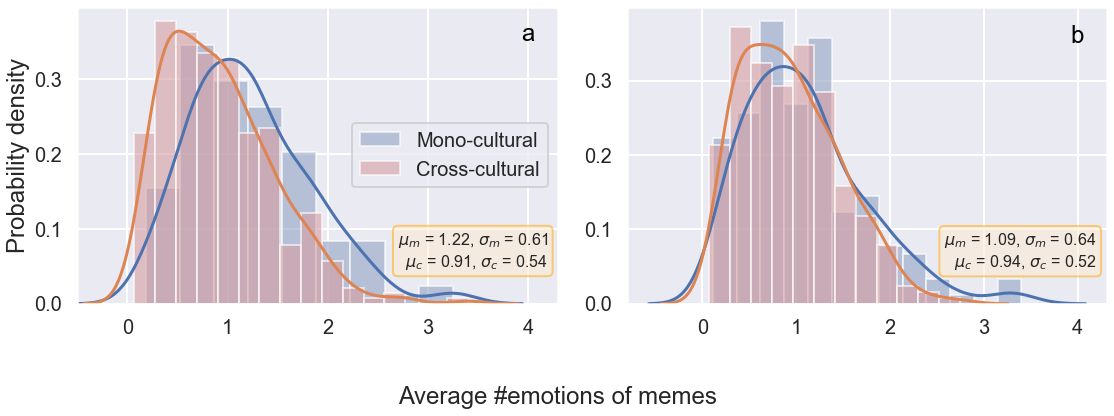

In [177]:
f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(16, 6))

#sns.set_color_codes("muted")

#cluster_topic_ave_count_per_meme[id]=feature_topic_distinct_count/len(cluster_image_dict[id])
#cluster_emotion_ave_count_per_meme[id]=feature_emotion_distinct_count/len(cluster_image_dict[id])

# 情绪熵，社区内跨文化传播
import numpy as np
import seaborn as sns
sns.set_theme()
# #matplotlib.rcParams['font.family']='SimHei'#黑体'STSong'仿宋
# sns.set_color_codes("muted")
plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['font.size'] = '24' #用来
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
 
#sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})
sns.set_context("poster", font_scale=1)

same_emotion_permeme = []
for cluster_id in cross_cluster_dict_new[0]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        same_emotion_permeme.append(cluster_emotion_ave_count_per_meme[cluster_id])

cross_emotion_permeme = []
for cluster_id in cross_cluster_dict_new[1]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        cross_emotion_permeme.append(cluster_emotion_ave_count_per_meme[cluster_id])
#sns.kdeplot(same_emotion_permeme, ax=ax[0], label='Same', alpha =0.8)#,cumulative=True)
#sns.kdeplot(cross_emotion_permeme, ax=ax[0], label="Cross", alpha =0.8)#,cumulative=True)
sns.distplot(same_emotion_permeme, norm_hist=True, ax=ax[0], label='Mono-cultural', hist_kws={'color':'#93a3c3', 'alpha':0.6})#,cumulative=True)
sns.distplot(cross_emotion_permeme, norm_hist=True, ax=ax[0], label="Cross-cultural", hist_kws={'color':'#d59fa2', 'alpha':0.6})#,cumulative=True)


ax[0].legend(loc="center right",fontsize=20)
#ax[0].set_xlabel('Average #emotion per meme')
stats = (f'$\\mu_m$ = {np.mean(same_emotion_permeme):.2f}, $\\sigma_m$ = {np.std(same_emotion_permeme):.2f}\n'
             f'$\\mu_c$ = {np.mean(cross_emotion_permeme):.2f}, $\\sigma_c$ = {np.std(cross_emotion_permeme):.2f}')
bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
ax[0].text(4.2, 0.10, stats, fontsize=16, bbox=bbox, horizontalalignment='right')

print(np.mean(same_emotion_permeme), np.std(same_emotion_permeme))
print(np.mean(cross_emotion_permeme), np.std(cross_emotion_permeme))

same_emotion_permeme = []
for cluster_id in cross_cluster_dict_w_e_new[0]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        same_emotion_permeme.append(cluster_emotion_ave_count_per_meme[cluster_id])

cross_emotion_permeme = []
for cluster_id in cross_cluster_dict_w_e_new[1]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        cross_emotion_permeme.append(cluster_emotion_ave_count_per_meme[cluster_id])
#sns.kdeplot(same_emotion_permeme, ax=ax[0], label='Same', alpha =0.8)#,cumulative=True)
#sns.kdeplot(cross_emotion_permeme, ax=ax[0], label="Cross", alpha =0.8)#,cumulative=True)
sns.distplot(same_emotion_permeme, norm_hist=True, ax=ax[1], label='Mono-cultural', hist_kws={'color':'#93a3c3', 'alpha':0.6})#,cumulative=True)
sns.distplot(cross_emotion_permeme, norm_hist=True, ax=ax[1], label="Cross-cultural", hist_kws={'color':'#d59fa2', 'alpha':0.6})#,cumulative=True)


#ax[0].legend(loc="upper left",fontsize=20)
#ax[0].set_xlabel('Average #emotion per meme')

print(np.mean(same_emotion_permeme), np.std(same_emotion_permeme))
print(np.mean(cross_emotion_permeme), np.std(cross_emotion_permeme))
styles = dict(ha="center", va="center", color="black", size=24)
#ax[0].text(3.9, 0.72, 'a', **styles) 

stats = (f'$\\mu_m$ = {np.mean(same_emotion_permeme):.2f}, $\\sigma_m$ = {np.std(same_emotion_permeme):.2f}\n'
             f'$\\mu_c$ = {np.mean(cross_emotion_permeme):.2f}, $\\sigma_c$ = {np.std(cross_emotion_permeme):.2f}')
bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
ax[1].text(4.2, 0.10, stats, fontsize=16, bbox=bbox, horizontalalignment='right')
ax[0].set_xlim([-0.5,4.3])
ax[0].text(4.0, 0.72, 'a', **styles)
ax[1].text(4.0, 0.72, 'b', **styles) 
ax[0].set_ylabel('Probability density', fontsize=24)
ax[1].set_ylabel('')

#ax[0].set_yticklabels(labels=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],fontsize=20)
ax[0].set_xticklabels(labels = [-1,0,1,2,3,4], fontsize=20)
#ax[1].set_ylabel('Average #emotions of memes', fontsize=20)
ax[0].set_yticklabels(labels=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],fontsize=20)
ax[1].set_xticklabels(labels = [-1,0,1,2,3,4], fontsize=20)
ax[1].set_yticklabels(labels=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],fontsize=20)
#ax[1].set_xticklabels(labels = ['Same','Cross'], fontsize=20)
#ax[0].set_xlabel('Average #emotions of memes ', fontsize=20)
#ax[1].set_xlabel('Average #emotions of memes', fontsize=20)

# ax[0].set(xlabel=None)
# ax[1].set(xlabel=None)
ax[0].xaxis.label.set_visible(False)
ax[1].xaxis.label.set_visible(False)
#ax[0]._xlabel.remove()
#ax[1]._xlabel.remove()
f.supxlabel('Average #emotions of memes', fontsize=24)
plt.tight_layout()
plt.savefig('./figs/fig1_emotion_num_per_meme.png', dpi=600)

In [476]:
# f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(16, 6))

# #cluster_topic_ave_count_per_meme[id]=feature_topic_distinct_count/len(cluster_image_dict[id])
# #cluster_emotion_ave_count_per_meme[id]=feature_emotion_distinct_count/len(cluster_image_dict[id])

# # 情绪熵，社区内跨文化传播
# import numpy as np
# import seaborn as sns
# same_emotion_permeme = []
# for cluster_id in cross_cluster_dict_w_e_new[0]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         same_emotion_permeme.append(cluster_emotion_ave_count_per_meme[cluster_id])

# cross_emotion_permeme = []
# for cluster_id in cross_cluster_dict_w_e_new[1]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         cross_emotion_permeme.append(cluster_emotion_ave_count_per_meme[cluster_id])
# #sns.kdeplot(same_emotion_permeme, ax=ax[0], label='Same', alpha =0.8)#,cumulative=True)
# #sns.kdeplot(cross_emotion_permeme, ax=ax[0], label="Cross", alpha =0.8)#,cumulative=True)
# sns.distplot(same_emotion_permeme, ax=ax[0], label='Same', bins=20)#,cumulative=True)
# sns.distplot(cross_emotion_permeme, ax=ax[0], label="Cross", bins=20)#,cumulative=True)

# ax[0].legend(loc="upper left",fontsize=20)
# ax[0].set_xlabel('Average #emotion per meme')

# print(np.mean(same_emotion_permeme), np.std(same_emotion_permeme))
# print(np.mean(cross_emotion_permeme), np.std(cross_emotion_permeme))

# emotion_permeme =[]
# for strength in same_emotion_permeme:
#     record = {"Average #emotion per meme": strength, "class": "Same"}
#     emotion_permeme.append(record)
# for strength in cross_emotion_permeme:
#     record = {"Average #emotion per meme": strength, "class": "Cross"}
#     emotion_permeme.append(record)

# emotion_num_df = pd.DataFrame(emotion_permeme)
# sns.boxplot(ax = ax[1], x='class', y='Average #emotion per meme', orient='v', data = emotion_num_df, width=0.5,showmeans=True)#设置颜色饱和度, saturation=0.3
# ax[1].tick_params(bottom=False)
# ax[1].set_xlabel('')

# styles = dict(ha="center", va="center", color="black", size=24)
# ax[0].text(3.7, 0.65, 'a', **styles) 
# ax[1].text(1.4, 2.9, 'b', **styles) 
# ax[0].set_ylabel('Probability density', fontsize=20)
# ax[0].set_xlabel('Average #emotions of memes', fontsize=20)
# ax[0].set_yticklabels(labels=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],fontsize=20)
# ax[0].set_xticklabels(labels = [-1,0,1,2,3,4], fontsize=20)
# ax[1].set_ylabel('Average #emotions of memes', fontsize=20)
# ax[0].set_yticklabels(labels=[0.0,0.5,1.0,1.5,2.0,2.5,3.0],fontsize=20)
# ax[1].set_xticklabels(labels = ['Same','Cross'], fontsize=20)
# plt.tight_layout()
# #plt.savefig('./figs/fig1_emotion_num_per_meme.png', dpi=600)



[7.0, 9.0, 8.0, 4.5, 6.0, 8.0, 3.0, 4.0, 4.0, 7.0, 4.0, 8.0, 7.0, 7.0, 3.0, 7.0, 4.0, 5.0, 8.0, 5.0, 8.0, 7.0, 6.5, 5.0, 5.0, 8.5, 7.5, 5.0, 4.0, 6.0, 9.0, 7.5, 7.0, 7.0, 6.0, 3.0, 4.0, 6.5, 5.0, 6.0, 8.0, 5.5, 4.0, 6.5, 6.0, 8.0, 7.5, 3.0, 7.5, 7.0, 8.0] [3.0, 6.0, 8.0, 6.0, 5.5, 4.0, 7.0, 5.0, 6.0, 7.0, 6.0, 7.0, 8.0, 6.0, 6.0, 7.0, 4.5, 7.0, 6.0, 6.5, 6.0, 4.0, 6.5, 7.5, 5.0, 7.0, 8.0, 4.0, 7.0, 4.0, 4.0, 8.5, 3.0, 4.5, 3.0, 7.0, 3.0, 3.0, 3.0, 6.0, 5.0, 7.0, 6.0, 8.5, 5.0, 4.0, 4.0, 7.0, 6.5, 6.5, 5.0, 5.0, 3.0, 7.5, 4.0, 7.0, 3.0, 5.0, 8.5, 5.5, 8.5, 7.5, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 7.0, 7.0, 7.0, 5.0, 8.5, 8.0, 6.0, 5.0, 7.0, 5.0, 7.5, 6.0, 3.0, 1.0, 4.5, 3.0, 6.0, 6.0, 8.0, 5.5, 5.0, 7.0, 5.5, 6.0, 7.0, 7.0, 3.0, 7.0]
[7.0, 7.0, 6.0, 3.0, 7.0, 5.0, 6.0, 8.0, 6.5, 6.5, 7.0, 6.0, 5.5, 7.5, 8.0] [7.0, 3.0, 9.0, 3.0, 7.0, 5.5, 4.0, 7.0, 8.0, 7.0, 9.0, 5.0, 7.5, 5.0, 8.0, 8.0, 7.0, 7.5, 6.0, 4.0, 9.0, 8.0, 3.0, 9.0, 8.5, 5.0, 6.0, 8.5, 7.0, 2.0, 7.0, 5.0, 4.0, 4.0, 8.0, 5.0, 9.0, 8

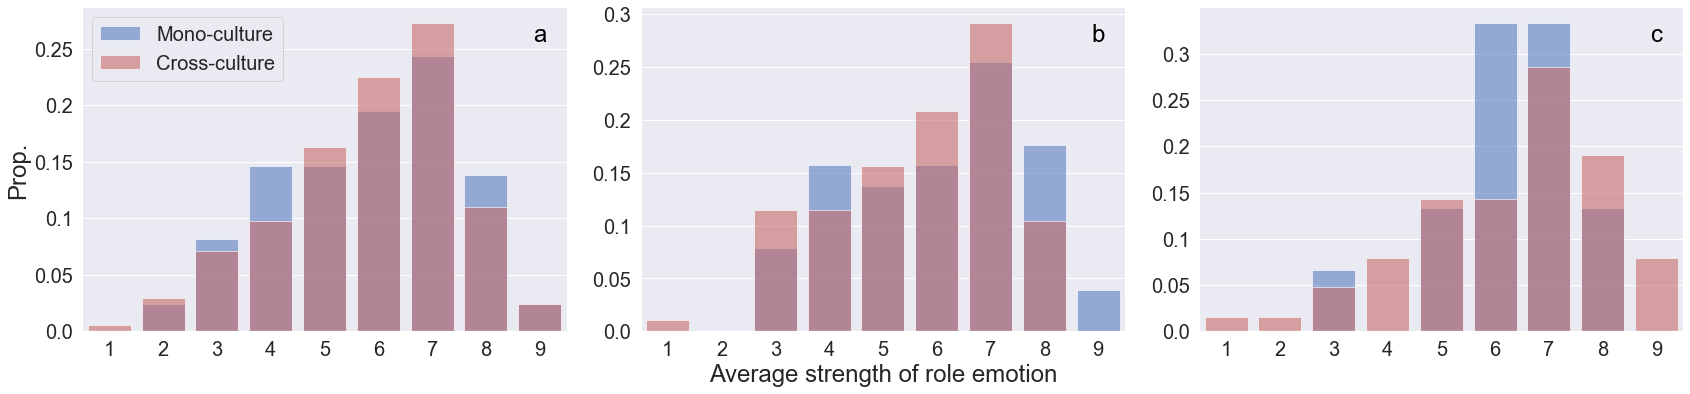

In [167]:
f, ax = plt.subplots(nrows=1, ncols = 3, figsize=(24, 6))

#cluster_topic_ave_count_per_meme[id]=feature_topic_distinct_count/len(cluster_image_dict[id])
#cluster_emotion_ave_count_per_meme[id]=feature_emotion_distinct_count/len(cluster_image_dict[id])

# 情绪熵，社区内跨文化传播
import numpy as np
import seaborn as sns
same_emotion_role = []
for cluster_id in cross_cluster_dict_new[0]:
    if cluster_size[cluster_id]>=4: # and cluster_role_africa[cluster_id]>0:
        #print(cluster_topic_entropy_feature[cluster_id])
        same_emotion_role.append(cluster_role_strength_list[cluster_id])
        #same_emotion_role.extend(cluster_role_strength_list[cluster_id])

cross_emotion_role = []
for cluster_id in cross_cluster_dict_new[1]:
    if cluster_size[cluster_id]>=4: # and cluster_role_africa[cluster_id]>0:
        #print(cluster_topic_entropy_feature[cluster_id])
        cross_emotion_role.append(cluster_role_strength_list[cluster_id])
        #cross_emotion_role.extend(cluster_role_strength_list[cluster_id])
#sns.kdeplot(same_emotion_role, ax=ax[0], label='Same', alpha =0.8)#,cumulative=True)
#sns.kdeplot(cross_emotion_role, ax=ax[0], label="Cross", alpha =0.8)#,cumulative=True)
same_emotion_role_round = np.floor(same_emotion_role).astype(int)
cross_emotion_role_round = np.floor(cross_emotion_role).astype(int)
same_emotion_role_round_dict = dict(Counter(same_emotion_role_round))
cross_emotion_role_round_dict = dict(Counter(cross_emotion_role_round))
same_emotion_role_round_dict_list = []
cross_emotion_role_round_dict_list = []
for i in range(1,10):
    if i not in same_emotion_role_round_dict:
        same_emotion_role_round_dict_list.append(0)
    else:
        same_emotion_role_round_dict_list.append(same_emotion_role_round_dict[i])
    if i not in cross_emotion_role_round_dict:
        cross_emotion_role_round_dict_list.append(0)
    else:
        cross_emotion_role_round_dict_list.append(cross_emotion_role_round_dict[i])


same_norm_fea = same_emotion_role_round_dict_list/np.sum(same_emotion_role_round_dict_list)
cross_norm_fea = cross_emotion_role_round_dict_list/np.sum(cross_emotion_role_round_dict_list)
data_role_emotion_s = []
for i in range(1,10):
    data_role_emotion_s.append({"Strength": i, "Proportion": same_norm_fea[i-1]})
data_role_emotion_s_df = pd.DataFrame(data_role_emotion_s)
sns.barplot(ax=ax[0], x="Strength", y="Proportion", data=data_role_emotion_s_df, label="Mono-culture", color="b", saturation=0.75, alpha=0.6)
#sns.histplot(ax= ax, bins=20, data=same_emotion_role, label="same culture", color="r", alpha=0.6)

data_role_emotion_s = []
for i in range(1,10):
    data_role_emotion_s.append({"Strength": i, "Proportion": cross_norm_fea[i-1]})
data_role_emotion_s_df = pd.DataFrame(data_role_emotion_s)
sns.barplot(ax= ax[0], x="Strength", y="Proportion", data=data_role_emotion_s_df, label="Cross-culture", color="r", saturation=0.75, alpha=0.6)
#sns.kdeplot(ax= ax, bins=20, data=cross_emotion_role, label="cross culture", color="b", alpha=0.6)


#ax[1], africa emotion strength
same_emotion_role = []
for cluster_id in cross_cluster_dict_new[0]:
    if cluster_size[cluster_id]>=4 and cluster_role_female_rate[cluster_id]>0:
        #print(cluster_topic_entropy_feature[cluster_id])
        same_emotion_role.append(cluster_role_strength_list[cluster_id])
        #same_emotion_role.extend(cluster_role_strength_list[cluster_id])

cross_emotion_role = []
for cluster_id in cross_cluster_dict_new[1]:
    if cluster_size[cluster_id]>=4 and cluster_role_female_rate[cluster_id]>0:
        #print(cluster_topic_entropy_feature[cluster_id])
        cross_emotion_role.append(cluster_role_strength_list[cluster_id])
        #cross_emotion_role.extend(cluster_role_strength_list[cluster_id])
#sns.kdeplot(same_emotion_role, ax=ax[0], label='Same', alpha =0.8)#,cumulative=True)
#sns.kdeplot(cross_emotion_role, ax=ax[0], label="Cross", alpha =0.8)#,cumulative=True)
print(same_emotion_role, cross_emotion_role)

same_emotion_role_round = np.floor(same_emotion_role).astype(int)
cross_emotion_role_round = np.floor(cross_emotion_role).astype(int)
same_emotion_role_round_dict = dict(Counter(same_emotion_role_round))
cross_emotion_role_round_dict = dict(Counter(cross_emotion_role_round))
same_emotion_role_round_dict_list = []
cross_emotion_role_round_dict_list = []
for i in range(1,10):
    if i not in same_emotion_role_round_dict:
        same_emotion_role_round_dict_list.append(0)
    else:
        same_emotion_role_round_dict_list.append(same_emotion_role_round_dict[i])
    if i not in cross_emotion_role_round_dict:
        cross_emotion_role_round_dict_list.append(0)
    else:
        cross_emotion_role_round_dict_list.append(cross_emotion_role_round_dict[i])


same_norm_fea = same_emotion_role_round_dict_list/np.sum(same_emotion_role_round_dict_list)
cross_norm_fea = cross_emotion_role_round_dict_list/np.sum(cross_emotion_role_round_dict_list)
data_role_emotion_s = []
for i in range(1,10):
    data_role_emotion_s.append({"Strength": i, "Proportion": same_norm_fea[i-1]})
data_role_emotion_s_df = pd.DataFrame(data_role_emotion_s)
sns.barplot(ax=ax[1], x="Strength", y="Proportion", data=data_role_emotion_s_df, label="Same", color="b", saturation=0.75, alpha=0.6, legend=False)
#sns.histplot(ax= ax, bins=20, data=same_emotion_role, label="same culture", color="r", alpha=0.6)

data_role_emotion_s = []
for i in range(1,10):
    data_role_emotion_s.append({"Strength": i, "Proportion": cross_norm_fea[i-1]})
data_role_emotion_s_df = pd.DataFrame(data_role_emotion_s)
sns.barplot(ax= ax[1], x="Strength", y="Proportion", data=data_role_emotion_s_df, label="Cross", color="r", saturation=0.75, alpha=0.6, legend=False)

#sns.barplot(x=range(1,10),y=same_emotion_role_round_dict_list/np.sum(same_emotion_role_round_dict_list))
#sns.barplot(x=range(1,10),y=cross_emotion_role_round_dict_list/np.sum(cross_emotion_role_round_dict_list))


#ax[1], female emotion strength
same_emotion_role = []
for cluster_id in cross_cluster_dict_new[0]:
    if cluster_size[cluster_id]>=4 and cluster_role_africa[cluster_id]>0:
        #print(cluster_topic_entropy_feature[cluster_id])
        same_emotion_role.append(cluster_role_strength_list[cluster_id])
        #same_emotion_role.extend(cluster_role_strength_list[cluster_id])

cross_emotion_role = []
for cluster_id in cross_cluster_dict_new[1]:
    if cluster_size[cluster_id]>=4 and cluster_role_africa[cluster_id]>0:
        #print(cluster_topic_entropy_feature[cluster_id])
        cross_emotion_role.append(cluster_role_strength_list[cluster_id])
        #cross_emotion_role.extend(cluster_role_strength_list[cluster_id])
#sns.kdeplot(same_emotion_role, ax=ax[0], label='Same', alpha =0.8)#,cumulative=True)
#sns.kdeplot(cross_emotion_role, ax=ax[0], label="Cross", alpha =0.8)#,cumulative=True)
print(same_emotion_role, cross_emotion_role)

same_emotion_role_round = np.floor(same_emotion_role).astype(int)
cross_emotion_role_round = np.floor(cross_emotion_role).astype(int)
same_emotion_role_round_dict = dict(Counter(same_emotion_role_round))
cross_emotion_role_round_dict = dict(Counter(cross_emotion_role_round))
same_emotion_role_round_dict_list = []
cross_emotion_role_round_dict_list = []
for i in range(1,10):
    if i not in same_emotion_role_round_dict:
        same_emotion_role_round_dict_list.append(0)
    else:
        same_emotion_role_round_dict_list.append(same_emotion_role_round_dict[i])
    if i not in cross_emotion_role_round_dict:
        cross_emotion_role_round_dict_list.append(0)
    else:
        cross_emotion_role_round_dict_list.append(cross_emotion_role_round_dict[i])


same_norm_fea = same_emotion_role_round_dict_list/np.sum(same_emotion_role_round_dict_list)
cross_norm_fea = cross_emotion_role_round_dict_list/np.sum(cross_emotion_role_round_dict_list)
data_role_emotion_s = []
for i in range(1,10):
    data_role_emotion_s.append({"Strength": i, "Proportion": same_norm_fea[i-1]})
data_role_emotion_s_df = pd.DataFrame(data_role_emotion_s)
sns.barplot(ax=ax[2], x="Strength", y="Proportion", data=data_role_emotion_s_df, label="Same", color="b", saturation=0.75, alpha=0.6, legend=False)
#sns.histplot(ax= ax, bins=20, data=same_emotion_role, label="same culture", color="r", alpha=0.6)

data_role_emotion_s = []
for i in range(1,10):
    data_role_emotion_s.append({"Strength": i, "Proportion": cross_norm_fea[i-1]})
data_role_emotion_s_df = pd.DataFrame(data_role_emotion_s)
sns.barplot(ax= ax[2], x="Strength", y="Proportion", data=data_role_emotion_s_df, label="Cross", color="r", saturation=0.75, alpha=0.6, legend=False)


ax[0].legend(loc = 'upper left', fontsize=20)
ax[0].set_ylabel('Prop.',fontsize=24)
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')
ax[1].set_ylabel('')
ax[2].set_ylabel('')


styles = dict(ha="center", va="center", color="black", size=24)
ax[0].text(8, 0.262, 'a', **styles) 
ax[1].text(8, 0.28, 'b', **styles) 
ax[2].text(8, 0.32, 'c', **styles) 

ax[0].set_xticklabels(labels=[1,2,3,4,5,6,7,8,9], fontsize=20)
ax[1].set_xticklabels(labels=[1,2,3,4,5,6,7,8,9], fontsize=20)
ax[2].set_xticklabels(labels=[1,2,3,4,5,6,7,8,9], fontsize=20)
ax[0].set_yticklabels(labels=[0.00,0.05,0.10,0.15,0.20,0.25], fontsize=20)
ax[1].set_yticklabels(labels=[0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35], fontsize=20)
ax[2].set_yticklabels(labels=[0.00,0.05,0.10,0.15,0.20,0.25,0.30], fontsize=20)
#ax.set_xlabel('Average strength of role emotion')
ax[1].set_xlabel('Average strength of role emotion', fontsize=24)
#print(np.mean(same_emotion_role), np.std(same_emotion_role))
#print(np.mean(cross_emotion_role), np.std(cross_emotion_role))
plt.tight_layout()
plt.savefig('./figs/fig6_role_emotion_strength_per_meme_instance.png', dpi=600)

In [180]:
same_norm_fea

array([0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [181]:
same_emotion_role[:3]

[6, 6, 6]

In [182]:
np.round(same_emotion_role)

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [139]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                if p.get_height() == 0:
                    continue
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.2f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center", fontsize=18) 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.2f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left", fontsize=18)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            if idx>1:
                _single(ax)
    else:
        _single(axs)
        #pass

In [236]:
isinstance(ax[0], np.ndarray)

False

In [237]:
ax[0].patches

<Axes.ArtistList of 10 patches>

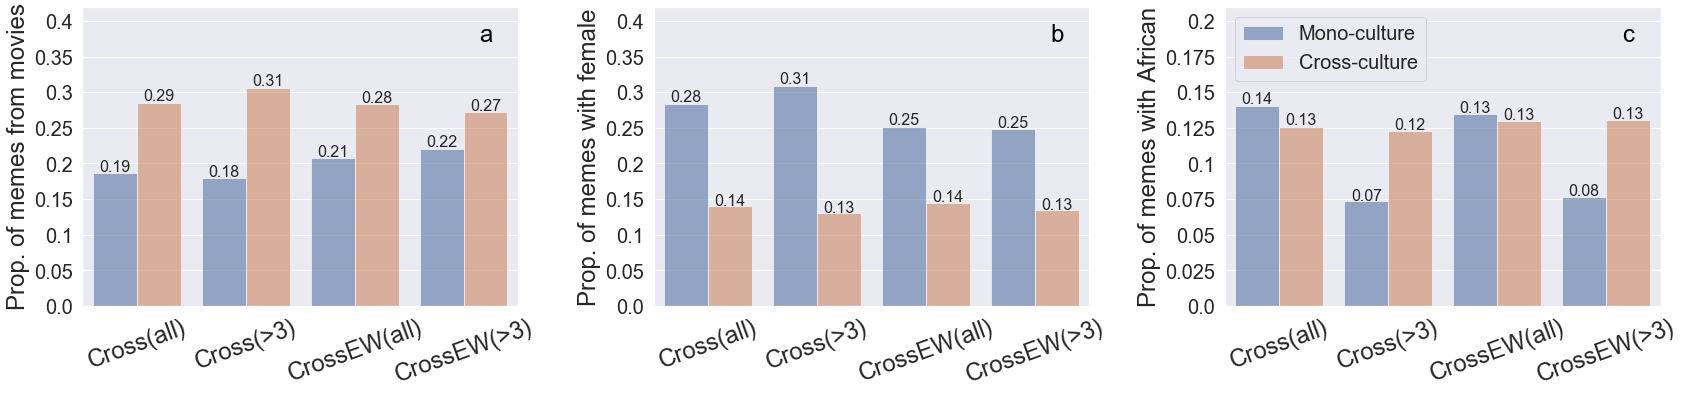

In [166]:
f, ax = plt.subplots(nrows=1, ncols = 3, figsize=(24, 6))

# 情绪熵，社区内跨文化传播
import numpy as np
import seaborn as sns
movie_list = []
same_movie = []
move_rate_temp = []
for cluster_id in cross_cluster_dict_new[0]:
    #if cluster_size[cluster_id]>=4:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_movie.append(cluster_role_movie_rate[cluster_id])
    move_rate_temp.append(cluster_role_movie_rate[cluster_id])

movie_list.append({"Movie proportion":np.mean(move_rate_temp), "Class": "Mono-culture", "Group":"M1"})

cross_movie = []
move_rate_temp = []
for cluster_id in cross_cluster_dict_new[1]:
    #if cluster_size[cluster_id]>=4:
    #print(cluster_topic_entropy_feature[cluster_id])
    cross_movie.append(cluster_role_movie_rate[cluster_id])
    move_rate_temp.append(cluster_role_movie_rate[cluster_id])
movie_list.append({"Movie proportion":np.mean(move_rate_temp), "Class": "Cross-culture", "Group":"M1"})


same_gender = []
move_rate_temp = []
for cluster_id in cross_cluster_dict_new[0]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        same_gender.append(cluster_role_gender[cluster_id])
        move_rate_temp.append(cluster_role_movie_rate[cluster_id])
movie_list.append({"Movie proportion":np.mean(move_rate_temp), "Class": "Mono-culture", "Group":"M2"})

cross_gender = []
move_rate_temp = []
for cluster_id in cross_cluster_dict_new[1]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        cross_gender.append(cluster_role_gender[cluster_id])
        move_rate_temp.append(cluster_role_movie_rate[cluster_id])
movie_list.append({"Movie proportion":np.mean(move_rate_temp), "Class": "Cross-culture", "Group":"M2"})

same_gender = []
move_rate_temp = []
for cluster_id in cross_cluster_dict_w_e_new[0]:
    if cluster_size[cluster_id]>=0:
        #print(cluster_topic_entropy_feature[cluster_id])
        same_gender.append(cluster_role_gender[cluster_id])
        move_rate_temp.append(cluster_role_movie_rate[cluster_id])
movie_list.append({"Movie proportion":np.mean(move_rate_temp), "Class": "Mono-culture", "Group":"M4"})

cross_gender = []
move_rate_temp = []
for cluster_id in cross_cluster_dict_w_e_new[1]:
    if cluster_size[cluster_id]>=0:
        #print(cluster_topic_entropy_feature[cluster_id])
        cross_gender.append(cluster_role_gender[cluster_id])
        move_rate_temp.append(cluster_role_movie_rate[cluster_id])
movie_list.append({"Movie proportion":np.mean(move_rate_temp), "Class": "Cross-culture", "Group":"M4"})


same_gender = []
move_rate_temp = []
for cluster_id in cross_cluster_dict_w_e_new[0]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        same_gender.append(cluster_role_gender[cluster_id])
        move_rate_temp.append(cluster_role_movie_rate[cluster_id])
movie_list.append({"Movie proportion":np.mean(move_rate_temp), "Class": "Mono-culture", "Group":"M5"})

cross_gender = []
cross_gender = []
for cluster_id in cross_cluster_dict_w_e_new[1]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        cross_gender.append(cluster_role_gender[cluster_id])
        move_rate_temp.append(cluster_role_movie_rate[cluster_id])
movie_list.append({"Movie proportion":np.mean(move_rate_temp), "Class": "Cross-culture", "Group":"M5"})

movie_df = pd.DataFrame(movie_list)
#ax = sns.barplot(x="Group",y="Movie proportion",data =movie_df, hue="Class",capsize=.06, errwidth=0.9, alpha=0.8)#, width=0.4)
#show_values(ax)
sns.barplot(ax = ax[0], x="Group",y="Movie proportion",data =movie_df, hue="Class",capsize=.06, errwidth=0.9, saturation=0.75, alpha=0.6)#, width=0.4)
show_values(ax[0])
#for i in ax.containers:
#    ax.bar_label(i,)
# for index, row in gender_df.iterrows():
#     print()
#     ax.text(row.Group, row.Class, round(row.Proportion, 2),
#         color='white', ha='center')
#ax.bar_label(ax.containers[0])
ax[0].tick_params(bottom=False)

#plt.legend(["Same","Cross"])
ax[0].set_xlabel('')
ax[0].set_ylim((0,0.42))



# 情绪熵，社区内跨文化传播
import numpy as np
import seaborn as sns
same_gender = []
for cluster_id in cross_cluster_dict_new[0]:
    #if cluster_size[cluster_id]>=4:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_gender.append(cluster_role_gender[cluster_id])

cross_gender = []
for cluster_id in cross_cluster_dict_new[1]:
    #if cluster_size[cluster_id]>=4:
    #print(cluster_topic_entropy_feature[cluster_id])
    cross_gender.append(cluster_role_gender[cluster_id])

same_dict = dict(Counter(same_gender))
same_dict_rate = {"0":same_dict[0]/(same_dict[0]+same_dict[1]),"1":same_dict[1]/(same_dict[0]+same_dict[1])}
cross_dict = dict(Counter(cross_gender))
cross_dict_rate = {"0":cross_dict[0]/(cross_dict[0]+cross_dict[1]),"1":cross_dict[1]/(cross_dict[0]+cross_dict[1])}
gender_list = []
# gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"Cross(All)"})
# gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"Cross(All)"})

gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"M1"})
gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"M1"})


same_gender = []
for cluster_id in cross_cluster_dict_new[0]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        same_gender.append(cluster_role_gender[cluster_id])

cross_gender = []
for cluster_id in cross_cluster_dict_new[1]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        cross_gender.append(cluster_role_gender[cluster_id])

same_dict = dict(Counter(same_gender))
same_dict_rate = {"0":same_dict[0]/(same_dict[0]+same_dict[1]),"1":same_dict[1]/(same_dict[0]+same_dict[1])}
cross_dict = dict(Counter(cross_gender))
cross_dict_rate = {"0":cross_dict[0]/(cross_dict[0]+cross_dict[1]),"1":cross_dict[1]/(cross_dict[0]+cross_dict[1])}

# gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"Cross(size>=4)"})
# gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"Cross(size>=4)"})

gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"M2"})
gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"M2"})

same_gender = []
for cluster_id in cross_cluster_dict_w_e_new[0]:
    if cluster_size[cluster_id]>=0:
        #print(cluster_topic_entropy_feature[cluster_id])
        same_gender.append(cluster_role_gender[cluster_id])

cross_gender = []
for cluster_id in cross_cluster_dict_w_e_new[1]:
    if cluster_size[cluster_id]>=0:
        #print(cluster_topic_entropy_feature[cluster_id])
        cross_gender.append(cluster_role_gender[cluster_id])

same_dict = dict(Counter(same_gender))
same_dict_rate = {"0":same_dict[0]/(same_dict[0]+same_dict[1]),"1":same_dict[1]/(same_dict[0]+same_dict[1])}
cross_dict = dict(Counter(cross_gender))
cross_dict_rate = {"0":cross_dict[0]/(cross_dict[0]+cross_dict[1]),"1":cross_dict[1]/(cross_dict[0]+cross_dict[1])}

# gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"Cross_w_e(All)"})
# gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"Cross_w_e(All)"})

gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"M4"})
gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"M4"})

same_gender = []
for cluster_id in cross_cluster_dict_w_e_new[0]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        same_gender.append(cluster_role_gender[cluster_id])

cross_gender = []
for cluster_id in cross_cluster_dict_w_e_new[1]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        cross_gender.append(cluster_role_gender[cluster_id])

same_dict = dict(Counter(same_gender))
same_dict_rate = {"0":same_dict[0]/(same_dict[0]+same_dict[1]),"1":same_dict[1]/(same_dict[0]+same_dict[1])}
cross_dict = dict(Counter(cross_gender))
cross_dict_rate = {"0":cross_dict[0]/(cross_dict[0]+cross_dict[1]),"1":cross_dict[1]/(cross_dict[0]+cross_dict[1])}

# gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"Cross_w_e(size>=4)"})
# gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"Cross_w_e(size>=4)"})

gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"M5"})
gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"M5"})

gender_df = pd.DataFrame(gender_list)
sns.barplot(ax = ax[1], x="Group",y="Proportion",data =gender_df, hue="Class",capsize=.2, saturation=0.75, alpha=0.6)
show_values(ax[1])

#ax[1].legend(labels=['Mono-culture','Cross-culture'],title='',fontsize=20)
ax[1].tick_params(bottom=False)

#plt.legend(["Same","Cross"])
ax[1].set_xlabel('')
ax[1].set_ylabel('Female prop.')
ax[1].set_ylim((0,0.42))


#情绪熵，社区内跨文化传播
import numpy as np
import seaborn as sns

same_gender = []
for cluster_id in cross_cluster_dict_new[0]:
    #if cluster_size[cluster_id]>=4:
    #print(cluster_topic_entropy_feature[cluster_id])
    #same_gender.append(np.ceil(cluster_role_africa[cluster_id]))
    same_gender.append(cluster_role_africa[cluster_id])

cross_gender = []
for cluster_id in cross_cluster_dict_new[1]:
    #if cluster_size[cluster_id]>=4:
    #print(cluster_topic_entropy_feature[cluster_id])
    #cross_gender.append(np.ceil(cluster_role_africa[cluster_id]))
    cross_gender.append(cluster_role_africa[cluster_id])


same_dict_rate = {"1":np.average(same_gender)}
cross_dict_rate = {"1":np.average(cross_gender)}

gender_list = []
# gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"Cross(All)"})
# gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"Cross(All)"})
gender_list.append({"African proportion": same_dict_rate["1"],"Class":"Mono-culture","Group":"M1"})
gender_list.append({"African proportion": cross_dict_rate["1"],"Class":"Cross-culture","Group":"M1"})


same_gender = []
for cluster_id in cross_cluster_dict_new[0]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        #same_gender.append(np.ceil(cluster_role_africa[cluster_id]))
        same_gender.append(cluster_role_africa[cluster_id])


cross_gender = []
for cluster_id in cross_cluster_dict_new[1]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        #cross_gender.append(np.ceil(cluster_role_africa[cluster_id]))
        cross_gender.append(cluster_role_africa[cluster_id])

same_dict_rate = {"1":np.average(same_gender)}
cross_dict_rate = {"1":np.average(cross_gender)}

# gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"Cross(size>=4)"})
# gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"Cross(size>=4)"})

gender_list.append({"African proportion": same_dict_rate["1"],"Class":"Mono-culture","Group":"M2"})
gender_list.append({"African proportion": cross_dict_rate["1"],"Class":"Cross-culture","Group":"M2"})


same_gender = []
for cluster_id in cross_cluster_dict_w_e_new[0]:
    if cluster_size[cluster_id]>=0:
        #print(cluster_topic_entropy_feature[cluster_id])
        #same_gender.append(np.ceil(cluster_role_africa[cluster_id]))
        same_gender.append(cluster_role_africa[cluster_id])


cross_gender = []
for cluster_id in cross_cluster_dict_w_e_new[1]:
    if cluster_size[cluster_id]>=0:
        #print(cluster_topic_entropy_feature[cluster_id])
        #cross_gender.append(np.ceil(cluster_role_africa[cluster_id]))
        cross_gender.append(cluster_role_africa[cluster_id])

same_dict_rate = {"1":np.average(same_gender)}
cross_dict_rate = {"1":np.average(cross_gender)}


gender_list.append({"African proportion": same_dict_rate["1"],"Class":"Mono-culture","Group":"M4"})
gender_list.append({"African proportion": cross_dict_rate["1"],"Class":"Cross-culture","Group":"M4"})

same_gender = []
for cluster_id in cross_cluster_dict_w_e_new[0]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        #same_gender.append(np.ceil(cluster_role_africa[cluster_id]))
        same_gender.append(cluster_role_africa[cluster_id])


cross_gender = []
for cluster_id in cross_cluster_dict_w_e_new[1]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        #cross_gender.append(np.ceil(cluster_role_africa[cluster_id]))
        cross_gender.append(cluster_role_africa[cluster_id])

same_dict_rate = {"1":np.average(same_gender)}
cross_dict_rate = {"1":np.average(cross_gender)}


gender_list.append({"African proportion": same_dict_rate["1"],"Class":"Mono-culture","Group":"M5"})
gender_list.append({"African proportion": cross_dict_rate["1"],"Class":"Cross-culture","Group":"M5"})

gender_df = pd.DataFrame(gender_list)
sns.barplot(ax=ax[2], x="Group",y="African proportion",data =gender_df, hue="Class",capsize=.2, saturation=0.75, alpha=0.6)
show_values(ax[2])

ax[2].tick_params(bottom=False)

#plt.legend(["Same","Cross"])
ax[2].set_xlabel('')
ax[2].set_ylim((0,0.21))

ax[1].legend_.remove()
ax[0].legend_.remove()

ax[2].legend(title='',loc='upper left',fontsize=20)


styles = dict(ha="center", va="center", color="black", size=24)
ax[0].text(3.2, 0.38, 'a', **styles) 
ax[1].text(3.2, 0.38, 'b', **styles) 
ax[2].text(3.2, 0.19, 'c', **styles) 

ax[0].set_ylabel('Prop. of memes from movies', fontsize=24)
ax[1].set_ylabel('Prop. of memes with female', fontsize=24)
ax[2].set_ylabel('Prop. of memes with African', fontsize=24)
ax[0].set_xticklabels(labels=['Cross(all)','Cross(>3)','CrossEW(all)','CrossEW(>3)'],rotation=20, fontsize=24)
ax[1].set_xticklabels(labels=['Cross(all)','Cross(>3)','CrossEW(all)','CrossEW(>3)'],rotation=20, fontsize=24)
ax[2].set_xticklabels(labels=['Cross(all)','Cross(>3)','CrossEW(all)','CrossEW(>3)'],rotation=20, fontsize=24)
ax[0].set_yticklabels(labels=[0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40], fontsize=20)
ax[1].set_yticklabels(labels=[0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40], fontsize=20)
ax[2].set_yticklabels(labels=[0.000,0.025,0.050,0.075,0.100,0.125,0.150,0.175,0.200], fontsize=20)
plt.tight_layout()
plt.savefig('./figs/fig1_meme_move_gender_africa.png', dpi=600)


In [186]:
movie_df.head(10)

Movie proportion  Class Group
0          0.186324   same    M1
1          0.285527  cross    M1
2          0.180072   same    M2
3          0.305772  cross    M2
4          0.207703   same    M4
5          0.283185  cross    M4
6          0.221016   same    M5
7          0.272161  cross    M5

In [183]:
# def show_values(axs, orient="v", space=.01):
#     def _single(ax):
#         if orient == "v":
#             for p in ax.patches:
#                 _x = p.get_x() + p.get_width() / 2
#                 _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
#                 value = '{:.2f}'.format(p.get_height())
#                 ax.text(_x, _y, value, ha="center", fontsize=18) 
#         elif orient == "h":
#             for p in ax.patches:
#                 _x = p.get_x() + p.get_width() + float(space)
#                 _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
#                 value = '{:.2f}'.format(p.get_width())
#                 ax.text(_x, _y, value, ha="left", fontsize=18)

#     if isinstance(axs, np.ndarray):
#         for idx, ax in np.ndenumerate(axs):
#             _single(ax)
#     else:
#         _single(axs)
        
# plt.figure(figsize=(8,6))
# #cluster_topic_ave_count_per_meme[id]=feature_topic_distinct_count/len(cluster_image_dict[id])
# #cluster_emotion_ave_count_per_meme[id]=feature_emotion_distinct_count/len(cluster_image_dict[id])

# # 情绪熵，社区内跨文化传播
# import numpy as np
# import seaborn as sns
# movie_list = []
# same_movie = []
# for cluster_id in cross_cluster_dict_new[0]:
#     #if cluster_size[cluster_id]>=4:
#     #print(cluster_topic_entropy_feature[cluster_id])
#     same_movie.append(cluster_role_movie_rate[cluster_id])
#     movie_list.append({"Movie proportion":cluster_role_movie_rate[cluster_id], "Class": "same", "Group":"M1"})

# cross_movie = []
# for cluster_id in cross_cluster_dict_new[1]:
#     #if cluster_size[cluster_id]>=4:
#     #print(cluster_topic_entropy_feature[cluster_id])
#     cross_movie.append(cluster_role_movie_rate[cluster_id])
#     movie_list.append({"Movie proportion":cluster_role_movie_rate[cluster_id], "Class": "cross", "Group":"M1"})


# same_gender = []
# for cluster_id in cross_cluster_dict_new[0]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         same_gender.append(cluster_role_gender[cluster_id])
#         movie_list.append({"Movie proportion":cluster_role_movie_rate[cluster_id], "Class": "same", "Group":"M2"})

# cross_gender = []
# for cluster_id in cross_cluster_dict_new[1]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         cross_gender.append(cluster_role_gender[cluster_id])
#         movie_list.append({"Movie proportion":cluster_role_movie_rate[cluster_id], "Class": "cross", "Group":"M2"})

# same_gender = []
# for cluster_id in cross_cluster_dict_w_e_new[0]:
#     if cluster_size[cluster_id]>=0:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         same_gender.append(cluster_role_gender[cluster_id])
#         movie_list.append({"Movie proportion":cluster_role_movie_rate[cluster_id], "Class": "same", "Group":"M4"})

# cross_gender = []
# for cluster_id in cross_cluster_dict_w_e_new[1]:
#     if cluster_size[cluster_id]>=0:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         cross_gender.append(cluster_role_gender[cluster_id])
#         movie_list.append({"Movie proportion":cluster_role_movie_rate[cluster_id], "Class": "cross", "Group":"M4"})


# same_gender = []
# for cluster_id in cross_cluster_dict_w_e_new[0]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         same_gender.append(cluster_role_gender[cluster_id])
#         movie_list.append({"Movie proportion":cluster_role_movie_rate[cluster_id], "Class": "same", "Group":"M5"})

# cross_gender = []
# for cluster_id in cross_cluster_dict_w_e_new[1]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         cross_gender.append(cluster_role_gender[cluster_id])
#         movie_list.append({"Movie proportion":cluster_role_movie_rate[cluster_id], "Class": "cross", "Group":"M5"})

# movie_df = pd.DataFrame(movie_list)
# ax = sns.barplot(x="Group",y="Movie proportion",data =movie_df, hue="Class",capsize=.06, errwidth=0.9, alpha=0.8)#, width=0.4)
# show_values(ax)
# #for i in ax.containers:
# #    ax.bar_label(i,)
# # for index, row in gender_df.iterrows():
# #     print()
# #     ax.text(row.Group, row.Class, round(row.Proportion, 2),
# #         color='white', ha='center')
# #ax.bar_label(ax.containers[0])
# plt.legend(title='',loc='upper left')
# plt.tick_params(bottom=False)

# #plt.legend(["Same","Cross"])
# plt.xlabel('')
# plt.ylim((0,0.5))

# plt.tight_layout()
# plt.savefig('./figs/meme_movie.png', dpi=600)

In [185]:
# #plt.subplots(nrows=1, ncols = 1, figsize=(12, 6))

# def show_values(axs, orient="v", space=.01):
#     def _single(ax):
#         if orient == "v":
#             for p in ax.patches:
#                 _x = p.get_x() + p.get_width() / 2
#                 _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
#                 value = '{:.2f}'.format(p.get_height())
#                 ax.text(_x, _y, value, ha="center", fontsize=18) 
#         elif orient == "h":
#             for p in ax.patches:
#                 _x = p.get_x() + p.get_width() + float(space)
#                 _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
#                 value = '{:.2f}'.format(p.get_width())
#                 ax.text(_x, _y, value, ha="left", fontsize=18)

#     if isinstance(axs, np.ndarray):
#         for idx, ax in np.ndenumerate(axs):
#             _single(ax)
#     else:
#         _single(axs)

# plt.figure(figsize=(8,6))
# #cluster_topic_ave_count_per_meme[id]=feature_topic_distinct_count/len(cluster_image_dict[id])
# #cluster_emotion_ave_count_per_meme[id]=feature_emotion_distinct_count/len(cluster_image_dict[id])

# # 情绪熵，社区内跨文化传播
# import numpy as np
# import seaborn as sns
# same_gender = []
# for cluster_id in cross_cluster_dict_new[0]:
#     #if cluster_size[cluster_id]>=4:
#     #print(cluster_topic_entropy_feature[cluster_id])
#     same_gender.append(cluster_role_gender[cluster_id])

# cross_gender = []
# for cluster_id in cross_cluster_dict_new[1]:
#     #if cluster_size[cluster_id]>=4:
#     #print(cluster_topic_entropy_feature[cluster_id])
#     cross_gender.append(cluster_role_gender[cluster_id])

# same_dict = dict(Counter(same_gender))
# same_dict_rate = {"0":same_dict[0]/(same_dict[0]+same_dict[1]),"1":same_dict[1]/(same_dict[0]+same_dict[1])}
# cross_dict = dict(Counter(cross_gender))
# cross_dict_rate = {"0":cross_dict[0]/(cross_dict[0]+cross_dict[1]),"1":cross_dict[1]/(cross_dict[0]+cross_dict[1])}
# gender_list = []
# # gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"Cross(All)"})
# # gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"Cross(All)"})

# gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"M1"})
# gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"M1"})


# same_gender = []
# for cluster_id in cross_cluster_dict_new[0]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         same_gender.append(cluster_role_gender[cluster_id])

# cross_gender = []
# for cluster_id in cross_cluster_dict_new[1]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         cross_gender.append(cluster_role_gender[cluster_id])

# same_dict = dict(Counter(same_gender))
# same_dict_rate = {"0":same_dict[0]/(same_dict[0]+same_dict[1]),"1":same_dict[1]/(same_dict[0]+same_dict[1])}
# cross_dict = dict(Counter(cross_gender))
# cross_dict_rate = {"0":cross_dict[0]/(cross_dict[0]+cross_dict[1]),"1":cross_dict[1]/(cross_dict[0]+cross_dict[1])}

# # gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"Cross(size>=4)"})
# # gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"Cross(size>=4)"})

# gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"M2"})
# gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"M2"})

# same_gender = []
# for cluster_id in cross_cluster_dict_w_e_new[0]:
#     if cluster_size[cluster_id]>=0:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         same_gender.append(cluster_role_gender[cluster_id])

# cross_gender = []
# for cluster_id in cross_cluster_dict_w_e_new[1]:
#     if cluster_size[cluster_id]>=0:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         cross_gender.append(cluster_role_gender[cluster_id])

# same_dict = dict(Counter(same_gender))
# same_dict_rate = {"0":same_dict[0]/(same_dict[0]+same_dict[1]),"1":same_dict[1]/(same_dict[0]+same_dict[1])}
# cross_dict = dict(Counter(cross_gender))
# cross_dict_rate = {"0":cross_dict[0]/(cross_dict[0]+cross_dict[1]),"1":cross_dict[1]/(cross_dict[0]+cross_dict[1])}

# # gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"Cross_w_e(All)"})
# # gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"Cross_w_e(All)"})

# gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"M3"})
# gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"M3"})

# same_gender = []
# for cluster_id in cross_cluster_dict_w_e_new[0]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         same_gender.append(cluster_role_gender[cluster_id])

# cross_gender = []
# for cluster_id in cross_cluster_dict_w_e_new[1]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         cross_gender.append(cluster_role_gender[cluster_id])

# same_dict = dict(Counter(same_gender))
# same_dict_rate = {"0":same_dict[0]/(same_dict[0]+same_dict[1]),"1":same_dict[1]/(same_dict[0]+same_dict[1])}
# cross_dict = dict(Counter(cross_gender))
# cross_dict_rate = {"0":cross_dict[0]/(cross_dict[0]+cross_dict[1]),"1":cross_dict[1]/(cross_dict[0]+cross_dict[1])}

# # gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"Cross_w_e(size>=4)"})
# # gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"Cross_w_e(size>=4)"})

# gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"M4"})
# gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"M4"})

# gender_df = pd.DataFrame(gender_list)
# ax = sns.barplot(x="Group",y="Proportion",data =gender_df, hue="Class",capsize=.2, alpha=0.8)
# show_values(ax)

# plt.legend(title='')
# plt.tick_params(bottom=False)

# #plt.legend(["Same","Cross"])
# plt.xlabel('')
# plt.ylabel('Female proportion')
# plt.ylim((0,0.4))

# plt.tight_layout()
# plt.savefig('./figs/meme_gender.png', dpi=600)

In [186]:
# # 情绪熵，社区内跨文化传播
# import numpy as np
# import seaborn as sns
# plt.figure(figsize=(8,6))

# same_gender = []
# for cluster_id in cross_cluster_dict_new[0]:
#     #if cluster_size[cluster_id]>=4:
#     #print(cluster_topic_entropy_feature[cluster_id])
#     #same_gender.append(np.ceil(cluster_role_africa[cluster_id]))
#     same_gender.append(cluster_role_africa[cluster_id])

# cross_gender = []
# for cluster_id in cross_cluster_dict_new[1]:
#     #if cluster_size[cluster_id]>=4:
#     #print(cluster_topic_entropy_feature[cluster_id])
#     #cross_gender.append(np.ceil(cluster_role_africa[cluster_id]))
#     cross_gender.append(cluster_role_africa[cluster_id])


# same_dict_rate = {"1":np.average(same_gender)}
# cross_dict_rate = {"1":np.average(cross_gender)}

# gender_list = []
# # gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"Cross(All)"})
# # gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"Cross(All)"})
# gender_list.append({"African proportion": same_dict_rate["1"],"Class":"Same","Group":"M1"})
# gender_list.append({"African proportion": cross_dict_rate["1"],"Class":"Cross","Group":"M1"})


# same_gender = []
# for cluster_id in cross_cluster_dict_new[0]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         #same_gender.append(np.ceil(cluster_role_africa[cluster_id]))
#         same_gender.append(cluster_role_africa[cluster_id])


# cross_gender = []
# for cluster_id in cross_cluster_dict_new[1]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         #cross_gender.append(np.ceil(cluster_role_africa[cluster_id]))
#         cross_gender.append(cluster_role_africa[cluster_id])

# same_dict_rate = {"1":np.average(same_gender)}
# cross_dict_rate = {"1":np.average(cross_gender)}

# # gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"Cross(size>=4)"})
# # gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"Cross(size>=4)"})

# gender_list.append({"African proportion": same_dict_rate["1"],"Class":"Same","Group":"M2"})
# gender_list.append({"African proportion": cross_dict_rate["1"],"Class":"Cross","Group":"M2"})


# same_gender = []
# for cluster_id in cross_cluster_dict_w_e_new[0]:
#     if cluster_size[cluster_id]>=0:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         #same_gender.append(np.ceil(cluster_role_africa[cluster_id]))
#         same_gender.append(cluster_role_africa[cluster_id])


# cross_gender = []
# for cluster_id in cross_cluster_dict_w_e_new[1]:
#     if cluster_size[cluster_id]>=0:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         #cross_gender.append(np.ceil(cluster_role_africa[cluster_id]))
#         cross_gender.append(cluster_role_africa[cluster_id])

# same_dict_rate = {"1":np.average(same_gender)}
# cross_dict_rate = {"1":np.average(cross_gender)}


# gender_list.append({"African proportion": same_dict_rate["1"],"Class":"Same","Group":"M3"})
# gender_list.append({"African proportion": cross_dict_rate["1"],"Class":"Cross","Group":"M3"})

# same_gender = []
# for cluster_id in cross_cluster_dict_w_e_new[0]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         #same_gender.append(np.ceil(cluster_role_africa[cluster_id]))
#         same_gender.append(cluster_role_africa[cluster_id])


# cross_gender = []
# for cluster_id in cross_cluster_dict_w_e_new[1]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         #cross_gender.append(np.ceil(cluster_role_africa[cluster_id]))
#         cross_gender.append(cluster_role_africa[cluster_id])

# same_dict_rate = {"1":np.average(same_gender)}
# cross_dict_rate = {"1":np.average(cross_gender)}


# gender_list.append({"African proportion": same_dict_rate["1"],"Class":"Same","Group":"M4"})
# gender_list.append({"African proportion": cross_dict_rate["1"],"Class":"Cross","Group":"M4"})

# gender_df = pd.DataFrame(gender_list)
# ax = sns.barplot(x="Group",y="African proportion",data =gender_df, hue="Class",capsize=.2, alpha=0.8)
# show_values(ax)

# plt.legend(title='')
# plt.tick_params(bottom=False)

# #plt.legend(["Same","Cross"])
# plt.xlabel('')
# plt.ylim((0,0.2))

# plt.tight_layout()
# plt.savefig('./figs/meme_africa.png', dpi=600)

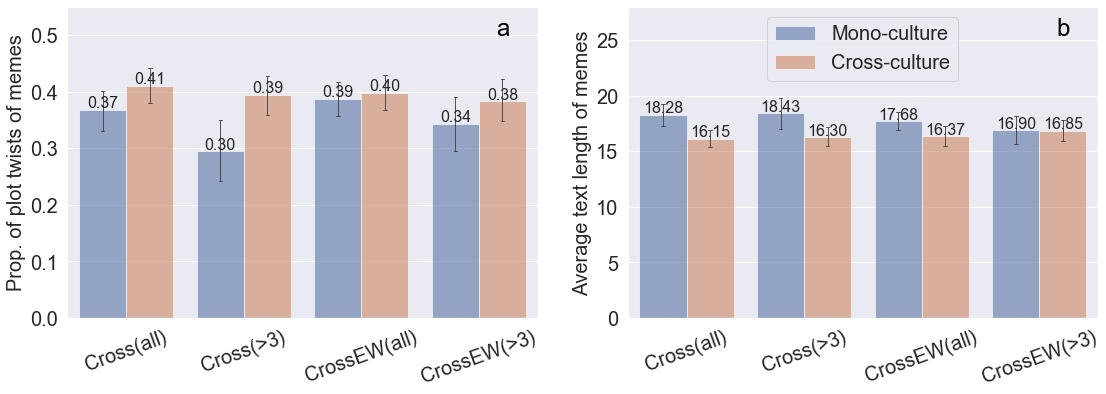

In [165]:
f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(16, 6))

plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['font.size'] = '24' #用来
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

# 语义转折
import numpy as np
import seaborn as sns
#plt.figure(figsize=(8,6))

gender_list = []
same_gender = []
for cluster_id in cross_cluster_dict_new[0]:
    #if cluster_size[cluster_id]>=4:
    #print(cluster_topic_entropy_feature[cluster_id])
    #same_gender.append(np.ceil(cluster_role_africa[cluster_id]))
    gender_list.append({"Plot twists proportion": cluster_semantic[cluster_id],"Class":"Mono-culture","Group":"M1"})
    #same_gender.append(cluster_semantic[cluster_id])

cross_gender = []
for cluster_id in cross_cluster_dict_new[1]:
    #if cluster_size[cluster_id]>=4:
    #print(cluster_topic_entropy_feature[cluster_id])
    #cross_gender.append(np.ceil(cluster_role_africa[cluster_id]))
    #cross_gender.append(cluster_semantic[cluster_id])
    gender_list.append({"Plot twists proportion": cluster_semantic[cluster_id],"Class":"Cross-culture","Group":"M1"})

# same_dict_rate = {"1":np.average(same_gender)}
# cross_dict_rate = {"1":np.average(cross_gender)}


# gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"Cross(All)"})
# gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"Cross(All)"})

# gender_list.append({"Plot twists proportion": same_dict_rate["1"],"Class":"Same","Group":"M1"})
# gender_list.append({"Plot twists proportion": cross_dict_rate["1"],"Class":"Cross","Group":"M1"})


same_gender = []
for cluster_id in cross_cluster_dict_new[0]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        #same_gender.append(np.ceil(cluster_role_africa[cluster_id]))
        #same_gender.append(cluster_semantic[cluster_id])
        gender_list.append({"Plot twists proportion": cluster_semantic[cluster_id],"Class":"Mono-culture","Group":"M2"})


cross_gender = []
for cluster_id in cross_cluster_dict_new[1]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        #cross_gender.append(np.ceil(cluster_role_africa[cluster_id]))
        #cross_gender.append(cluster_semantic[cluster_id])
        gender_list.append({"Plot twists proportion": cluster_semantic[cluster_id],"Class":"Cross-culture","Group":"M2"})

# same_dict_rate = {"1":np.average(same_gender)}
# cross_dict_rate = {"1":np.average(cross_gender)}

# gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"Cross(size>=4)"})
# gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"Cross(size>=4)"})

# gender_list.append({"Plot twists proportion": same_dict_rate["1"],"Class":"Same","Group":"M2"})
# gender_list.append({"Plot twists proportion": cross_dict_rate["1"],"Class":"Cross","Group":"M2"})


same_gender = []
for cluster_id in cross_cluster_dict_w_e_new[0]:
    if cluster_size[cluster_id]>=0:
        #print(cluster_topic_entropy_feature[cluster_id])
        #same_gender.append(np.ceil(cluster_role_africa[cluster_id]))
        #same_gender.append(cluster_semantic[cluster_id])
        gender_list.append({"Plot twists proportion": cluster_semantic[cluster_id],"Class":"Mono-culture","Group":"M4"})


cross_gender = []
for cluster_id in cross_cluster_dict_w_e_new[1]:
    if cluster_size[cluster_id]>=0:
        #print(cluster_topic_entropy_feature[cluster_id])
        #cross_gender.append(np.ceil(cluster_role_africa[cluster_id]))
        #cross_gender.append(cluster_semantic[cluster_id])
        gender_list.append({"Plot twists proportion": cluster_semantic[cluster_id],"Class":"Cross-culture","Group":"M4"})

# same_dict_rate = {"1":np.average(same_gender)}
# cross_dict_rate = {"1":np.average(cross_gender)}

# gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"Cross_w_e(All)"})
# gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"Cross_w_e(All)"})

# gender_list.append({"Plot twists proportion": same_dict_rate["1"],"Class":"Same","Group":"M4"})
# gender_list.append({"Plot twists proportion": cross_dict_rate["1"],"Class":"Cross","Group":"M4"})

same_gender = []
for cluster_id in cross_cluster_dict_w_e_new[0]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        #same_gender.append(np.ceil(cluster_role_africa[cluster_id]))
        #same_gender.append(cluster_semantic[cluster_id])
        gender_list.append({"Plot twists proportion": cluster_semantic[cluster_id],"Class":"Mono-culture","Group":"M5"})


cross_gender = []
for cluster_id in cross_cluster_dict_w_e_new[1]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        #cross_gender.append(np.ceil(cluster_role_africa[cluster_id]))
        #cross_gender.append(cluster_semantic[cluster_id])
        gender_list.append({"Plot twists proportion": cluster_semantic[cluster_id],"Class":"Cross-culture","Group":"M5"})

# same_dict_rate = {"1":np.average(same_gender)}
# cross_dict_rate = {"1":np.average(cross_gender)}

# gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"Cross_w_e(size>=4)"})
# gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"Cross_w_e(size>=4)"})

# gender_list.append({"Plot twists proportion": same_dict_rate["1"],"Class":"Same","Group":"M5"})
# gender_list.append({"Plot twists proportion": cross_dict_rate["1"],"Class":"Cross","Group":"M5"})

gender_df = pd.DataFrame(gender_list)
sns.barplot(ax=ax[0], x="Group",y="Plot twists proportion",data =gender_df, hue="Class",capsize=.06, errwidth=0.9, saturation=0.75, alpha=0.6)
show_values(ax[0])
#ax[0].legend_.remove()
#ax[0].legend()
ax[0].tick_params(bottom=False)


#plt.legend(["Same","Cross"])
ax[0].set_xlabel('')
ax[0].set_ylim((0,0.55))

#plt.savefig('./figs/meme_twist.png', dpi=600)

# 情绪熵，社区内跨文化传播
import numpy as np
import seaborn as sns
txt_length_list = []
#same_txt_length = []
for cluster_id in cross_cluster_dict_new[0]:
    #if cluster_size[cluster_id]>=4:
    #print(cluster_topic_entropy_feature[cluster_id])
    #same_movie.append(cluster_role_movie_rate[cluster_id])
    #print(cluster_txt_length[cluster_id])
    txt_length_list.append({"Text length":cluster_txt_length[cluster_id], "Class": "Mono-culture", "Group":"M1"})

for cluster_id in cross_cluster_dict_new[1]:
    #if cluster_size[cluster_id]>=4:
    #print(cluster_topic_entropy_feature[cluster_id])
    txt_length_list.append({"Text length":cluster_txt_length[cluster_id], "Class": "Cross-culture", "Group":"M1"})

for cluster_id in cross_cluster_dict_new[0]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        txt_length_list.append({"Text length":cluster_txt_length[cluster_id], "Class": "Mono-culture", "Group":"M2"})

for cluster_id in cross_cluster_dict_new[1]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        txt_length_list.append({"Text length":cluster_txt_length[cluster_id], "Class": "Cross-culture", "Group":"M2"})

for cluster_id in cross_cluster_dict_w_e_new[0]:
    if cluster_size[cluster_id]>=0:
        #print(cluster_topic_entropy_feature[cluster_id])
        txt_length_list.append({"Text length":cluster_txt_length[cluster_id], "Class": "Mono-culture", "Group":"M4"})

for cluster_id in cross_cluster_dict_w_e_new[1 ]:
    if cluster_size[cluster_id]>=0:
        #print(cluster_topic_entropy_feature[cluster_id])
        txt_length_list.append({"Text length":cluster_txt_length[cluster_id], "Class": "Cross-culture", "Group":"M4"})


for cluster_id in cross_cluster_dict_w_e_new[0]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        txt_length_list.append({"Text length":cluster_txt_length[cluster_id], "Class": "Mono-culture", "Group":"M5"})

for cluster_id in cross_cluster_dict_w_e_new[1]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        txt_length_list.append({"Text length":cluster_txt_length[cluster_id], "Class": "Cross-culture", "Group":"M5"})

text_length_df = pd.DataFrame(txt_length_list)
sns.barplot(ax=ax[1], x="Group",y="Text length",data =text_length_df, hue="Class",capsize=.06, errwidth=0.9, saturation=0.75, alpha=0.6)#, width=0.4)
show_values(ax[1])


ax[1].tick_params(bottom=False)

#plt.legend(["Same","Cross"])
ax[1].set_xlabel('')
ax[1].set_ylim((0,28))
ax[1].legend(title='',loc='upper center',fontsize=20)

ax[0].legend_.remove()

styles = dict(ha="center", va="center", color="black", size=24)
ax[0].text(3.2, 0.51, 'a', **styles) 
ax[1].text(3.2, 26, 'b', **styles) 
ax[0].set_ylabel('Prop. of plot twists of memes',fontsize=20)
ax[1].set_ylabel('Average text length of memes',fontsize=20)
ax[0].set_xticklabels(labels=['Cross(all)','Cross(>3)','CrossEW(all)','CrossEW(>3)'],rotation=20, fontsize=20)
ax[1].set_xticklabels(labels=['Cross(all)','Cross(>3)','CrossEW(all)','CrossEW(>3)'],rotation=20, fontsize=20)
ax[0].set_yticklabels(labels = [0.0,0.1,0.2,0.3,0.4,0.5],fontsize=20)
ax[1].set_yticklabels(labels = [0,5,10,15,20,25],fontsize=20)
plt.tight_layout()
plt.savefig('./figs/fig2_meme_plottwist_txtlength.png', dpi=600)


In [196]:

# # 语义转折
# import numpy as np
# import seaborn as sns
# plt.figure(figsize=(8,6))

# same_gender = []
# for cluster_id in cross_cluster_dict_new[0]:
#     #if cluster_size[cluster_id]>=4:
#     #print(cluster_topic_entropy_feature[cluster_id])
#     #same_gender.append(np.ceil(cluster_role_africa[cluster_id]))
#     same_gender.append(cluster_semantic[cluster_id])

# cross_gender = []
# for cluster_id in cross_cluster_dict_new[1]:
#     #if cluster_size[cluster_id]>=4:
#     #print(cluster_topic_entropy_feature[cluster_id])
#     #cross_gender.append(np.ceil(cluster_role_africa[cluster_id]))
#     cross_gender.append(cluster_semantic[cluster_id])

# same_dict_rate = {"1":np.average(same_gender)}
# cross_dict_rate = {"1":np.average(cross_gender)}

# gender_list = []
# # gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"Cross(All)"})
# # gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"Cross(All)"})

# gender_list.append({"Plot twists proportion": same_dict_rate["1"],"Class":"Same","Group":"M1"})
# gender_list.append({"Plot twists proportion": cross_dict_rate["1"],"Class":"Cross","Group":"M1"})


# same_gender = []
# for cluster_id in cross_cluster_dict_new[0]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         #same_gender.append(np.ceil(cluster_role_africa[cluster_id]))
#         same_gender.append(cluster_semantic[cluster_id])


# cross_gender = []
# for cluster_id in cross_cluster_dict_new[1]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         #cross_gender.append(np.ceil(cluster_role_africa[cluster_id]))
#         cross_gender.append(cluster_semantic[cluster_id])

# same_dict_rate = {"1":np.average(same_gender)}
# cross_dict_rate = {"1":np.average(cross_gender)}

# # gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"Cross(size>=4)"})
# # gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"Cross(size>=4)"})

# gender_list.append({"Plot twists proportion": same_dict_rate["1"],"Class":"Same","Group":"M2"})
# gender_list.append({"Plot twists proportion": cross_dict_rate["1"],"Class":"Cross","Group":"M2"})


# same_gender = []
# for cluster_id in cross_cluster_dict_w_e_new[0]:
#     if cluster_size[cluster_id]>=0:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         #same_gender.append(np.ceil(cluster_role_africa[cluster_id]))
#         same_gender.append(cluster_semantic[cluster_id])


# cross_gender = []
# for cluster_id in cross_cluster_dict_w_e_new[1]:
#     if cluster_size[cluster_id]>=0:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         #cross_gender.append(np.ceil(cluster_role_africa[cluster_id]))
#         cross_gender.append(cluster_semantic[cluster_id])

# same_dict_rate = {"1":np.average(same_gender)}
# cross_dict_rate = {"1":np.average(cross_gender)}

# # gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"Cross_w_e(All)"})
# # gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"Cross_w_e(All)"})

# gender_list.append({"Plot twists proportion": same_dict_rate["1"],"Class":"Same","Group":"M4"})
# gender_list.append({"Plot twists proportion": cross_dict_rate["1"],"Class":"Cross","Group":"M4"})

# same_gender = []
# for cluster_id in cross_cluster_dict_w_e_new[0]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         #same_gender.append(np.ceil(cluster_role_africa[cluster_id]))
#         same_gender.append(cluster_semantic[cluster_id])


# cross_gender = []
# for cluster_id in cross_cluster_dict_w_e_new[1]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         #cross_gender.append(np.ceil(cluster_role_africa[cluster_id]))
#         cross_gender.append(cluster_semantic[cluster_id])

# same_dict_rate = {"1":np.average(same_gender)}
# cross_dict_rate = {"1":np.average(cross_gender)}

# # gender_list.append({"Proportion": same_dict_rate["1"],"Class":"Same","Group":"Cross_w_e(size>=4)"})
# # gender_list.append({"Proportion": cross_dict_rate["1"],"Class":"Cross","Group":"Cross_w_e(size>=4)"})

# gender_list.append({"Plot twists proportion": same_dict_rate["1"],"Class":"Same","Group":"M5"})
# gender_list.append({"Plot twists proportion": cross_dict_rate["1"],"Class":"Cross","Group":"M5"})

# gender_df = pd.DataFrame(gender_list)
# ax = sns.barplot(x="Group",y="Plot twists proportion",data =gender_df, hue="Class",capsize=.2, alpha=0.8)
# show_values(ax)
# plt.legend(title='')
# plt.tick_params(bottom=False)

# #plt.legend(["Same","Cross"])
# plt.xlabel('')
# plt.ylim((0,0.55))

# plt.tight_layout()
# #plt.savefig('./figs/meme_twist.png', dpi=600)

In [197]:
# plt.figure(figsize=(8,6))
# #cluster_topic_ave_count_per_meme[id]=feature_topic_distinct_count/len(cluster_image_dict[id])
# #cluster_emotion_ave_count_per_meme[id]=feature_emotion_distinct_count/len(cluster_image_dict[id])

# # 情绪熵，社区内跨文化传播
# import numpy as np
# import seaborn as sns
# txt_length_list = []
# #same_txt_length = []
# for cluster_id in cross_cluster_dict_new[0]:
#     #if cluster_size[cluster_id]>=4:
#     #print(cluster_topic_entropy_feature[cluster_id])
#     #same_movie.append(cluster_role_movie_rate[cluster_id])
#     #print(cluster_txt_length[cluster_id])
#     txt_length_list.append({"Text length":cluster_txt_length[cluster_id], "Class": "same", "Group":"M1"})

# for cluster_id in cross_cluster_dict_new[1]:
#     #if cluster_size[cluster_id]>=4:
#     #print(cluster_topic_entropy_feature[cluster_id])
#     txt_length_list.append({"Text length":cluster_txt_length[cluster_id], "Class": "cross", "Group":"M1"})

# for cluster_id in cross_cluster_dict_new[0]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         txt_length_list.append({"Text length":cluster_txt_length[cluster_id], "Class": "same", "Group":"M2"})

# for cluster_id in cross_cluster_dict_new[1]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         txt_length_list.append({"Text length":cluster_txt_length[cluster_id], "Class": "cross", "Group":"M2"})

# for cluster_id in cross_cluster_dict_w_e_new[0]:
#     if cluster_size[cluster_id]>=0:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         txt_length_list.append({"Text length":cluster_txt_length[cluster_id], "Class": "same", "Group":"M4"})

# for cluster_id in cross_cluster_dict_w_e_new[1 ]:
#     if cluster_size[cluster_id]>=0:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         txt_length_list.append({"Text length":cluster_txt_length[cluster_id], "Class": "cross", "Group":"M4"})


# for cluster_id in cross_cluster_dict_w_e_new[0]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         txt_length_list.append({"Text length":cluster_txt_length[cluster_id], "Class": "same", "Group":"M5"})

# for cluster_id in cross_cluster_dict_w_e_new[1]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         txt_length_list.append({"Text length":cluster_txt_length[cluster_id], "Class": "cross", "Group":"M5"})

# text_length_df = pd.DataFrame(txt_length_list)
# ax = sns.barplot(x="Group",y="Text length",data =text_length_df, hue="Class",capsize=.06, errwidth=0.9, alpha=0.8)#, width=0.4)
# show_values(ax)

# plt.legend(title='',loc='upper left')
# plt.tick_params(bottom=False)

# #plt.legend(["Same","Cross"])
# plt.xlabel('')
# plt.ylim((0,30))

# plt.tight_layout()
# plt.savefig('./figs/meme_txtlength.png', dpi=600)

[0.21241171 0.17305752 0.12209889 0.09687185 0.13975782 0.2184662
 0.03733602]


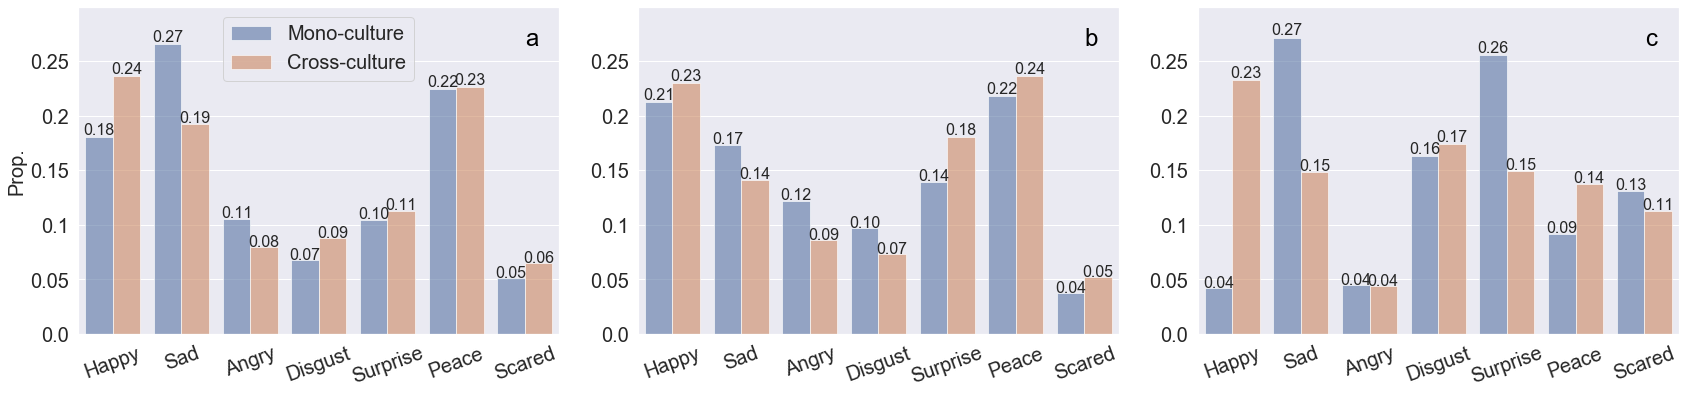

In [164]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                if p.get_height() == 0:
                    continue
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.2f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center", fontsize=16) 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.2f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left", fontsize=16)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            if idx>1:
                _single(ax)
    else:
        _single(axs)
        #pass
fig, ax = plt.subplots(nrows=1, ncols = 3, figsize=(24, 6))


same_africa_emotion = [0,0,0,0,0,0,0]
same_africa_emotion_strength = []
role_emotion_list = ['Happy', 'Sad', 'Angry', 'Disgust', 'Surprise', 'Peace', 'Scared']


for cluster_id in cross_cluster_dict_new[0]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        role_emotion = cluster_role_emotion[cluster_id]
        role_emotion_strengh = cluster_role_strength_list[cluster_id]
        #same_africa_emotion += role_emotion
        c=[same_africa_emotion[i]+role_emotion[i] for i in range(min(len(same_africa_emotion),len(role_emotion)))]
        same_africa_emotion = c
        same_africa_emotion_strength.append(role_emotion_strengh)
        #print(role_emotion,role_emotion_strengh)
        #same_africa_emotion.append(cluster_role_africa[cluster_id])

africa_emotion_list = []
proportion_list = same_africa_emotion/np.sum(same_africa_emotion)
for i in range(7):
    record = {"Class":"Mono-culture","Emotion":role_emotion_list[i],"Proportion":proportion_list[i]}
    africa_emotion_list.append(record)


cross_africa_emotion = [0,0,0,0,0,0,0]
cross_africa_emotion_strength = []
for cluster_id in cross_cluster_dict_new[1]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        role_emotion = cluster_role_emotion[cluster_id]
        role_emotion_strengh = cluster_role_strength_list[cluster_id]
        #print(role_emotion,role_emotion_strengh)
        c=[cross_africa_emotion[i]+role_emotion[i] for i in range(min(len(cross_africa_emotion),len(role_emotion)))]
        cross_africa_emotion = c
        cross_africa_emotion_strength.append(role_emotion_strengh)



proportion_list = cross_africa_emotion/np.sum(cross_africa_emotion)

for i in range(7):
    record = {"Class":"Cross-culture","Emotion":role_emotion_list[i],"Proportion":proportion_list[i]}
    africa_emotion_list.append(record)


africa_emotion_list_df = pd.DataFrame(africa_emotion_list)

#plt.figure(figsize=(12,6))
sns.barplot(ax = ax[0], data=africa_emotion_list_df, x="Emotion",y="Proportion", hue="Class",capsize=.01, saturation=0.75, alpha=0.6)
show_values(ax[0])
ax[0].set_xlabel('')
plt.yticks(fontsize=20)
ax[0].legend(title='', loc = 'upper center', fontsize=20)
#plt.xlabel(fontsize=20)
plt.xticks(fontsize=16)
same_africa_emotion = [0,0,0,0,0,0,0]
same_africa_emotion_strength = []
for cluster_id in cross_cluster_dict_new[0]:
    if cluster_size[cluster_id]>=4 and cluster_role_female_rate[cluster_id]>0:
        #print(cluster_topic_entropy_feature[cluster_id])
        role_emotion = cluster_role_emotion[cluster_id]
        role_emotion_strengh = cluster_role_strength[cluster_id]
        #same_africa_emotion += role_emotion
        c=[same_africa_emotion[i]+role_emotion[i] for i in range(min(len(same_africa_emotion),len(role_emotion)))]
        same_africa_emotion = c
        same_africa_emotion_strength.append(role_emotion_strengh)
        #print(role_emotion,role_emotion_strengh)
        #same_africa_emotion.append(cluster_role_africa[cluster_id])


proportion_list = same_africa_emotion/np.sum(same_africa_emotion)
print(proportion_list)
africa_emotion_list = []
role_emotion_list = ['Happy', 'Sad', 'Angry', 'Disgust', 'Surprise', 'Peace', 'Scared']
for i in range(7):
    record = {"Class":"Same","Emotion":role_emotion_list[i],"Proportion":proportion_list[i]}
    africa_emotion_list.append(record)

cross_africa_emotion = [0,0,0,0,0,0,0]
cross_africa_emotion_strength = []
for cluster_id in cross_cluster_dict_new[1]:
    if cluster_size[cluster_id]>=4 and cluster_role_female_rate[cluster_id]>0:
        #print(cluster_topic_entropy_feature[cluster_id])
        role_emotion = cluster_role_emotion[cluster_id]
        role_emotion_strengh = cluster_role_strength[cluster_id]
        #print(role_emotion,role_emotion_strengh)
        c=[cross_africa_emotion[i]+role_emotion[i] for i in range(min(len(cross_africa_emotion),len(role_emotion)))]
        cross_africa_emotion = c
        cross_africa_emotion_strength.append(role_emotion_strengh)



proportion_list = cross_africa_emotion/np.sum(cross_africa_emotion)

for i in range(7):
    record = {"Class":"Cross","Emotion":role_emotion_list[i],"Proportion":proportion_list[i]}
    africa_emotion_list.append(record)

africa_emotion_list_df = pd.DataFrame(africa_emotion_list)

#plt.figure(figsize=(12,6))
sns.barplot(ax = ax[1], data=africa_emotion_list_df, x="Emotion",y="Proportion", hue="Class",capsize=.01, saturation=0.75, alpha=0.6)
show_values(ax[1])
ax[1].get_legend().remove()
ax[1].set_xlabel('')
plt.xticks(fontsize=16)
same_africa_emotion = [0,0,0,0,0,0,0]
same_africa_emotion_strength = []
role_emotion_list = ['Happy', 'Sad', 'Angry', 'Disgust', 'Surprise', 'Peace', 'Scared']


for cluster_id in cross_cluster_dict_new[0]:
    if cluster_size[cluster_id]>=4 and cluster_role_africa[cluster_id]>0:
        #print(cluster_topic_entropy_feature[cluster_id])
        role_emotion = cluster_role_emotion[cluster_id]
        role_emotion_strengh = cluster_role_strength_list[cluster_id]
        #same_africa_emotion += role_emotion
        c=[same_africa_emotion[i]+role_emotion[i] for i in range(min(len(same_africa_emotion),len(role_emotion)))]
        same_africa_emotion = c
        same_africa_emotion_strength.append(role_emotion_strengh)
        #print(role_emotion,role_emotion_strengh)
        #same_africa_emotion.append(cluster_role_africa[cluster_id])

africa_emotion_list = []
proportion_list = same_africa_emotion/np.sum(same_africa_emotion)
for i in range(7):
    record = {"Class":"Same","Emotion":role_emotion_list[i],"Proportion":proportion_list[i]}
    africa_emotion_list.append(record)


cross_africa_emotion = [0,0,0,0,0,0,0]
cross_africa_emotion_strength = []
for cluster_id in cross_cluster_dict_new[1]:
    if cluster_size[cluster_id]>=4 and cluster_role_africa[cluster_id]>0:
        #print(cluster_topic_entropy_feature[cluster_id])
        role_emotion = cluster_role_emotion[cluster_id]
        role_emotion_strengh = cluster_role_strength_list[cluster_id]
        #print(role_emotion,role_emotion_strengh)
        c=[cross_africa_emotion[i]+role_emotion[i] for i in range(min(len(cross_africa_emotion),len(role_emotion)))]
        cross_africa_emotion = c
        cross_africa_emotion_strength.append(role_emotion_strengh)

proportion_list = cross_africa_emotion/np.sum(cross_africa_emotion)

for i in range(7):
    record = {"Class":"Cross","Emotion":role_emotion_list[i],"Proportion":proportion_list[i]}
    africa_emotion_list.append(record)


africa_emotion_list_df = pd.DataFrame(africa_emotion_list)

#plt.figure(figsize=(12,6))
sns.barplot(ax = ax[2], data=africa_emotion_list_df, x="Emotion",y="Proportion", hue="Class",capsize=.01, saturation=0.75, alpha=0.6)
show_values(ax[2])
ax[2].set_xlabel('')
ax[2].set_ylabel('')
ax[1].set_ylabel('')
ax[2].legend(title='')

ax[0].set_ylim([0,0.3])
ax[1].set_ylim([0,0.3])
ax[2].set_ylim([0,0.3])

styles = dict(ha="center", va="center", color="black", size=24)
ax[0].text(6.1, 0.27, 'a', **styles) 
ax[1].text(6.1, 0.27, 'b', **styles) 
ax[2].text(6.1, 0.27, 'c', **styles) 
#ax[0].set_title("The distribution of characters's emotions in memes")
#ax[1].set_title("The distribution of  African characters's emotions in memes")
ax[2].get_legend().remove()

ax[0].set_xticklabels(labels = role_emotion_list, fontsize= 20,rotation=20)
ax[1].set_xticklabels(labels = role_emotion_list, fontsize= 20,rotation=20)
ax[2].set_xticklabels(labels = role_emotion_list, fontsize= 20,rotation=20)
ax[0].set_yticklabels(labels = [0.00, 0.05, 0.10, 0.15, 0.20, 0.25], fontsize= 20)
ax[1].set_yticklabels(labels = [0.00, 0.05, 0.10, 0.15, 0.20, 0.25], fontsize= 20)
ax[2].set_yticklabels(labels = [0.00, 0.05, 0.10, 0.15, 0.20, 0.25], fontsize= 20)
ax[0].set_ylabel('Prop.',fontsize=20)
plt.tight_layout()
plt.savefig('./figs/fig3_role_emotion_dif_g4_all_vs_africa.png', dpi=600)

In [148]:
africa_emotion_list_df.head(10)

Class   Emotion  Proportion
0   Same     Happy    0.041892
1   Same       Sad    0.271622
2   Same     Angry    0.044595
3   Same   Disgust    0.163514
4   Same  Surprise    0.255405
5   Same     Peace    0.091892
6   Same    Scared    0.131081
7  Cross     Happy    0.233119
8  Cross       Sad    0.148714
9  Cross     Angry    0.044373

In [369]:
# import numpy as np
# same_emotion_matrix = []
# for cluster_id in cross_cluster_dict[0]:
#     #print(cluster_emotion_feature[cluster_id])
#     same_emotion_matrix.append(cluster_emotion_feature[cluster_id])

# same_emotion_dis = np.sum(np.asarray(same_emotion_matrix),axis=0)

# cross_emotion_matrix = []
# for cluster_id in cross_cluster_dict[1]:
#     #print(cluster_emotion_feature[cluster_id])
#     cross_emotion_matrix.append(cluster_emotion_feature[cluster_id])

# cross_emotion_dis = np.sum(np.asarray(cross_emotion_matrix),axis=0)

# same_dist = same_emotion_dis/np.sum(same_emotion_dis)
# cross_dist = cross_emotion_dis/np.sum(cross_emotion_dis)

# emotion_dif = {}
# emotion_dis_list = []
# for i in range(len(same_dist)):
#     record = {}
#     dif = same_dist[i]-cross_dist[i]
#     #emotion_dif[topic_list[i]]=dif
#     emotion_dif[emotion_list[i]]=dif
#     record['tag']=emotion_zh_en_mapping[emotion_list[i]]
#     record['same']=same_dist[i]
#     record['cross']=cross_dist[i]
#     record['dif']=dif
#     emotion_dis_list.append(record)
#     print(emotion_list[i],dif)
# emotion_dis_df = pd.DataFrame(emotion_dis_list)

In [368]:
# #校正后的跨文化传播的情感分布对比
# import numpy as np
# from matplotlib import gridspec
# same_emotion_matrix = []
# for cluster_id in cross_cluster_dict_new[0]:
#     #print(cluster_emotion_feature[cluster_id])
#     same_emotion_matrix.append(cluster_emotion_feature[cluster_id])

# same_emotion_dis = np.sum(np.asarray(same_emotion_matrix),axis=0)

# cross_emotion_matrix = []
# for cluster_id in cross_cluster_dict_new[1]:
#     #print(cluster_emotion_feature[cluster_id])
#     cross_emotion_matrix.append(cluster_emotion_feature[cluster_id])

# cross_emotion_dis = np.sum(np.asarray(cross_emotion_matrix),axis=0)

# same_dist = same_emotion_dis/np.sum(same_emotion_dis)
# cross_dist = cross_emotion_dis/np.sum(cross_emotion_dis)

# emotion_dif = {}
# emotion_dis_list = []
# for i in range(len(same_dist)):
#     record = {}
#     dif = same_dist[i]-cross_dist[i]
#     #emotion_dif[topic_list[i]]=dif
#     emotion_dif[emotion_list[i]]=dif
#     record['tag']=emotion_zh_en_mapping[emotion_list[i]]
#     record['same']=same_dist[i]
#     record['cross']=cross_dist[i]
#     record['dif']=dif
#     emotion_dis_list.append(record)
#     #print(emotion_list[i],dif)
# emotion_dis_df = pd.DataFrame(emotion_dis_list)

# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.set_theme()
# #matplotlib.rcParams['font.family']='SimHei'#黑体'STSong'仿宋
# sns.set_color_codes("muted")
# plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
# plt.rcParams['font.size'] = '24' #用来
# plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
 
# #sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})
# sns.set_context("poster", font_scale=1)

# # Initialize the matplotlib figure
# f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(18, 20))

# # Load the example car crash dataset
# #crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
# crashes = emotion_dis_df.sort_values("dif", ascending=False)
# # Plot the total crashes
# #sns.set_color_codes("pastel")
# sns.barplot(ax = ax[0], x="same", y="tag", data=crashes,
#             label="same culture", color="r", saturation=0.75, alpha=0.6)

# # Plot the crashes where alcohol was involved
# sns.set_color_codes("muted")
# sns.barplot(ax = ax[0], x="cross", y="tag", data=crashes,
#             label="cross culture", color="b", saturation=0.75, alpha=0.6)

# # Add a legend and informative axis label
# #ax[0].legend(ncol=1, loc="center right", frameon=True)
# ax[0].set_xlabel('Proportion')
# ax[0].set_ylabel('')
# #ax[0].set_title('A. Emotion', fontsize=30)

# import numpy as np
# same_topic_matrix = []
# for cluster_id in cross_cluster_dict[0]:
#     #print(cluster_topic_feature[cluster_id])
#     same_topic_matrix.append(cluster_topic_feature[cluster_id])

# same_topic_dis = np.sum(np.asarray(same_topic_matrix),axis=0)

# cross_topic_matrix = []
# for cluster_id in cross_cluster_dict[1]:
#     #print(cluster_topic_feature[cluster_id])
#     cross_topic_matrix.append(cluster_topic_feature[cluster_id])

# cross_topic_dis = np.sum(np.asarray(cross_topic_matrix),axis=0)

# same_dist = same_topic_dis/np.sum(same_topic_dis)
# cross_dist = cross_topic_dis/np.sum(cross_topic_dis)

# topic_dif = {}
# topic_dis_list = []
# for i in range(len(same_dist)):
#     record = {}
#     dif = same_dist[i]-cross_dist[i]
#     topic_dif[topic_list[i]]=dif
#     record['tag']=topic_zh_en_mapping[topic_list[i]]
#     record['same']=same_dist[i]
#     record['cross']=cross_dist[i]
#     record['dif']=dif
#     topic_dis_list.append(record)
#     #print(topic_list[i],dif)
# topic_dis_df = pd.DataFrame(topic_dis_list)

# # Load the example car crash dataset
# #crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
# crashes_topic = topic_dis_df.sort_values("dif", ascending=False)
# # Plot the total crashes
# #sns.set_color_codes("pastel")
# sns.barplot(ax= ax[1], x="same", y="tag", data=crashes_topic, label="same culture", color="r", saturation=0.75, alpha=0.6)

# # Plot the crashes where alcohol was involved
# sns.set_color_codes("muted")
# sns.barplot(ax= ax[1], x="cross", y="tag", data=crashes_topic,
#             label="cross culture", color="b", saturation=0.75, alpha=0.6)

# # Add a legend and informative axis label
# ax[1].legend(ncol=1, loc="center right", frameon=True)
# ax[1].set_xlabel('Proportion')
# ax[1].set_ylabel('')#
# #ax[1].set_title('B. Topic', fontsize=30)

# styles = dict(ha="center", va="center", color="black", size=24)
# ax[0].text(0.12, 0.48, 'A', **styles) 
# ax[1].text(0.122, 0.55, 'B', **styles) 
# plt.tight_layout()
# plt.savefig('./figs/fig4_emotion_topic_0915_corrected.png', dpi=600)


In [367]:
# import numpy as np
# same_emotion_matrix = []
# for cluster_id in cross_cluster_dict[0]:
#     #print(cluster_emotion_feature[cluster_id])
#     if cluster_role_africa[cluster_id]>0:
#         same_emotion_matrix.append(cluster_emotion_feature[cluster_id])

# same_emotion_dis = np.sum(np.asarray(same_emotion_matrix),axis=0)

# cross_emotion_matrix = []
# for cluster_id in cross_cluster_dict[1]:
#     #print(cluster_emotion_feature[cluster_id])
#     if cluster_role_africa[cluster_id]>0:
#         cross_emotion_matrix.append(cluster_emotion_feature[cluster_id])

# cross_emotion_dis = np.sum(np.asarray(cross_emotion_matrix),axis=0)

# same_dist = same_emotion_dis/np.sum(same_emotion_dis)
# cross_dist = cross_emotion_dis/np.sum(cross_emotion_dis)

# emotion_dif = {}
# emotion_dis_list = []
# for i in range(len(same_dist)):
#     record = {}
#     dif = same_dist[i]-cross_dist[i]
#     #emotion_dif[topic_list[i]]=dif
#     emotion_dif[emotion_list[i]]=dif
#     record['tag']=emotion_zh_en_mapping[emotion_list[i]]
#     record['same']=same_dist[i]
#     record['cross']=cross_dist[i]
#     record['dif']=dif
#     emotion_dis_list.append(record)
#     print(emotion_list[i],dif)
# emotion_dis_df = pd.DataFrame(emotion_dis_list)

76
Rectangle(xy=(0, -0.4), width=0.0547071, height=0.8, angle=0)
Rectangle(xy=(0, 0.6), width=0.0123719, height=0.8, angle=0)
Rectangle(xy=(0, 1.6), width=0.0233907, height=0.8, angle=0)
Rectangle(xy=(0, 2.6), width=0.0392422, height=0.8, angle=0)
76
Rectangle(xy=(0, -0.4), width=0.046696, height=0.8, angle=0)
Rectangle(xy=(0, 0.6), width=0.00792952, height=0.8, angle=0)
Rectangle(xy=(0, 1.6), width=0.0229075, height=0.8, angle=0)
Rectangle(xy=(0, 2.6), width=0.0343612, height=0.8, angle=0)
76
Rectangle(xy=(0, -0.4), width=0.047619, height=0.8, angle=0)
Rectangle(xy=(0, 0.6), width=0.0075188, height=0.8, angle=0)
Rectangle(xy=(0, 1.6), width=0.0112782, height=0.8, angle=0)
Rectangle(xy=(0, 2.6), width=0.0626566, height=0.8, angle=0)


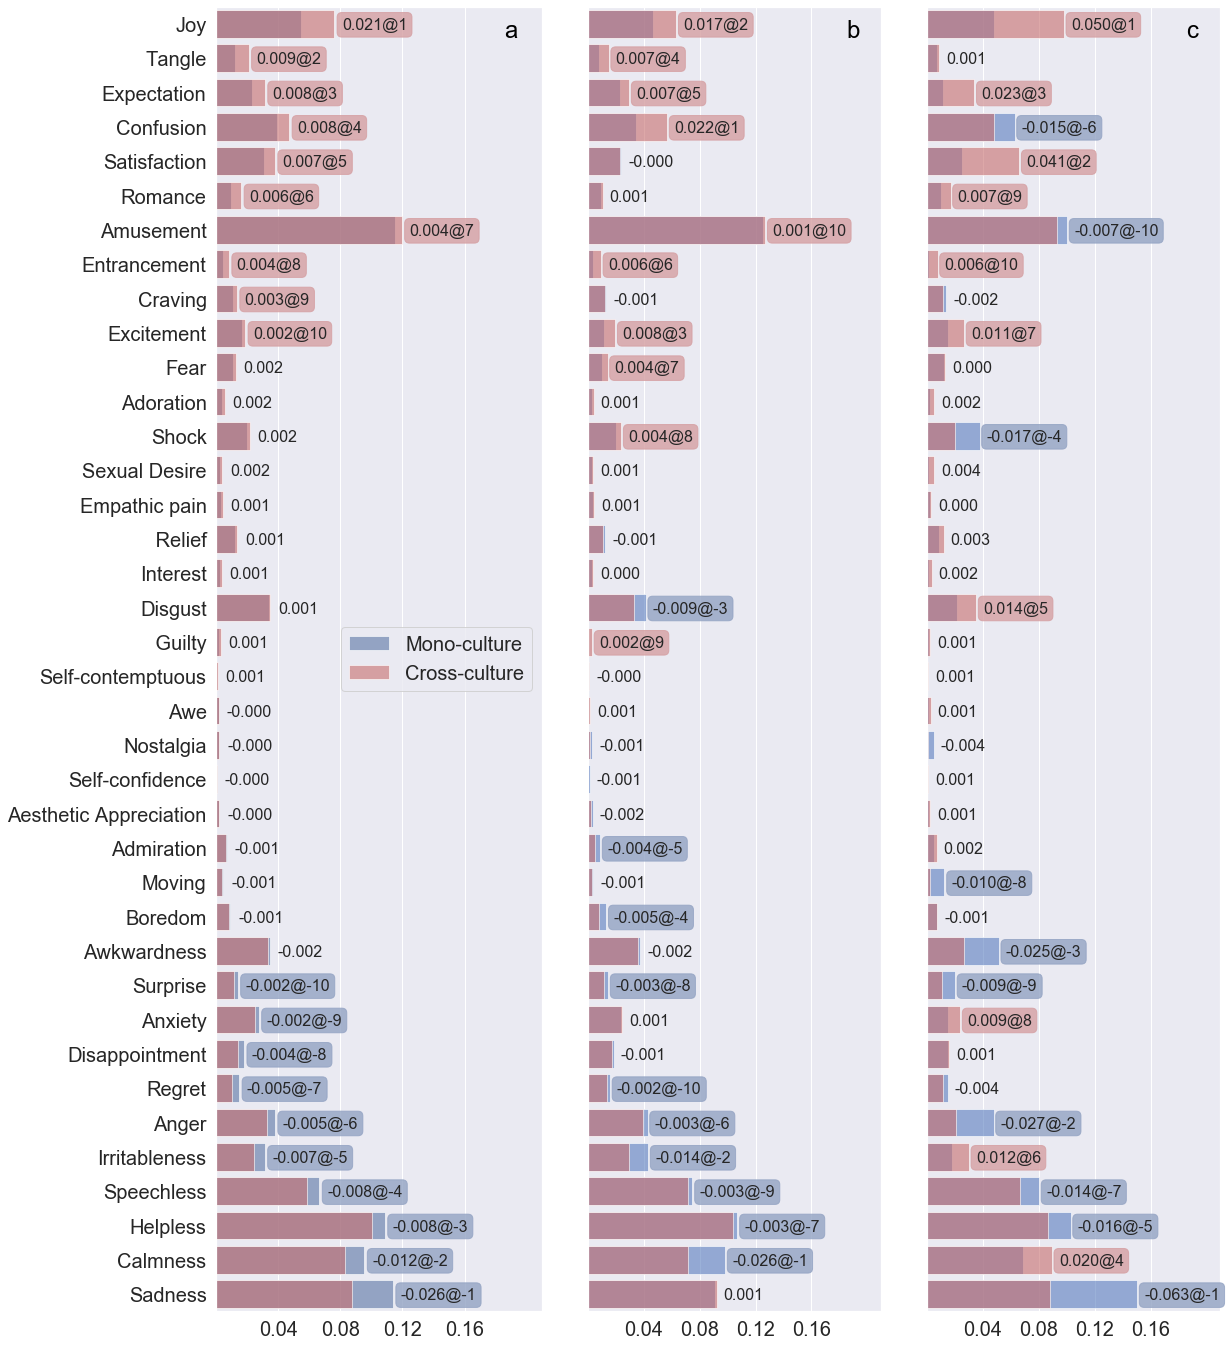

In [162]:
def show_values(axs, orient="v", space=.01, top5={},bottom5={}):
    def _single(ax):
        print(len(ax.patches))
        print(ax.patches[0])
        print(ax.patches[1])
        print(ax.patches[2])
        print(ax.patches[3])
        if orient == "v":
            for p in ax.patches:
                if p.get_height() == 0:
                    continue
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.2f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center", fontsize=16) 
        elif orient == "h":
            for i in range(int(len(ax.patches)/2)):
                p1 = ax.patches[i]
                p2 = ax.patches[i+38]
                p = None
                if p1.get_width() > p2.get_width():
                    p = p1
                else:
                    p = p2
                _x = p.get_x() + p.get_width() + float(space)+0.005
                _y = p.get_y() + p.get_height() - (p.get_height()*0.3)
                if i in top5:
                    bbox = dict(boxstyle='round', fc='#d59fa2', ec='#d59fa2', alpha=0.8)
                    value = '{:.3f}@{:d}'.format(p2.get_width()-p1.get_width(), top5[i])
                    ax.text(_x, _y, value, ha="left", fontsize=16, bbox=bbox,fontstyle='italic')
                elif i in bottom5:
                    bbox = dict(boxstyle='round', fc='#93a3c3', ec='#93a3c3', alpha=0.8)
                    value = '{:.3f}@{:d}'.format(p2.get_width()-p1.get_width(), -1*bottom5[i])
                    ax.text(_x, _y, value, ha="left", fontsize=16, bbox=bbox,fontstyle='italic')
                else:
                    #bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
                    value = '{:.3f}'.format(p2.get_width()-p1.get_width())
                    ax.text(_x, _y, value, ha="left", fontsize=16)
                
            # for p in ax.patches:
            #     _x = p.get_x() + p.get_width() + float(space)
            #     _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
            #     value = '{:.2f}'.format(p.get_width())
            #     ax.text(_x, _y, value, ha="left", fontsize=16)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            if idx>1:
                _single(ax)
    else:
        _single(axs)

#校正后的跨文化传播的情感分布对比
import numpy as np
same_emotion_matrix = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_emotion_feature[cluster_id])
    #if cluster_role_africa[cluster_id]>0:
    same_emotion_matrix.append(cluster_emotion_feature[cluster_id])

same_emotion_dis = np.sum(np.asarray(same_emotion_matrix),axis=0)

cross_emotion_matrix = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_emotion_feature[cluster_id])
    #if cluster_role_africa[cluster_id]>0:
    cross_emotion_matrix.append(cluster_emotion_feature[cluster_id])

cross_emotion_dis = np.sum(np.asarray(cross_emotion_matrix),axis=0)

same_dist = same_emotion_dis/np.sum(same_emotion_dis)
cross_dist = cross_emotion_dis/np.sum(cross_emotion_dis)

emotion_dif = {}
emotion_dis_list = []
for i in range(len(same_dist)):
    record = {}
    dif = same_dist[i]-cross_dist[i]
    #emotion_dif[topic_list[i]]=dif
    emotion_dif[emotion_list[i]]=dif
    record['tag']=emotion_zh_en_mapping[emotion_list[i]]
    record['same']=same_dist[i]
    record['cross']=cross_dist[i]
    record['dif']=dif
    emotion_dis_list.append(record)
    #print(emotion_list[i],dif)
topk = 10

top5 = {}
bottom5 = {}
for i in range(topk):
    top5[i] = i+1
for i in range(38-topk,38):
    bottom5[i]=38-i

emotion_dis_df = pd.DataFrame(emotion_dis_list)



import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

# create grid for different subplots
spec = gridspec.GridSpec(ncols=3, nrows=1,
                         width_ratios=[10, 9, 9], wspace=0.15)
fig = plt.figure(figsize=(18, 24))

ax0 = fig.add_subplot(spec[0])
sns.set_theme()
#matplotlib.rcParams['font.family']='SimHei'#黑体'STSong'仿宋

plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['font.size'] = '24' #用来
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
 
#sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})
#sns.set_context("poster", font_scale=1)

# Initialize the matplotlib figure
#f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(18, 20))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes = emotion_dis_df.sort_values("dif", ascending=True)

emotion_tag_list = crashes['tag'].values
# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(ax = ax0, x="same", y="tag", data=crashes,
            label="Mono-culture", color="b", saturation=0.75, alpha=0.6, legend=True)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(ax = ax0, x="cross", y="tag", data=crashes,
            label="Cross-culture", color="r", saturation=0.75, alpha=0.6, legend=True)

# Add a legend and informative axis label
#ax[0].legend(ncol=1, loc="center right", frameon=True)
ax0.set_xlabel('')
plt.yticks(fontsize=20)
plt.xticks([0.04,0.08,0.12,0.16],fontsize=20)
ax0.legend(title='', loc = 'center right', fontsize=20)

show_values(ax0, orient="h", space=0, top5=top5, bottom5=bottom5)

#ax0.yaxis.set_major_locator(plt.NullLocator())

#ax[0].set_title('A. Emotion', fontsize=30)

same_emotion_matrix = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_emotion_feature[cluster_id])
    if cluster_role_female_rate[cluster_id]>0:
        same_emotion_matrix.append(cluster_emotion_feature[cluster_id])

same_emotion_dis = np.sum(np.asarray(same_emotion_matrix),axis=0)

cross_emotion_matrix = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_emotion_feature[cluster_id])
    if cluster_role_female_rate[cluster_id]>0:
        cross_emotion_matrix.append(cluster_emotion_feature[cluster_id])

cross_emotion_dis = np.sum(np.asarray(cross_emotion_matrix),axis=0)

# same_dist = same_emotion_dis/np.sum(same_emotion_dis)
# cross_dist = cross_emotion_dis/np.sum(cross_emotion_dis)

# emotion_dif = {}
# emotion_dis_list = []
# emotion_tag_records = {}
# for i in range(len(same_dist)):
#     record = {}
#     dif = same_dist[i]-cross_dist[i]
#     #emotion_dif[topic_list[i]]=dif
#     emotion_dif[emotion_list[i]]=dif
#     record['tag']=emotion_zh_en_mapping[emotion_list[i]]
#     record['same']=same_dist[i]
#     record['cross']=cross_dist[i]
#     record['dif']=dif
#     emotion_dis_list.append(record)
#     emotion_tag_records[emotion_zh_en_mapping[emotion_list[i]]] = record
#     #print(emotion_list[i],dif)

# emotion_dis_list_new = []
# for emotion_tag in emotion_tag_list:
#     emotion_dis_list_new.append(emotion_tag_records[emotion_tag])

same_dist = same_emotion_dis/np.sum(same_emotion_dis)
cross_dist = cross_emotion_dis/np.sum(cross_emotion_dis)

emotion_dif = {}
emotion_dis_list = []
emotion_tag_records = {}
ranks = {}
for i in range(len(same_dist)):
    record = {}
    dif = cross_dist[i]-same_dist[i]
    #emotion_dif[topic_list[i]]=dif
    emotion_dif[emotion_list[i]]=dif
    record['tag']=emotion_zh_en_mapping[emotion_list[i]]
    record['same']=same_dist[i]
    record['cross']=cross_dist[i]
    record['dif']=dif
    ranks[record['tag']] = dif
    emotion_dis_list.append(record)
    emotion_tag_records[emotion_zh_en_mapping[emotion_list[i]]] = record
    #print(emotion_list[i],dif)


emotion_dis_list_new = []
ranks_value = {}
i = 0
for emotion_tag in emotion_tag_list:
    emotion_dis_list_new.append(emotion_tag_records[emotion_tag])
    ranks_value[i]=ranks[emotion_tag]
    i+=1

rank_list = sorted(ranks_value.items(), key=lambda item: item[1], reverse = True)

#print(rank_list)
top5 = {}
bottom5 = {}
for i in range(topk):
    top5[rank_list[i][0]] = i+1
for i in range(38-topk,38):
    bottom5[rank_list[i][0]]=38-i
#print(top5_bottom5)

emotion_dis_df_new = pd.DataFrame(emotion_dis_list_new)

ax1 = fig.add_subplot(spec[1])
#sns.set_theme()
#matplotlib.rcParams['font.family']='SimHei'#黑体'STSong'仿宋

# plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
# plt.rcParams['font.size'] = '24' #用来
# plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
 
#sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})
#sns.set_context("poster", font_scale=1)

# Initialize the matplotlib figure
#f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(18, 20))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
#crashes = emotion_dis_df.sort_values("dif", ascending=False)
crashes = emotion_dis_df_new
# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(ax = ax1, x="same", y="tag", data=crashes,
            label="Mono-culture", color="b", saturation=0.75, alpha=0.6)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(ax = ax1, x="cross", y="tag", data=crashes,
            label="Cross-culture", color="r", saturation=0.75, alpha=0.6)

plt.yticks(fontsize=20)
plt.xticks([0.04,0.08,0.12,0.16],fontsize=20)
ax1.get_legend().remove()

show_values(ax1, orient="h", space=0,top5=top5, bottom5 = bottom5)

same_emotion_matrix = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_emotion_feature[cluster_id])
    if cluster_role_africa[cluster_id]>0:
        same_emotion_matrix.append(cluster_emotion_feature[cluster_id])

same_emotion_dis = np.sum(np.asarray(same_emotion_matrix),axis=0)

cross_emotion_matrix = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_emotion_feature[cluster_id])
    if cluster_role_africa[cluster_id]>0:
        cross_emotion_matrix.append(cluster_emotion_feature[cluster_id])

cross_emotion_dis = np.sum(np.asarray(cross_emotion_matrix),axis=0)

same_dist = same_emotion_dis/np.sum(same_emotion_dis)
cross_dist = cross_emotion_dis/np.sum(cross_emotion_dis)

emotion_dif = {}
emotion_dis_list = []
emotion_tag_records = {}
ranks = {}
for i in range(len(same_dist)):
    record = {}
    dif = cross_dist[i]-same_dist[i]
    #emotion_dif[topic_list[i]]=dif
    emotion_dif[emotion_list[i]]=dif
    record['tag']=emotion_zh_en_mapping[emotion_list[i]]
    record['same']=same_dist[i]
    record['cross']=cross_dist[i]
    record['dif']=dif
    ranks[record['tag']] = dif
    emotion_dis_list.append(record)
    emotion_tag_records[emotion_zh_en_mapping[emotion_list[i]]] = record
    #print(emotion_list[i],dif)


emotion_dis_list_new = []
ranks_value = {}
i = 0
for emotion_tag in emotion_tag_list:
    emotion_dis_list_new.append(emotion_tag_records[emotion_tag])
    ranks_value[i]=ranks[emotion_tag]
    i+=1

rank_list = sorted(ranks_value.items(), key=lambda item: item[1], reverse = True)

top5 = {}
bottom5 = {}
for i in range(topk):
    top5[rank_list[i][0]] = i+1
for i in range(38-topk,38):
    bottom5[rank_list[i][0]]=38-i
#print(top5_bottom5)

emotion_dis_df_new = pd.DataFrame(emotion_dis_list_new)

ax2 = fig.add_subplot(spec[2])
#sns.set_theme()
#matplotlib.rcParams['font.family']='SimHei'#黑体'STSong'仿宋

# plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
# plt.rcParams['font.size'] = '24' #用来
# plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
 
#sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})
#sns.set_context("poster", font_scale=1)

# Initialize the matplotlib figure
#f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(18, 20))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
#crashes = emotion_dis_df.sort_values("dif", ascending=False)
#emotion_dis_df_new['tag'] = pd.DataFrame(emotion_dis_df_new.index.values)
crashes = emotion_dis_df_new
# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(ax = ax2, x="same", y="tag", data=crashes,
            label="Mono-culture", color="b", saturation=0.75, alpha=0.6)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(ax = ax2, x="cross", y="tag", data=crashes,
            label="Cross-culture", color="r", saturation=0.75, alpha=0.6)

ax2.get_legend().remove()


show_values(ax2, orient="h", space=0, top5=top5, bottom5 = bottom5)

# Add a legend and informative axis label
#ax[0].legend(ncol=1, loc="center right", frameon=True)
ax0.set_xlim([0,0.21])
ax1.set_xlim([0,0.21])
ax2.set_xlim([0,0.21])
ax1.set_xlabel('')
ax2.set_xlabel('')
ax1.set_ylabel('')
ax0.set_ylabel('')
ax2.set_ylabel('')
#ax2.set_yticklabels(range(0,38))
ax1.yaxis.set_major_formatter(plt.NullFormatter())
ax2.yaxis.set_major_formatter(plt.NullFormatter())
#ax1._ylabel.remove()
#ax1._yticklabels.remove()
#ax[0].set_title('A. Emotion', fontsize=30)

plt.yticks(fontsize=20)
ax[0].set_yticklabels(labels = emotion_tag_list, fontsize= 24)
#plt.yticks(fontsize=10)
plt.xticks([0.04,0.08,0.12,0.16],fontsize=20)

#ax[1].set_title('B. Topic', fontsize=30)

styles = dict(ha="center", va="center", color="black", size=24)
ax0.text(0.19, 0.20, 'a', **styles)
ax1.text(0.19, 0.20, 'b', **styles) 
ax2.text(0.19, 0.20, 'c', **styles)  
# ax[1].text(0.122, 0.55, 'B', **styles) 
plt.tight_layout()
plt.savefig('./figs/fig7_emotion_all_africa_female_top10.png', dpi=600, bbox_inches='tight')

88
Rectangle(xy=(0, -0.4), width=0.0257524, height=0.8, angle=0)
Rectangle(xy=(0, 0.6), width=0.0991166, height=0.8, angle=0)
Rectangle(xy=(0, 1.6), width=0.0622848, height=0.8, angle=0)
Rectangle(xy=(0, 2.6), width=0.0091331, height=0.8, angle=0)
88
Rectangle(xy=(0, -0.4), width=0.0230637, height=0.8, angle=0)
Rectangle(xy=(0, 0.6), width=0.103959, height=0.8, angle=0)
Rectangle(xy=(0, 1.6), width=0.0688468, height=0.8, angle=0)
Rectangle(xy=(0, 2.6), width=0.00619621, height=0.8, angle=0)
88
Rectangle(xy=(0, -0.4), width=0.0121723, height=0.8, angle=0)
Rectangle(xy=(0, 0.6), width=0.0702247, height=0.8, angle=0)
Rectangle(xy=(0, 1.6), width=0.0692884, height=0.8, angle=0)
Rectangle(xy=(0, 2.6), width=0.00749064, height=0.8, angle=0)


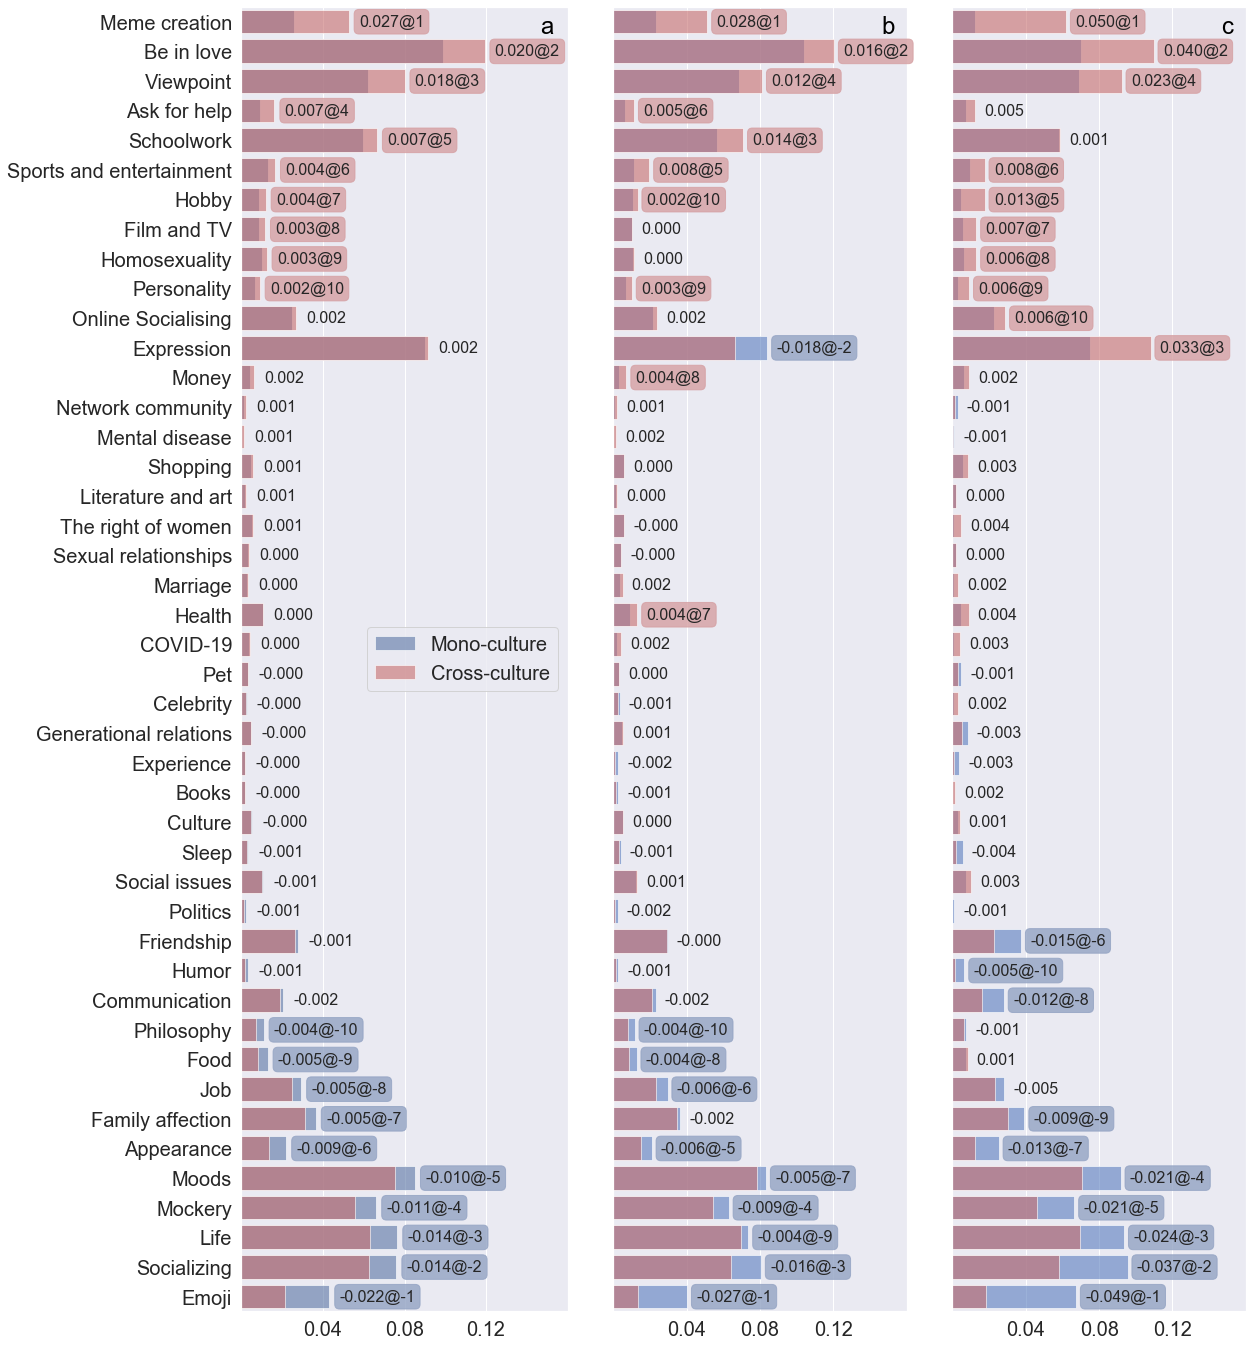

In [163]:
def show_values(axs, orient="v", space=.01,top5={},bottom5={}):
    def _single(ax):
        print(len(ax.patches))
        print(ax.patches[0])
        print(ax.patches[1])
        print(ax.patches[2])
        print(ax.patches[3])
        if orient == "v":
            for p in ax.patches:
                if p.get_height() == 0:
                    continue
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.2f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center", fontsize=16) 
        elif orient == "h":
            for i in range(int(len(ax.patches)/2)):
                p1 = ax.patches[i]
                p2 = ax.patches[i+44]
                p = None
                if p1.get_width() > p2.get_width():
                    p = p1
                else:
                    p = p2
                _x = p.get_x() + p.get_width() + float(space)+0.005
                _y = p.get_y() + p.get_height() - (p.get_height()*0.3)
                # if i in top5_bottom5:
                #     bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
                #     value = '{:.3f}@{:d}'.format(p2.get_width()-p1.get_width(), top5_bottom5[i])
                #     ax.text(_x, _y, value, ha="left", fontsize=16, bbox=bbox,fontstyle='italic')
                # else:
                #     value = '{:.3f}'.format(p2.get_width()-p1.get_width())
                #     ax.text(_x, _y, value, ha="left", fontsize=16)
                if i in top5:
                    bbox = dict(boxstyle='round', fc='#d59fa2', ec='#d59fa2', alpha=0.8)
                    value = '{:.3f}@{:d}'.format(p2.get_width()-p1.get_width(), top5[i])
                    ax.text(_x, _y, value, ha="left", fontsize=16, bbox=bbox,fontstyle='italic')
                elif i in bottom5:
                    bbox = dict(boxstyle='round', fc='#93a3c3', ec='#93a3c3', alpha=0.8)
                    value = '{:.3f}@{:d}'.format(p2.get_width()-p1.get_width(), bottom5[i])
                    ax.text(_x, _y, value, ha="left", fontsize=16, bbox=bbox,fontstyle='italic')
                else:
                    #bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
                    value = '{:.3f}'.format(p2.get_width()-p1.get_width())
                    ax.text(_x, _y, value, ha="left", fontsize=16)
            # for p in ax.patches:
            #     _x = p.get_x() + p.get_width() + float(space)
            #     _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
            #     value = '{:.2f}'.format(p.get_width())
            #     ax.text(_x, _y, value, ha="left", fontsize=16)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            if idx>1:
                _single(ax)
    else:
        _single(axs)

#校正后的跨文化传播的情感分布对比
import numpy as np
same_topic_matrix = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_topic_feature[cluster_id])
    #if cluster_role_africa[cluster_id]>0:
    same_topic_matrix.append(cluster_topic_feature[cluster_id])

same_topic_dis = np.sum(np.asarray(same_topic_matrix),axis=0)

cross_topic_matrix = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_topic_feature[cluster_id])
    #if cluster_role_africa[cluster_id]>0:
    cross_topic_matrix.append(cluster_topic_feature[cluster_id])

cross_topic_dis = np.sum(np.asarray(cross_topic_matrix),axis=0)

same_dist = same_topic_dis/np.sum(same_topic_dis)
cross_dist = cross_topic_dis/np.sum(cross_topic_dis)

topic_dif = {}
topic_dis_list = []
for i in range(len(same_dist)):
    record = {}
    dif = cross_dist[i]-same_dist[i]
    topic_dif[topic_list[i]]=dif
    record['tag']=topic_zh_en_mapping[topic_list[i]]
    record['same']=same_dist[i]
    record['cross']=cross_dist[i]
    record['total']=same_dist[i]+cross_dist[i]
    record['dif']=dif
    topic_dis_list.append(record)
    #print(topic_list[i],dif)


topic_dis_df = pd.DataFrame(topic_dis_list)


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

# create grid for different subplots
spec = gridspec.GridSpec(ncols=3, nrows=1,
                         width_ratios=[10, 9, 9], wspace=0.15)
fig = plt.figure(figsize=(18, 24))

ax0 = fig.add_subplot(spec[0])
sns.set_theme()
#matplotlib.rcParams['font.family']='SimHei'#黑体'STSong'仿宋

plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['font.size'] = '24' #用来
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
 
#sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})
#sns.set_context("poster", font_scale=1)

# Initialize the matplotlib figure
#f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(18, 20))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes_topic = topic_dis_df.sort_values("dif", ascending=False)
#crashes_topic = topic_dis_df.sort_values("total", ascending=False)

topic_tag_list = crashes_topic['tag'].values

topk = 10
top5 = {}
bottom5 = {}
for i in range(topk):
    top5[i] = i+1
for i in range(44-topk,44):
    bottom5[i] = i-44

# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(ax = ax0, x="same", y="tag", data=crashes_topic,
            label="Mono-culture", color="b", saturation=0.75, alpha=0.6, legend=True)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(ax = ax0, x="cross", y="tag", data=crashes_topic,
            label="Cross-culture", color="r", saturation=0.75, alpha=0.6, legend=True)

# Add a legend and informative axis label
#ax[0].legend(ncol=1, loc="center right", frameon=True)
ax0.set_xlabel('')
plt.yticks(fontsize=20)
plt.xticks([0.04,0.08,0.12],fontsize=20)
ax0.legend(title='', loc = 'center right', fontsize=20)
show_values(ax0, orient="h", space=0,top5 = top5, bottom5=bottom5)

#ax0.yaxis.set_major_locator(plt.NullLocator())

#ax[0].set_title('A. Emotion', fontsize=30)

same_topic_matrix = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_topic_feature[cluster_id])
    if cluster_role_female_rate[cluster_id]>0:
        same_topic_matrix.append(cluster_topic_feature[cluster_id])

same_topic_dis = np.sum(np.asarray(same_topic_matrix),axis=0)

cross_topic_matrix = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_topic_feature[cluster_id])
    if cluster_role_female_rate[cluster_id]>0:
        cross_topic_matrix.append(cluster_topic_feature[cluster_id])

cross_topic_dis = np.sum(np.asarray(cross_topic_matrix),axis=0)

same_dist = same_topic_dis/np.sum(same_topic_dis)
cross_dist = cross_topic_dis/np.sum(cross_topic_dis)

# topic_dif = {}
# topic_dis_list = []
# topic_tag_records = {}
# for i in range(len(same_dist)):
#     record = {}
#     dif = same_dist[i]-cross_dist[i]
#     topic_dif[topic_list[i]]=dif
#     record['tag']=topic_zh_en_mapping[topic_list[i]]
#     record['same']=same_dist[i]
#     record['cross']=cross_dist[i]
#     record['dif']=dif
#     topic_dis_list.append(record)
#     topic_tag_records[topic_zh_en_mapping[topic_list[i]]] = record
#     #print(topic_list[i],dif)
# topic_dis_df = pd.DataFrame(topic_dis_list)

# topic_dis_list_new = []
# for topic_tag in topic_tag_list:
#     topic_dis_list_new.append(topic_tag_records[topic_tag])

topic_dif = {}
topic_dis_list = []
topic_tag_records = {}
ranks = {}
for i in range(len(same_dist)):
    record = {}
    dif = cross_dist[i]-same_dist[i]
    #emotion_dif[topic_list[i]]=dif
    topic_dif[topic_list[i]]=dif
    record['tag']=topic_zh_en_mapping[topic_list[i]]
    record['same']=same_dist[i]
    record['cross']=cross_dist[i]
    record['dif']=dif
    ranks[record['tag']] = dif
    topic_dis_list.append(record)
    topic_tag_records[topic_zh_en_mapping[topic_list[i]]] = record
    #print(emotion_list[i],dif)


topic_dis_list_new = []
ranks_value = {}
i = 0
for topic_tag in topic_tag_list:
    topic_dis_list_new.append(topic_tag_records[topic_tag])
    ranks_value[i]=ranks[topic_tag]
    i+=1

rank_list = sorted(ranks_value.items(), key=lambda item: item[1], reverse = True)
top5={}
bottom5 = {}
#print(rank_list)
for i in range(topk):
    top5[rank_list[i][0]]=i+1
for i in range(44-topk,44):
    bottom5[rank_list[i][0]]=i-44
#print(top5_bottom5)



topic_dis_df_new = pd.DataFrame(topic_dis_list_new)

ax1 = fig.add_subplot(spec[1])

crashes_topic = topic_dis_df_new

sns.barplot(ax = ax1, x="same", y="tag", data=crashes_topic,
            label="Mono-culture", color="b", saturation=0.75, alpha=0.6)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(ax = ax1, x="cross", y="tag", data=crashes_topic,
            label="Cross-culture", color="r", saturation=0.75, alpha=0.6)

plt.yticks(fontsize=20)
plt.xticks([0.04,0.08,0.12],fontsize=20)
ax1.get_legend().remove()
show_values(ax1, orient="h", space=0,top5=top5, bottom5=bottom5)

same_topic_matrix = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_topic_feature[cluster_id])
    if cluster_role_africa[cluster_id]>0:
        same_topic_matrix.append(cluster_topic_feature[cluster_id])

same_topic_dis = np.sum(np.asarray(same_topic_matrix),axis=0)

cross_topic_matrix = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_topic_feature[cluster_id])
    if cluster_role_africa[cluster_id]>0:
        cross_topic_matrix.append(cluster_topic_feature[cluster_id])

cross_topic_dis = np.sum(np.asarray(cross_topic_matrix),axis=0)

same_dist = same_topic_dis/np.sum(same_topic_dis)
cross_dist = cross_topic_dis/np.sum(cross_topic_dis)

# topic_dif = {}
# topic_dis_list = []
# topic_tag_records = {}
# for i in range(len(same_dist)):
#     record = {}
#     dif = same_dist[i]-cross_dist[i]
#     topic_dif[topic_list[i]]=dif
#     record['tag']=topic_zh_en_mapping[topic_list[i]]
#     record['same']=same_dist[i]
#     record['cross']=cross_dist[i]
#     record['dif']=dif
#     topic_dis_list.append(record)
#     topic_tag_records[topic_zh_en_mapping[topic_list[i]]] = record
#     #print(topic_list[i],dif)
# topic_dis_df = pd.DataFrame(topic_dis_list)

# topic_dis_list_new = []
# for topic_tag in topic_tag_list:
#     topic_dis_list_new.append(topic_tag_records[topic_tag])

topic_dif = {}
topic_dis_list = []
topic_tag_records = {}
ranks = {}
for i in range(len(same_dist)):
    record = {}
    dif = cross_dist[i]-same_dist[i]
    #emotion_dif[topic_list[i]]=dif
    topic_dif[topic_list[i]]=dif
    record['tag']=topic_zh_en_mapping[topic_list[i]]
    record['same']=same_dist[i]
    record['cross']=cross_dist[i]
    record['dif']=dif
    ranks[record['tag']] = dif
    topic_dis_list.append(record)
    topic_tag_records[topic_zh_en_mapping[topic_list[i]]] = record
    #print(emotion_list[i],dif)


topic_dis_list_new = []
ranks_value = {}
i = 0
for topic_tag in topic_tag_list:
    topic_dis_list_new.append(topic_tag_records[topic_tag])
    ranks_value[i]=ranks[topic_tag]
    i+=1

rank_list = sorted(ranks_value.items(), key=lambda item: item[1], reverse = True)
top5 = {}
bottom5 = {}
#print(rank_list)
for i in range(topk):
    top5[rank_list[i][0]]=i+1
for i in range(44-topk,44):
    bottom5[rank_list[i][0]]=i-44
#print(top5_bottom5)


topic_dis_df_new = pd.DataFrame(topic_dis_list_new)
ax1.yaxis.set_major_formatter(plt.NullFormatter())


ax2 = fig.add_subplot(spec[2])

crashes_topic = topic_dis_df_new

sns.barplot(ax = ax2, x="same", y="tag", data=crashes_topic,
            label="Mono-culture", color="b", saturation=0.75, alpha=0.6)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(ax = ax2, x="cross", y="tag", data=crashes_topic,
            label="Cross-culture", color="r", saturation=0.75, alpha=0.6)

ax2.get_legend().remove()
show_values(ax2, orient="h", space=0, top5=top5, bottom5 = bottom5)

# Add a legend and informative axis label
#ax[0].legend(ncol=1, loc="center right", frameon=True)
ax0.set_xlim([0,0.16])
ax1.set_xlim([0,0.16])
ax2.set_xlim([0,0.16])
ax1.set_xlabel('')
ax2.set_xlabel('')
ax1.set_ylabel('')
ax0.set_ylabel('')
ax2.set_ylabel('')
#ax2.set_yticklabels(range(0,38))
ax1.yaxis.set_major_formatter(plt.NullFormatter())
ax2.yaxis.set_major_formatter(plt.NullFormatter())
#ax1._ylabel.remove()
#ax1._yticklabels.remove()
#ax[0].set_title('A. Emotion', fontsize=30)

plt.yticks(fontsize=20)
ax[0].set_yticklabels(labels = emotion_tag_list, fontsize= 24)
#plt.yticks(fontsize=10)
plt.xticks([0.04,0.08,0.12],fontsize=20)

#ax[1].set_title('B. Topic', fontsize=30)

styles = dict(ha="center", va="center", color="black", size=24)
ax0.text(0.15, 0.2, 'a', **styles)
ax1.text(0.15, 0.2, 'b', **styles) 
ax2.text(0.15, 0.2, 'c', **styles)  
# ax[1].text(0.122, 0.55, 'B', **styles) 
plt.tight_layout()
plt.savefig('./figs/fig8_topic_all_female_african_top10_0217.png', dpi=600, bbox_inches='tight')

In [24]:
import pandas as pd
data_for_reg = pd.read_csv('cluster_feature_0922.csv')

In [25]:
pd.set_option('display.max_columns', None)
data_for_reg.head()

Unnamed: 0  cluster_id  cross_w_e  cross_w_e_new  cross  cross_new  \
0           0           0          0              0      0          0   
1           1        1000          1              1      1          1   
2           2        1001          1              1      1          1   
3           3        1002          1              1      1          1   
4           4        1003          1              1      1          1   

   emotion_entropy  topic_entropy  emotion_ave_pm  topic_ave_pm  \
0         0.000000       0.464386        0.500000      2.000000   
1         2.947703       0.401051        4.000000      2.000000   
2         0.000000       0.500000        0.500000      2.000000   
3         3.343176       0.284649        0.684211      0.684211   
4         2.753434       0.464386        1.600000      1.400000   

   emotion_strength_mean  emotion_strength_media  conv_rate  semantic  \
0               7.250000                    7.25        0.0  0.000000   
1               6.250000                    6.50        0.0  0.500000   
2               6.500000                    6.50        0.0  1.000000   
3               7.037037                    7.00        0.0  0.210526   
4               5.000000                    5.00        0.2  0.200000   

       like     share    create   ps_rate  image_number  role_number  foreign  \
0  6.000000  6.000000  4.750000  1.000000      1.000000     1.000000     1.00   
1  6.250000  5.500000  6.000000  0.000000      1.000000     1.000000     1.00   
2  5.500000  4.500000  3.250000  1.000000      2.000000     1.000000     1.00   
3  5.710526  5.263158  5.263158  0.052632      1.157895     1.157895     0.95   
4  3.900000  2.100000  2.700000  1.000000      3.000000     1.000000     1.00   

   chinese  color     white  asian    africa  mexico  figure_rate  figure  \
0      0.0      0  1.000000    0.0  0.000000     0.0          0.5       1   
1      0.0      0  1.000000    0.0  0.000000     0.0          0.0       0   
2      0.0      0  1.000000    0.0  0.000000     0.0          1.0       1   
3      0.0      0  0.904762    0.0  0.047619     0.0          0.0       0   
4      0.0      2  0.000000    0.0  1.000000     0.0          0.0       0   

     animal     movie    common  male  female  gender  children_rate  \
0  0.000000  0.500000  0.000000  0.00     1.0       1            0.0   
1  0.000000  0.000000  1.000000  0.00     1.0       1            0.0   
2  0.000000  0.000000  0.000000  1.00     0.0       0            0.0   
3  0.047619  0.047619  0.904762  0.95     0.0       0            0.0   
4  0.000000  0.000000  1.000000  0.50     0.5       0            0.5   

   children  young_rate  young  old_rate  old  role_emotion_strength  \
0         0        1.00      1       0.0    0                   7.50   
1         0        1.00      1       0.0    0                   7.00   
2         0        1.00      1       0.0    0                   6.00   
3         0        0.95      1       0.0    0                   7.45   
4         1        0.50      1       0.0    0                   3.50   

   txt_length  tag_num  tag_num_new  size    douban        tw      meme  flix  
0         7.5        1            1     2  0.000000  0.000000  0.000000   1.0  
1         4.5        2            2     2  0.000000  0.500000  0.500000   0.0  
2        15.0        2            2     2  0.000000  0.500000  0.500000   0.0  
3        14.0        3            3    19  0.684211  0.263158  0.052632   0.0  
4         5.6        2            2     5  0.000000  0.800000  0.200000   0.0

In [26]:
data_for_reg.loc[data_for_reg['douban']>0, 'douban_flag']=1
data_for_reg.loc[data_for_reg['douban']==0, 'douban_flag']=0
data_for_reg.loc[data_for_reg['tw']>0, 'tw_flag']=1
data_for_reg.loc[data_for_reg['tw']==0, 'tw_flag']=0
data_for_reg.loc[data_for_reg['meme']>0, 'meme_flag']=1
data_for_reg.loc[data_for_reg['meme']==0, 'meme_flag']=0
data_for_reg.loc[data_for_reg['flix']>0, 'flix_flag']=1
data_for_reg.loc[data_for_reg['flix']==0, 'flix_flag']=0

In [27]:
data_for_reg.loc[data_for_reg['white']>=0.5, 'white_flag']=1
data_for_reg.loc[data_for_reg['white']<0.5, 'white_flag']=0
data_for_reg.loc[data_for_reg['asian']>=0.5, 'asian_flag']=1
data_for_reg.loc[data_for_reg['asian']<0.5, 'asian_flag']=0
data_for_reg.loc[data_for_reg['africa']>=0.5, 'africa_flag']=1
data_for_reg.loc[data_for_reg['africa']<0.5, 'africa_flag']=0
data_for_reg.loc[data_for_reg['mexico']>=0.5, 'mexico_flag']=1
data_for_reg.loc[data_for_reg['mexico']<0.5, 'mexico_flag']=0
data_for_reg.loc[data_for_reg['movie']>=0.5, 'movie_flag']=1
data_for_reg.loc[data_for_reg['movie']<0.5, 'movie_flag']=0
data_for_reg.loc[data_for_reg['male']>=0.5, 'male_flag']=1
data_for_reg.loc[data_for_reg['male']<0.5, 'male_flag']=0
data_for_reg.loc[data_for_reg['female']>=0.5, 'female_flag']=1
data_for_reg.loc[data_for_reg['female']<0.5, 'female_flag']=0

In [28]:
def check(data):
    if data["female"] == data["male"]:
        return 0.5
    elif data["female"] < data["male"]:
        return 0
    else:
        return 1
data_for_reg['gender_new']=data_for_reg[['male','female']].apply(check,axis = 1)

In [29]:
data_for_reg.to_csv('data_for_reg_0218.csv')

/var/folders/s2/c13g99y15m9dsl56tf9xbfmw0000gn/T/ipykernel_87126/3404277611.py:218: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_yticklabels(labels = topic_tag_list, fontsize= 24)
/var/folders/s2/c13g99y15m9dsl56tf9xbfmw0000gn/T/ipykernel_87126/3404277611.py:230: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


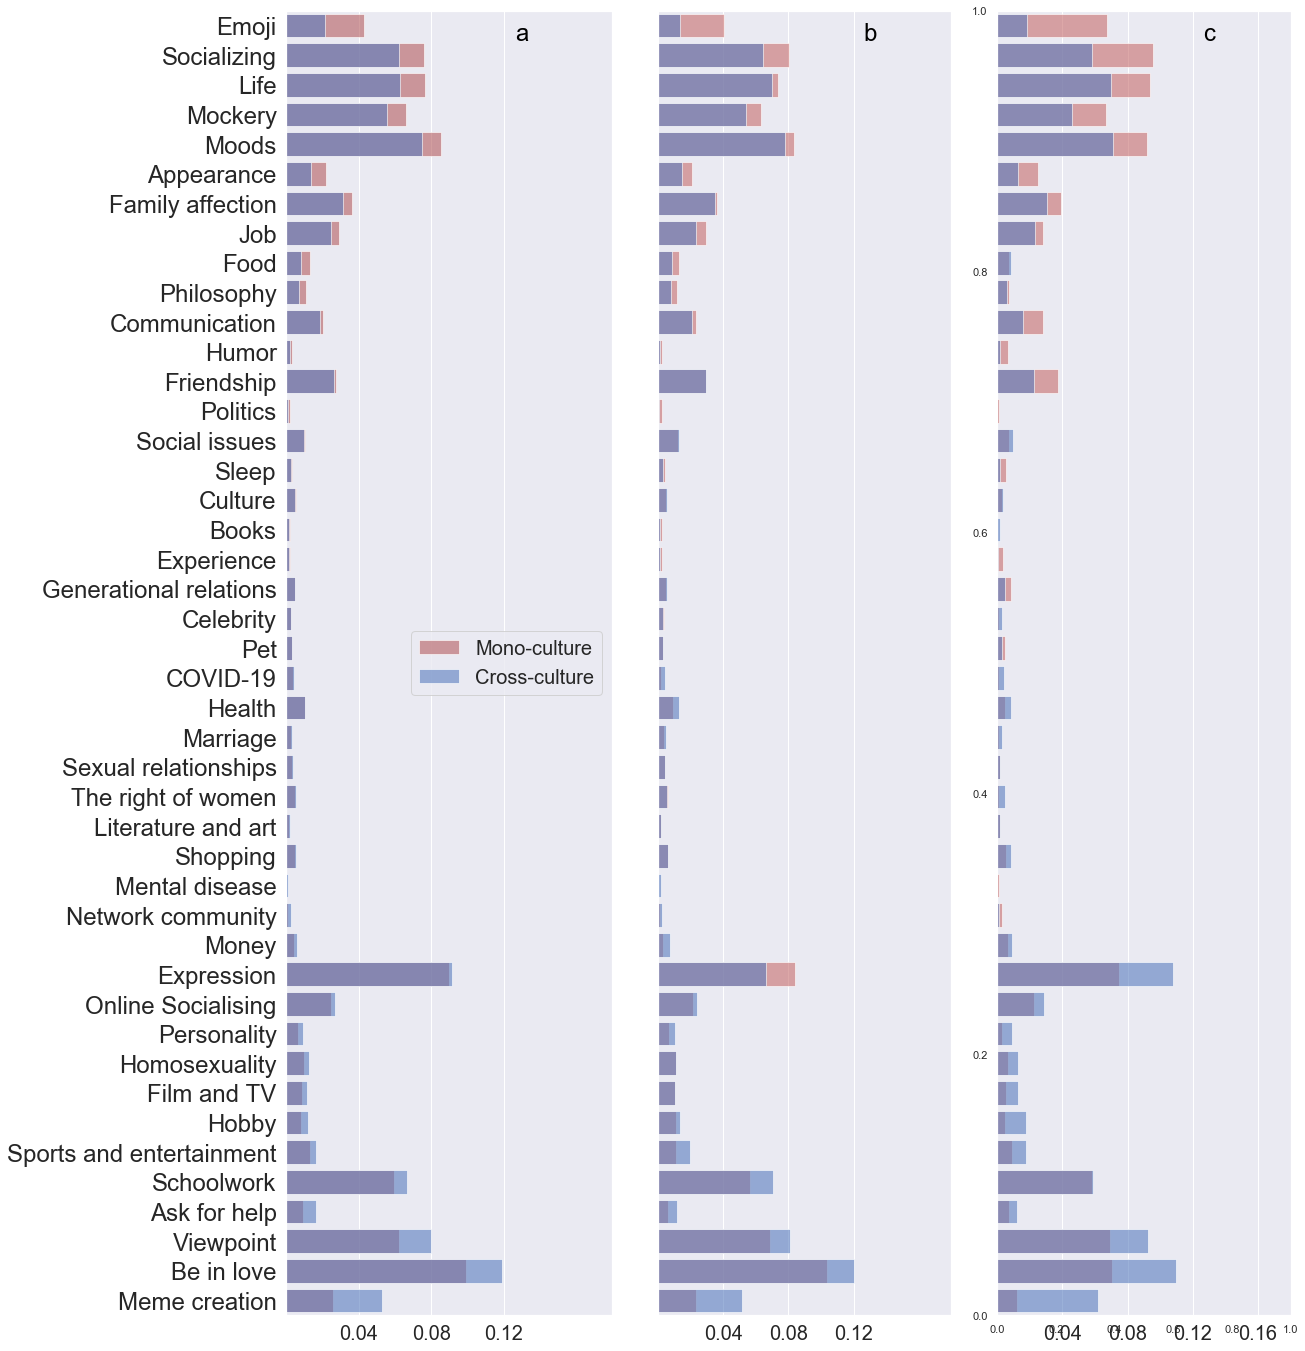

In [274]:
#校正后的跨文化传播的主题分布对比


import numpy as np
same_topic_matrix = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_topic_feature[cluster_id])
    #if cluster_role_africa[cluster_id]>0:
    same_topic_matrix.append(cluster_topic_feature[cluster_id])

same_topic_dis = np.sum(np.asarray(same_topic_matrix),axis=0)

cross_topic_matrix = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_topic_feature[cluster_id])
    #if cluster_role_africa[cluster_id]>0:
    cross_topic_matrix.append(cluster_topic_feature[cluster_id])

cross_topic_dis = np.sum(np.asarray(cross_topic_matrix),axis=0)

same_dist = same_topic_dis/np.sum(same_topic_dis)
cross_dist = cross_topic_dis/np.sum(cross_topic_dis)

topic_dif = {}
topic_dis_list = []
for i in range(len(same_dist)):
    record = {}
    dif = same_dist[i]-cross_dist[i]
    topic_dif[topic_list[i]]=dif
    record['tag']=topic_zh_en_mapping[topic_list[i]]
    record['same']=same_dist[i]
    record['cross']=cross_dist[i]
    record['dif']=dif
    topic_dis_list.append(record)
    #print(topic_list[i],dif)
topic_dis_df = pd.DataFrame(topic_dis_list)


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

# create grid for different subplots
spec = gridspec.GridSpec(ncols=3, nrows=1,
                         width_ratios=[10, 9, 9], wspace=0.15)
fig = plt.figure(figsize=(18, 24))

ax0 = fig.add_subplot(spec[0])
sns.set_theme()
#matplotlib.rcParams['font.family']='SimHei'#黑体'STSong'仿宋

plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['font.size'] = '24' #用来
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
 
# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes_topic = topic_dis_df.sort_values("dif", ascending=False)
topic_tag_list = crashes_topic['tag'].values
# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(ax= ax0, x="same", y="tag", data=crashes_topic, label="Mono-culture", color="r", saturation=0.75, alpha=0.6)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(ax= ax0, x="cross", y="tag", data=crashes_topic,
            label="Cross-culture", color="b", saturation=0.75, alpha=0.6)

# Add a legend and informative axis label
ax0.legend(ncol=1, loc="center right", frameon=True, fontsize=20)


# Add a legend and informative axis label
#ax[0].legend(ncol=1, loc="center right", frameon=True)
ax0.set_xlabel('')
plt.yticks(fontsize=20)
plt.xticks([0.04,0.08,0.12],fontsize=20)

ax0.legend(title='', loc = 'center right', fontsize=20)

import numpy as np
same_topic_matrix = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_topic_feature[cluster_id])
    if cluster_role_female_rate[cluster_id]>0:
        same_topic_matrix.append(cluster_topic_feature[cluster_id])

same_topic_dis = np.sum(np.asarray(same_topic_matrix),axis=0)

cross_topic_matrix = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_topic_feature[cluster_id])
    if cluster_role_female_rate[cluster_id]>0:
        cross_topic_matrix.append(cluster_topic_feature[cluster_id])

cross_topic_dis = np.sum(np.asarray(cross_topic_matrix),axis=0)

same_dist = same_topic_dis/np.sum(same_topic_dis)
cross_dist = cross_topic_dis/np.sum(cross_topic_dis)

topic_dif = {}
topic_dis_list = []
topic_tag_records = {}
for i in range(len(same_dist)):
    record = {}
    dif = same_dist[i]-cross_dist[i]
    topic_dif[topic_list[i]]=dif
    record['tag']=topic_zh_en_mapping[topic_list[i]]
    record['same']=same_dist[i]
    record['cross']=cross_dist[i]
    record['dif']=dif
    topic_dis_list.append(record)
    topic_tag_records[topic_zh_en_mapping[topic_list[i]]] = record
    #print(topic_list[i],dif)
topic_dis_df = pd.DataFrame(topic_dis_list)

topic_dis_list_new = []
for topic_tag in topic_tag_list:
    topic_dis_list_new.append(topic_tag_records[topic_tag])

topic_dis_df_new = pd.DataFrame(topic_dis_list_new)

ax1 = fig.add_subplot(spec[1])

crashes_topic = topic_dis_df_new

sns.barplot(ax= ax1, x="same", y="tag", data=crashes_topic, label="same culture", color="r", saturation=0.75, alpha=0.6)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(ax= ax1, x="cross", y="tag", data=crashes_topic,
            label="cross culture", color="b", saturation=0.75, alpha=0.6)

plt.yticks(fontsize=20)
plt.xticks([0.04,0.08,0.12],fontsize=20)
ax1.get_legend().remove()

ax2 = fig.add_subplot(spec[2])

import numpy as np
same_topic_matrix = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_topic_feature[cluster_id])
    if cluster_role_africa[cluster_id]>0:
        same_topic_matrix.append(cluster_topic_feature[cluster_id])

same_topic_dis = np.sum(np.asarray(same_topic_matrix),axis=0)

cross_topic_matrix = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_topic_feature[cluster_id])
    if cluster_role_africa[cluster_id]>0:
        cross_topic_matrix.append(cluster_topic_feature[cluster_id])

cross_topic_dis = np.sum(np.asarray(cross_topic_matrix),axis=0)

same_dist = same_topic_dis/np.sum(same_topic_dis)
cross_dist = cross_topic_dis/np.sum(cross_topic_dis)

topic_dif = {}
topic_dis_list = []
topic_tag_records = {}
for i in range(len(same_dist)):
    record = {}
    dif = same_dist[i]-cross_dist[i]
    topic_dif[topic_list[i]]=dif
    record['tag']=topic_zh_en_mapping[topic_list[i]]
    record['same']=same_dist[i]
    record['cross']=cross_dist[i]
    record['dif']=dif
    topic_dis_list.append(record)
    topic_tag_records[topic_zh_en_mapping[topic_list[i]]] = record
    #print(topic_list[i],dif)
topic_dis_df = pd.DataFrame(topic_dis_list)

topic_dis_list_new = []
for topic_tag in topic_tag_list:
    topic_dis_list_new.append(topic_tag_records[topic_tag])

topic_dis_df_new = pd.DataFrame(topic_dis_list_new)
ax1.yaxis.set_major_formatter(plt.NullFormatter())

ax2 = fig.add_subplot(spec[2])

crashes_topic = topic_dis_df_new

sns.barplot(ax= ax2, x="same", y="tag", data=crashes_topic, label="same culture", color="r", saturation=0.75, alpha=0.6)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(ax= ax2, x="cross", y="tag", data=crashes_topic, label="cross culture", color="b", saturation=0.75, alpha=0.6)



# Add a legend and informative axis label
#ax[0].legend(ncol=1, loc="center right", frameon=True)
ax0.set_xlim([0,0.18])
ax1.set_xlim([0,0.18])
ax2.set_xlim([0,0.18])
ax1.set_xlabel('')
ax2.set_xlabel('')
ax1.set_ylabel('')
ax0.set_ylabel('')
ax2.set_ylabel('')
#ax2.set_yticklabels(range(0,38))
ax2.get_yaxis().set_visible(False)

ax1.yaxis.set_major_formatter(plt.NullFormatter())
ax2.yaxis.set_major_formatter(plt.NullFormatter())

ax2.get_legend().remove()

#ax1._ylabel.remove()
#ax1._yticklabels.remove()
#ax[0].set_title('A. Emotion', fontsize=30)

plt.yticks(fontsize=20)
ax0.set_yticklabels(labels = topic_tag_list, fontsize= 24)

#plt.yticks(fontsize=10)
plt.xticks([0.04,0.08,0.12,0.16],fontsize=20)
plt.yticks([])
#ax[1].set_title('B. Topic', fontsize=30)

styles = dict(ha="center", va="center", color="black", size=24)
ax0.text(0.13, 0.30, 'a', **styles)
ax1.text(0.13, 0.30, 'b', **styles) 
ax2.text(0.13, 0.30, 'c', **styles)  
# ax[1].text(0.122, 0.55, 'B', **styles) 
plt.tight_layout()
#plt.savefig('./figs/fig8_topic_all_africa_female.png', dpi=600, bbox_inches='tight')

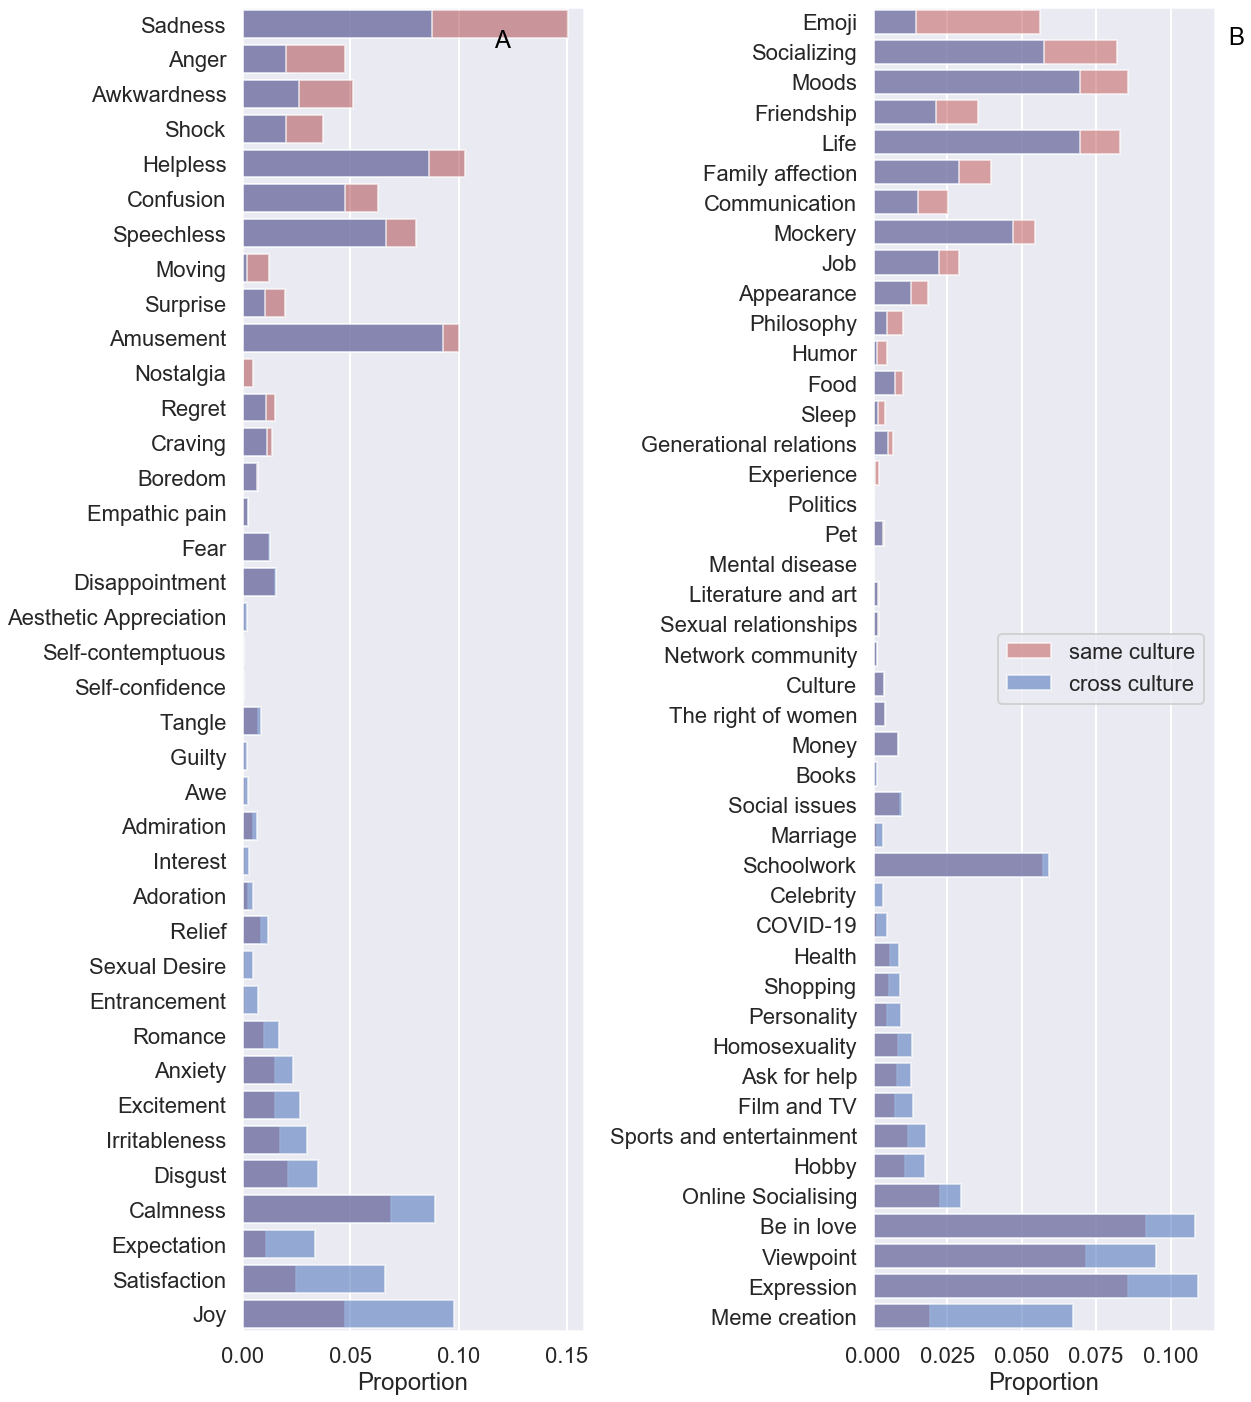

In [283]:
#校正后的跨文化传播的情感分布对比
import numpy as np
same_emotion_matrix = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_emotion_feature[cluster_id])
    if cluster_role_africa[cluster_id]>0:
        same_emotion_matrix.append(cluster_emotion_feature[cluster_id])

same_emotion_dis = np.sum(np.asarray(same_emotion_matrix),axis=0)

cross_emotion_matrix = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_emotion_feature[cluster_id])
    if cluster_role_africa[cluster_id]>0:
        cross_emotion_matrix.append(cluster_emotion_feature[cluster_id])

cross_emotion_dis = np.sum(np.asarray(cross_emotion_matrix),axis=0)

same_dist = same_emotion_dis/np.sum(same_emotion_dis)
cross_dist = cross_emotion_dis/np.sum(cross_emotion_dis)

emotion_dif = {}
emotion_dis_list = []
for i in range(len(same_dist)):
    record = {}
    dif = same_dist[i]-cross_dist[i]
    #emotion_dif[topic_list[i]]=dif
    emotion_dif[emotion_list[i]]=dif
    record['tag']=emotion_zh_en_mapping[emotion_list[i]]
    record['same']=same_dist[i]
    record['cross']=cross_dist[i]
    record['dif']=dif
    emotion_dis_list.append(record)
    #print(emotion_list[i],dif)
emotion_dis_df = pd.DataFrame(emotion_dis_list)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
#matplotlib.rcParams['font.family']='SimHei'#黑体'STSong'仿宋

plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['font.size'] = '24' #用来
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
 
#sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})
sns.set_context("poster", font_scale=1)

# Initialize the matplotlib figure
f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(18, 20))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes = emotion_dis_df.sort_values("dif", ascending=False)
# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(ax = ax[0], x="same", y="tag", data=crashes,
            label="same culture", color="r", saturation=0.75, alpha=0.6)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(ax = ax[0], x="cross", y="tag", data=crashes,
            label="cross culture", color="b", saturation=0.75, alpha=0.6)

# Add a legend and informative axis label
#ax[0].legend(ncol=1, loc="center right", frameon=True)
ax[0].set_xlabel('Proportion')
ax[0].set_ylabel('')
#ax[0].set_title('A. Emotion', fontsize=30)

import numpy as np
same_topic_matrix = []
for cluster_id in cross_cluster_dict[0]:
    #print(cluster_topic_feature[cluster_id])
    if cluster_role_africa[cluster_id]>0:
        same_topic_matrix.append(cluster_topic_feature[cluster_id])

same_topic_dis = np.sum(np.asarray(same_topic_matrix),axis=0)

cross_topic_matrix = []
for cluster_id in cross_cluster_dict[1]:
    #print(cluster_topic_feature[cluster_id])
    if cluster_role_africa[cluster_id]>0:
        cross_topic_matrix.append(cluster_topic_feature[cluster_id])

cross_topic_dis = np.sum(np.asarray(cross_topic_matrix),axis=0)

same_dist = same_topic_dis/np.sum(same_topic_dis)
cross_dist = cross_topic_dis/np.sum(cross_topic_dis)

topic_dif = {}
topic_dis_list = []
for i in range(len(same_dist)):
    record = {}
    dif = same_dist[i]-cross_dist[i]
    topic_dif[topic_list[i]]=dif
    record['tag']=topic_zh_en_mapping[topic_list[i]]
    record['same']=same_dist[i]
    record['cross']=cross_dist[i]
    record['dif']=dif
    topic_dis_list.append(record)
    #print(topic_list[i],dif)
topic_dis_df = pd.DataFrame(topic_dis_list)

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes_topic = topic_dis_df.sort_values("dif", ascending=False)
# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(ax= ax[1], x="same", y="tag", data=crashes_topic, label="same culture", color="r", saturation=0.75, alpha=0.6)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(ax= ax[1], x="cross", y="tag", data=crashes_topic,
            label="cross culture", color="b", saturation=0.75, alpha=0.6)

# Add a legend and informative axis label
ax[1].legend(ncol=1, loc="center right", frameon=True)
ax[1].set_xlabel('Proportion')
ax[1].set_ylabel('')#
#ax[1].set_title('B. Topic', fontsize=30)

styles = dict(ha="center", va="center", color="black", size=24)
ax[0].text(0.12, 0.48, 'A', **styles) 
ax[1].text(0.122, 0.55, 'B', **styles) 
plt.tight_layout()
#plt.savefig('./figs/fig7_emotion_topic_africa_corrected.png', dpi=600)


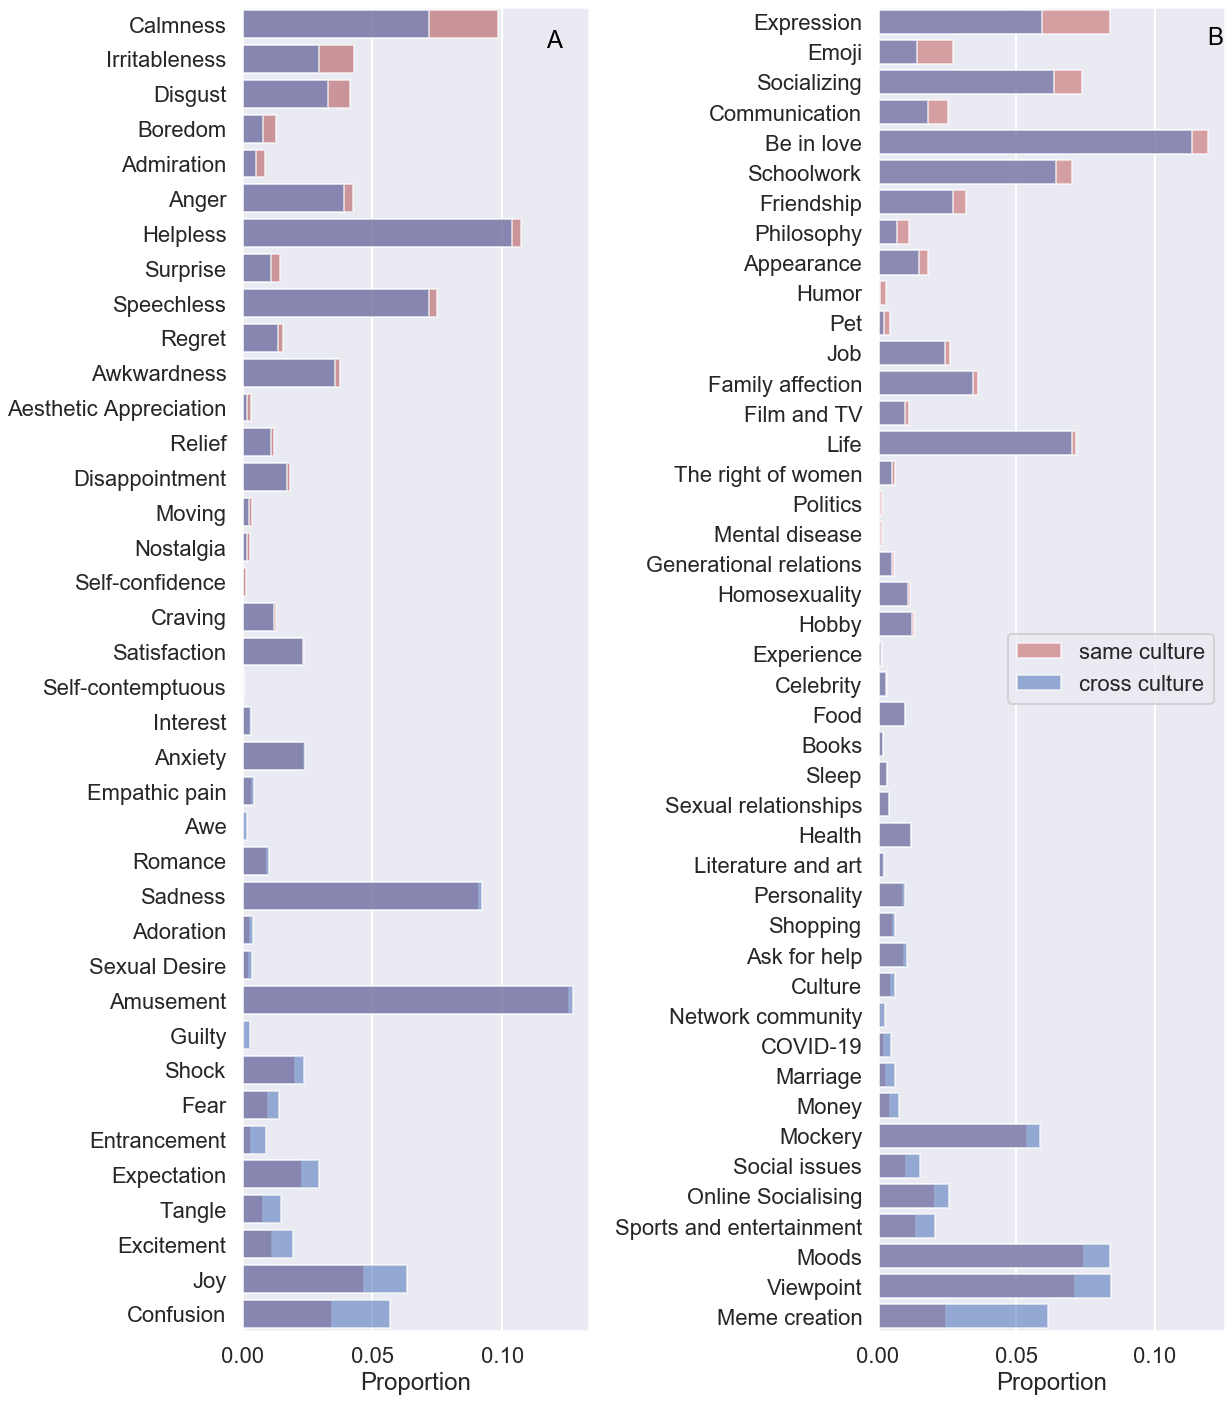

In [284]:
#校正后的跨文化传播的情感分布对比
import numpy as np
same_emotion_matrix = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_emotion_feature[cluster_id])
    if cluster_role_female_rate[cluster_id]>0:
        same_emotion_matrix.append(cluster_emotion_feature[cluster_id])

same_emotion_dis = np.sum(np.asarray(same_emotion_matrix),axis=0)

cross_emotion_matrix = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_emotion_feature[cluster_id])
    if cluster_role_female_rate[cluster_id]>0:
        cross_emotion_matrix.append(cluster_emotion_feature[cluster_id])

cross_emotion_dis = np.sum(np.asarray(cross_emotion_matrix),axis=0)

same_dist = same_emotion_dis/np.sum(same_emotion_dis)
cross_dist = cross_emotion_dis/np.sum(cross_emotion_dis)

emotion_dif = {}
emotion_dis_list = []
for i in range(len(same_dist)):
    record = {}
    dif = same_dist[i]-cross_dist[i]
    #emotion_dif[topic_list[i]]=dif
    emotion_dif[emotion_list[i]]=dif
    record['tag']=emotion_zh_en_mapping[emotion_list[i]]
    record['same']=same_dist[i]
    record['cross']=cross_dist[i]
    record['dif']=dif
    emotion_dis_list.append(record)
    #print(emotion_list[i],dif)
emotion_dis_df = pd.DataFrame(emotion_dis_list)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
#matplotlib.rcParams['font.family']='SimHei'#黑体'STSong'仿宋

plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['font.size'] = '24' #用来
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
 
#sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})
sns.set_context("poster", font_scale=1)

# Initialize the matplotlib figure
f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(18, 20))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes = emotion_dis_df.sort_values("dif", ascending=False)
# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(ax = ax[0], x="same", y="tag", data=crashes,
            label="same culture", color="r", saturation=0.75, alpha=0.6)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(ax = ax[0], x="cross", y="tag", data=crashes,
            label="cross culture", color="b", saturation=0.75, alpha=0.6)

# Add a legend and informative axis label
#ax[0].legend(ncol=1, loc="center right", frameon=True)
ax[0].set_xlabel('Proportion')
ax[0].set_ylabel('')
#ax[0].set_title('A. Emotion', fontsize=30)

import numpy as np
same_topic_matrix = []
for cluster_id in cross_cluster_dict[0]:
    #print(cluster_topic_feature[cluster_id])
    if cluster_role_female_rate[cluster_id]>0:
        same_topic_matrix.append(cluster_topic_feature[cluster_id])

same_topic_dis = np.sum(np.asarray(same_topic_matrix),axis=0)

cross_topic_matrix = []
for cluster_id in cross_cluster_dict[1]:
    #print(cluster_topic_feature[cluster_id])
    if cluster_role_female_rate[cluster_id]>0:
        cross_topic_matrix.append(cluster_topic_feature[cluster_id])

cross_topic_dis = np.sum(np.asarray(cross_topic_matrix),axis=0)

same_dist = same_topic_dis/np.sum(same_topic_dis)
cross_dist = cross_topic_dis/np.sum(cross_topic_dis)

topic_dif = {}
topic_dis_list = []
for i in range(len(same_dist)):
    record = {}
    dif = same_dist[i]-cross_dist[i]
    topic_dif[topic_list[i]]=dif
    record['tag']=topic_zh_en_mapping[topic_list[i]]
    record['same']=same_dist[i]
    record['cross']=cross_dist[i]
    record['dif']=dif
    topic_dis_list.append(record)
    #print(topic_list[i],dif)
topic_dis_df = pd.DataFrame(topic_dis_list)

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes_topic = topic_dis_df.sort_values("dif", ascending=False)
# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(ax= ax[1], x="same", y="tag", data=crashes_topic, label="same culture", color="r", saturation=0.75, alpha=0.6)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(ax= ax[1], x="cross", y="tag", data=crashes_topic,
            label="cross culture", color="b", saturation=0.75, alpha=0.6)

# Add a legend and informative axis label
ax[1].legend(ncol=1, loc="center right", frameon=True)
ax[1].set_xlabel('Proportion')
ax[1].set_ylabel('')#
#ax[1].set_title('B. Topic', fontsize=30)

styles = dict(ha="center", va="center", color="black", size=24)
ax[0].text(0.12, 0.48, 'A', **styles) 
ax[1].text(0.122, 0.55, 'B', **styles) 
plt.tight_layout()
#plt.savefig('./figs/fig7_emotion_topic_female_corrected.png', dpi=600)


In [900]:
'''
same_africa_emotion = [0,0,0,0,0,0,0]
same_africa_emotion_strength = []
for cluster_id in cross_cluster_dict_new[0]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        role_emotion = cluster_role_emotion[cluster_id]
        role_emotion_strengh = cluster_role_strength_list[cluster_id]
        #same_africa_emotion += role_emotion
        c=[same_africa_emotion[i]+role_emotion[i] for i in range(min(len(same_africa_emotion),len(role_emotion)))]
        same_africa_emotion = c
        same_africa_emotion_strength.append(role_emotion_strengh)
        #print(role_emotion,role_emotion_strengh)
        #same_africa_emotion.append(cluster_role_africa[cluster_id])

cross_africa_emotion = [0,0,0,0,0,0,0]
cross_africa_emotion_strength = []
for cluster_id in cross_cluster_dict_new[1]:
    if cluster_size[cluster_id]>=4:
        #print(cluster_topic_entropy_feature[cluster_id])
        role_emotion = cluster_role_emotion[cluster_id]
        role_emotion_strengh = cluster_role_strength_list[cluster_id]
        #print(role_emotion,role_emotion_strengh)
        c=[cross_africa_emotion[i]+role_emotion[i] for i in range(min(len(cross_africa_emotion),len(role_emotion)))]
        cross_africa_emotion = c
        cross_africa_emotion_strength.append(role_emotion_strengh)

proportion_list = cross_africa_emotion/np.sum(cross_africa_emotion)
africa_emotion_list = []
role_emotion_list = ['Happy', 'Sad', 'Angry', 'Disgust', 'Surprise', 'Peace', 'Scared']
for i in range(7):
    record = {"Class":"Cross","Emotion":role_emotion_list[i],"Proportion":proportion_list[i]}
    africa_emotion_list.append(record)

proportion_list = same_africa_emotion/np.sum(same_africa_emotion)
for i in range(7):
    record = {"Class":"Same","Emotion":role_emotion_list[i],"Proportion":proportion_list[i]}
    africa_emotion_list.append(record)

africa_emotion_list_df = pd.DataFrame(africa_emotion_list)

plt.figure(figsize=(12,6))
ax = sns.barplot(data=africa_emotion_list_df, x="Emotion",y="Proportion", hue="Class",capsize=.01, alpha=0.8)
show_values(ax)
plt.xlabel('')
plt.savefig('./figs/role_emotion_dif_g4.png', dpi=600)

'''

'\nsame_africa_emotion = [0,0,0,0,0,0,0]\nsame_africa_emotion_strength = []\nfor cluster_id in cross_cluster_dict_new[0]:\n    if cluster_size[cluster_id]>=4:\n        #print(cluster_topic_entropy_feature[cluster_id])\n        role_emotion = cluster_role_emotion[cluster_id]\n        role_emotion_strengh = cluster_role_strength_list[cluster_id]\n        #same_africa_emotion += role_emotion\n        c=[same_africa_emotion[i]+role_emotion[i] for i in range(min(len(same_africa_emotion),len(role_emotion)))]\n        same_africa_emotion = c\n        same_africa_emotion_strength.append(role_emotion_strengh)\n        #print(role_emotion,role_emotion_strengh)\n        #same_africa_emotion.append(cluster_role_africa[cluster_id])\n\ncross_africa_emotion = [0,0,0,0,0,0,0]\ncross_africa_emotion_strength = []\nfor cluster_id in cross_cluster_dict_new[1]:\n    if cluster_size[cluster_id]>=4:\n        #print(cluster_topic_entropy_feature[cluster_id])\n        role_emotion = cluster_role_emotion[cluste

In [901]:
'''
same_africa_emotion = [0,0,0,0,0,0,0]
same_africa_emotion_strength = []
for cluster_id in cross_cluster_dict_new[0]:
    if cluster_size[cluster_id]>=4 and cluster_role_africa[cluster_id]>0:
        #print(cluster_topic_entropy_feature[cluster_id])
        role_emotion = cluster_role_emotion[cluster_id]
        role_emotion_strengh = cluster_role_strength[cluster_id]
        #same_africa_emotion += role_emotion
        c=[same_africa_emotion[i]+role_emotion[i] for i in range(min(len(same_africa_emotion),len(role_emotion)))]
        same_africa_emotion = c
        same_africa_emotion_strength.append(role_emotion_strengh)
        #print(role_emotion,role_emotion_strengh)
        #same_africa_emotion.append(cluster_role_africa[cluster_id])

cross_africa_emotion = [0,0,0,0,0,0,0]
cross_africa_emotion_strength = []
for cluster_id in cross_cluster_dict_new[1]:
    if cluster_size[cluster_id]>=4 and cluster_role_africa[cluster_id]>0:
        #print(cluster_topic_entropy_feature[cluster_id])
        role_emotion = cluster_role_emotion[cluster_id]
        role_emotion_strengh = cluster_role_strength[cluster_id]
        #print(role_emotion,role_emotion_strengh)
        c=[cross_africa_emotion[i]+role_emotion[i] for i in range(min(len(cross_africa_emotion),len(role_emotion)))]
        cross_africa_emotion = c
        cross_africa_emotion_strength.append(role_emotion_strengh)

proportion_list = cross_africa_emotion/np.sum(cross_africa_emotion)
africa_emotion_list = []
role_emotion_list = ['Happy', 'Sad', 'Angry', 'Disgust', 'Surprise', 'Peace', 'Scared']
for i in range(7):
    record = {"Class":"Cross","Emotion":role_emotion_list[i],"Proportion":proportion_list[i]}
    africa_emotion_list.append(record)

proportion_list = same_africa_emotion/np.sum(same_africa_emotion)
for i in range(7):
    record = {"Class":"Same","Emotion":role_emotion_list[i],"Proportion":proportion_list[i]}
    africa_emotion_list.append(record)

africa_emotion_list_df = pd.DataFrame(africa_emotion_list)

plt.figure(figsize=(12,6))
ax = sns.barplot(data=africa_emotion_list_df, x="Emotion",y="Proportion", hue="Class",capsize=.01, alpha=0.8)
show_values(ax)
plt.legend(title='')#,loc='upper left'
plt.tick_params(bottom=False)

#plt.legend(["Same","Cross"])
plt.xlabel('')
plt.savefig('./figs/role_emotion_africa_g4.png', dpi=600)

'''

'\nsame_africa_emotion = [0,0,0,0,0,0,0]\nsame_africa_emotion_strength = []\nfor cluster_id in cross_cluster_dict_new[0]:\n    if cluster_size[cluster_id]>=4 and cluster_role_africa[cluster_id]>0:\n        #print(cluster_topic_entropy_feature[cluster_id])\n        role_emotion = cluster_role_emotion[cluster_id]\n        role_emotion_strengh = cluster_role_strength[cluster_id]\n        #same_africa_emotion += role_emotion\n        c=[same_africa_emotion[i]+role_emotion[i] for i in range(min(len(same_africa_emotion),len(role_emotion)))]\n        same_africa_emotion = c\n        same_africa_emotion_strength.append(role_emotion_strengh)\n        #print(role_emotion,role_emotion_strengh)\n        #same_africa_emotion.append(cluster_role_africa[cluster_id])\n\ncross_africa_emotion = [0,0,0,0,0,0,0]\ncross_africa_emotion_strength = []\nfor cluster_id in cross_cluster_dict_new[1]:\n    if cluster_size[cluster_id]>=4 and cluster_role_africa[cluster_id]>0:\n        #print(cluster_topic_entropy_f

In [624]:
#'高兴': 10099,'悲伤': 7587,'愤怒/生气': 3222,'厌恶': 2608,'惊讶': 3932,'平静': 9533, '恐惧': 1960
#sns.barplot(y=[cross_africa_emotion/np.sum(cross_africa_emotion),same_africa_emotion/np.sum(same_africa_emotion)],x=['Happy', 'Sad', 'Angry', 'Disgust', 'Surprise', 'Peace', 'Scared'])

<AxesSubplot:>

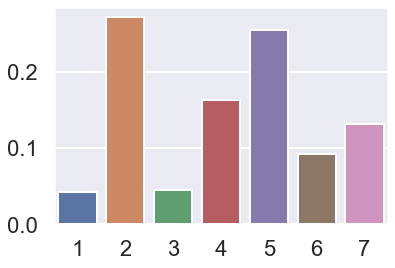

In [625]:
sns.barplot(y=same_africa_emotion/np.sum(same_africa_emotion),x=[1,2,3,4,5,6,7])

<AxesSubplot:ylabel='Density'>

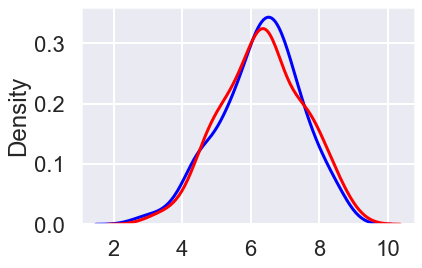

In [716]:
sns.kdeplot(cross_africa_emotion_strength,color='blue')
sns.kdeplot(same_africa_emotion_strength,color='red')

In [627]:
same_gender = []
for cluster_id in cross_cluster_dict_new[0]:
    #if cluster_size[cluster_id]>=4:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_gender.append(cluster_role_movie_rate[cluster_id])

In [161]:
# plt.figure(figsize=(8,6))
# #cluster_topic_ave_count_per_meme[id]=feature_topic_distinct_count/len(cluster_image_dict[id])
# #cluster_emotion_ave_count_per_meme[id]=feature_emotion_distinct_count/len(cluster_image_dict[id])

# # 情绪熵，社区内跨文化传播
# import numpy as np
# import seaborn as sns
# movie_list = []
# same_movie = []
# for cluster_id in cross_cluster_dict_new[0]:
#     #if cluster_size[cluster_id]>=4:
#     #print(cluster_topic_entropy_feature[cluster_id])
#     same_movie.append(cluster_role_movie_rate[cluster_id])
#     movie_list.append({"Movie proportion":cluster_role_movie_rate[cluster_id], "Class": "same", "Group":"M1"})

# cross_movie = []
# for cluster_id in cross_cluster_dict_new[1]:
#     #if cluster_size[cluster_id]>=4:
#     #print(cluster_topic_entropy_feature[cluster_id])
#     cross_movie.append(cluster_role_movie_rate[cluster_id])
#     movie_list.append({"Movie proportion":cluster_role_movie_rate[cluster_id], "Class": "cross", "Group":"M1"})


# same_gender = []
# for cluster_id in cross_cluster_dict_new[0]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         same_gender.append(cluster_role_gender[cluster_id])
#         movie_list.append({"Movie proportion":cluster_role_movie_rate[cluster_id], "Class": "same", "Group":"M2"})

# cross_gender = []
# for cluster_id in cross_cluster_dict_new[1]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         cross_gender.append(cluster_role_gender[cluster_id])
#         movie_list.append({"Movie proportion":cluster_role_movie_rate[cluster_id], "Class": "cross", "Group":"M2"})

# same_gender = []
# for cluster_id in cross_cluster_dict_w_e_new[0]:
#     if cluster_size[cluster_id]>=0:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         same_gender.append(cluster_role_gender[cluster_id])
#         movie_list.append({"Movie proportion":cluster_role_movie_rate[cluster_id], "Class": "same", "Group":"M4"})

# cross_gender = []
# for cluster_id in cross_cluster_dict_w_e_new[1]:
#     if cluster_size[cluster_id]>=0:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         cross_gender.append(cluster_role_gender[cluster_id])
#         movie_list.append({"Movie proportion":cluster_role_movie_rate[cluster_id], "Class": "cross", "Group":"M4"})


# same_gender = []
# for cluster_id in cross_cluster_dict_w_e_new[0]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         same_gender.append(cluster_role_gender[cluster_id])
#         movie_list.append({"Movie proportion":cluster_role_movie_rate[cluster_id], "Class": "same", "Group":"M5"})

# cross_gender = []
# for cluster_id in cross_cluster_dict_w_e_new[1]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         cross_gender.append(cluster_role_gender[cluster_id])
#         movie_list.append({"Movie proportion":cluster_role_movie_rate[cluster_id], "Class": "cross", "Group":"M5"})

# movie_df = pd.DataFrame(movie_list)
# ax = sns.barplot(x="Group",y="Movie proportion",data =movie_df, hue="Class",capsize=.06, errwidth=0.9, alpha=0.8)#, width=0.4)
# show_values(ax)
# #for i in ax.containers:
# #    ax.bar_label(i,)
# # for index, row in gender_df.iterrows():
# #     print()
# #     ax.text(row.Group, row.Class, round(row.Proportion, 2),
# #         color='white', ha='center')
# #ax.bar_label(ax.containers[0])
# plt.legend(title='',loc='upper left')
# plt.tick_params(bottom=False)

# #plt.legend(["Same","Cross"])
# plt.xlabel('')
# plt.ylim((0,0.5))

# plt.tight_layout()
# plt.savefig('./figs/meme_movie.png', dpi=600)

In [163]:
# plt.figure(figsize=(8,6))
# #cluster_topic_ave_count_per_meme[id]=feature_topic_distinct_count/len(cluster_image_dict[id])
# #cluster_emotion_ave_count_per_meme[id]=feature_emotion_distinct_count/len(cluster_image_dict[id])

# # 情绪熵，社区内跨文化传播
# import numpy as np
# import seaborn as sns
# txt_length_list = []
# #same_txt_length = []
# for cluster_id in cross_cluster_dict_new[0]:
#     #if cluster_size[cluster_id]>=4:
#     #print(cluster_topic_entropy_feature[cluster_id])
#     #same_movie.append(cluster_role_movie_rate[cluster_id])
#     #print(cluster_txt_length[cluster_id])
#     txt_length_list.append({"Text_length":cluster_txt_length[cluster_id], "Class": "same", "Group":"M1"})

# for cluster_id in cross_cluster_dict_new[1]:
#     #if cluster_size[cluster_id]>=4:
#     #print(cluster_topic_entropy_feature[cluster_id])
#     txt_length_list.append({"Text_length":cluster_txt_length[cluster_id], "Class": "cross", "Group":"M1"})

# for cluster_id in cross_cluster_dict_new[0]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         txt_length_list.append({"Text_length":cluster_txt_length[cluster_id], "Class": "same", "Group":"M2"})

# for cluster_id in cross_cluster_dict_new[1]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         txt_length_list.append({"Text_length":cluster_txt_length[cluster_id], "Class": "cross", "Group":"M2"})

# for cluster_id in cross_cluster_dict_w_e_new[0]:
#     if cluster_size[cluster_id]>=0:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         txt_length_list.append({"Text_length":cluster_txt_length[cluster_id], "Class": "same", "Group":"M4"})

# for cluster_id in cross_cluster_dict_w_e_new[1 ]:
#     if cluster_size[cluster_id]>=0:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         txt_length_list.append({"Text_length":cluster_txt_length[cluster_id], "Class": "cross", "Group":"M4"})


# for cluster_id in cross_cluster_dict_w_e_new[0]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         txt_length_list.append({"Text_length":cluster_txt_length[cluster_id], "Class": "same", "Group":"M5"})

# for cluster_id in cross_cluster_dict_w_e_new[1]:
#     if cluster_size[cluster_id]>=4:
#         #print(cluster_topic_entropy_feature[cluster_id])
#         txt_length_list.append({"Text_length":cluster_txt_length[cluster_id], "Class": "cross", "Group":"M5"})

# text_length_df = pd.DataFrame(txt_length_list)
# ax = sns.barplot(x="Group",y="Text_length",data =text_length_df, hue="Class",capsize=.06, errwidth=0.9, alpha=0.8)#, width=0.4)
# show_values(ax)
# #for i in ax.containers:
# #    ax.bar_label(i,)
# # for index, row in gender_df.iterrows():
# #     print()
# #     ax.text(row.Group, row.Class, round(row.Proportion, 2),
# #         color='white', ha='center')
# #ax.bar_label(ax.containers[0])
# plt.legend(title='',loc='upper left')
# plt.tick_params(bottom=False)

# #plt.legend(["Same","Cross"])
# plt.xlabel('')
# plt.ylim((0,30))

# plt.tight_layout()
# plt.savefig('./figs/meme_txtlength.png', dpi=600)

In [164]:
dict(Counter(same_gender))

{0: 133, 1: 44}

<AxesSubplot:ylabel='Density'>

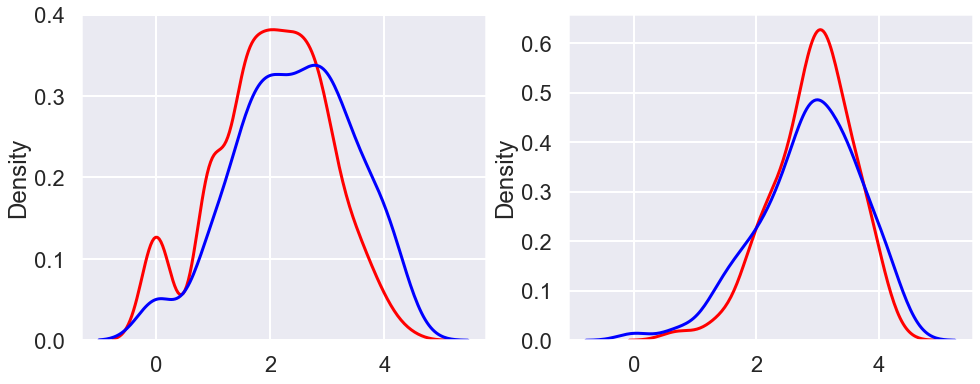

In [631]:
f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(16, 6))

# 情绪熵，社区内跨文化传播
import numpy as np
import seaborn as sns
same_emotion_entropy = []
for cluster_id in cross_cluster_dict[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_emotion_entropy.append(cluster_emotion_entropy_feature[cluster_id])

cross_emotion_entropy = []
for cluster_id in cross_cluster_dict[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    cross_emotion_entropy.append(cluster_emotion_entropy_feature[cluster_id])
sns.kdeplot(same_emotion_entropy, color='red', ax=ax[0])#,cumulative=True)
sns.kdeplot(cross_emotion_entropy, color='blue', ax=ax[0])#,cumulative=True)

# 情绪熵，校正后的跨文化传播
import numpy as np
import seaborn as sns
same_emotion_entropy = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    if cluster_size[cluster_id]>=5:
        same_emotion_entropy.append(cluster_emotion_entropy_feature[cluster_id])

cross_emotion_entropy = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    if cluster_size[cluster_id]>=4:
        cross_emotion_entropy.append(cluster_emotion_entropy_feature[cluster_id])
sns.kdeplot(same_emotion_entropy, color='red', ax=ax[1])#,cumulative=True)
sns.kdeplot(cross_emotion_entropy, color='blue', ax=ax[1])#,cumulative=True)

<AxesSubplot:ylabel='Density'>

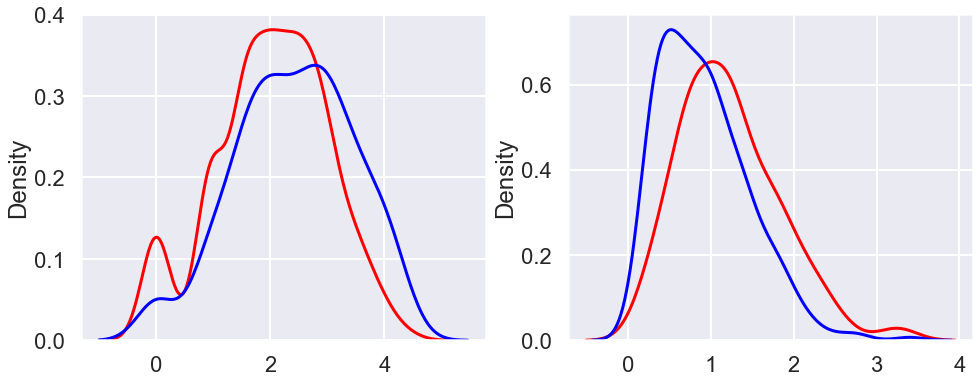

In [632]:
f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(16, 6))

# 情绪熵，社区内跨文化传播
import numpy as np
import seaborn as sns
same_emotion_entropy = []
for cluster_id in cross_cluster_dict[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_emotion_entropy.append(cluster_emotion_entropy_feature[cluster_id])

cross_emotion_entropy = []
for cluster_id in cross_cluster_dict[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    cross_emotion_entropy.append(cluster_emotion_entropy_feature[cluster_id])
sns.kdeplot(same_emotion_entropy, color='red', ax=ax[0])#,cumulative=True)
sns.kdeplot(cross_emotion_entropy, color='blue', ax=ax[0])#,cumulative=True)

# 情绪熵，校正后的跨文化传播
import numpy as np
import seaborn as sns
same_emotion_entropy = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    if cluster_size[cluster_id]>=4:
        same_emotion_entropy.append(cluster_emotion_ave_count_per_meme[cluster_id])

cross_emotion_entropy = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    if cluster_size[cluster_id]>=4:
        cross_emotion_entropy.append(cluster_emotion_ave_count_per_meme[cluster_id])
sns.kdeplot(same_emotion_entropy, color='red', ax=ax[1])#,cumulative=True)
sns.kdeplot(cross_emotion_entropy, color='blue', ax=ax[1])#,cumulative=True)

4.461839530332681 2.0 8.880044898473601
14.85377358490566 4.0 31.760290288647813


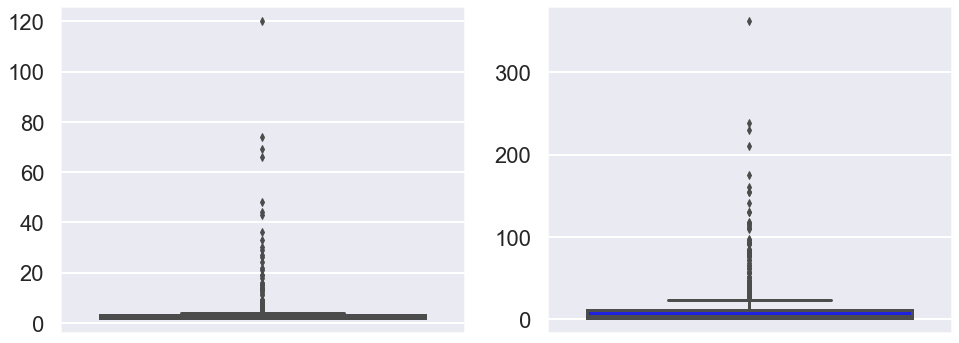

In [633]:
f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(16, 6))

# experiment #0
import numpy as np
same_meme_size = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_meme_size.append(cluster_size[cluster_id])

cross_meme_size = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    cross_meme_size.append(cluster_size[cluster_id])
sns.boxplot(y=same_meme_size, color='red', ax=ax[0])#,cumulative=True)
sns.boxplot(y=cross_meme_size, color='blue', ax=ax[1])#,cumulative=True)
print(np.mean(same_meme_size),np.median(same_meme_size),np.std(same_meme_size))
print(np.mean(cross_meme_size),np.median(cross_meme_size),np.std(cross_meme_size))

<AxesSubplot:ylabel='Density'>

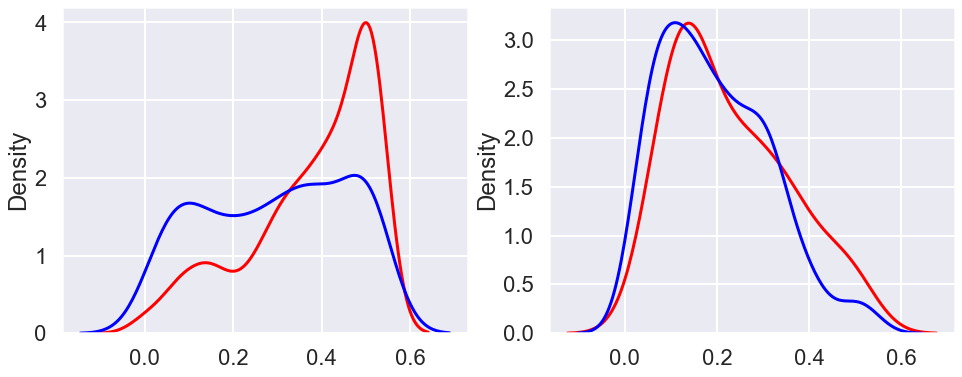

In [634]:
f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(16, 6))

import numpy as np
same_topic_entropy = []
for cluster_id in cross_cluster_dict[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_topic_entropy.append(cluster_topic_entropy_feature[cluster_id])

cross_topic_entropy = []
for cluster_id in cross_cluster_dict[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    cross_topic_entropy.append(cluster_topic_entropy_feature[cluster_id])

sns.kdeplot(same_topic_entropy, color='red', ax=ax[0])#,cumulative=True)
sns.kdeplot(cross_topic_entropy, color='blue', ax=ax[0])#,cumulative=True)

import numpy as np
same_topic_entropy = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    if cluster_size[cluster_id]>=5:
        same_topic_entropy.append(cluster_topic_entropy_feature[cluster_id])

cross_topic_entropy = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    if cluster_size[cluster_id]>=5:
        cross_topic_entropy.append(cluster_topic_entropy_feature[cluster_id])

sns.kdeplot(same_topic_entropy, color='red', ax=ax[1])#,cumulative=True)
sns.kdeplot(cross_topic_entropy, color='blue', ax=ax[1])#,cumulative=True)


<AxesSubplot:ylabel='Density'>

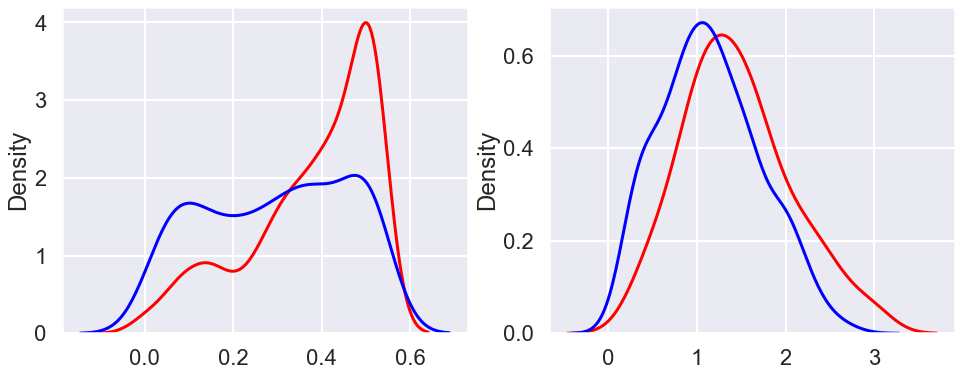

In [635]:
f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(16, 6))

import numpy as np
same_topic_entropy = []
for cluster_id in cross_cluster_dict[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_topic_entropy.append(cluster_topic_entropy_feature[cluster_id])

cross_topic_entropy = []
for cluster_id in cross_cluster_dict[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    cross_topic_entropy.append(cluster_topic_entropy_feature[cluster_id])

sns.kdeplot(same_topic_entropy, color='red', ax=ax[0])#,cumulative=True)
sns.kdeplot(cross_topic_entropy, color='blue', ax=ax[0])#,cumulative=True)

import numpy as np
same_topic_entropy = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    if cluster_size[cluster_id]>=4:
        same_topic_entropy.append(cluster_topic_ave_count_per_meme[cluster_id])

cross_topic_entropy = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    if cluster_size[cluster_id]>=4:
        cross_topic_entropy.append(cluster_topic_ave_count_per_meme[cluster_id])

sns.kdeplot(same_topic_entropy, color='red', ax=ax[1])#,cumulative=True)
sns.kdeplot(cross_topic_entropy, color='blue', ax=ax[1])#,cumulative=True)


<AxesSubplot:ylabel='Density'>

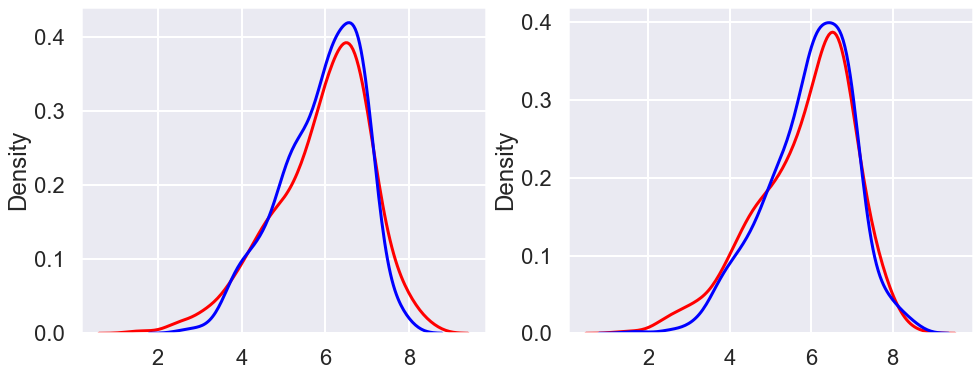

In [636]:
f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(16, 6))

# experiment #0
import numpy as np
same_meme_emotion_strength_mean = []
for cluster_id in cross_cluster_dict[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_meme_emotion_strength_mean.append(cluster_meme_emotion_strength_mean[cluster_id])

cross_meme_emotion_strength_mean = []
for cluster_id in cross_cluster_dict[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    cross_meme_emotion_strength_mean.append(cluster_meme_emotion_strength_mean[cluster_id])
sns.kdeplot(same_meme_emotion_strength_mean, color='red', ax=ax[0])#,cumulative=True)
sns.kdeplot(cross_meme_emotion_strength_mean, color='blue', ax = ax[0])#,cumulative=True)

# experiment #0
import numpy as np
same_meme_emotion_strength_mean = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_meme_emotion_strength_mean.append(cluster_meme_emotion_strength_mean[cluster_id])

cross_meme_emotion_strength_mean = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    cross_meme_emotion_strength_mean.append(cluster_meme_emotion_strength_mean[cluster_id])
sns.kdeplot(same_meme_emotion_strength_mean, color='red', ax=ax[1])#,cumulative=True)
sns.kdeplot(cross_meme_emotion_strength_mean, color='blue', ax=ax[1])#,cumulative=True)

<AxesSubplot:ylabel='Density'>

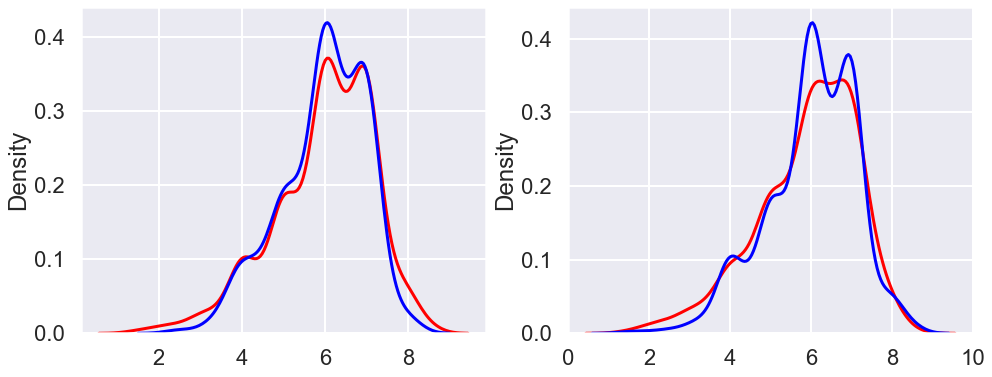

In [637]:
f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(16, 6))
#experiment #0
import numpy as np
same_meme_emotion_strength_median = []
for cluster_id in cross_cluster_dict[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_meme_emotion_strength_median.append(cluster_meme_emotion_strength_median[cluster_id])

cross_meme_emotion_strength_median = []
for cluster_id in cross_cluster_dict[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    cross_meme_emotion_strength_median.append(cluster_meme_emotion_strength_median[cluster_id])

sns.kdeplot(same_meme_emotion_strength_median, color='red', ax=ax[0])#,cumulative=True)
sns.kdeplot(cross_meme_emotion_strength_median, color='blue', ax=ax[0])#,cumulative=True)

#experiment #0
import numpy as np
same_meme_emotion_strength_median = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_meme_emotion_strength_median.append(cluster_meme_emotion_strength_median[cluster_id])

cross_meme_emotion_strength_median = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    cross_meme_emotion_strength_median.append(cluster_meme_emotion_strength_median[cluster_id])

sns.kdeplot(same_meme_emotion_strength_median, color='red', ax=ax[1])#,cumulative=True)
sns.kdeplot(cross_meme_emotion_strength_median, color='blue', ax=ax[1])#,cumulative=True)

<AxesSubplot:ylabel='Density'>

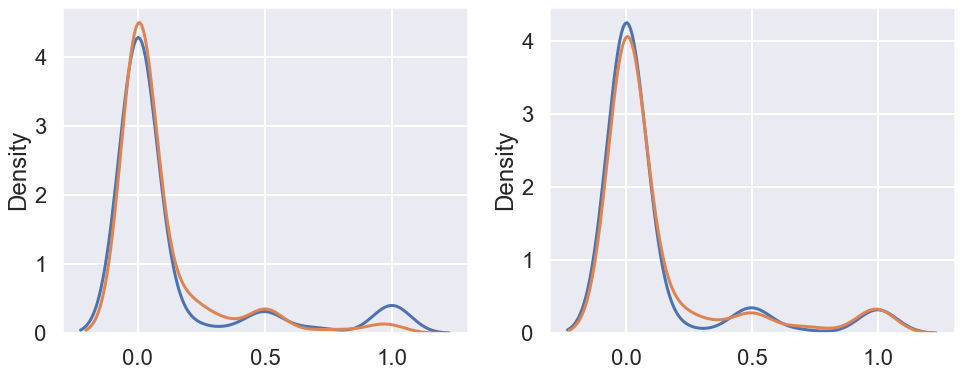

In [638]:
f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(16, 6))

import numpy as np
same_meme_form = []
for cluster_id in cross_cluster_dict[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_meme_form.append(cluster_meme_form[cluster_id])

cross_meme_form = []
for cluster_id in cross_cluster_dict[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    cross_meme_form.append(cluster_meme_form[cluster_id])
sns.kdeplot(same_meme_form, ax=ax[0])#,cumulative=True)
sns.kdeplot(cross_meme_form, ax=ax[0])#,cumulative=True)

import numpy as np
same_meme_form = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_meme_form.append(cluster_meme_form[cluster_id])

cross_meme_form = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    cross_meme_form.append(cluster_meme_form[cluster_id])
sns.kdeplot(same_meme_form, ax=ax[1])#,cumulative=True)
sns.kdeplot(cross_meme_form, ax=ax[1])#,cumulative=True)

<AxesSubplot:ylabel='Density'>

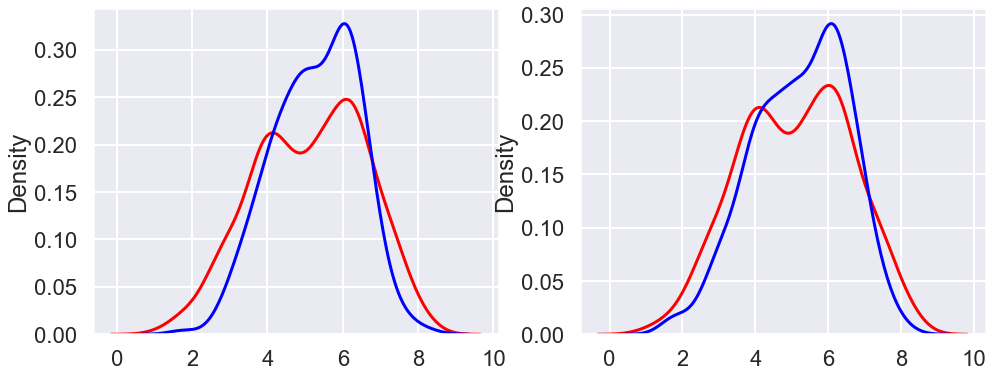

In [639]:
f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(16, 6))

#experiment #0
import numpy as np
same_meme_like = []
for cluster_id in cross_cluster_dict[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_meme_like.append(cluster_meme_like[cluster_id])

cross_meme_like = []
for cluster_id in cross_cluster_dict[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    cross_meme_like.append(cluster_meme_like[cluster_id])
sns.kdeplot(same_meme_like, color='red', ax=ax[0])#,cumulative=True)
sns.kdeplot(cross_meme_like, color='blue', ax=ax[0])#,cumulative=True)

#experiment #0
import numpy as np
same_meme_like = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_meme_like.append(cluster_meme_like[cluster_id])

cross_meme_like = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    cross_meme_like.append(cluster_meme_like[cluster_id])
sns.kdeplot(same_meme_like, color='red', ax=ax[1])#,cumulative=True)
sns.kdeplot(cross_meme_like, color='blue', ax=ax[1])#,cumulative=True)

<AxesSubplot:ylabel='Density'>

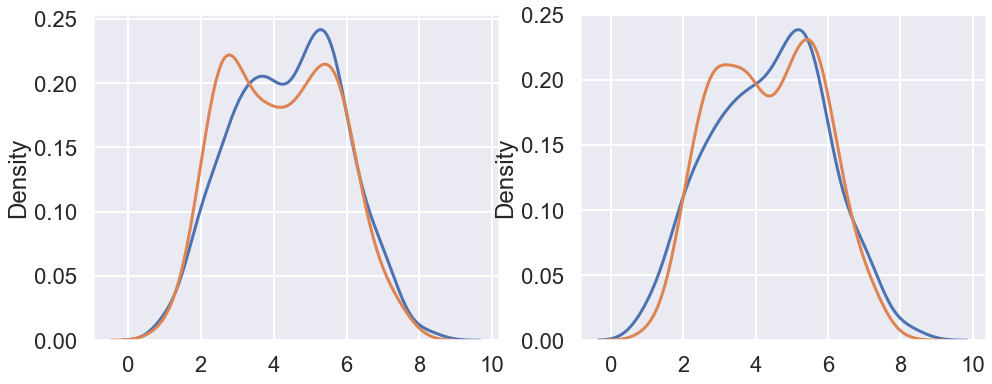

In [640]:
f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(16, 6))
# experiment #0
import numpy as np
same_meme_share = []
for cluster_id in cross_cluster_dict[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_meme_share.append(cluster_meme_share[cluster_id])

cross_meme_share = []
for cluster_id in cross_cluster_dict[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    cross_meme_share.append(cluster_meme_share[cluster_id])
sns.kdeplot(same_meme_share, ax=ax[0])#,cumulative=True)
sns.kdeplot(cross_meme_share, ax=ax[0])#,cumulative=True)
#plt.yscale('log')
#plt.xscale('log')

# experiment #0
import numpy as np
same_meme_share = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_meme_share.append(cluster_meme_share[cluster_id])

cross_meme_share = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    cross_meme_share.append(cluster_meme_share[cluster_id])
sns.kdeplot(same_meme_share, ax=ax[1])#,cumulative=True)
sns.kdeplot(cross_meme_share, ax=ax[1])#,cumulative=True)
#plt.yscale('log')
#plt.xscale('log')

<AxesSubplot:ylabel='Density'>

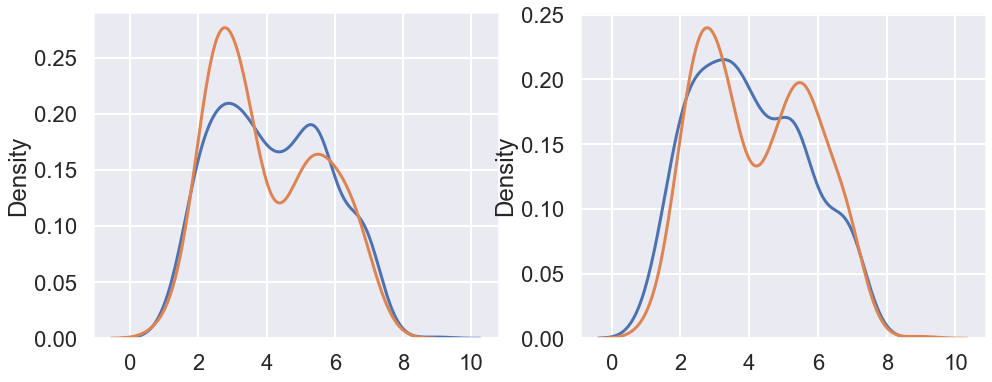

In [641]:
f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(16, 6))
# experiment #0
import numpy as np
same_meme_create = []
for cluster_id in cross_cluster_dict[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_meme_create.append(cluster_meme_create[cluster_id])

cross_meme_create = []
for cluster_id in cross_cluster_dict[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    cross_meme_create.append(cluster_meme_create[cluster_id])
sns.kdeplot(same_meme_create, ax=ax[0])#,cumulative=True)
sns.kdeplot(cross_meme_create, ax=ax[0])#,cumulative=True)
#plt.yscale('log')

# experiment #0
import numpy as np
same_meme_create = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_meme_create.append(cluster_meme_create[cluster_id])

cross_meme_create = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    cross_meme_create.append(cluster_meme_create[cluster_id])
sns.kdeplot(same_meme_create, ax=ax[1])#,cumulative=True)
sns.kdeplot(cross_meme_create, ax=ax[1])#,cumulative=True)
#plt.yscale('log')

<AxesSubplot:ylabel='Density'>

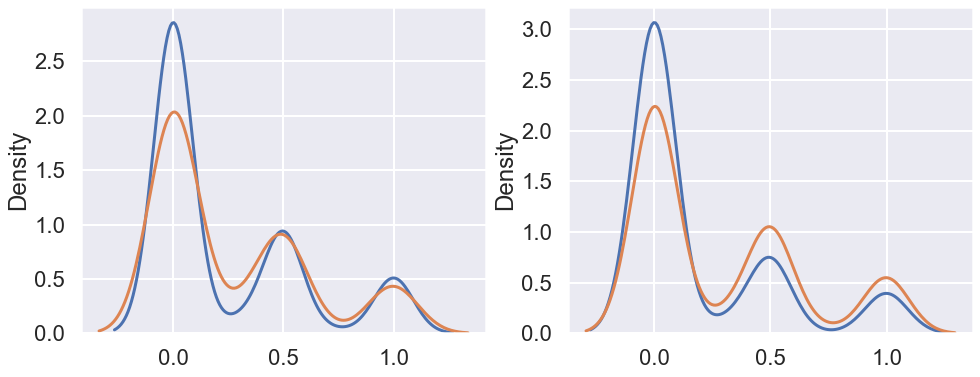

In [642]:
f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(16, 6))
# experiment #0
import numpy as np
same_meme_feature = []
for cluster_id in cross_cluster_dict[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_meme_feature.append(cluster_role_movie_rate[cluster_id])

cross_meme_feature = []
for cluster_id in cross_cluster_dict[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    cross_meme_feature.append(cluster_role_movie_rate[cluster_id])
sns.kdeplot(same_meme_feature, ax=ax[0])#,cumulative=True)
sns.kdeplot(cross_meme_feature, ax=ax[0])#,cumulative=True)
#plt.yscale('log')

# experiment #0
import numpy as np
same_meme_feature = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_topic_entropy_feature[cluster_id])
    same_meme_feature.append(cluster_role_movie_rate[cluster_id])

cross_meme_feature = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_topic_entropy_feature[cluster_id])
    cross_meme_feature.append(cluster_role_movie_rate[cluster_id])
sns.kdeplot(same_meme_feature, ax=ax[1])#,cumulative=True)
sns.kdeplot(cross_meme_feature, ax=ax[1])#,cumulative=True)
#plt.yscale('log')

In [680]:
same_emotion = [0,0,0,0,0,0,0]
same_emotion_strength = [0,0,0,0,0,0,0,0,0]
same_emotion_africa = [0,0,0,0,0,0,0]
same_emotion_strength_africa = [0,0,0,0,0,0,0,0,0]
for cluster_id in cross_cluster_dict_new[0]:
    if cluster_size[cluster_id]>=0:
        #print(cluster_topic_entropy_feature[cluster_id])
        role_emotion = cluster_role_emotion[cluster_id]
        role_emotion_strengh = cluster_role_strength[cluster_id]
        #same_africa_emotion += role_emotion
        c=[same_emotion[i]+role_emotion[i] for i in range(min(len(same_emotion),len(role_emotion)))]
        same_emotion = c
        same_emotion_strength.append(role_emotion_strengh)
        #print(role_emotion,role_emotion_strengh)
        #same_africa_emotion.append(cluster_role_africa[cluster_id])
    if cluster_size[cluster_id]>=0 and cluster_role_africa[cluster_id]>0:
        #print(cluster_topic_entropy_feature[cluster_id])
        role_emotion_africa = cluster_role_emotion[cluster_id]
        role_emotion_strengh_africa = cluster_role_strength[cluster_id]
        #same_africa_emotion += role_emotion
        c=[same_emotion_africa[i]+role_emotion_africa[i] for i in range(min(len(same_emotion_africa),len(role_emotion_africa)))]
        same_emotion_africa = c
        same_emotion_strength_africa.append(role_emotion_strengh_africa)
        #print(role_emotion,role_emotion_strengh)
        #same_africa_emotion.append(cluster_role_africa[cluster_id])    

cross_emotion = [0,0,0,0,0,0,0]
cross_emotion_strength = []
cross_emotion_africa = [0,0,0,0,0,0,0]
cross_emotion_strength_africa = []
for cluster_id in cross_cluster_dict_new[1]:
    if cluster_size[cluster_id]>=0:
        #print(cluster_topic_entropy_feature[cluster_id])
        role_emotion = cluster_role_emotion[cluster_id]
        role_emotion_strengh = cluster_role_strength[cluster_id]
        #print(role_emotion,role_emotion_strengh)
        c=[cross_emotion[i]+role_emotion[i] for i in range(min(len(cross_emotion),len(role_emotion)))]
        cross_emotion = c
        cross_emotion_strength.append(role_emotion_strengh)
    if cluster_size[cluster_id]>=0 and cluster_role_africa[cluster_id]>0:
        #print(cluster_topic_entropy_feature[cluster_id])
        role_emotion_africa = cluster_role_emotion[cluster_id]
        role_emotion_strengh_africa = cluster_role_strength[cluster_id]
        #same_africa_emotion += role_emotion
        c=[cross_emotion_africa[i]+role_emotion_africa[i] for i in range(min(len(cross_emotion_africa),len(role_emotion_africa)))]
        cross_emotion_africa = c
        cross_emotion_strength_africa.append(role_emotion_strengh_africa)
        #print(role_emotion,role_emotion_strengh)
        #same_africa_emotion.append(cluster_role_africa[cluster_id])
        #     
cross_proportion_list = cross_emotion/np.sum(cross_emotion)
cross_proportion_list_africa = cross_emotion_africa/np.sum(cross_emotion_africa)
#africa_emotion_list = []
role_emotion_list = ['Happy', 'Sad', 'Angry', 'Disgust', 'Surprise', 'Peace', 'Scared']
# for i in range(7):
#     record = {"Class":"Cross","Emotion":role_emotion_list[i],"Proportion":proportion_list[i]}
#     africa_emotion_list.append(record)

same_proportion_list = same_emotion/np.sum(same_emotion)
same_proportion_list_africa = same_emotion_africa/np.sum(same_emotion_africa)
# for i in range(7):
#     record = {"Class":"Same","Emotion":role_emotion_list[i],"Proportion":proportion_list[i]}
#     africa_emotion_list.append(record)

role_emotion_dis_dif = []
for i in range(7):
    record = {"tag":role_emotion_list[i], "same": same_proportion_list[i], "cross": cross_proportion_list[i], "dif": cross_proportion_list[i]-same_proportion_list[i]}
    role_emotion_dis_dif.append(record)
role_emotion_dis_dif_df = pd.DataFrame(role_emotion_dis_dif)

role_emotion_dis_dif_africa = []
for i in range(7):
    record = {"tag":role_emotion_list[i], "same": same_proportion_list_africa[i], "cross": cross_proportion_list_africa[i], "dif": cross_proportion_list_africa[i]-same_proportion_list_africa[i]}
    role_emotion_dis_dif_africa.append(record)
role_emotion_dis_dif_df_africa = pd.DataFrame(role_emotion_dis_dif_africa)

#plt.figure(figsize=(12,6))
#ax = sns.barplot(data=africa_emotion_list_df, x="Emotion",y="Proportion", hue="Class",capsize=.01, alpha=0.8)
#show_values(ax)

In [674]:
role_emotion_dis_dif_df

tag      same     cross       dif
0     Happy  0.201790  0.235967  0.034177
1       Sad  0.231172  0.190383 -0.040789
2     Angry  0.096758  0.080889 -0.015869
3   Disgust  0.058257  0.086163  0.027906
4  Surprise  0.102668  0.110187  0.007519
5     Peace  0.260385  0.233156 -0.027229
6    Scared  0.048970  0.063256  0.014286

In [681]:
role_emotion_dis_dif_df_africa

tag      same     cross       dif
0     Happy  0.114962  0.233860  0.118898
1       Sad  0.230769  0.149670 -0.081099
2     Angry  0.062553  0.045085 -0.017468
3   Disgust  0.125951  0.170679  0.044728
4  Surprise  0.207101  0.147370 -0.059731
5     Peace  0.163145  0.143690 -0.019455
6    Scared  0.095520  0.109646  0.014126

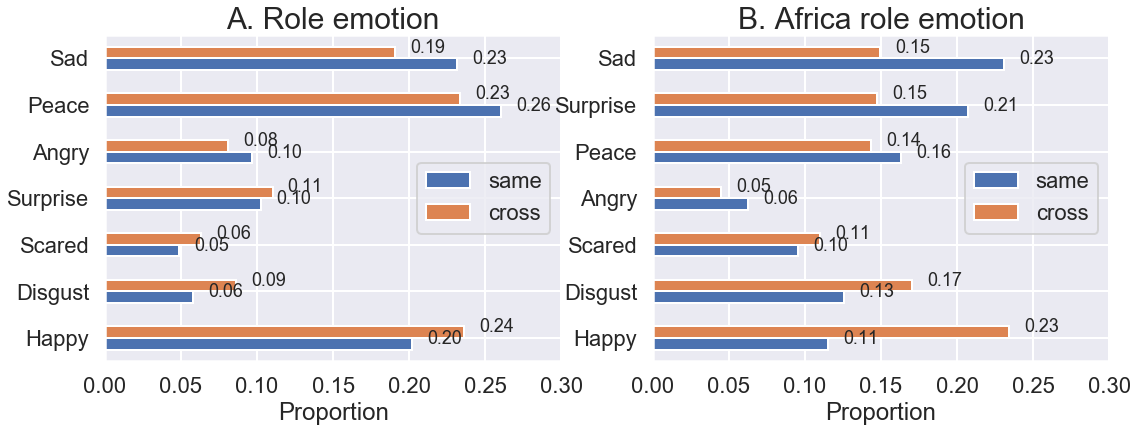

In [711]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
#matplotlib.rcParams['font.family']='SimHei'#黑体'STSong'仿宋

plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['font.size'] = '14' #用来
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
 
#sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})
sns.set_context("poster", font_scale=1)

# Initialize the matplotlib figure
f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(18, 6))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes = role_emotion_dis_dif_df.sort_values("dif", ascending=False)
# Plot the total crashes
#sns.set_color_codes("pastel")
crashes.index=crashes['tag']
crashes.drop('tag',axis=1,inplace=True)
crashes.drop('dif',axis=1,inplace=True)
crashes.plot.barh(ax=ax[0])#,figsize=(16, 6))
# sns.barplot(ax = ax[0], x="same", y="tag", data=crashes,
#             label="same culture", color="r", saturation=0.75, alpha=0.6)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
# sns.barplot(ax = ax[0], x="cross", y="tag", data=crashes,
#             label="cross culture", color="b", saturation=0.75, alpha=0.6)

# Add a legend and informative axis label
ax[0].legend(ncol=1, loc="center right", frameon=True)
ax[0].set_xlabel('Proportion')
ax[0].set_ylabel('')
ax[0].set_title('A. Role emotion', fontsize=30)
ax[0].set_xlim((0,0.3))
#ax[0].legend(ncol=1, loc="center right", frameon=True)


# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

crashes = role_emotion_dis_dif_df_africa.sort_values("dif", ascending=False)
crashes.index=crashes['tag']
crashes.drop('tag',axis=1,inplace=True)
crashes.drop('dif',axis=1,inplace=True)
# Plot the total crashes
#sns.set_color_codes("pastel")
# sns.barplot(ax = ax[1], x="same", y="tag", data=crashes,
#             label="same culture", color="r", saturation=0.75, alpha=0.6)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")

crashes.plot.barh(ax=ax[1])#,figsize=(16, 6))
# sns.barplot(ax = ax[1], x="cross", y="tag", data=crashes,
#             label="cross culture", color="b", saturation=0.75, alpha=0.6)

# Add a legend and informative axis label
#ax[0].legend(ncol=1, loc="center right", frameon=True)

ax[1].set_xlabel('Proportion')
ax[1].set_ylabel('')
ax[1].set_xlim((0,0.3))
ax[1].set_title('B. Africa role emotion', fontsize=30)
show_values(ax[0],orient='h')
show_values(ax[1],orient='h')
#ax[1].legend(ncol=1, loc="center right", frameon=True)
# import numpy as np
# same_topic_matrix = []
# for cluster_id in cross_cluster_dict[0]:
#     #print(cluster_topic_feature[cluster_id])
#     same_topic_matrix.append(cluster_topic_feature[cluster_id])

# same_topic_dis = np.sum(np.asarray(same_topic_matrix),axis=0)

# cross_topic_matrix = []
# for cluster_id in cross_cluster_dict[1]:
#     #print(cluster_topic_feature[cluster_id])
#     cross_topic_matrix.append(cluster_topic_feature[cluster_id])

# cross_topic_dis = np.sum(np.asarray(cross_topic_matrix),axis=0)

# same_dist = same_topic_dis/np.sum(same_topic_dis)
# cross_dist = cross_topic_dis/np.sum(cross_topic_dis)

# topic_dif = {}
# topic_dis_list = []
# for i in range(len(same_dist)):
#     record = {}
#     dif = same_dist[i]-cross_dist[i]
#     topic_dif[topic_list[i]]=dif
#     record['tag']=topic_zh_en_mapping[topic_list[i]]
#     record['same']=same_dist[i]
#     record['cross']=cross_dist[i]
#     record['dif']=dif
#     topic_dis_list.append(record)
#     #print(topic_list[i],dif)
# topic_dis_df = pd.DataFrame(topic_dis_list)

# # Load the example car crash dataset
# #crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
# crashes_topic = topic_dis_df.sort_values("dif", ascending=False)
# # Plot the total crashes
# #sns.set_color_codes("pastel")
# sns.barplot(ax= ax[1], x="same", y="tag", data=crashes_topic, label="same culture", color="r", saturation=0.75, alpha=0.6)

# # Plot the crashes where alcohol was involved
# sns.set_color_codes("muted")
# sns.barplot(ax= ax[1], x="cross", y="tag", data=crashes_topic,
#             label="cross culture", color="b", saturation=0.75, alpha=0.6)

# # Add a legend and informative axis label
# ax[1].legend(ncol=1, loc="center right", frameon=True)
# ax[1].set_xlabel('Proportion')
# ax[1].set_ylabel('')
# ax[1].set_title('B. Topic', fontsize=30)



# show_values(ax[0], orient="h")
# show_values(ax[1], orient="h")
# plt.tight_layout()
# plt.savefig('./figs/role_emotion_distribution.png', dpi=600)

In [644]:
import numpy as np
same_emotion_matrix = []
for cluster_id in cross_cluster_dict[0]:
    #print(cluster_emotion_feature[cluster_id])
    same_emotion_matrix.append(cluster_emotion_feature[cluster_id])

same_emotion_dis = np.sum(np.asarray(same_emotion_matrix),axis=0)

cross_emotion_matrix = []
for cluster_id in cross_cluster_dict[1]:
    #print(cluster_emotion_feature[cluster_id])
    cross_emotion_matrix.append(cluster_emotion_feature[cluster_id])

cross_emotion_dis = np.sum(np.asarray(cross_emotion_matrix),axis=0)

same_dist = same_emotion_dis/np.sum(same_emotion_dis)
cross_dist = cross_emotion_dis/np.sum(cross_emotion_dis)

In [645]:
emotion_dif = {}
emotion_dis_list = []
for i in range(len(same_dist)):
    record = {}
    dif = same_dist[i]-cross_dist[i]
    #emotion_dif[topic_list[i]]=dif
    emotion_dif[emotion_list[i]]=dif
    record['tag']=emotion_zh_en_mapping[emotion_list[i]]
    record['same']=same_dist[i]
    record['cross']=cross_dist[i]
    record['dif']=dif
    emotion_dis_list.append(record)
    print(emotion_list[i],dif)
emotion_dis_df = pd.DataFrame(emotion_dis_list)

无奈 -0.00024288298387618867
幽默/调侃/娱乐/消遣 -0.015179294955736694
悲伤/悲痛 0.02234467767652075
平和/平静/镇定 0.004605985728840148
欢乐/喜悦/高兴/开心 -0.008367073251750928
无语 -0.005048051597276539
困惑/疑惑/混乱 -0.007920979178416214
满意/满足/称心 -0.00856505952250311
厌恶/反感/憎恶 -0.001767594080872792
愤怒/生气 0.015653225109684914
尴尬/笨拙 0.007069410739081704
烦躁 0.0059935364490491146
期待/希望 -0.0015502842742701646
忧虑/焦虑 0.001187141602687073
兴奋/激动 0.004461633821542882
震惊/恐怖 -0.007691253022597606
纠结 -0.0054721682585925115
失望 0.0040314096907413804
爱恋/钟情/浪漫/迷恋 -0.005587831053650743
渴望/渴求 0.0027995964804981427
宽慰/释放/轻松 -0.004952571293525013
惊奇/惊讶/惊喜 0.00150578445780525
后悔/遗憾 0.0033424859480070714
害怕/畏惧/恐惧 -0.0023210457385783295
狂喜/着迷 0.0016798206809046532
无聊/厌倦 0.002751755623499919
爱慕/崇拜 -0.0005070088247602625
钦佩/羡慕/赞赏 0.00012117195763975287
感动 0.0005471427779750906
性欲 -0.0017820956185067229
悲悯/移情/同理 0.0003314027865166623
兴趣/爱好 -0.0009501350588978353
内疚 -0.0005493405191769655
审美/美感 0.00038757847335595705
怀旧/念旧/思乡 0.0006217297307319

In [646]:
'''
import seaborn as sns
import matplotlib.pyplot as plt
#matplotlib.rcParams['font.family']='SimHei'#黑体'STSong'仿宋

plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['font.size'] = '20' #用来
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
 
sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 20))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes = emotion_dis_df.sort_values("dif", ascending=False)
# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(x="same", y="tag", data=crashes,
            label="same culture", color="r", saturation=0.75, alpha=0.6)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="cross", y="tag", data=crashes,
            label="cross culture", color="b", saturation=0.75, alpha=0.6)

# Add a legend and informative axis label
ax.legend(ncol=1, loc="center right", frameon=True)
ax.set_xlabel('Proportion')
ax.set_ylabel('')
#ax.set_ylabel('proportion')
'''

'\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n#matplotlib.rcParams[\'font.family\']=\'SimHei\'#黑体\'STSong\'仿宋\n\nplt.rcParams[\'font.family\'] = [\'Arial Unicode MS\'] #用来正常显示中文标签\nplt.rcParams[\'font.size\'] = \'20\' #用来\nplt.rcParams[\'axes.unicode_minus\'] = False #用来正常显示负号\n \nsns.set_style(\'whitegrid\',{\'font.sans-serif\':[\'Arial Unicode MS\',\'Arial\']})\n\n\n# Initialize the matplotlib figure\nf, ax = plt.subplots(figsize=(8, 20))\n\n# Load the example car crash dataset\n#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)\ncrashes = emotion_dis_df.sort_values("dif", ascending=False)\n# Plot the total crashes\n#sns.set_color_codes("pastel")\nsns.barplot(x="same", y="tag", data=crashes,\n            label="same culture", color="r", saturation=0.75, alpha=0.6)\n\n# Plot the crashes where alcohol was involved\nsns.set_color_codes("muted")\nsns.barplot(x="cross", y="tag", data=crashes,\n            label="cross culture", color="b", saturat

In [647]:
emotion_dis_df

tag      same     cross       dif
0                 Helpless  0.102042  0.102285 -0.000243
1                Amusement  0.110773  0.125952 -0.015179
2                  Sadness  0.104365  0.082021  0.022345
3                 Calmness  0.088106  0.083500  0.004606
4                      Joy  0.067441  0.075808 -0.008367
5               Speechless  0.057669  0.062717 -0.005048
6                Confusion  0.041410  0.049331 -0.007921
7             Satisfaction  0.032038  0.040604 -0.008565
8                  Disgust  0.033881  0.035648 -0.001768
9                    Anger  0.042131  0.026477  0.015653
10             Awkwardness  0.037245  0.030175  0.007069
11           Irritableness  0.028995  0.023001  0.005994
12             Expectation  0.028995  0.030545 -0.001550
13                 Anxiety  0.026111  0.024924  0.001187
14              Excitement  0.020585  0.016123  0.004462
15                   Shock  0.017381  0.025072 -0.007691
16                  Tangle  0.016420  0.021892 -0.005472
17          Disappointment  0.016900  0.012869  0.004031
18                 Romance  0.012014  0.017602 -0.005588
19                 Craving  0.014337  0.011538  0.002800
20                  Relief  0.010653  0.015605 -0.004953
21                Surprise  0.012895  0.011390  0.001506
22                  Regret  0.012735  0.009393  0.003342
23                    Fear  0.011213  0.013535 -0.002321
24            Entrancement  0.008410  0.006730  0.001680
25                 Boredom  0.009852  0.007100  0.002752
26               Adoration  0.004966  0.005473 -0.000507
27              Admiration  0.006408  0.006287  0.000121
28                  Moving  0.004245  0.003698  0.000547
29           Sexual Desire  0.002803  0.004585 -0.001782
30           Empathic pain  0.004325  0.003994  0.000331
31                Interest  0.003044  0.003994 -0.000950
32                  Guilty  0.002483  0.003032 -0.000549
33  Aesthetic Appreciation  0.002163  0.001775  0.000388
34               Nostalgia  0.002323  0.001701  0.000622
35                     Awe  0.001842  0.001553  0.000289
36       Self-contemptuous  0.000400  0.001627 -0.001227
37         Self-confidence  0.000400  0.000444 -0.000043

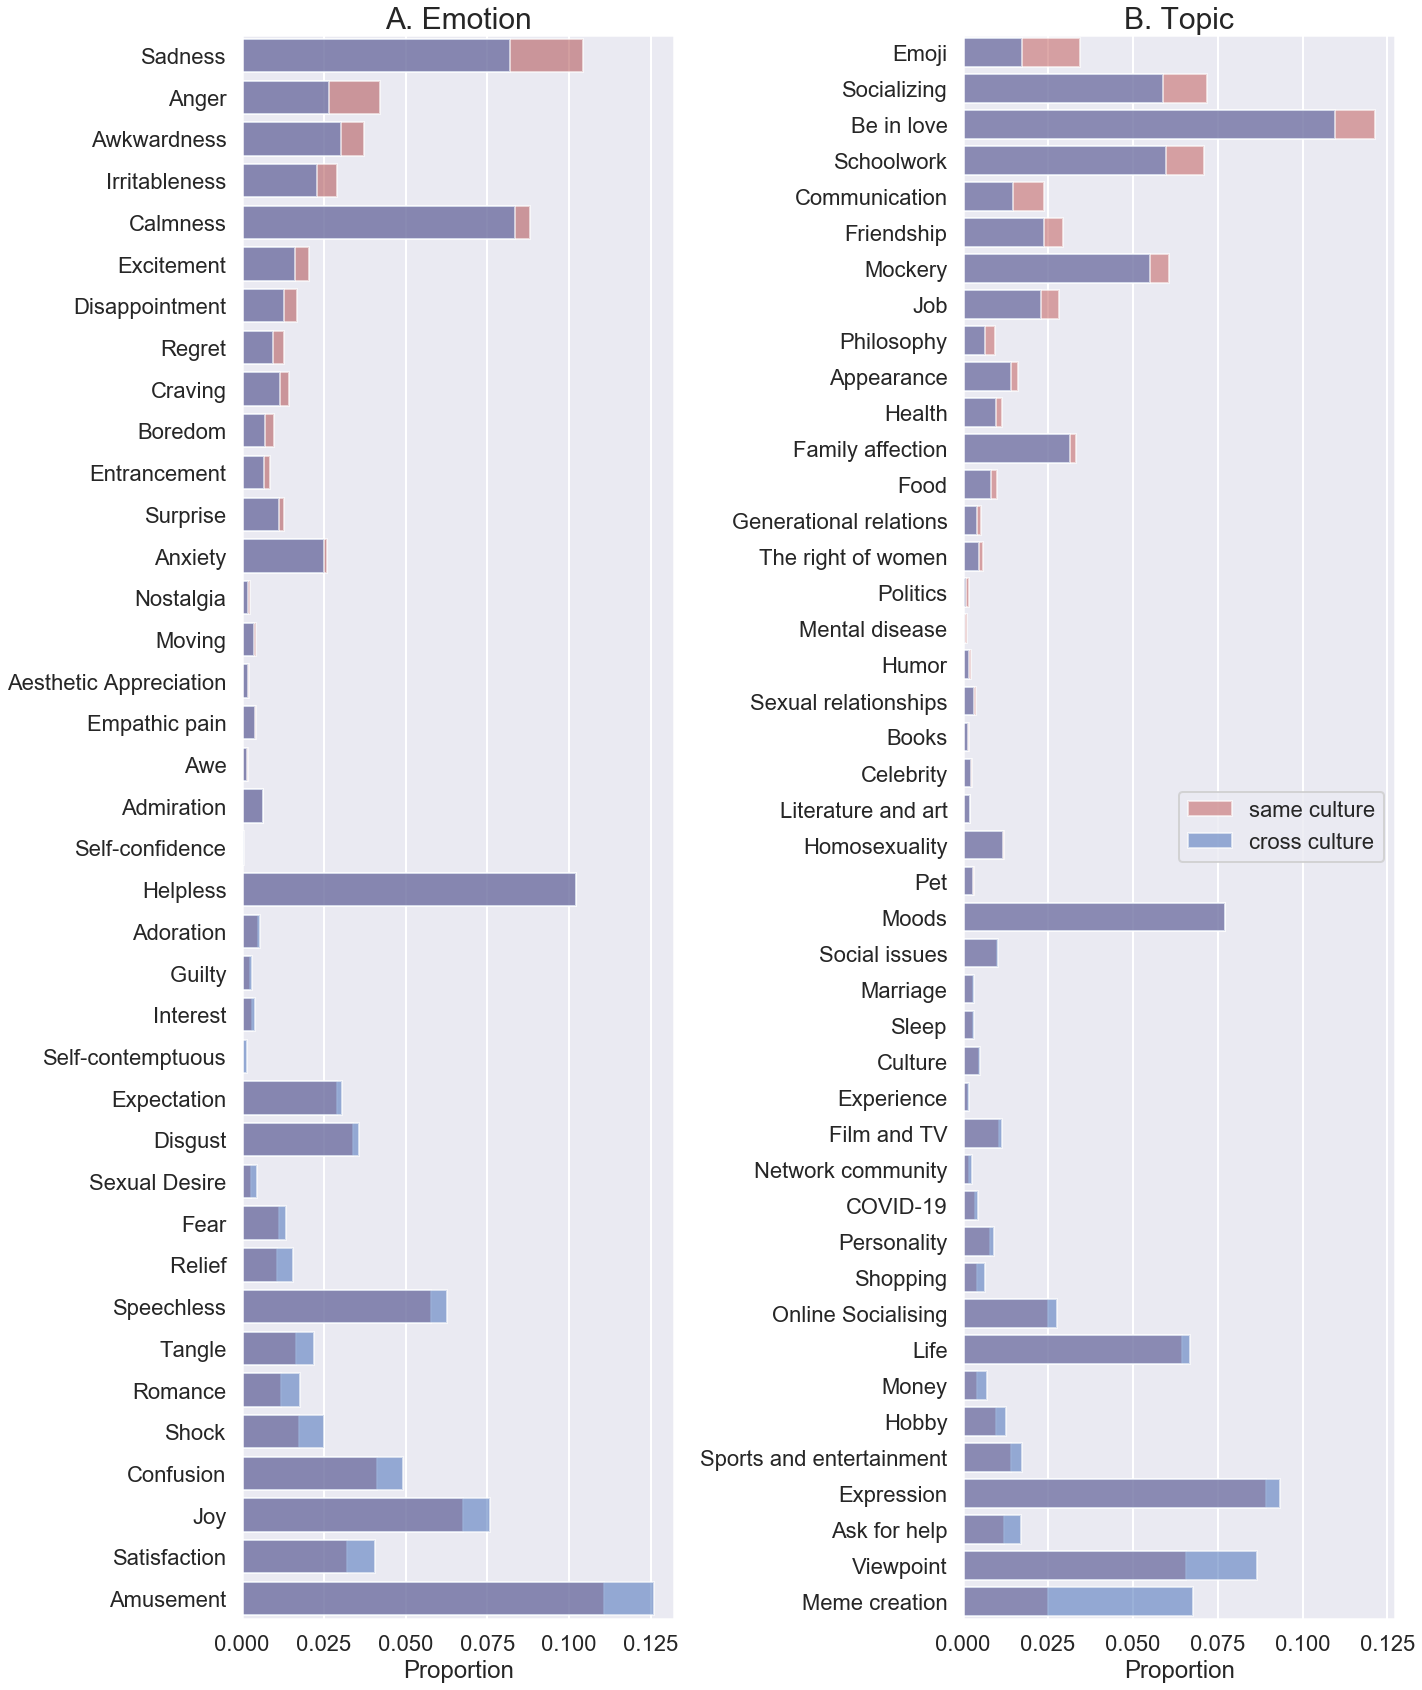

In [107]:
#社区内跨文化传播的情感分布对比
import numpy as np
same_emotion_matrix = []
for cluster_id in cross_cluster_dict[0]:
    #print(cluster_emotion_feature[cluster_id])
    same_emotion_matrix.append(cluster_emotion_feature[cluster_id])

same_emotion_dis = np.sum(np.asarray(same_emotion_matrix),axis=0)

cross_emotion_matrix = []
for cluster_id in cross_cluster_dict[1]:
    #print(cluster_emotion_feature[cluster_id])
    cross_emotion_matrix.append(cluster_emotion_feature[cluster_id])

cross_emotion_dis = np.sum(np.asarray(cross_emotion_matrix),axis=0)

same_dist = same_emotion_dis/np.sum(same_emotion_dis)
cross_dist = cross_emotion_dis/np.sum(cross_emotion_dis)

emotion_dif = {}
emotion_dis_list = []
for i in range(len(same_dist)):
    record = {}
    dif = same_dist[i]-cross_dist[i]
    #emotion_dif[topic_list[i]]=dif
    emotion_dif[emotion_list[i]]=dif
    record['tag']=emotion_zh_en_mapping[emotion_list[i]]
    record['same']=same_dist[i]
    record['cross']=cross_dist[i]
    record['dif']=dif
    emotion_dis_list.append(record)
    #print(emotion_list[i],dif)
emotion_dis_df = pd.DataFrame(emotion_dis_list)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
#matplotlib.rcParams['font.family']='SimHei'#黑体'STSong'仿宋

plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['font.size'] = '24' #用来
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
 
#sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})
sns.set_context("poster", font_scale=1)

# Initialize the matplotlib figure
f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(20, 24))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes = emotion_dis_df.sort_values("dif", ascending=False)
# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(ax = ax[0], x="same", y="tag", data=crashes,
            label="same culture", color="r", saturation=0.75, alpha=0.6)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(ax = ax[0], x="cross", y="tag", data=crashes,
            label="cross culture", color="b", saturation=0.75, alpha=0.6)

# Add a legend and informative axis label
#ax[0].legend(ncol=1, loc="center right", frameon=True)
ax[0].set_xlabel('Proportion')
ax[0].set_ylabel('')
ax[0].set_title('A. Emotion', fontsize=30)

import numpy as np
same_topic_matrix = []
for cluster_id in cross_cluster_dict[0]:
    #print(cluster_topic_feature[cluster_id])
    same_topic_matrix.append(cluster_topic_feature[cluster_id])

same_topic_dis = np.sum(np.asarray(same_topic_matrix),axis=0)

cross_topic_matrix = []
for cluster_id in cross_cluster_dict[1]:
    #print(cluster_topic_feature[cluster_id])
    cross_topic_matrix.append(cluster_topic_feature[cluster_id])

cross_topic_dis = np.sum(np.asarray(cross_topic_matrix),axis=0)

same_dist = same_topic_dis/np.sum(same_topic_dis)
cross_dist = cross_topic_dis/np.sum(cross_topic_dis)

topic_dif = {}
topic_dis_list = []
for i in range(len(same_dist)):
    record = {}
    dif = same_dist[i]-cross_dist[i]
    topic_dif[topic_list[i]]=dif
    record['tag']=topic_zh_en_mapping[topic_list[i]]
    record['same']=same_dist[i]
    record['cross']=cross_dist[i]
    record['dif']=dif
    topic_dis_list.append(record)
    #print(topic_list[i],dif)
topic_dis_df = pd.DataFrame(topic_dis_list)

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes_topic = topic_dis_df.sort_values("dif", ascending=False)
# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(ax= ax[1], x="same", y="tag", data=crashes_topic, label="same culture", color="r", saturation=0.75, alpha=0.6)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(ax= ax[1], x="cross", y="tag", data=crashes_topic,
            label="cross culture", color="b", saturation=0.75, alpha=0.6)

# Add a legend and informative axis label
ax[1].legend(ncol=1, loc="center right", frameon=True)
ax[1].set_xlabel('Proportion')
ax[1].set_ylabel('')
ax[1].set_title('B. Topic', fontsize=30)

plt.tight_layout()
plt.savefig('./figs/emotion_topic_0915_incommunity.png', dpi=600)


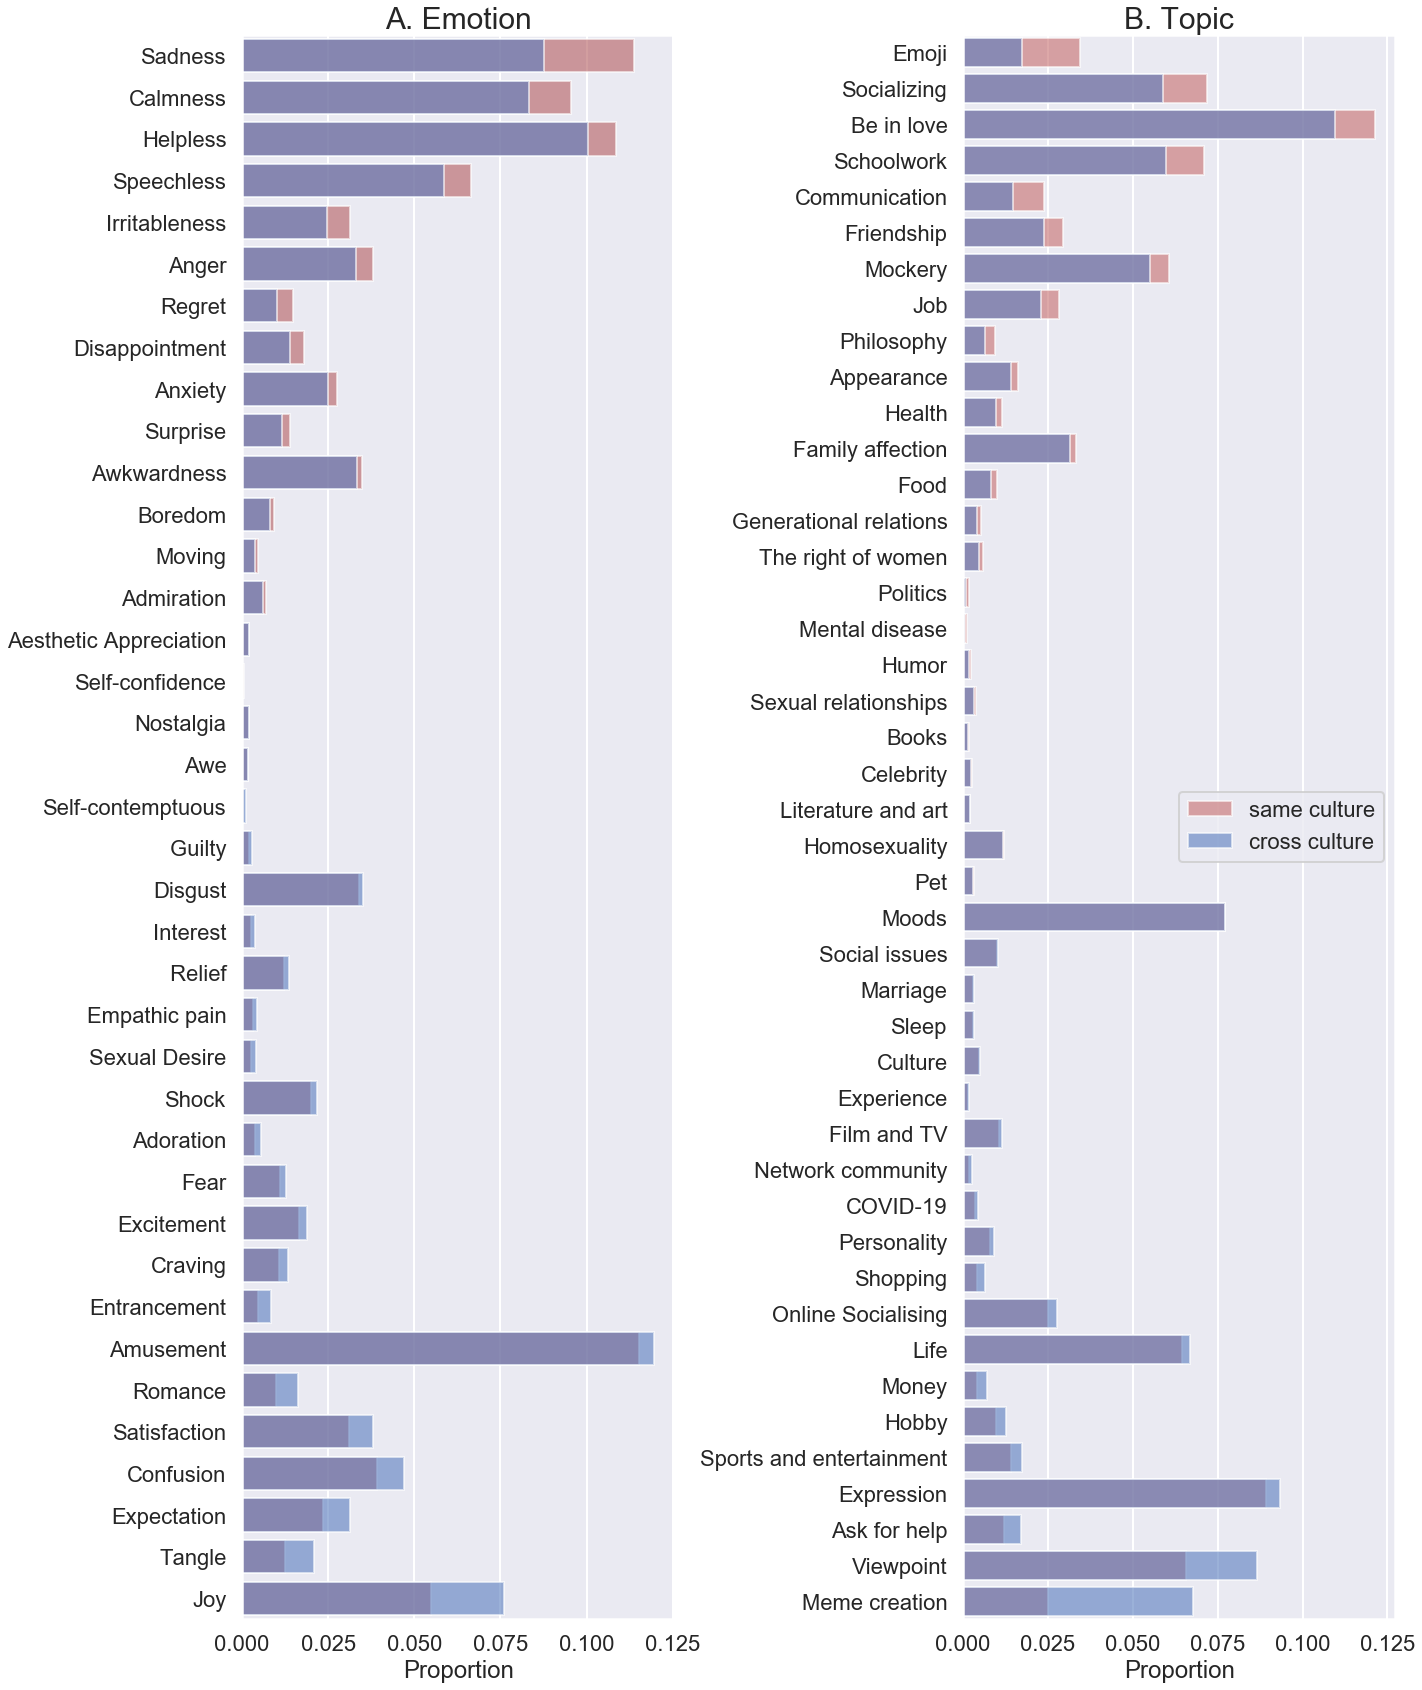

In [108]:
#校正后的跨文化传播的情感分布对比
import numpy as np
same_emotion_matrix = []
for cluster_id in cross_cluster_dict_new[0]:
    #print(cluster_emotion_feature[cluster_id])
    same_emotion_matrix.append(cluster_emotion_feature[cluster_id])

same_emotion_dis = np.sum(np.asarray(same_emotion_matrix),axis=0)

cross_emotion_matrix = []
for cluster_id in cross_cluster_dict_new[1]:
    #print(cluster_emotion_feature[cluster_id])
    cross_emotion_matrix.append(cluster_emotion_feature[cluster_id])

cross_emotion_dis = np.sum(np.asarray(cross_emotion_matrix),axis=0)

same_dist = same_emotion_dis/np.sum(same_emotion_dis)
cross_dist = cross_emotion_dis/np.sum(cross_emotion_dis)

emotion_dif = {}
emotion_dis_list = []
for i in range(len(same_dist)):
    record = {}
    dif = same_dist[i]-cross_dist[i]
    #emotion_dif[topic_list[i]]=dif
    emotion_dif[emotion_list[i]]=dif
    record['tag']=emotion_zh_en_mapping[emotion_list[i]]
    record['same']=same_dist[i]
    record['cross']=cross_dist[i]
    record['dif']=dif
    emotion_dis_list.append(record)
    #print(emotion_list[i],dif)
emotion_dis_df = pd.DataFrame(emotion_dis_list)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
#matplotlib.rcParams['font.family']='SimHei'#黑体'STSong'仿宋

plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['font.size'] = '24' #用来
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
 
#sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})
sns.set_context("poster", font_scale=1)

# Initialize the matplotlib figure
f, ax = plt.subplots(nrows=1, ncols = 2, figsize=(20, 24))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes = emotion_dis_df.sort_values("dif", ascending=False)
# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(ax = ax[0], x="same", y="tag", data=crashes,
            label="same culture", color="r", saturation=0.75, alpha=0.6)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(ax = ax[0], x="cross", y="tag", data=crashes,
            label="cross culture", color="b", saturation=0.75, alpha=0.6)

# Add a legend and informative axis label
#ax[0].legend(ncol=1, loc="center right", frameon=True)
ax[0].set_xlabel('Proportion')
ax[0].set_ylabel('')
ax[0].set_title('A. Emotion', fontsize=30)

import numpy as np
same_topic_matrix = []
for cluster_id in cross_cluster_dict[0]:
    #print(cluster_topic_feature[cluster_id])
    same_topic_matrix.append(cluster_topic_feature[cluster_id])

same_topic_dis = np.sum(np.asarray(same_topic_matrix),axis=0)

cross_topic_matrix = []
for cluster_id in cross_cluster_dict[1]:
    #print(cluster_topic_feature[cluster_id])
    cross_topic_matrix.append(cluster_topic_feature[cluster_id])

cross_topic_dis = np.sum(np.asarray(cross_topic_matrix),axis=0)

same_dist = same_topic_dis/np.sum(same_topic_dis)
cross_dist = cross_topic_dis/np.sum(cross_topic_dis)

topic_dif = {}
topic_dis_list = []
for i in range(len(same_dist)):
    record = {}
    dif = same_dist[i]-cross_dist[i]
    topic_dif[topic_list[i]]=dif
    record['tag']=topic_zh_en_mapping[topic_list[i]]
    record['same']=same_dist[i]
    record['cross']=cross_dist[i]
    record['dif']=dif
    topic_dis_list.append(record)
    #print(topic_list[i],dif)
topic_dis_df = pd.DataFrame(topic_dis_list)

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes_topic = topic_dis_df.sort_values("dif", ascending=False)
# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(ax= ax[1], x="same", y="tag", data=crashes_topic, label="same culture", color="r", saturation=0.75, alpha=0.6)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(ax= ax[1], x="cross", y="tag", data=crashes_topic,
            label="cross culture", color="b", saturation=0.75, alpha=0.6)

# Add a legend and informative axis label
ax[1].legend(ncol=1, loc="center right", frameon=True)
ax[1].set_xlabel('Proportion')
ax[1].set_ylabel('')
ax[1].set_title('B. Topic', fontsize=30)

plt.tight_layout()
plt.savefig('./figs/emotion_topic_0915_corrected.png', dpi=600)


In [650]:
import numpy as np
same_topic_matrix = []
for cluster_id in cross_cluster_dict[0]:
    #print(cluster_topic_feature[cluster_id])
    same_topic_matrix.append(cluster_topic_feature[cluster_id])

same_topic_dis = np.sum(np.asarray(same_topic_matrix),axis=0)

cross_topic_matrix = []
for cluster_id in cross_cluster_dict[1]:
    #print(cluster_topic_feature[cluster_id])
    cross_topic_matrix.append(cluster_topic_feature[cluster_id])

cross_topic_dis = np.sum(np.asarray(cross_topic_matrix),axis=0)

same_dist = same_topic_dis/np.sum(same_topic_dis)
cross_dist = cross_topic_dis/np.sum(cross_topic_dis)


In [651]:
tag_dict

{'imemeflix': 886, 'memes': 1426, 'memestw': 1115, 'memesdb': 19995}

In [652]:
import matplotlib.pyplot as plt

In [653]:
topic_dif = {}
topic_dis_list = []
for i in range(len(same_dist)):
    record = {}
    dif = same_dist[i]-cross_dist[i]
    topic_dif[topic_list[i]]=dif
    record['tag']=topic_zh_en_mapping[topic_list[i]]
    record['same']=same_dist[i]
    record['cross']=cross_dist[i]
    record['dif']=dif
    topic_dis_list.append(record)
    print(topic_list[i],dif)
topic_dis_df = pd.DataFrame(topic_dis_list)

生活 -0.002456734964801102
人生 0.0026968148095583584
睡眠 -0.00030505947966690027
爱好 -0.0028932040256135078
外观 0.002240510608549245
求助 -0.005004260129559937
食物 0.0017192836475844585
学业 0.011348892299308612
友情 0.005628245913608318
工作 0.005130216824493657
代际关系 0.0013748347076093627
表达 -0.004295886132559962
观点看法 -0.02095245577679955
沟通 0.008930117811597228
meme创作 -0.042773100616567514
经历 -0.0004060978353929276
影视 -0.0008829516682079836
文化 -0.0004013487767365112
书籍 0.0004819939067800096
情绪 -7.642216471129282e-05
表情 0.017134440116856848
搞笑娱乐 0.0005806968347086827
嘲讽 0.005347557351717158
健康 0.001886876363508148
心理疾病 0.0006655436019766448
社交 0.012952968618259501
网络社交 -0.002442654859009137
社区 -0.0009086413739788819
新冠疫情 -0.001000338018515492
性格 -0.0012525428925220239
亲情 0.001839787456306398
恋爱 0.011569428488008252
婚姻 -0.00023850511946923525
购物 -0.0023266761638123653
金钱 -0.002842997659997323
同性恋 0.00014058422215763693
女性权利 0.0011912850124127274
两性 0.0005050353725067234
政治 0.0009983154029649674
社会 -0

In [654]:
topic_dis_df.head()

tag      same     cross       dif
0        Life  0.064378  0.066835 -0.002457
1  Philosophy  0.009294  0.006597  0.002697
2       Sleep  0.002850  0.003155 -0.000305
3       Hobby  0.009728  0.012621 -0.002893
4  Appearance  0.016296  0.014055  0.002241

Text(0, 0.5, '')

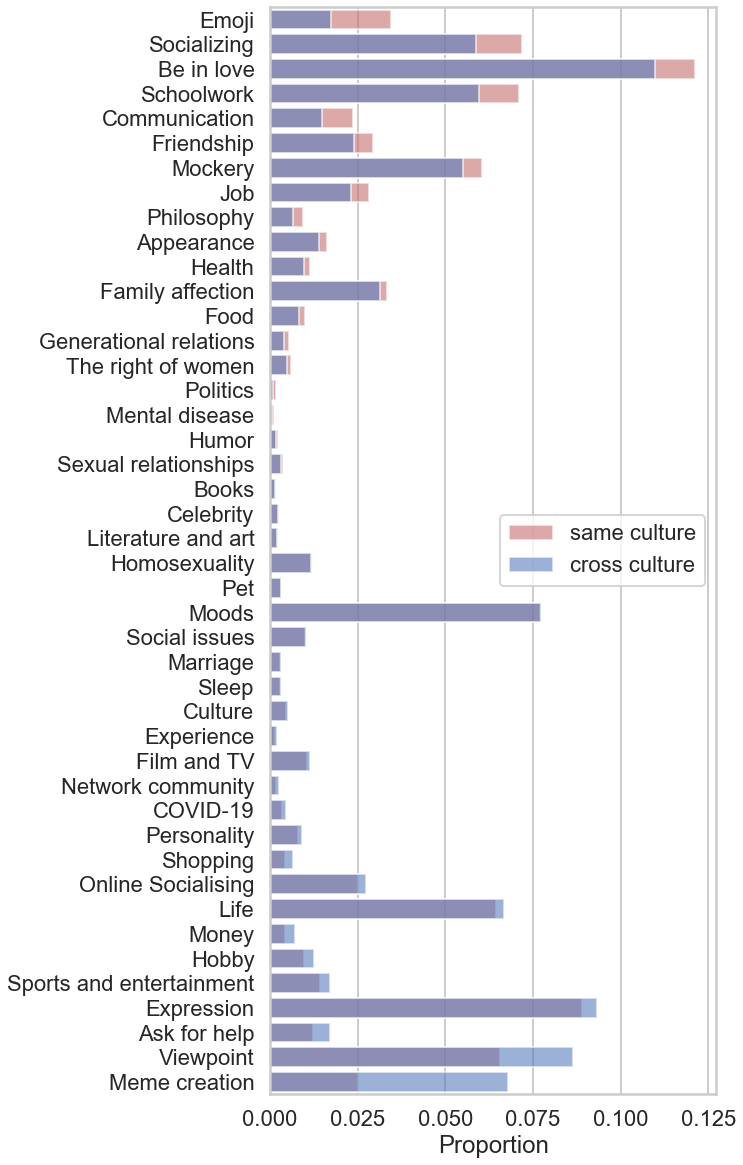

In [655]:
import seaborn as sns
import matplotlib.pyplot as plt
#matplotlib.rcParams['font.family']='SimHei'#黑体'STSong'仿宋

plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['font.size'] = '20' #用来
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
 
sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 20))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes = topic_dis_df.sort_values("dif", ascending=False)
# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(x="same", y="tag", data=crashes,
            label="same culture", color="r", saturation=0.75, alpha=0.6)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="cross", y="tag", data=crashes,
            label="cross culture", color="b", saturation=0.75, alpha=0.6)

# Add a legend and informative axis label
ax.legend(ncol=1, loc="center right", frameon=True)
ax.set_xlabel('Proportion')
ax.set_ylabel('')

<AxesSubplot:ylabel='tag'>

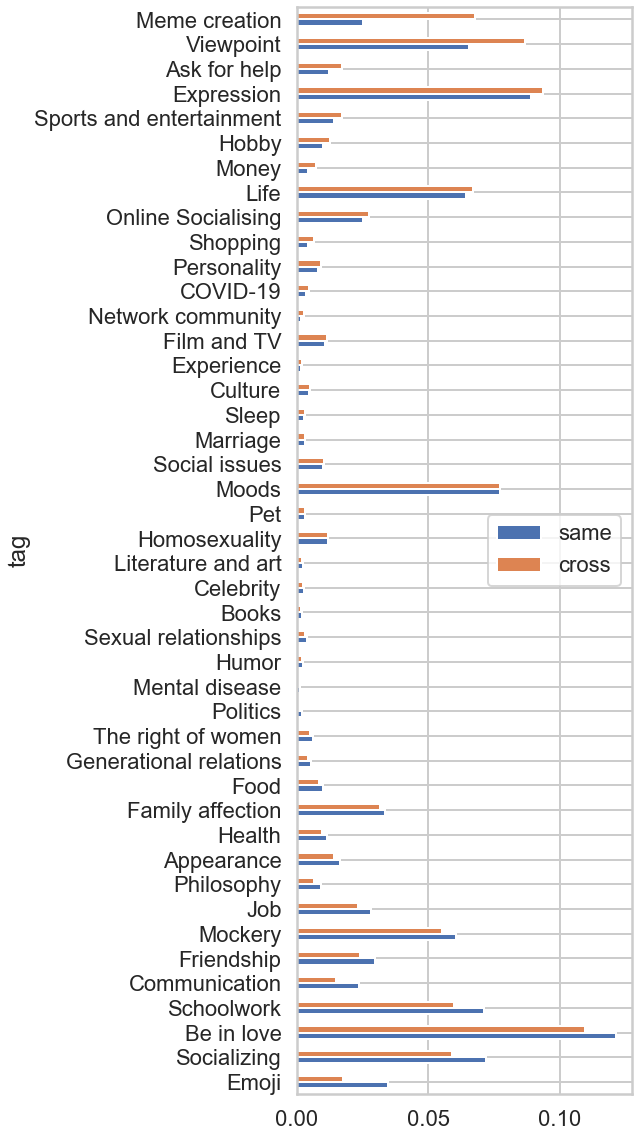

In [656]:
crashes.index=crashes['tag']
crashes.drop('tag',axis=1,inplace=True)
crashes.drop('dif',axis=1,inplace=True)

#plt.subplots()
crashes.plot.barh(figsize=(6, 20))

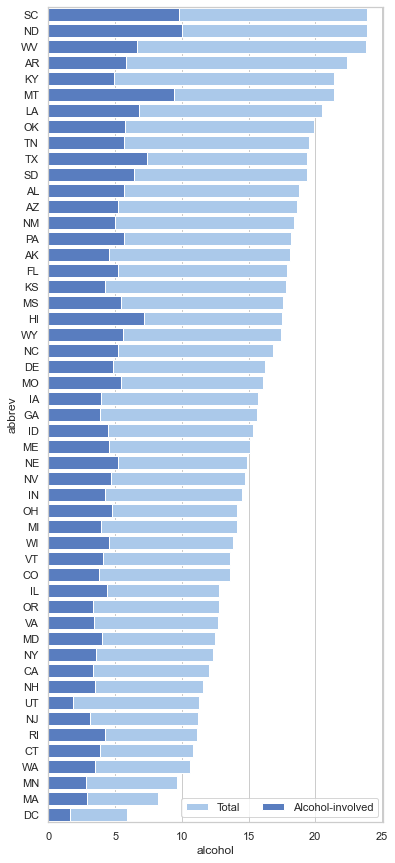

In [657]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes = pd.read_csv("car_crashes.csv",header=0).sort_values("total", ascending=False)
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)


In [658]:
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

<Figure size 432x288 with 0 Axes>

In [659]:
sorted(topic_dif.items(),key=lambda item:item[1],reverse = False)

[('meme创作', -0.042773100616567514),
 ('观点看法', -0.02095245577679955),
 ('求助', -0.005004260129559937),
 ('表达', -0.004295886132559962),
 ('体育娱乐', -0.0030788545394223755),
 ('爱好', -0.0028932040256135078),
 ('金钱', -0.002842997659997323),
 ('生活', -0.002456734964801102),
 ('网络社交', -0.002442654859009137),
 ('购物', -0.0023266761638123653),
 ('性格', -0.0012525428925220239),
 ('新冠疫情', -0.001000338018515492),
 ('社区', -0.0009086413739788819),
 ('影视', -0.0008829516682079836),
 ('经历', -0.0004060978353929276),
 ('文化', -0.0004013487767365112),
 ('睡眠', -0.00030505947966690027),
 ('婚姻', -0.00023850511946923525),
 ('社会', -0.00023126422689204867),
 ('情绪', -7.642216471129282e-05),
 ('宠物', 5.752546125507678e-05),
 ('同性恋', 0.00014058422215763693),
 ('文艺', 0.00016074283865504402),
 ('明星', 0.00018829875385305153),
 ('书籍', 0.0004819939067800096),
 ('两性', 0.0005050353725067234),
 ('搞笑娱乐', 0.0005806968347086827),
 ('心理疾病', 0.0006655436019766448),
 ('政治', 0.0009983154029649674),
 ('女性权利', 0.0011912850124127274),
 ('代

In [660]:
gold_emotion_dict

{'无奈': {'fre': '4392', 'definition': '"hopeless, helpless, resignedly"'},
 '幽默/调侃/娱乐/消遣': {'fre': '4347'},
 '悲伤/悲痛': {'fre': '3870'},
 '平和/平静/镇定': {'fre': '3170'},
 '欢乐/喜悦/高兴/开心': {'fre': '2962'},
 '无语': {'fre': '2771', 'definition': '"speechless"'},
 '困惑/疑惑/混乱': {'fre': '1925'},
 '满意/满足/称心': {'fre': '1711'},
 '厌恶/反感/憎恶': {'fre': '1577'},
 '愤怒/生气': {'fre': '1464'},
 '尴尬/笨拙': {'fre': '1423'},
 '烦躁': {'fre': '1340', 'definition': '"irritable"'},
 '期待/希望': {'fre': '1237', 'definition': '"expect"'},
 '忧虑/焦虑': {'fre': '1137'},
 '兴奋/激动': {'fre': '905'},
 '震惊/恐怖': {'fre': '847', 'definition': '"shock, horror"'},
 '纠结': {'fre': '796', 'definition': '"tangle"'},
 '失望': {'fre': '728', 'definition': '"disappointment"'},
 '爱恋/钟情/浪漫/迷恋': {'fre': '684'},
 '渴望/渴求': {'fre': '608'},
 '宽慰/释放/轻松': {'fre': '577'},
 '惊奇/惊讶/惊喜': {'fre': '509'},
 '后悔/遗憾': {'fre': '507', 'definition': '"regret"'},
 '害怕/畏惧/恐惧': {'fre': '497'},
 '狂喜/着迷': {'fre': '364'},
 '无聊/厌倦': {'fre': '337'},
 '爱慕/崇拜': {'fre': '320'},
 '钦佩/羡

In [661]:
emotion_mappings

{'无奈': ['无奈', '绝望', '无力'],
 '幽默/调侃/娱乐/消遣': ['幽默/调侃/娱乐/消遣', '吐槽', '嘲讽', '讽刺', '嘲笑'],
 '悲伤/悲痛': ['悲伤/悲痛', '痛苦', '孤独', '委屈', '崩溃', '不舍', '难受', '难过'],
 '平和/平静/镇定': ['平和/平静/镇定', '坚定', '从容'],
 '欢乐/喜悦/高兴/开心': ['欢乐/喜悦/高兴/开心', '庆幸'],
 '无语': ['无语'],
 '困惑/疑惑/混乱': ['困惑/疑惑/混乱', '怀疑', '迷茫'],
 '满意/满足/称心': ['满意/满足/称心', '得意', '骄傲', '自豪'],
 '厌恶/反感/憎恶': ['厌恶/反感/憎恶'],
 '愤怒/生气': ['愤怒/生气'],
 '尴尬/笨拙': ['尴尬/笨拙', '呆滞'],
 '烦躁': ['烦躁'],
 '期待/希望': ['期待/希望', '祝福', '急切', '焦急'],
 '忧虑/焦虑': ['忧虑/焦虑'],
 '兴奋/激动': ['兴奋/激动'],
 '震惊/恐怖': ['震惊/恐怖', '震惊'],
 '纠结': ['纠结'],
 '失望': ['失望', '颓废'],
 '爱恋/钟情/浪漫/迷恋': ['爱恋/钟情/浪漫/迷恋'],
 '渴望/渴求': ['渴望/渴求'],
 '宽慰/释放/轻松': ['宽慰/释放/轻松'],
 '惊奇/惊讶/惊喜': ['惊奇/惊讶/惊喜'],
 '后悔/遗憾': ['后悔/遗憾'],
 '害怕/畏惧/恐惧': ['害怕/畏惧/恐惧', '紧张'],
 '狂喜/着迷': ['狂喜/着迷'],
 '无聊/厌倦': ['无聊/厌倦', '疲惫', '疲倦', '劳累', '嫌弃'],
 '爱慕/崇拜': ['爱慕/崇拜'],
 '钦佩/羡慕/赞赏': ['钦佩/羡慕/赞赏'],
 '感动': ['感动'],
 '性欲': ['性欲'],
 '悲悯/移情/同理': ['悲悯/移情/同理'],
 '兴趣/爱好': ['兴趣/爱好', '好奇'],
 '内疚': ['内疚'],
 '审美/美感': ['审美/美感'],
 '怀旧/念旧/思乡': ['怀旧/念旧/思乡', '思念'],
 '敬畏/惊叹': ['敬

In [662]:
cluster_meme_dict[1000]

{'meme_topic': ['爱情', '自嘲', '观念', '生活', '自嘲', '观念', '生活'],
 'meme_emotion': ['无奈,尴尬/笨拙,愤怒/生气',
  '幽默/调侃/娱乐/消遣',
  '悲伤/悲痛,忧虑/焦虑,烦躁',
  '幽默/调侃/娱乐/消遣,宽慰/释放/轻松'],
 'meme_emotion_strength': [7.0, 5.0, 6.0, 7.0],
 'meme_form': ['独白', '独白'],
 'semantic': ['连贯', '对比/转折'],
 'meme_likes': [6.0, 6.5],
 'meme_share': [5.0, 6.0],
 'meme_create': [6.0, 6.0],
 'image_number': [1, 1],
 'image_construct_form': ['原图', '原图'],
 'role_number': [1, 1],
 'role_country': ['外国', '外国'],
 'role_color': ['白种人', '白种人'],
 'role_category': ['普通人', '普通人'],
 'role_demography': ['中青年（女性）', '中青年（女性）'],
 'role_emotion': ['悲伤,愤怒/生气,厌恶', '高兴', '悲伤,愤怒/生气,厌恶', '高兴'],
 'role_emotion_strength': [7.0, 7.0],
 'OCR_txt': ['When ur girl starts some shit just for fun',
  '如果無法解决？ 那磨就再點第三把火 （危除動作兒童不宜。）'],
 'OCR_txt_seg': [['When',
   'ur',
   'girl',
   'starts',
   'some',
   'shit',
   'just',
   'for',
   'fun'],
  []],
 'tag': ['memes', 'memestw']}

In [663]:
cluster_meme_dict[900]

{'meme_topic': ['表达',
  '生活',
  '表情',
  '生活',
  '表情',
  '情绪',
  '表情',
  '社交',
  '表达',
  '帖子',
  '生活'],
 'meme_emotion': ['惊奇/惊讶/惊喜',
  '欢乐/喜悦/高兴/开心',
  '欢乐/喜悦/高兴/开心',
  '欢乐/喜悦/高兴/开心',
  '欢乐/喜悦/高兴/开心',
  '欢乐/喜悦/高兴/开心'],
 'meme_emotion_strength': [6.0, 6.0, 7.0, 6.5, 7.0, 6.5],
 'meme_form': ['独白', '独白', '独白', '独白', '独白'],
 'semantic': ['连贯', '连贯', '连贯', '连贯', '连贯'],
 'meme_likes': [4.5, 5.5, 6.0, 6.0, 5.5],
 'meme_share': [1.5, 2.5, 2.5, 3.0, 2.0],
 'meme_create': [1.5, 2.0, 2.5, 1.5, 2.0],
 'image_number': [1, 2, 2, 2, 2],
 'image_construct_form': ['原图', '拼接', '拼接', '拼接', '拼接'],
 'role_number': [1, 2, 2, 2, 2],
 'role_country': ['外国', '外国', '外国', '外国', '外国'],
 'role_color': ['白种人', '白种人', '白种人', '白种人', '白种人'],
 'role_category': ['普通人', '普通人', '普通人', '普通人', '普通人'],
 'role_demography': ['小女孩',
  '小女孩,中青年（女性）',
  '中青年（女性）',
  '小女孩,中青年（女性）',
  '中青年（女性）',
  '小女孩,中青年（女性）',
  '中青年（女性）',
  '小女孩,中青年（女性）',
  '中青年（女性）'],
 'role_emotion': ['高兴', '高兴', '高兴', '高兴', '高兴', '高兴', '高兴', '高兴', '高兴'],
 'r

In [664]:
from collections import Counter

def count_sort(tlist):
    res = None
    item_count = Counter(tlist)
    sorted_res = sorted(item_count.items(),key = lambda item:item[1],reverse=True)
    return sorted_res

In [665]:
tlist = [1,2,3,4,5,6,1,3,4,2,3,1]
print(count_sort(tlist))

[(1, 3), (3, 3), (2, 2), (4, 2), (5, 1), (6, 1)]


In [666]:
c = 0

for cluster, record in cluster_meme_dict.items():
    if c>1:
        break
    c+=1
    meme_topic = record['meme_topic']
    meme_topic_new = []
    for topic in meme_topic:
        for topici in topic.split(","):
            meme_topic_new.append(topici)
    

    meme_emotion = record['meme_emotion']
    
    meme_emotion_strength = record['meme_emotion_strength']
    meme_form = record['meme_form']
    semantic = record['semantic']
    meme_likes = record['meme_likes']
    meme_share = record['meme_share']
    meme_create = record['meme_create']
    image_number = record['image_number']
    image_construct_form = record['image_construct_form']
    role_number = record['role_number']
    role_country = record['role_country']
    role_color = record['role_color']
    role_category = record['role_category']
    role_demography = record['role_demography']
    role_emotion = record['role_emotion']
    role_emotion_strength = record['role_emotion_strength']
    OCR_txt = record['OCR_txt']
    tags = record['tag']
    

In [667]:
combine_data_df = pd.DataFrame(combine_data_list)
combine_data_df.to_csv("combine_data_df.csv")

In [668]:
combine_record_data_list[10]

NameError: name 'combine_record_data_list' is not defined

In [ ]:
primary_topic_tag = ['学习','课堂','考试','论文','升学','工作','实习','求职','金钱','爱情','暗恋','约会','婚姻','亲情','家庭','代际关系','友情','社交','爱好','运动','游戏','医药','音乐','美食','影视','购物','meme创作','memer','帖子','求助','沟通','表达','自嘲','性格','情绪','表情','病痛','外貌','头发','形体','社会','生活','疫情','人生','观念','看法','同性','女权']
primary_emotion_tag = ['欢乐/喜悦/高兴/开心','惊奇/惊讶/惊喜','满意/满足/称心','兴奋/激动','狂喜/着迷','爱恋/钟情/浪漫/迷恋','爱慕/崇拜','钦佩/羡慕/赞赏','幽默/调侃/娱乐/消遣','兴趣/爱好','宽慰/释放/轻松','审美/美感','渴望/渴求','期待/希望','感动','平和/平静/镇定','无奈','无语','无聊/厌倦','内疚','纠结','敬畏/惊叹','怀旧/念旧/思乡','困惑/疑惑/混乱','悲悯/移情/同理','性欲','悲伤/悲痛','尴尬/笨拙','震惊/恐怖','厌恶/反感/憎恶','愤怒/生气','忧虑/焦虑','害怕/畏惧/恐惧','烦躁','后悔/遗憾','失望']
primary_meme_emotion_strength = [1,2,3,4,5,6,7,8,9]
primary_meme_form = ['独白','单轮对话','多轮对话']
primary_meme_semantic = ['对比/转折','连贯']
primary_meme_likes_strength = [1,2,3,4,5,6,7,8,9]
primary_meme_share_strength = [1,2,3,4,5,6,7,8,9]
primary_meme_create_strength = [1,2,3,4,5,6,7,8,9]
primary_meme_image_number = ['1','2','3','4','5','6','6+']
primary_image_construct_form = ['原图','拼接','PS等其他方式']
primary_role_number = ['1','2','3','4','4+']
primary_role_country = ['中国','外国','其他']
primary_role_color = ['黄种人','白种人','黑种人','棕色人种','其他']
primary_role_category = ['名人','普通人','动物','动漫','影视人物','政治人物','商业人物','其他']
primary_role_demography = ['小男孩','小女孩','中青年（男性）','中青年（女性）','老年（男性）','老年（女性）','其他']
primary_role_emotion = ['高兴','悲伤','愤怒/生气','厌恶','恐惧','惊讶','平静']
primary_role_strength = [1,2,3,4,5,6,7,8,9]

In [ ]:
c = 0
for record in combine_record_data_list:
    #meme_topic = record['meme_topic']
    #meme_emotion_strength= record['meme_emotion_strength']
    meme_form = record['meme_form']
    semantic = record['semantic']
    #meme_likes = record['meme_likes': 5.5,
    # = record['meme_share': 4.0,
    # = record['meme_create': 5.0,
    image_number = record['image_number']
    image_construct_form = record['image_construct_form']
    role_number = record['role_number']
    role_country = record['role_country']
    role_color = record['role_color']
    role_category = record['role_category'],
    role_demography = record['role_demography']
    role_1_emotion = record['role_1_emotion']
    #role_1_emotion_strength = record['role_1_emotion_strength']
    role_2_emotion = record['role_2_emotion']
    #= record['role_2_emotion_strength': {nan, nan},
    role_3_emotion = record['role_3_emotion']
    #= record['role_3_emotion_strength': {nan, nan},
    role_4_emotion = record['role_4_emotion']
    #= record['role_4_emotion_strength': {nan, nan},
    cross_culture = record['cross_culture']
    cluster = record['cluster']
    full_name = record['full_name']

    if len(meme_form)>1 or len(semantic)>1 or len(image_number)>1 or len(image_construct_form)>1 \
        or len(role_number)>1 or len(role_country)>1 or len(role_color)>1 or len(role_category)>1 or \
            len(role_demography)>1 or len(role_1_emotion)>1 or  len(role_2_emotion)>1 or  len(role_3_emotion)>1 or  len(role_4_emotion)>1:
            c+=1
            print(record)

In [ ]:
combine_df = pd.DataFrame(combine_record_data_list)
combine_df.to_csv("combine_df.csv")

In [ ]:
df.info()

In [ ]:
from collections import Counter
Counter(cluster_list)

In [ ]:
df.describe()

In [ ]:
Counter(meme_topic_list)

In [ ]:
Counter(meme_emotion_list)

In [ ]:
Counter(meme_emotion_strength_list)

In [ ]:
Counter(meme_form_list)

In [ ]:
Counter(semantic_list)

In [ ]:
Counter(image_number_list)

In [ ]:
Counter(image_construct_form_list)

# 一、语义形式

### 结论探索：戏剧性因素（dramatic）驱动meme传播，表现形式包括转折、对话、PS拼接、多子图、多角色等

## 1.1连贯转折

### 统计结果：对比/转折的喜爱、分享、二创意愿更强

In [ ]:
df["semantic"].value_counts()

In [ ]:
mean_1 = df[df["semantic"]=="对比/转折"]["meme_likes"].mean()
mean_1

In [ ]:
mean_2 = df[df["semantic"]=="对比/转折"]["meme_share"].mean()
mean_2

In [ ]:
mean_3 = df[df["semantic"]=="对比/转折"]["meme_create"].mean()
mean_3

In [ ]:
mean_4 = df[df["semantic"]=="连贯"]["meme_likes"].mean()
mean_4

In [ ]:
mean_5 = df[df["semantic"]=="连贯"]["meme_share"].mean()
mean_5

In [ ]:
mean_6 = df[df["semantic"]=="连贯"]["meme_create"].mean()
mean_6

## 1.2独白对话

### 统计结果：对话的喜爱、分享、二创意愿更强

In [ ]:
mean_1 = df[df["meme_form"]=="独白"]["meme_likes"].mean()
mean_1

In [ ]:
mean_2 = df[df["meme_form"]=="独白"]["meme_share"].mean()
mean_2

In [ ]:
mean_3 = df[df["meme_form"]=="独白"]["meme_create"].mean()
mean_3

In [ ]:
mean_4 = df[df["meme_form"]=="单轮对话"]["meme_likes"].mean()
mean_4

In [ ]:
mean_5 = df[df["meme_form"]=="单轮对话"]["meme_share"].mean()
mean_5

In [ ]:
mean_6 = df[df["meme_form"]=="单轮对话"]["meme_create"].mean()
mean_6

In [ ]:
mean_7 = df[df["meme_form"]=="多轮对话"]["meme_likes"].mean()
mean_7

In [ ]:
mean_8 = df[df["meme_form"]=="多轮对话"]["meme_share"].mean()
mean_8

In [ ]:
mean_9 = df[df["meme_form"]=="多轮对话"]["meme_create"].mean()
mean_9

## 1.3原图、拼接、PS

### 统计结果：拼接与PS的喜爱、分享、二创意愿更强

In [ ]:
mean_1 = df[df["image_construct_form"]=="原图"]["meme_likes"].mean()
mean_1

In [ ]:
mean_2 = df[df["image_construct_form"]=="原图"]["meme_share"].mean()
mean_2

In [ ]:
mean_3 = df[df["image_construct_form"]=="原图"]["meme_create"].mean()
mean_3

In [ ]:
mean_4 = df[df["image_construct_form"]=="拼接"]["meme_likes"].mean()
mean_4

In [ ]:
mean_5 = df[df["image_construct_form"]=="拼接"]["meme_share"].mean()
mean_5

In [ ]:
mean_6 = df[df["image_construct_form"]=="拼接"]["meme_create"].mean()
mean_6

In [ ]:
mean_7 = df[df["image_construct_form"]=="PS等其他方式"]["meme_likes"].mean()
mean_7

In [ ]:
mean_8 = df[df["image_construct_form"]=="PS等其他方式"]["meme_share"].mean()
mean_8

In [ ]:
mean_9 = df[df["image_construct_form"]=="PS等其他方式"]["meme_create"].mean()
mean_9

## 1.4子图数量

### 统计结果：多子图比单子图的受欢迎程度更高，即拼接高于原图

In [ ]:
def attri_mean(attri1,attri2):
    mean_1 = dfx[dfx[attri1]=="1个"][attri2].mean()
    mean_2 = dfx[dfx[attri1]=="2个"][attri2].mean()
    mean_3 = dfx[dfx[attri1]=="3个"][attri2].mean()
    mean_4 = dfx[dfx[attri1]=="4个"][attri2].mean()
    mean_5 = dfx[dfx[attri1]=="5个"][attri2].mean()
    mean_6 = dfx[dfx[attri1]=="6个"][attri2].mean()
    mean_7 = dfx[dfx[attri1]=="多于6个"][attri2].mean()
    print(mean_1)
    print(mean_2)
    print(mean_3)
    print(mean_4)
    print(mean_5)
    print(mean_6)
    print(mean_7)
    plt.plot(["1","2","3","4","5","6","6+"], [mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7])

In [ ]:
attri_mean("image_number","meme_likes")

In [ ]:
attri_mean("image_number","meme_share")

In [ ]:
attri_mean("image_number","meme_create")

In [ ]:
def attri_len(attri):
    mean_1 = len(dfx[dfx[attri]=="1个"])
    mean_2 = len(dfx[dfx[attri]=="2个"])
    mean_3 = len(dfx[dfx[attri]=="3个"])
    mean_4 = len(dfx[dfx[attri]=="4个"])
    mean_5 = len(dfx[dfx[attri]=="5个"])
    mean_6 = len(dfx[dfx[attri]=="6个"])
    mean_7 = len(dfx[dfx[attri]=="多于6个"])
    print(mean_1)
    print(mean_2)
    print(mean_3)
    print(mean_4)
    print(mean_5)
    print(mean_6)
    print(mean_7)
    plt.plot(["1","2","3","4","5","6","6+"], [mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7])

In [ ]:
attri_len("image_number")

## 1.5主角数量

### 统计结果：多角色比单角色的受欢迎度更高

In [ ]:
def attri_mean(attri1,attri2):
    mean_1 = dfx[dfx[attri1]=="1个"][attri2].mean()
    mean_2 = dfx[dfx[attri1]=="2个"][attri2].mean()
    mean_3 = dfx[dfx[attri1]=="3个"][attri2].mean()
    mean_4 = dfx[dfx[attri1]=="4个"][attri2].mean()
    mean_5 = dfx[dfx[attri1]=="多于4个"][attri2].mean()
    print(mean_1)
    print(mean_2)
    print(mean_3)
    print(mean_4)
    print(mean_5)
    plt.plot(["1","2","3","4","4+"], [mean_1,mean_2,mean_3,mean_4,mean_5])

In [ ]:
attri_mean("role_number","meme_likes")

In [ ]:
attri_mean("role_number","meme_share")

In [ ]:
attri_mean("role_number","meme_create")

In [ ]:
def attri_len(attri):
    mean_1 = len(dfx[dfx[attri]=="1个"])
    mean_2 = len(dfx[dfx[attri]=="2个"])
    mean_3 = len(dfx[dfx[attri]=="3个"])
    mean_4 = len(dfx[dfx[attri]=="4个"])
    mean_5 = len(dfx[dfx[attri]=="多于4个"])
    print(mean_1)
    print(mean_2)
    print(mean_3)
    print(mean_4)
    print(mean_5)
    plt.plot(["1","2","3","4","4+"], [mean_1,mean_2,mean_3,mean_4,mean_5])

In [ ]:
attri_len("role_number")

# 二、情感

### 探索结论：情感类别对模因传播有影响，其中介机制为主角情感强度—>模因情感强度—>个体态度行为（待验证）

## 2.1 模因情感唤醒值/情感强度

### 统计结果：模因情感强度越高，喜爱、分享、二创程度越高

In [ ]:
dfx = df
mean_1 = dfx[dfx["meme_emotion_strength"]==1]["meme_likes"].mean()
mean_2 = dfx[dfx["meme_emotion_strength"]==2]["meme_likes"].mean()
mean_3 = dfx[dfx["meme_emotion_strength"]==3]["meme_likes"].mean()
mean_4 = dfx[dfx["meme_emotion_strength"]==4]["meme_likes"].mean()
mean_5 = dfx[dfx["meme_emotion_strength"]==5]["meme_likes"].mean()
mean_6 = dfx[dfx["meme_emotion_strength"]==6]["meme_likes"].mean()
mean_7 = dfx[dfx["meme_emotion_strength"]==7]["meme_likes"].mean()
mean_8 = dfx[dfx["meme_emotion_strength"]==8]["meme_likes"].mean()
mean_9 = dfx[dfx["meme_emotion_strength"]==9]["meme_likes"].mean()
print(mean_1)
print(mean_2)
print(mean_3)
print(mean_4)
print(mean_5)
print(mean_6)
print(mean_7)
print(mean_8)
print(mean_9)

In [ ]:
plt.plot(["1","2","3","4","5","6","7","8","9"], [3.75,3.17,3.29,3.77,4.51,5.16,5.74,6.21,6.83])

In [ ]:
dfx = df
mean_1 = dfx[dfx["meme_emotion_strength"]==1]["meme_share"].mean()
mean_2 = dfx[dfx["meme_emotion_strength"]==2]["meme_share"].mean()
mean_3 = dfx[dfx["meme_emotion_strength"]==3]["meme_share"].mean()
mean_4 = dfx[dfx["meme_emotion_strength"]==4]["meme_share"].mean()
mean_5 = dfx[dfx["meme_emotion_strength"]==5]["meme_share"].mean()
mean_6 = dfx[dfx["meme_emotion_strength"]==6]["meme_share"].mean()
mean_7 = dfx[dfx["meme_emotion_strength"]==7]["meme_share"].mean()
mean_8 = dfx[dfx["meme_emotion_strength"]==8]["meme_share"].mean()
mean_9 = dfx[dfx["meme_emotion_strength"]==9]["meme_share"].mean()
print(mean_1)
print(mean_2)
print(mean_3)
print(mean_4)
print(mean_5)
print(mean_6)
print(mean_7)
print(mean_8)
print(mean_9)

In [ ]:
plt.plot(["1","2","3","4","5","6","7","8","9"], [2.45,2.52,2.68,2.96,3.44,3.85,4.71,5.56,6.15])

In [ ]:
dfx = df
mean_1 = dfx[dfx["meme_emotion_strength"]==1]["meme_create"].mean()
mean_2 = dfx[dfx["meme_emotion_strength"]==2]["meme_create"].mean()
mean_3 = dfx[dfx["meme_emotion_strength"]==3]["meme_create"].mean()
mean_4 = dfx[dfx["meme_emotion_strength"]==4]["meme_create"].mean()
mean_5 = dfx[dfx["meme_emotion_strength"]==5]["meme_create"].mean()
mean_6 = dfx[dfx["meme_emotion_strength"]==6]["meme_create"].mean()
mean_7 = dfx[dfx["meme_emotion_strength"]==7]["meme_create"].mean()
mean_8 = dfx[dfx["meme_emotion_strength"]==8]["meme_create"].mean()
mean_9 = dfx[dfx["meme_emotion_strength"]==9]["meme_create"].mean()
print(mean_1)
print(mean_2)
print(mean_3)
print(mean_4)
print(mean_5)
print(mean_6)
print(mean_7)
print(mean_8)
print(mean_9)

In [ ]:
plt.plot(["1","2","3","4","5","6","7","8","9"], [2.83,3.51,3.45,3.63,3.67,3.88,4.82,5.02,4.58])

In [ ]:
dfx = df
mean_1 = len(dfx[dfx["meme_emotion_strength"]==1])
mean_2 = len(dfx[dfx["meme_emotion_strength"]==2])
mean_3 = len(dfx[dfx["meme_emotion_strength"]==3])
mean_4 = len(dfx[dfx["meme_emotion_strength"]==4])
mean_5 = len(dfx[dfx["meme_emotion_strength"]==5])
mean_6 = len(dfx[dfx["meme_emotion_strength"]==6])
mean_7 = len(dfx[dfx["meme_emotion_strength"]==7])
mean_8 = len(dfx[dfx["meme_emotion_strength"]==8])
mean_9 = len(dfx[dfx["meme_emotion_strength"]==9])
print(mean_1)
print(mean_2)
print(mean_3)
print(mean_4)
print(mean_5)
print(mean_6)
print(mean_7)
print(mean_8)
print(mean_9)

In [ ]:
plt.plot(["1","2","3","4","5","6","7","8","9"], [132,520,1260,2026,3295,6204,7053,2216,608])

## 2.2 角色情感强度

### 统计结果：和第一个角色情感强度呈现正相关，之后分析可进一步控制角色数量，探索多角色时多角色情感的强度影响

In [ ]:
mean_1 = dfx[dfx["role_1_emotion_strength"]==1]["meme_likes"].mean()
mean_2 = dfx[dfx["role_1_emotion_strength"]==2]["meme_likes"].mean()
mean_3 = dfx[dfx["role_1_emotion_strength"]==3]["meme_likes"].mean()
mean_4 = dfx[dfx["role_1_emotion_strength"]==4]["meme_likes"].mean()
mean_5 = dfx[dfx["role_1_emotion_strength"]==5]["meme_likes"].mean()
mean_6 = dfx[dfx["role_1_emotion_strength"]==6]["meme_likes"].mean()
mean_7 = dfx[dfx["role_1_emotion_strength"]==7]["meme_likes"].mean()
mean_8 = dfx[dfx["role_1_emotion_strength"]==8]["meme_likes"].mean()
mean_9 = dfx[dfx["role_1_emotion_strength"]==9]["meme_likes"].mean()
print(mean_1)
print(mean_2)
print(mean_3)
print(mean_4)
print(mean_5)
print(mean_6)
print(mean_7)
print(mean_8)
print(mean_9)
plt.plot(["1","2","3","4","5","6","7","8","9"], [mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9])

In [ ]:
mean_1 = dfx[dfx["role_1_emotion_strength"]==1]["meme_share"].mean()
mean_2 = dfx[dfx["role_1_emotion_strength"]==2]["meme_share"].mean()
mean_3 = dfx[dfx["role_1_emotion_strength"]==3]["meme_share"].mean()
mean_4 = dfx[dfx["role_1_emotion_strength"]==4]["meme_share"].mean()
mean_5 = dfx[dfx["role_1_emotion_strength"]==5]["meme_share"].mean()
mean_6 = dfx[dfx["role_1_emotion_strength"]==6]["meme_share"].mean()
mean_7 = dfx[dfx["role_1_emotion_strength"]==7]["meme_share"].mean()
mean_8 = dfx[dfx["role_1_emotion_strength"]==8]["meme_share"].mean()
mean_9 = dfx[dfx["role_1_emotion_strength"]==9]["meme_share"].mean()
print(mean_1)
print(mean_2)
print(mean_3)
print(mean_4)
print(mean_5)
print(mean_6)
print(mean_7)
print(mean_8)
print(mean_9)
plt.plot(["1","2","3","4","5","6","7","8","9"], [mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9])

In [ ]:
mean_1 = dfx[dfx["role_1_emotion_strength"]==1]["meme_create"].mean()
mean_2 = dfx[dfx["role_1_emotion_strength"]==2]["meme_create"].mean()
mean_3 = dfx[dfx["role_1_emotion_strength"]==3]["meme_create"].mean()
mean_4 = dfx[dfx["role_1_emotion_strength"]==4]["meme_create"].mean()
mean_5 = dfx[dfx["role_1_emotion_strength"]==5]["meme_create"].mean()
mean_6 = dfx[dfx["role_1_emotion_strength"]==6]["meme_create"].mean()
mean_7 = dfx[dfx["role_1_emotion_strength"]==7]["meme_create"].mean()
mean_8 = dfx[dfx["role_1_emotion_strength"]==8]["meme_create"].mean()
mean_9 = dfx[dfx["role_1_emotion_strength"]==9]["meme_create"].mean()
print(mean_1)
print(mean_2)
print(mean_3)
print(mean_4)
print(mean_5)
print(mean_6)
print(mean_7)
print(mean_8)
print(mean_9)
plt.plot(["1","2","3","4","5","6","7","8","9"], [mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9])

In [ ]:
dfx = df
mean_1 = len(dfx[dfx["role_1_emotion_strength"]==1])
mean_2 = len(dfx[dfx["role_1_emotion_strength"]==2])
mean_3 = len(dfx[dfx["role_1_emotion_strength"]==3])
mean_4 = len(dfx[dfx["role_1_emotion_strength"]==4])
mean_5 = len(dfx[dfx["role_1_emotion_strength"]==5])
mean_6 = len(dfx[dfx["role_1_emotion_strength"]==6])
mean_7 = len(dfx[dfx["role_1_emotion_strength"]==7])
mean_8 = len(dfx[dfx["role_1_emotion_strength"]==8])
mean_9 = len(dfx[dfx["role_1_emotion_strength"]==9])
print(mean_1)
print(mean_2)
print(mean_3)
print(mean_4)
print(mean_5)
print(mean_6)
print(mean_7)
print(mean_8)
print(mean_9)
plt.plot(["1","2","3","4","5","6","7","8","9"], [mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9])

In [ ]:
def attri_mean(attri1,attri2):
    mean_1 = dfx[dfx[attri1]==1][attri2].mean()
    mean_2 = dfx[dfx[attri1]==2][attri2].mean()
    mean_3 = dfx[dfx[attri1]==3][attri2].mean()
    mean_4 = dfx[dfx[attri1]==4][attri2].mean()
    mean_5 = dfx[dfx[attri1]==5][attri2].mean()
    mean_6 = dfx[dfx[attri1]==6][attri2].mean()
    mean_7 = dfx[dfx[attri1]==7][attri2].mean()
    mean_8 = dfx[dfx[attri1]==8][attri2].mean()
    mean_9 = dfx[dfx[attri1]==9][attri2].mean()
    print(mean_1)
    print(mean_2)
    print(mean_3)
    print(mean_4)
    print(mean_5)
    print(mean_6)
    print(mean_7)
    print(mean_8)
    print(mean_9)
    plt.plot(["1","2","3","4","5","6","7","8","9"], [mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9])

In [ ]:
def attri_len(attri):
    mean_1 = len(dfx[dfx[attri]==1])
    mean_2 = len(dfx[dfx[attri]==2])
    mean_3 = len(dfx[dfx[attri]==3])
    mean_4 = len(dfx[dfx[attri]==4])
    mean_5 = len(dfx[dfx[attri]==5])
    mean_6 = len(dfx[dfx[attri]==6])
    mean_7 = len(dfx[dfx[attri]==7])
    mean_8 = len(dfx[dfx[attri]==8])
    mean_9 = len(dfx[dfx[attri]==9])
    print(mean_1)
    print(mean_2)
    print(mean_3)
    print(mean_4)
    print(mean_5)
    print(mean_6)
    print(mean_7)
    print(mean_8)
    print(mean_9)
    plt.plot(["1","2","3","4","5","6","7","8","9"], [mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9])

In [ ]:
attri_mean("role_2_emotion_strength","meme_likes")

In [ ]:
attri_mean("role_2_emotion_strength","meme_share")

In [ ]:
attri_mean("role_2_emotion_strength","meme_create")

In [ ]:
attri_len("role_2_emotion_strength")

In [ ]:
attri_mean("role_3_emotion_strength","meme_likes")

In [ ]:
attri_mean("role_3_emotion_strength","meme_share")

In [ ]:
attri_mean("role_3_emotion_strength","meme_create")

In [ ]:
attri_len("role_3_emotion_strength")

In [ ]:
attri_mean("role_4_emotion_strength","meme_likes")

In [ ]:
attri_mean("role_4_emotion_strength","meme_share")

In [ ]:
attri_mean("role_4_emotion_strength","meme_create")

In [ ]:
attri_len("role_4_emotion_strength")

## 2.3 情感类别

### 统计结果：在meme传播受意愿的影响中，受到情感类型的调节，作用机理之一为情感强度起到中介作用，之后需用计量验证

In [ ]:
sr = dfx["meme_emotion"]
sr_nodup = sr.drop_duplicates()
meme_emotion = ""
for i in sr_nodup:
    if type(i) == str:
        meme_emotion = meme_emotion + "," + i
meme_emotion_list = meme_emotion.lstrip(",").split(",")
meme_emotion = list(set(meme_emotion_list))
meme_emotion

In [ ]:
len(meme_emotion)

In [ ]:
i_count_list = []
i_likes_list = []
i_share_list = []
i_create_list = []
i_emotion_strength_list = []
role_emotion_strength_list = []
for i in meme_emotion:
    i_count = 0
    i_likes = 0
    i_share = 0
    i_create = 0
    i_emotion_strength = 0
    role_emotion_strength = 0
    for j in range(len(dfx)):
        if i in str(dfx["meme_emotion"][j]):
            i_count += 1
            if not np.isnan(dfx["meme_likes"][j]) :
                i_likes += dfx["meme_likes"][j]
            if not np.isnan(dfx["meme_share"][j]) :
                i_share += dfx["meme_share"][j]
            if not np.isnan(dfx["meme_create"][j]) :
                i_create += dfx["meme_create"][j]
            if not np.isnan(dfx["meme_emotion_strength"][j]) :
                i_emotion_strength += dfx["meme_emotion_strength"][j]
            if not np.isnan(dfx["role_1_emotion_strength"][j]) :
                role_emotion_strength += dfx["role_1_emotion_strength"][j]
    i_count_list.append(i_count)
    i_likes_list.append(i_likes/i_count)
    i_share_list.append(i_share/i_count)
    i_create_list.append(i_create/i_count)
    i_emotion_strength_list.append(i_emotion_strength/i_count)
    role_emotion_strength_list.append(role_emotion_strength/i_count)
    print(i)
data_emotion = pd.DataFrame({"meme_emotion":meme_emotion,"word_counts":i_count_list,"likes_mean":i_likes_list,"share_mean":i_share_list,"create_mean":i_create_list,"meme_emotion_strength":i_emotion_strength_list,"role_emotion_strength":role_emotion_strength_list})
data_emotion.to_excel("E:\\Pycharm\\meme_analyse\\emotion_analyse2_0704.xlsx", index = 0)

### 情感强度的中介

In [ ]:
df_emotion = pd.read_excel("E:\\Pycharm\\meme_analyse\\emotion_analyse_0704.xlsx")

In [ ]:
plt.scatter(df_emotion["meme_emotion_strength"],df_emotion["likes_mean"])

In [ ]:
plt.scatter(df_emotion["meme_emotion_strength"],df_emotion["share_mean"])

In [ ]:
plt.scatter(df_emotion["meme_emotion_strength"],df_emotion["create_mean"])

### 情感类别的影响

### 实际多少与喜欢、分享、创作意愿有相关性，但并不高，证明互联网真的是啥都有

In [ ]:
plt.scatter(df_emotion["likes_mean"],df_emotion["word_counts"])

In [ ]:
plt.scatter(df_emotion["share_mean"],df_emotion["word_counts"])

In [ ]:
plt.scatter(df_emotion["create_mean"],df_emotion["word_counts"])

# 三、主题类别

### 探索结论：在从传播意愿到传播行为中，主题类别有调节作用，中介机制可选取距离性、认知提升与情感极性强度作验证

In [ ]:
sr = dfx["meme_topic"]
sr_nodup = sr.drop_duplicates()
meme_topic = ""
for i in sr_nodup:
    if type(i) == str:
        meme_topic = meme_topic + "," + i
meme_topic_list = meme_topic.lstrip(",").split(",")
meme_topic = list(set(meme_topic_list ))
meme_topic

In [ ]:
len(meme_topic)

In [ ]:
i_count_list = []
i_likes_list = []
i_share_list = []
i_create_list = []
for i in meme_topic:
    print(i)
    i_count = 0
    i_likes = 0
    i_share = 0
    i_create = 0
    for j in range(len(dfx)):
        if i in str(dfx["meme_topic"][j]):
            i_count += 1
            if not np.isnan(dfx["meme_likes"][j]) :
                i_likes += dfx["meme_likes"][j]
            if not np.isnan(dfx["meme_share"][j]) :
                i_share += dfx["meme_share"][j]
            if not np.isnan(dfx["meme_create"][j]) :
                i_create += dfx["meme_create"][j]
    i_count_list.append(i_count)
    i_likes_list.append(i_likes/i_count)
    i_share_list.append(i_share/i_count)
    i_create_list.append(i_create/i_count)
data_emotion = pd.DataFrame({"meme_topic":meme_topic,"word_counts":i_count_list,"likes_mean":i_likes_list,"share_mean":i_share_list,"create_mean":i_create_list})
data_emotion.to_excel("E:\\Pycharm\\meme_analyse\\topic_analyse_0704.xlsx", index = 0)

In [ ]:
df_topic = pd.read_excel("E:\\Pycharm\\meme_analyse\\topic_analyse_0704.xlsx")

### 左上角的离群值是表达，太模糊太广泛了

In [ ]:
plt.scatter(df_topic["likes_mean"],df_topic["word_counts"])

### 左上角为表达与爱情，爱情类似表达，有唤起正向情感的，有负向情感的

In [ ]:
plt.scatter(df_topic["share_mean"],df_topic["word_counts"])

In [ ]:
plt.scatter(df_topic["create_mean"],df_topic["word_counts"])

# 四、角色信息

### 探索结论：ps颜值可能有强影响

## 4.1 角色国家

### 统计结果：大多数都是外国元素，也存在更喜欢本文化元素的现象，但样本仍比较少

In [ ]:
def attri_mean(attri1,attri2):
    mean_1 = dfx[dfx[attri1]=="中国"][attri2].mean()
    mean_2 = dfx[dfx[attri1]=="外国"][attri2].mean()
    mean_3 = dfx[dfx[attri1]=="其他"][attri2].mean()
    mean_4 = dfx[dfx[attri1]=="中国,外国"][attri2].mean()
    mean_5 = dfx[dfx[attri1]=="中国,其他"][attri2].mean()
    mean_6 = dfx[dfx[attri1]=="外国,其他"][attri2].mean()
    mean_7 = dfx[dfx[attri1]=="中国,外国,其他"][attri2].mean()
    print(mean_1)
    print(mean_2)
    print(mean_3)
    print(mean_4)
    print(mean_5)
    print(mean_6)
    print(mean_7)
    plt.rcParams['font.sans-serif'] = ['KaiTi']
    plt.bar(["中国","外国","其他","中国,外国","中国,其他","外国,其他","中国,外国,其他"], [mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7])

In [ ]:
attri_mean("role_country","meme_likes")

In [ ]:
def attri_len(attri1):
    mean_1 = len(dfx[dfx[attri1]=="中国"])
    mean_2 = len(dfx[dfx[attri1]=="外国"])
    mean_3 = len(dfx[dfx[attri1]=="其他"])
    mean_4 = len(dfx[dfx[attri1]=="中国,外国"])
    mean_5 = len(dfx[dfx[attri1]=="中国,其他"])
    mean_6 = len(dfx[dfx[attri1]=="外国,其他"])
    mean_7 = len(dfx[dfx[attri1]=="中国,外国,其他"])
    print(mean_1)
    print(mean_2)
    print(mean_3)
    print(mean_4)
    print(mean_5)
    print(mean_6)
    print(mean_7)
    plt.rcParams['font.sans-serif'] = ['KaiTi']
    plt.bar(["中国","外国","其他","中国,外国","中国,其他","外国,其他","中国,外国,其他"], [mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7])

In [ ]:
attri_len("role_country")

## 4.2 角色人种

### 黄种人的模因距离更近，白种人的模因暂时质量更高（更受喜爱、更易二创传播），还得再确认

#### 黄种人：1753 白种人：13191 黑种人：2803 棕色人种：1069 其他：3291 

In [ ]:
def attri_mean(attri1,attri2):
    mean_1 = dfx[dfx[attri1]=="黄种人"][attri2].mean()
    mean_2 = dfx[dfx[attri1]=="白种人"][attri2].mean()
    mean_3 = dfx[dfx[attri1]=="黑种人"][attri2].mean()
    mean_4 = dfx[dfx[attri1]=="棕色人种"][attri2].mean()
    mean_5 = dfx[dfx[attri1]=="其他"][attri2].mean()
    print(mean_1)
    print(mean_2)
    print(mean_3)
    print(mean_4)
    print(mean_5)
    plt.rcParams['font.sans-serif'] = ['KaiTi']
    plt.plot(["黄种人","白种人","黑种人","棕色人种","其他"], [mean_1,mean_2,mean_3,mean_4,mean_5])

In [ ]:
attri_mean("role_color","meme_likes")

In [ ]:
attri_mean("role_color","meme_share")

In [ ]:
attri_mean("role_color","meme_create")

##  4.3 角色类别

### 更喜欢名人模因，但普通人模因流传更广，心口不一的现象，是什么因素导致的呢？

#### 普通人：10968；名人：5096；动漫：2465；动物：1103；其他：1141

In [ ]:
def attri_mean(attri1,attri2):
    mean_1 = dfx[dfx[attri1]=="普通人"][attri2].mean()
    mean_2 = (dfx[dfx[attri1]=="名人"][attri2].mean()*1996+dfx[dfx[attri1]=="影视人物"][attri2].mean()*3100)/5096
    mean_3 = dfx[dfx[attri1]=="动漫"][attri2].mean()
    mean_4 = dfx[dfx[attri1]=="动物"][attri2].mean()
    mean_5 = dfx[dfx[attri1]=="其他"][attri2].mean()
    print(mean_1)
    print(mean_2)
    print(mean_3)
    print(mean_4)
    print(mean_5)
    plt.rcParams['font.sans-serif'] = ['KaiTi']
    plt.plot(["普通人","名人","动漫","动物","其他"], [mean_1,mean_2,mean_3,mean_4,mean_5])

In [ ]:
attri_mean("role_category","meme_likes")

In [ ]:
attri_mean("role_category","meme_share")

In [ ]:
attri_mean("role_category","meme_create")

## 4.4 年龄性别

#### 男性模因明显多于女性，但女性更受喜欢；中青年模因明显最多，但越老越喜欢

#### 小男孩：1517，小女孩：324，中青男：12206；中青女：2406；老年男：1287；老年女：166；其他：1927

In [ ]:
def attri_mean(attri1,attri2):
    mean_1 = dfx[dfx[attri1]=="小男孩"][attri2].mean()
    mean_2 = dfx[dfx[attri1]=="小女孩"][attri2].mean()
    mean_3 = dfx[dfx[attri1]=="中青年（男性）"][attri2].mean()
    mean_4 = dfx[dfx[attri1]=="中青年（女性）"][attri2].mean()
    mean_5 = dfx[dfx[attri1]=="老年（男性）"][attri2].mean()
    mean_6 = dfx[dfx[attri1]=="老年（女性）"][attri2].mean()
    mean_7 = dfx[dfx[attri1]=="其他"][attri2].mean()
    print(mean_1)
    print(mean_2)
    print(mean_3)
    print(mean_4)
    print(mean_5)
    print(mean_6)
    print(mean_7)
    plt.rcParams['font.sans-serif'] = ['KaiTi']
    plt.plot(["小男孩","小女孩","中青男","中青女","老年男","老年女","其他"], [mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7])

In [ ]:
attri_mean("role_demography","meme_likes")

# 后续：

# 5.同组模因的繁衍

### 上千组模因，指标为该组模因的传播数与三个意愿，中介机制尝试角色+情感—>主题—>语义形式

# 6.跨文化传播

### tag为memesdb，角色为外国或非黄种人；角色为中国，tag非memesdb与memestw，生成情感1、主题2后的文化3

# 7.跨平台传播

### 同组模因，有的ins&豆瓣，英文&西班牙文&中文；有的模因单一平台

# Ps:统计各指标的一致性与差异性